# Data preprocessing (Data Preparation)

* After Finishing our model [Vehicle Detection using the TensorFlow 2 Detection Model Zoo with BDD100K dataset](https://github.com/mod-ibr/Custom_Vehicle_Detection-with-TensorFlow-_Model_Zoo_with_bdd100k.git), we will use our annotations file which is in XML VOC format, for using it to train our dataset with YOLOv5 and YOLOv8.
* In this file, we will convert our annotations from XML VOC format to YOLO format.
* **Note: You should take a look at our [Repository](https://github.com/mod-ibr/Custom_Vehicle_Detection-with-TensorFlow-_Model_Zoo_with_bdd100k.git) to understand how we obtained this BDD100K Dataset and how it was and how we arrived at this point prior to the conversion process of YOLO Format.**

## Checking for using PyTorch with GPU

In [1]:
import torch

C:\Users\modib\anaconda3\envs\torch18py37gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.get_device_name(0)

'Quadro M2200'

## Looping over our annotations file 'annotations_xml_voc_format' with format XML VOC and convert them to YOLO Format and save them into a new folder called 'annotations_yolo_format'

####  XML_VOC to YOLO Conversion Function

In [5]:
import xml.etree.ElementTree as ET

def convert_voc_to_yolo(annotation_file, class_map):
    """
    Converts an annotation file in XML VOC format to YOLO format.

    Args:
        annotation_file (str): Path to the XML annotation file.
        class_map (dict): Dictionary mapping class names to class indices.

    Returns:
        str: A string in YOLO format.
    """
    tree = ET.parse(annotation_file)
    root = tree.getroot()

    yolo_lines = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text
        xmin = float(obj.find('bndbox/xmin').text)
        ymin = float(obj.find('bndbox/ymin').text)
        xmax = float(obj.find('bndbox/xmax').text)
        ymax = float(obj.find('bndbox/ymax').text)

        # Convert coordinates to YOLO format
        img_width = float(root.find('size/width').text)
        img_height = float(root.find('size/height').text)
        x_center = (xmin + xmax) / (2 * img_width)
        y_center = (ymin + ymax) / (2 * img_height)
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height

        class_idx = class_map[class_name]
        yolo_line = f"{class_idx} {x_center} {y_center} {width} {height}"
        yolo_lines.append(yolo_line)

    yolo_annotation = "\n".join(yolo_lines)
    return yolo_annotation


#### Convert train set

In [6]:
import os
import glob
from collections import defaultdict

# Define the class map dictionary
class_map = {'car': 0,'bus':1,'truck':2}  # Update this as needed

# Define the folder containing the XML annotation files
xml_folder = 'dataset/train/annotations_xml_voc_format'  # Update this as needed

# Define the output folder for YOLO annotations
yolo_folder = 'dataset/train/labels'  # Update this as needed

# Create the output folder if it doesn't exist
if not os.path.exists(yolo_folder):
    os.makedirs(yolo_folder)

# Loop over all XML files in the folder
for xml_file in glob.glob(os.path.join(xml_folder, '*.xml')):
    # Extract the filename without extension
    xml_filename = os.path.splitext(os.path.basename(xml_file))[0]

    # Call the function to convert VOC annotation to YOLO format
    yolo_annotation = convert_voc_to_yolo(xml_file, class_map)

    # Write the YOLO annotation to a text file
    yolo_filename = xml_filename + '.txt'
    yolo_filepath = os.path.join(yolo_folder, yolo_filename)
    with open(yolo_filepath, 'w') as f:
        f.write(yolo_annotation)

    print(f"Converted {xml_filename}.xml to {yolo_filename}.")


Converted 0000f77c-6257be58.xml to 0000f77c-6257be58.txt.
Converted 0000f77c-cb820c98.xml to 0000f77c-cb820c98.txt.
Converted 0001542f-5ce3cf52.xml to 0001542f-5ce3cf52.txt.
Converted 0001542f-7c670be8.xml to 0001542f-7c670be8.txt.
Converted 0001542f-ec815219.xml to 0001542f-ec815219.txt.
Converted 0004974f-05e1c285.xml to 0004974f-05e1c285.txt.
Converted 00054602-3bf57337.xml to 00054602-3bf57337.txt.
Converted 00067cfb-5443fe39.xml to 00067cfb-5443fe39.txt.
Converted 00067cfb-5adfaaa7.xml to 00067cfb-5adfaaa7.txt.
Converted 00067cfb-caba8a02.xml to 00067cfb-caba8a02.txt.
Converted 00067cfb-e535423e.xml to 00067cfb-e535423e.txt.
Converted 00067cfb-f1b91e3c.xml to 00067cfb-f1b91e3c.txt.
Converted 0008a165-c48f4b3e.xml to 0008a165-c48f4b3e.txt.
Converted 00091078-59817bb0.xml to 00091078-59817bb0.txt.
Converted 00091078-7cff8ea6.xml to 00091078-7cff8ea6.txt.
Converted 00091078-84635cf2.xml to 00091078-84635cf2.txt.
Converted 00091078-875c1f73.xml to 00091078-875c1f73.txt.
Converted 0009

Converted 0070bc56-49cf077c.xml to 0070bc56-49cf077c.txt.
Converted 0070bc56-4c0bb2d5.xml to 0070bc56-4c0bb2d5.txt.
Converted 0070bc56-7d01076a.xml to 0070bc56-7d01076a.txt.
Converted 0070bc56-8d8cfd82.xml to 0070bc56-8d8cfd82.txt.
Converted 00714cd3-48d6b290.xml to 00714cd3-48d6b290.txt.
Converted 0071d9c5-0f52d539.xml to 0071d9c5-0f52d539.txt.
Converted 0071d9c5-be7394cc.xml to 0071d9c5-be7394cc.txt.
Converted 00721168-56efa5c2.xml to 00721168-56efa5c2.txt.
Converted 0075a5b0-9a8d5dbb.xml to 0075a5b0-9a8d5dbb.txt.
Converted 0075b179-8e09869a.xml to 0075b179-8e09869a.txt.
Converted 007693e6-2535e7bf.xml to 007693e6-2535e7bf.txt.
Converted 007693e6-bc55f0e4.xml to 007693e6-bc55f0e4.txt.
Converted 007693e6-c2a8b9a7.xml to 007693e6-c2a8b9a7.txt.
Converted 0077ccb8-d5778190.xml to 0077ccb8-d5778190.txt.
Converted 00787a90-b350f376.xml to 00787a90-b350f376.txt.
Converted 007ae77f-79995643.xml to 007ae77f-79995643.txt.
Converted 007aeb45-3e75ce0e.xml to 007aeb45-3e75ce0e.txt.
Converted 007a

Converted 00d18b13-52d3e4c4.xml to 00d18b13-52d3e4c4.txt.
Converted 00d1bafa-1b47b41c.xml to 00d1bafa-1b47b41c.txt.
Converted 00d1bafa-6701fcd9.xml to 00d1bafa-6701fcd9.txt.
Converted 00d4b6b7-7d0a60bf.xml to 00d4b6b7-7d0a60bf.txt.
Converted 00d4b6b7-a0b1a3e0.xml to 00d4b6b7-a0b1a3e0.txt.
Converted 00d5edb9-f0077df3.xml to 00d5edb9-f0077df3.txt.
Converted 00d7268f-fd4487be.xml to 00d7268f-fd4487be.txt.
Converted 00d77344-9fe25620.xml to 00d77344-9fe25620.txt.
Converted 00d79c0a-23bea078.xml to 00d79c0a-23bea078.txt.
Converted 00d79c0a-a2b85ca4.xml to 00d79c0a-a2b85ca4.txt.
Converted 00d84b1d-21e6fe01.xml to 00d84b1d-21e6fe01.txt.
Converted 00d8944b-e157478b.xml to 00d8944b-e157478b.txt.
Converted 00d8d95a-47d98291.xml to 00d8d95a-47d98291.txt.
Converted 00d8d95a-74aa476a.xml to 00d8d95a-74aa476a.txt.
Converted 00d9e313-038310a2.xml to 00d9e313-038310a2.txt.
Converted 00d9e313-7d75bb18.xml to 00d9e313-7d75bb18.txt.
Converted 00d9e313-926b6698.xml to 00d9e313-926b6698.txt.
Converted 00db

Converted 0133af9c-7a0eae36.xml to 0133af9c-7a0eae36.txt.
Converted 0133af9c-8a890e5d.xml to 0133af9c-8a890e5d.txt.
Converted 0134102e-d43de666.xml to 0134102e-d43de666.txt.
Converted 0135988f-243a3367.xml to 0135988f-243a3367.txt.
Converted 0135988f-61d44844.xml to 0135988f-61d44844.txt.
Converted 0135988f-6e5c56c0.xml to 0135988f-6e5c56c0.txt.
Converted 0135988f-9fcccf88.xml to 0135988f-9fcccf88.txt.
Converted 0135988f-d72fb455.xml to 0135988f-d72fb455.txt.
Converted 0135c724-b8bd0434.xml to 0135c724-b8bd0434.txt.
Converted 0135c724-efe26d29.xml to 0135c724-efe26d29.txt.
Converted 013645c8-bb313ab4.xml to 013645c8-bb313ab4.txt.
Converted 013742f1-3a043a4e.xml to 013742f1-3a043a4e.txt.
Converted 013aba02-3fbd03ff.xml to 013aba02-3fbd03ff.txt.
Converted 013ae324-36be6bc2.xml to 013ae324-36be6bc2.txt.
Converted 013ae324-9d336f91.xml to 013ae324-9d336f91.txt.
Converted 013ae324-a2d71df4.xml to 013ae324-a2d71df4.txt.
Converted 013ae324-e7ef50a2.xml to 013ae324-e7ef50a2.txt.
Converted 013b

Converted 01a54273-6df5e1d3.xml to 01a54273-6df5e1d3.txt.
Converted 01a6daec-e8c923a8.xml to 01a6daec-e8c923a8.txt.
Converted 01a70d82-75ba2bd6.xml to 01a70d82-75ba2bd6.txt.
Converted 01a70d82-eaaaf673.xml to 01a70d82-eaaaf673.txt.
Converted 01a78dfd-ba2fca5e.xml to 01a78dfd-ba2fca5e.txt.
Converted 01a842a8-2cf8634e.xml to 01a842a8-2cf8634e.txt.
Converted 01a8723d-6477ce11.xml to 01a8723d-6477ce11.txt.
Converted 01a8723d-89a1953a.xml to 01a8723d-89a1953a.txt.
Converted 01a8723d-b7f960ce.xml to 01a8723d-b7f960ce.txt.
Converted 01aa2961-e390a466.xml to 01aa2961-e390a466.txt.
Converted 01ab0f6d-a46b9d78.xml to 01ab0f6d-a46b9d78.txt.
Converted 01ab0f6d-b377cd7c.xml to 01ab0f6d-b377cd7c.txt.
Converted 01ab0f6d-b74b888d.xml to 01ab0f6d-b74b888d.txt.
Converted 01ad8d8a-49bb0c93.xml to 01ad8d8a-49bb0c93.txt.
Converted 01aeb4e2-7d6000f2.xml to 01aeb4e2-7d6000f2.txt.
Converted 01af2f91-38757150.xml to 01af2f91-38757150.txt.
Converted 01af2f91-3eacda83.xml to 01af2f91-3eacda83.txt.
Converted 01af

Converted 0210494e-d9c8ceee.xml to 0210494e-d9c8ceee.txt.
Converted 0210896b-897931be.xml to 0210896b-897931be.txt.
Converted 0210896b-e54d48dc.xml to 0210896b-e54d48dc.txt.
Converted 02124b78-5bae69c1.xml to 02124b78-5bae69c1.txt.
Converted 02124b78-9823f8fc.xml to 02124b78-9823f8fc.txt.
Converted 021329f5-28a4b3ef.xml to 021329f5-28a4b3ef.txt.
Converted 02133057-fc70cc0e.xml to 02133057-fc70cc0e.txt.
Converted 02139a84-359b2b17.xml to 02139a84-359b2b17.txt.
Converted 02162021-ff5ac522.xml to 02162021-ff5ac522.txt.
Converted 02172d82-354cb4fd.xml to 02172d82-354cb4fd.txt.
Converted 0217af10-63bbd387.xml to 0217af10-63bbd387.txt.
Converted 02188a44-65ad27f3.xml to 02188a44-65ad27f3.txt.
Converted 0218c5b0-145d6bbf.xml to 0218c5b0-145d6bbf.txt.
Converted 0218c5b0-ad70f9a0.xml to 0218c5b0-ad70f9a0.txt.
Converted 02191150-4615d36f.xml to 02191150-4615d36f.txt.
Converted 021a0cdd-baff0e6d.xml to 021a0cdd-baff0e6d.txt.
Converted 021a0cdd-d147efa6.xml to 021a0cdd-d147efa6.txt.
Converted 021c

Converted 02740cb3-7fd9b733.xml to 02740cb3-7fd9b733.txt.
Converted 0276479f-18918bff.xml to 0276479f-18918bff.txt.
Converted 0276479f-1f42729b.xml to 0276479f-1f42729b.txt.
Converted 0276479f-a8bfbd53.xml to 0276479f-a8bfbd53.txt.
Converted 0277379d-ed078767.xml to 0277379d-ed078767.txt.
Converted 02778d17-efa6d1ee.xml to 02778d17-efa6d1ee.txt.
Converted 0279c430-962e3702.xml to 0279c430-962e3702.txt.
Converted 0279c7c7-022be97f.xml to 0279c7c7-022be97f.txt.
Converted 027a8c42-c52d5d6b.xml to 027a8c42-c52d5d6b.txt.
Converted 027b216c-bfae3d6d.xml to 027b216c-bfae3d6d.txt.
Converted 027bf15c-291f196d.xml to 027bf15c-291f196d.txt.
Converted 027e72be-02d4782f.xml to 027e72be-02d4782f.txt.
Converted 027e72be-8b4f222c.xml to 027e72be-8b4f222c.txt.
Converted 027f59e6-ef850020.xml to 027f59e6-ef850020.txt.
Converted 028258e3-88d36a7b.xml to 028258e3-88d36a7b.txt.
Converted 028258e3-9d6e3ffa.xml to 028258e3-9d6e3ffa.txt.
Converted 028260c8-52f0dd00.xml to 028260c8-52f0dd00.txt.
Converted 0282

Converted 02d5e1be-873d31be.xml to 02d5e1be-873d31be.txt.
Converted 02d5e1be-87ae2130.xml to 02d5e1be-87ae2130.txt.
Converted 02d5e1be-8b51b241.xml to 02d5e1be-8b51b241.txt.
Converted 02d5e1be-98109303.xml to 02d5e1be-98109303.txt.
Converted 02d5e1be-bd9bd999.xml to 02d5e1be-bd9bd999.txt.
Converted 02d5e1be-c0e9cba4.xml to 02d5e1be-c0e9cba4.txt.
Converted 02d5e1be-cb00355e.xml to 02d5e1be-cb00355e.txt.
Converted 02d721b2-3c9348b6.xml to 02d721b2-3c9348b6.txt.
Converted 02d721b2-b0f3a1d1.xml to 02d721b2-b0f3a1d1.txt.
Converted 02d91e68-dffa6840.xml to 02d91e68-dffa6840.txt.
Converted 02da8a10-630b1157.xml to 02da8a10-630b1157.txt.
Converted 02dd2f2f-8ef6744a.xml to 02dd2f2f-8ef6744a.txt.
Converted 02ddd956-1bee234c.xml to 02ddd956-1bee234c.txt.
Converted 02ddd956-37234391.xml to 02ddd956-37234391.txt.
Converted 02ddd956-3bfcf83e.xml to 02ddd956-3bfcf83e.txt.
Converted 02ddd956-3d7f38e3.xml to 02ddd956-3d7f38e3.txt.
Converted 02ddd956-5440cc89.xml to 02ddd956-5440cc89.txt.
Converted 02dd

Converted 0335a578-bc537992.xml to 0335a578-bc537992.txt.
Converted 0335a578-e01e5070.xml to 0335a578-e01e5070.txt.
Converted 0336de82-802d2437.xml to 0336de82-802d2437.txt.
Converted 03370efc-c690f4d8.xml to 03370efc-c690f4d8.txt.
Converted 03375401-fb9422a3.xml to 03375401-fb9422a3.txt.
Converted 03375ea2-17ddd6fc.xml to 03375ea2-17ddd6fc.txt.
Converted 03375ea2-c96d61a8.xml to 03375ea2-c96d61a8.txt.
Converted 033764a5-71a0152f.xml to 033764a5-71a0152f.txt.
Converted 0337fd00-e231ff51.xml to 0337fd00-e231ff51.txt.
Converted 0339a42b-1e75ac9a.xml to 0339a42b-1e75ac9a.txt.
Converted 033ae54d-46760e92.xml to 033ae54d-46760e92.txt.
Converted 033dea13-5a8114fe.xml to 033dea13-5a8114fe.txt.
Converted 033f35bd-393e555c.xml to 033f35bd-393e555c.txt.
Converted 033fba91-5ecfcf62.xml to 033fba91-5ecfcf62.txt.
Converted 033fba91-cbf57ac6.xml to 033fba91-cbf57ac6.txt.
Converted 034114c8-3b152a80.xml to 034114c8-3b152a80.txt.
Converted 0341c57c-4e45bd8e.xml to 0341c57c-4e45bd8e.txt.
Converted 0341

Converted 039f5a02-47ce0ea9.xml to 039f5a02-47ce0ea9.txt.
Converted 039f5a02-762fa95a.xml to 039f5a02-762fa95a.txt.
Converted 039f729b-0fb582da.xml to 039f729b-0fb582da.txt.
Converted 039f729b-17136fb4.xml to 039f729b-17136fb4.txt.
Converted 039f729b-2ba56f17.xml to 039f729b-2ba56f17.txt.
Converted 039f729b-8878b974.xml to 039f729b-8878b974.txt.
Converted 039f729b-913a68c6.xml to 039f729b-913a68c6.txt.
Converted 039f729b-9f86828d.xml to 039f729b-9f86828d.txt.
Converted 039f729b-e5d9aec8.xml to 039f729b-e5d9aec8.txt.
Converted 039f79c0-66d9d6ca.xml to 039f79c0-66d9d6ca.txt.
Converted 039f8c1c-d64bfb63.xml to 039f8c1c-d64bfb63.txt.
Converted 03a041fd-2061eec6.xml to 03a041fd-2061eec6.txt.
Converted 03a08882-3c5b8923.xml to 03a08882-3c5b8923.txt.
Converted 03a1130c-86adf6ea.xml to 03a1130c-86adf6ea.txt.
Converted 03a1130c-8c69a61a.xml to 03a1130c-8c69a61a.txt.
Converted 03a2213e-c93f1fdf.xml to 03a2213e-c93f1fdf.txt.
Converted 03a2c043-647da9c7.xml to 03a2c043-647da9c7.txt.
Converted 03a3

Converted 03f05c87-f434a181.xml to 03f05c87-f434a181.txt.
Converted 03f0f5e6-ab7a74ed.xml to 03f0f5e6-ab7a74ed.txt.
Converted 03f65112-049cca26.xml to 03f65112-049cca26.txt.
Converted 03f6e688-415b77da.xml to 03f6e688-415b77da.txt.
Converted 03f8899f-569acc1a.xml to 03f8899f-569acc1a.txt.
Converted 03f8899f-64fdaa9d.xml to 03f8899f-64fdaa9d.txt.
Converted 03f8899f-c2b15739.xml to 03f8899f-c2b15739.txt.
Converted 03fa0a33-de2f7bbe.xml to 03fa0a33-de2f7bbe.txt.
Converted 03fa1fa2-32108bdf.xml to 03fa1fa2-32108bdf.txt.
Converted 03fd9aa1-4be42e2e.xml to 03fd9aa1-4be42e2e.txt.
Converted 03fd9aa1-78e4c146.xml to 03fd9aa1-78e4c146.txt.
Converted 040018cb-98c30256.xml to 040018cb-98c30256.txt.
Converted 040018cb-c205cb85.xml to 040018cb-c205cb85.txt.
Converted 0400930a-8b9becd5.xml to 0400930a-8b9becd5.txt.
Converted 0400930a-d74d2793.xml to 0400930a-d74d2793.txt.
Converted 0401de66-495d6358.xml to 0401de66-495d6358.txt.
Converted 04056725-14e1b11d.xml to 04056725-14e1b11d.txt.
Converted 0405

Converted 045e79cf-71b9467b.xml to 045e79cf-71b9467b.txt.
Converted 045e7c02-416cdd97.xml to 045e7c02-416cdd97.txt.
Converted 045fbeb8-03e64ebf.xml to 045fbeb8-03e64ebf.txt.
Converted 045fbeb8-3b795ebb.xml to 045fbeb8-3b795ebb.txt.
Converted 045fbeb8-af250308.xml to 045fbeb8-af250308.txt.
Converted 045fbeb8-c6aa3739.xml to 045fbeb8-c6aa3739.txt.
Converted 046056d9-70e4bbb6.xml to 046056d9-70e4bbb6.txt.
Converted 04623bfa-82f3d5cd.xml to 04623bfa-82f3d5cd.txt.
Converted 04623bfa-8603ac80.xml to 04623bfa-8603ac80.txt.
Converted 04623bfa-b35d0153.xml to 04623bfa-b35d0153.txt.
Converted 04629c39-1d564d8a.xml to 04629c39-1d564d8a.txt.
Converted 04629c39-4a119705.xml to 04629c39-4a119705.txt.
Converted 04629c39-69d7c08c.xml to 04629c39-69d7c08c.txt.
Converted 04629c39-faefdb18.xml to 04629c39-faefdb18.txt.
Converted 0464a98b-7b3e3a3a.xml to 0464a98b-7b3e3a3a.txt.
Converted 0464a98b-860229d5.xml to 0464a98b-860229d5.txt.
Converted 0464d3e2-8844a22c.xml to 0464d3e2-8844a22c.txt.
Converted 0465

Converted 04db5680-44103755.xml to 04db5680-44103755.txt.
Converted 04db5680-44fea4de.xml to 04db5680-44fea4de.txt.
Converted 04db5680-7e29b505.xml to 04db5680-7e29b505.txt.
Converted 04db5680-99e08542.xml to 04db5680-99e08542.txt.
Converted 04db5680-b6d6f8d2.xml to 04db5680-b6d6f8d2.txt.
Converted 04dbc8c5-fec34058.xml to 04dbc8c5-fec34058.txt.
Converted 04dc105d-eeb828c9.xml to 04dc105d-eeb828c9.txt.
Converted 04dc483a-f595d9f1.xml to 04dc483a-f595d9f1.txt.
Converted 04dd75bb-9507acc4.xml to 04dd75bb-9507acc4.txt.
Converted 04de00e4-14b68d15.xml to 04de00e4-14b68d15.txt.
Converted 04de00e4-f6f239ec.xml to 04de00e4-f6f239ec.txt.
Converted 04dedb2f-aa350277.xml to 04dedb2f-aa350277.txt.
Converted 04dedb2f-fed5f093.xml to 04dedb2f-fed5f093.txt.
Converted 04def2ff-ed0f2e46.xml to 04def2ff-ed0f2e46.txt.
Converted 04df85b9-23db975c.xml to 04df85b9-23db975c.txt.
Converted 04df85b9-a4966002.xml to 04df85b9-a4966002.txt.
Converted 04df85b9-abdaa88f.xml to 04df85b9-abdaa88f.txt.
Converted 04e0

Converted 053e7ef0-17791ba1.xml to 053e7ef0-17791ba1.txt.
Converted 053e7ef0-e5bd6f35.xml to 053e7ef0-e5bd6f35.txt.
Converted 053eeb15-848f9b27.xml to 053eeb15-848f9b27.txt.
Converted 0540f550-72c78702.xml to 0540f550-72c78702.txt.
Converted 054331de-ebccd40e.xml to 054331de-ebccd40e.txt.
Converted 054575c4-e461764c.xml to 054575c4-e461764c.txt.
Converted 05476b39-9d783f66.xml to 05476b39-9d783f66.txt.
Converted 05488fc6-21bd12f0.xml to 05488fc6-21bd12f0.txt.
Converted 05488fc6-60c74982.xml to 05488fc6-60c74982.txt.
Converted 05488fc6-e2fa98a3.xml to 05488fc6-e2fa98a3.txt.
Converted 0549f27d-2bf323b2.xml to 0549f27d-2bf323b2.txt.
Converted 0549f27d-2e4ab1af.xml to 0549f27d-2e4ab1af.txt.
Converted 0549f27d-31897e4e.xml to 0549f27d-31897e4e.txt.
Converted 0549f27d-a2302b48.xml to 0549f27d-a2302b48.txt.
Converted 0549f27d-a68b7a0e.xml to 0549f27d-a68b7a0e.txt.
Converted 0549f27d-ba21dbdd.xml to 0549f27d-ba21dbdd.txt.
Converted 0549f27d-fe32da2d.xml to 0549f27d-fe32da2d.txt.
Converted 054a

Converted 05ad9b8f-ebc9115d.xml to 05ad9b8f-ebc9115d.txt.
Converted 05ae1d1b-21efb67c.xml to 05ae1d1b-21efb67c.txt.
Converted 05ae4349-47ced26b.xml to 05ae4349-47ced26b.txt.
Converted 05af6dc5-3dc097d9.xml to 05af6dc5-3dc097d9.txt.
Converted 05af6dc5-5baee748.xml to 05af6dc5-5baee748.txt.
Converted 05af6dc5-99541500.xml to 05af6dc5-99541500.txt.
Converted 05b06a04-5d7141e0.xml to 05b06a04-5d7141e0.txt.
Converted 05b2293c-e42b15f3.xml to 05b2293c-e42b15f3.txt.
Converted 05b2c6da-e1425d1d.xml to 05b2c6da-e1425d1d.txt.
Converted 05b3562f-61c82bd7.xml to 05b3562f-61c82bd7.txt.
Converted 05b3562f-65460516.xml to 05b3562f-65460516.txt.
Converted 05b3562f-6a5ba981.xml to 05b3562f-6a5ba981.txt.
Converted 05b3562f-817d6e1e.xml to 05b3562f-817d6e1e.txt.
Converted 05b3562f-921788d0.xml to 05b3562f-921788d0.txt.
Converted 05b3562f-c0f58143.xml to 05b3562f-c0f58143.txt.
Converted 05b3562f-c43ed7e9.xml to 05b3562f-c43ed7e9.txt.
Converted 05b42e20-750fdf29.xml to 05b42e20-750fdf29.txt.
Converted 05b4

Converted 06132c7e-0f2f5794.xml to 06132c7e-0f2f5794.txt.
Converted 06132c7e-96e59348.xml to 06132c7e-96e59348.txt.
Converted 061384e9-8c042acb.xml to 061384e9-8c042acb.txt.
Converted 06147f21-182d723b.xml to 06147f21-182d723b.txt.
Converted 06147f21-35d7b273.xml to 06147f21-35d7b273.txt.
Converted 06147f21-9357dcfc.xml to 06147f21-9357dcfc.txt.
Converted 0618c64e-e8cfed90.xml to 0618c64e-e8cfed90.txt.
Converted 0618efae-31440ca6.xml to 0618efae-31440ca6.txt.
Converted 061ae121-ba8c91c2.xml to 061ae121-ba8c91c2.txt.
Converted 061b081d-b5e37863.xml to 061b081d-b5e37863.txt.
Converted 061c075c-3a32cdce.xml to 061c075c-3a32cdce.txt.
Converted 061c50f7-113a3446.xml to 061c50f7-113a3446.txt.
Converted 061c50f7-beed329f.xml to 061c50f7-beed329f.txt.
Converted 061cbd6a-52c8918a.xml to 061cbd6a-52c8918a.txt.
Converted 061def17-78bf7d81.xml to 061def17-78bf7d81.txt.
Converted 061e03b9-09d00e53.xml to 061e03b9-09d00e53.txt.
Converted 061e50b9-4632404d.xml to 061e50b9-4632404d.txt.
Converted 061e

Converted 0678f15f-dde1556e.xml to 0678f15f-dde1556e.txt.
Converted 0679098c-46a9ff6f.xml to 0679098c-46a9ff6f.txt.
Converted 0679098c-510c4ded.xml to 0679098c-510c4ded.txt.
Converted 0679098c-550ac091.xml to 0679098c-550ac091.txt.
Converted 0679098c-5c90eeed.xml to 0679098c-5c90eeed.txt.
Converted 0679098c-8505f50b.xml to 0679098c-8505f50b.txt.
Converted 0679098c-d0c12a74.xml to 0679098c-d0c12a74.txt.
Converted 0679098c-e06aecae.xml to 0679098c-e06aecae.txt.
Converted 06791257-8a14ba41.xml to 06791257-8a14ba41.txt.
Converted 06791257-b0e1ab7c.xml to 06791257-b0e1ab7c.txt.
Converted 06791257-b5e871c9.xml to 06791257-b5e871c9.txt.
Converted 06791257-dc3df11b.xml to 06791257-dc3df11b.txt.
Converted 06791257-e4a5e0a5.xml to 06791257-e4a5e0a5.txt.
Converted 06791257-f88c4bac.xml to 06791257-f88c4bac.txt.
Converted 067aab09-64da0e07.xml to 067aab09-64da0e07.txt.
Converted 067b4f84-172af845.xml to 067b4f84-172af845.txt.
Converted 067bde39-4d800eb9.xml to 067bde39-4d800eb9.txt.
Converted 067c

Converted 06d7ad03-670b804e.xml to 06d7ad03-670b804e.txt.
Converted 06d7ad03-a9e83211.xml to 06d7ad03-a9e83211.txt.
Converted 06d937fd-1dae8da0.xml to 06d937fd-1dae8da0.txt.
Converted 06d937fd-1fb41da3.xml to 06d937fd-1fb41da3.txt.
Converted 06d937fd-3df1b5be.xml to 06d937fd-3df1b5be.txt.
Converted 06d937fd-7c5bf9ef.xml to 06d937fd-7c5bf9ef.txt.
Converted 06d937fd-a0426511.xml to 06d937fd-a0426511.txt.
Converted 06d937fd-cb09292c.xml to 06d937fd-cb09292c.txt.
Converted 06d981bc-01758867.xml to 06d981bc-01758867.txt.
Converted 06d9e783-388f6867.xml to 06d9e783-388f6867.txt.
Converted 06db23de-8789538f.xml to 06db23de-8789538f.txt.
Converted 06dd97af-8a5ae9f0.xml to 06dd97af-8a5ae9f0.txt.
Converted 06e4a00e-346390c8.xml to 06e4a00e-346390c8.txt.
Converted 06e4a00e-9ed56776.xml to 06e4a00e-9ed56776.txt.
Converted 06e4a00e-b0887752.xml to 06e4a00e-b0887752.txt.
Converted 06e78685-b80ce1cc.xml to 06e78685-b80ce1cc.txt.
Converted 06e80a6c-d721231e.xml to 06e80a6c-d721231e.txt.
Converted 06e9

Converted 071eee2a-054af08d.xml to 071eee2a-054af08d.txt.
Converted 071f864f-13431d09.xml to 071f864f-13431d09.txt.
Converted 0721803d-714d79e1.xml to 0721803d-714d79e1.txt.
Converted 0723c4dd-6d50a276.xml to 0723c4dd-6d50a276.txt.
Converted 0723c4dd-7a1168dc.xml to 0723c4dd-7a1168dc.txt.
Converted 0723c4dd-fe5bd292.xml to 0723c4dd-fe5bd292.txt.
Converted 0723dfcb-b54e0783.xml to 0723dfcb-b54e0783.txt.
Converted 07248c9d-d774cc8a.xml to 07248c9d-d774cc8a.txt.
Converted 07254f2e-32a98be9.xml to 07254f2e-32a98be9.txt.
Converted 07254f2e-ad7e4ddb.xml to 07254f2e-ad7e4ddb.txt.
Converted 0725b3e1-9c9078cb.xml to 0725b3e1-9c9078cb.txt.
Converted 0725b3e1-9e3a1eee.xml to 0725b3e1-9e3a1eee.txt.
Converted 0725b3e1-e2d1e6af.xml to 0725b3e1-e2d1e6af.txt.
Converted 0725bcef-70177a5f.xml to 0725bcef-70177a5f.txt.
Converted 072636ee-8ea218bd.xml to 072636ee-8ea218bd.txt.
Converted 0726fe96-3e780658.xml to 0726fe96-3e780658.txt.
Converted 0727871e-7e7407d8.xml to 0727871e-7e7407d8.txt.
Converted 0727

Converted 077a389d-6036b8ba.xml to 077a389d-6036b8ba.txt.
Converted 077a389d-908fce21.xml to 077a389d-908fce21.txt.
Converted 077a4d56-69841518.xml to 077a4d56-69841518.txt.
Converted 077c3a83-95fa15a5.xml to 077c3a83-95fa15a5.txt.
Converted 077ca90c-2eb997b5.xml to 077ca90c-2eb997b5.txt.
Converted 077ca90c-3a8fcb05.xml to 077ca90c-3a8fcb05.txt.
Converted 077ca90c-b52f4ef1.xml to 077ca90c-b52f4ef1.txt.
Converted 077d7bbc-2dc66d22.xml to 077d7bbc-2dc66d22.txt.
Converted 077db2be-4784f73c.xml to 077db2be-4784f73c.txt.
Converted 0780452c-ab3b02cf.xml to 0780452c-ab3b02cf.txt.
Converted 078075c6-029c7300.xml to 078075c6-029c7300.txt.
Converted 07812b19-1a472b19.xml to 07812b19-1a472b19.txt.
Converted 07812b19-6df001ab.xml to 07812b19-6df001ab.txt.
Converted 0781f922-11dd7bfb.xml to 0781f922-11dd7bfb.txt.
Converted 078211d7-d1f51fb0.xml to 078211d7-d1f51fb0.txt.
Converted 0784b1ab-5262cb41.xml to 0784b1ab-5262cb41.txt.
Converted 078540a3-fc47465e.xml to 078540a3-fc47465e.txt.
Converted 0786

Converted 07eabbe1-dc3c5701.xml to 07eabbe1-dc3c5701.txt.
Converted 07eabbe1-e60b697d.xml to 07eabbe1-e60b697d.txt.
Converted 07eb68f5-252839d8.xml to 07eb68f5-252839d8.txt.
Converted 07ed8f12-782730e4.xml to 07ed8f12-782730e4.txt.
Converted 07ee3187-174684bf.xml to 07ee3187-174684bf.txt.
Converted 07ef9f5f-42c0ac31.xml to 07ef9f5f-42c0ac31.txt.
Converted 07efd505-01d35703.xml to 07efd505-01d35703.txt.
Converted 07f00d34-6155d2d2.xml to 07f00d34-6155d2d2.txt.
Converted 07f00d34-abe4661a.xml to 07f00d34-abe4661a.txt.
Converted 07f00d34-d171ea84.xml to 07f00d34-d171ea84.txt.
Converted 07f17a1d-168e7ff8.xml to 07f17a1d-168e7ff8.txt.
Converted 07f1933b-0af44fc7.xml to 07f1933b-0af44fc7.txt.
Converted 07f1933b-0c7a37d6.xml to 07f1933b-0c7a37d6.txt.
Converted 07f1933b-5183dd4a.xml to 07f1933b-5183dd4a.txt.
Converted 07f1933b-750eff62.xml to 07f1933b-750eff62.txt.
Converted 07f1933b-8c2284ed.xml to 07f1933b-8c2284ed.txt.
Converted 07f1933b-a5f9ba5a.xml to 07f1933b-a5f9ba5a.txt.
Converted 07f1

Converted 083958dc-b83b361c.xml to 083958dc-b83b361c.txt.
Converted 083965ae-096a80bc.xml to 083965ae-096a80bc.txt.
Converted 0839f8ce-4c797e78.xml to 0839f8ce-4c797e78.txt.
Converted 083b00c1-1204a689.xml to 083b00c1-1204a689.txt.
Converted 083b1f31-a10adc37.xml to 083b1f31-a10adc37.txt.
Converted 083b95dd-d3df986a.xml to 083b95dd-d3df986a.txt.
Converted 083bc808-038273c1.xml to 083bc808-038273c1.txt.
Converted 083bc808-1e8e1d56.xml to 083bc808-1e8e1d56.txt.
Converted 083bc808-2f00f1df.xml to 083bc808-2f00f1df.txt.
Converted 083bc808-43718f9d.xml to 083bc808-43718f9d.txt.
Converted 083bc808-8474fdea.xml to 083bc808-8474fdea.txt.
Converted 083bc808-b649e045.xml to 083bc808-b649e045.txt.
Converted 083bc808-c88e8c8d.xml to 083bc808-c88e8c8d.txt.
Converted 083c3646-75881cb3.xml to 083c3646-75881cb3.txt.
Converted 083c3646-ff518273.xml to 083c3646-ff518273.txt.
Converted 083cbb05-fd4bd01d.xml to 083cbb05-fd4bd01d.txt.
Converted 083ce411-09ba0e68.xml to 083ce411-09ba0e68.txt.
Converted 083c

Converted 089c725b-def00b86.xml to 089c725b-def00b86.txt.
Converted 089e3d7b-d89c240a.xml to 089e3d7b-d89c240a.txt.
Converted 089f0fae-393136c9.xml to 089f0fae-393136c9.txt.
Converted 08a0aeda-2c6cc428.xml to 08a0aeda-2c6cc428.txt.
Converted 08a0bf03-d6ca7e96.xml to 08a0bf03-d6ca7e96.txt.
Converted 08a18849-8f2d5d07.xml to 08a18849-8f2d5d07.txt.
Converted 08a18849-e16aacd4.xml to 08a18849-e16aacd4.txt.
Converted 08a18849-e3f76f44.xml to 08a18849-e3f76f44.txt.
Converted 08a1ba07-dc46f5a3.xml to 08a1ba07-dc46f5a3.txt.
Converted 08a283dc-d173c401.xml to 08a283dc-d173c401.txt.
Converted 08a457d9-52511ba4.xml to 08a457d9-52511ba4.txt.
Converted 08a49c01-18fe7c06.xml to 08a49c01-18fe7c06.txt.
Converted 08a49c01-675d3899.xml to 08a49c01-675d3899.txt.
Converted 08a49c01-f756ad3b.xml to 08a49c01-f756ad3b.txt.
Converted 08a4d377-f323b6c8.xml to 08a4d377-f323b6c8.txt.
Converted 08a5603e-416db4c8.xml to 08a5603e-416db4c8.txt.
Converted 08a5891b-71844499.xml to 08a5891b-71844499.txt.
Converted 08a8

Converted 08f90823-42def031.xml to 08f90823-42def031.txt.
Converted 08f90823-bf09bf13.xml to 08f90823-bf09bf13.txt.
Converted 08fc12ef-39f16566.xml to 08fc12ef-39f16566.txt.
Converted 08fd4409-3b9be852.xml to 08fd4409-3b9be852.txt.
Converted 08fd4409-68bb4760.xml to 08fd4409-68bb4760.txt.
Converted 08fd4409-6a4f13ea.xml to 08fd4409-6a4f13ea.txt.
Converted 08fd4409-8f74fefd.xml to 08fd4409-8f74fefd.txt.
Converted 08fd4409-913ffa98.xml to 08fd4409-913ffa98.txt.
Converted 08fd4409-a0d4378a.xml to 08fd4409-a0d4378a.txt.
Converted 08fd4409-b03a6959.xml to 08fd4409-b03a6959.txt.
Converted 08fd4409-bd668894.xml to 08fd4409-bd668894.txt.
Converted 08ffb626-02eb6a44.xml to 08ffb626-02eb6a44.txt.
Converted 08ffb626-1c25b2a4.xml to 08ffb626-1c25b2a4.txt.
Converted 08ffb626-441a9e58.xml to 08ffb626-441a9e58.txt.
Converted 08ffb626-50682b36.xml to 08ffb626-50682b36.txt.
Converted 08ffb626-6a845e7a.xml to 08ffb626-6a845e7a.txt.
Converted 08ffb626-76ad5387.xml to 08ffb626-76ad5387.txt.
Converted 08ff

Converted 0965f189-557b389b.xml to 0965f189-557b389b.txt.
Converted 09671fd4-6c127018.xml to 09671fd4-6c127018.txt.
Converted 0968013e-6df14f09.xml to 0968013e-6df14f09.txt.
Converted 0969c1c5-221eb6b7.xml to 0969c1c5-221eb6b7.txt.
Converted 096b9c1d-990d8f28.xml to 096b9c1d-990d8f28.txt.
Converted 096c4347-3c64a7b4.xml to 096c4347-3c64a7b4.txt.
Converted 096d1ccc-bd6ca999.xml to 096d1ccc-bd6ca999.txt.
Converted 097022c5-05a8b1d9.xml to 097022c5-05a8b1d9.txt.
Converted 09708b42-277c2c3a.xml to 09708b42-277c2c3a.txt.
Converted 09708b42-49f4ed8a.xml to 09708b42-49f4ed8a.txt.
Converted 097120a3-de3c12af.xml to 097120a3-de3c12af.txt.
Converted 0973a4ae-441acd83.xml to 0973a4ae-441acd83.txt.
Converted 097450c5-3e2b46e6.xml to 097450c5-3e2b46e6.txt.
Converted 097450c5-87ec5fcf.xml to 097450c5-87ec5fcf.txt.
Converted 097450c5-d9520478.xml to 097450c5-d9520478.txt.
Converted 09749cad-895e5d67.xml to 09749cad-895e5d67.txt.
Converted 0974fe56-47a20400.xml to 0974fe56-47a20400.txt.
Converted 0975

Converted 09c3b301-3cd9ea61.xml to 09c3b301-3cd9ea61.txt.
Converted 09c452f4-5069c919.xml to 09c452f4-5069c919.txt.
Converted 09c771db-cb84b221.xml to 09c771db-cb84b221.txt.
Converted 09cb8de1-ff5ea772.xml to 09cb8de1-ff5ea772.txt.
Converted 09cdd188-3e298702.xml to 09cdd188-3e298702.txt.
Converted 09cdd188-4e98738e.xml to 09cdd188-4e98738e.txt.
Converted 09cdd188-8f45bedc.xml to 09cdd188-8f45bedc.txt.
Converted 09cdd188-b60d1d91.xml to 09cdd188-b60d1d91.txt.
Converted 09cf2788-3645c2cc.xml to 09cf2788-3645c2cc.txt.
Converted 09cf9690-42c8cbe1.xml to 09cf9690-42c8cbe1.txt.
Converted 09cf9690-a8ecf92e.xml to 09cf9690-a8ecf92e.txt.
Converted 09d0e634-7b5c9cdb.xml to 09d0e634-7b5c9cdb.txt.
Converted 09d56f56-1ac12bbd.xml to 09d56f56-1ac12bbd.txt.
Converted 09d56f56-ba04c262.xml to 09d56f56-ba04c262.txt.
Converted 09d60d59-2fbe6729.xml to 09d60d59-2fbe6729.txt.
Converted 09d6c5f6-2d65cc73.xml to 09d6c5f6-2d65cc73.txt.
Converted 09d90930-ace30bf2.xml to 09d90930-ace30bf2.txt.
Converted 09d9

Converted 0a241a81-6fa95e97.xml to 0a241a81-6fa95e97.txt.
Converted 0a248ce2-5111a890.xml to 0a248ce2-5111a890.txt.
Converted 0a2771f8-6aa7c870.xml to 0a2771f8-6aa7c870.txt.
Converted 0a2804db-65f4ffa1.xml to 0a2804db-65f4ffa1.txt.
Converted 0a2804db-677b1b1d.xml to 0a2804db-677b1b1d.txt.
Converted 0a2804db-68acbf2b.xml to 0a2804db-68acbf2b.txt.
Converted 0a2804db-72d1407f.xml to 0a2804db-72d1407f.txt.
Converted 0a2804db-af7001a6.xml to 0a2804db-af7001a6.txt.
Converted 0a29cfd8-8899f383.xml to 0a29cfd8-8899f383.txt.
Converted 0a2a1a40-44173767.xml to 0a2a1a40-44173767.txt.
Converted 0a2b7f2a-bc0ce8da.xml to 0a2b7f2a-bc0ce8da.txt.
Converted 0a2c99b4-d68c2338.xml to 0a2c99b4-d68c2338.txt.
Converted 0a2cc187-8d6ab554.xml to 0a2cc187-8d6ab554.txt.
Converted 0a3194d6-adc2a19f.xml to 0a3194d6-adc2a19f.txt.
Converted 0a31955c-88fe50d9.xml to 0a31955c-88fe50d9.txt.
Converted 0a342bb9-bfc9eccd.xml to 0a342bb9-bfc9eccd.txt.
Converted 0a348d6a-9f9be6a9.xml to 0a348d6a-9f9be6a9.txt.
Converted 0a34

Converted 0a987fbc-5adf2bca.xml to 0a987fbc-5adf2bca.txt.
Converted 0a987fbc-b9a867df.xml to 0a987fbc-b9a867df.txt.
Converted 0a987fbc-d05dedd6.xml to 0a987fbc-d05dedd6.txt.
Converted 0a989e4a-adbb9cd9.xml to 0a989e4a-adbb9cd9.txt.
Converted 0a9b5ae6-64c75d7a.xml to 0a9b5ae6-64c75d7a.txt.
Converted 0a9bff63-4a0235ec.xml to 0a9bff63-4a0235ec.txt.
Converted 0a9d03d6-02ea8201.xml to 0a9d03d6-02ea8201.txt.
Converted 0a9d2d3e-50c65398.xml to 0a9d2d3e-50c65398.txt.
Converted 0a9d498a-04e16ecd.xml to 0a9d498a-04e16ecd.txt.
Converted 0a9dd268-ec318a01.xml to 0a9dd268-ec318a01.txt.
Converted 0a9fa07c-027afe6c.xml to 0a9fa07c-027afe6c.txt.
Converted 0a9fa549-543b6f2d.xml to 0a9fa549-543b6f2d.txt.
Converted 0a9fa549-8ed0921d.xml to 0a9fa549-8ed0921d.txt.
Converted 0a9fa6b4-51db4df5.xml to 0a9fa6b4-51db4df5.txt.
Converted 0aa1331d-ab493b83.xml to 0aa1331d-ab493b83.txt.
Converted 0aa2a2da-f343faa4.xml to 0aa2a2da-f343faa4.txt.
Converted 0aa2e9cb-accf1538.xml to 0aa2e9cb-accf1538.txt.
Converted 0aa4

Converted 0b0b93b3-5bb0e887.xml to 0b0b93b3-5bb0e887.txt.
Converted 0b0c5455-b2513b86.xml to 0b0c5455-b2513b86.txt.
Converted 0b0db4da-610e258e.xml to 0b0db4da-610e258e.txt.
Converted 0b0e1eb1-399a3892.xml to 0b0e1eb1-399a3892.txt.
Converted 0b0e7ddf-43c07f1b.xml to 0b0e7ddf-43c07f1b.txt.
Converted 0b0f88a9-563e84cf.xml to 0b0f88a9-563e84cf.txt.
Converted 0b0fa35c-5d8e2982.xml to 0b0fa35c-5d8e2982.txt.
Converted 0b0fa35c-d94dd14a.xml to 0b0fa35c-d94dd14a.txt.
Converted 0b13e9d0-aaf0cc7e.xml to 0b13e9d0-aaf0cc7e.txt.
Converted 0b152984-cc8e102f.xml to 0b152984-cc8e102f.txt.
Converted 0b160922-e8b9eac4.xml to 0b160922-e8b9eac4.txt.
Converted 0b1721b1-950fddff.xml to 0b1721b1-950fddff.txt.
Converted 0b1899db-35fc45a1.xml to 0b1899db-35fc45a1.txt.
Converted 0b191664-0d462482.xml to 0b191664-0d462482.txt.
Converted 0b191664-839d964f.xml to 0b191664-839d964f.txt.
Converted 0b1afd00-1f158b3e.xml to 0b1afd00-1f158b3e.txt.
Converted 0b1afd00-2bb20983.xml to 0b1afd00-2bb20983.txt.
Converted 0b1b

Converted 0b796e55-0d102bd0.xml to 0b796e55-0d102bd0.txt.
Converted 0b796e55-5bbec38b.xml to 0b796e55-5bbec38b.txt.
Converted 0b7b613f-aca8634e.xml to 0b7b613f-aca8634e.txt.
Converted 0b7cbaa7-6a650606.xml to 0b7cbaa7-6a650606.txt.
Converted 0b7cbaa7-d677bc73.xml to 0b7cbaa7-d677bc73.txt.
Converted 0b7ed7b9-7cf25a7b.xml to 0b7ed7b9-7cf25a7b.txt.
Converted 0b833acc-10f2c289.xml to 0b833acc-10f2c289.txt.
Converted 0b833acc-7d592423.xml to 0b833acc-7d592423.txt.
Converted 0b833acc-8f627b72.xml to 0b833acc-8f627b72.txt.
Converted 0b833acc-d74ec101.xml to 0b833acc-d74ec101.txt.
Converted 0b84641a-2c1532fd.xml to 0b84641a-2c1532fd.txt.
Converted 0b84641a-c360bebd.xml to 0b84641a-c360bebd.txt.
Converted 0b84641a-cbca8d62.xml to 0b84641a-cbca8d62.txt.
Converted 0b84a9d6-c74c9ac3.xml to 0b84a9d6-c74c9ac3.txt.
Converted 0b88820f-3a647f1d.xml to 0b88820f-3a647f1d.txt.
Converted 0b88820f-96208d1e.xml to 0b88820f-96208d1e.txt.
Converted 0b8896f8-912fdafb.xml to 0b8896f8-912fdafb.txt.
Converted 0b8a

Converted 0bf28365-020515e2.xml to 0bf28365-020515e2.txt.
Converted 0bf28365-6947c194.xml to 0bf28365-6947c194.txt.
Converted 0bf28365-733a6174.xml to 0bf28365-733a6174.txt.
Converted 0bf28365-8e62e245.xml to 0bf28365-8e62e245.txt.
Converted 0bf28365-f426185c.xml to 0bf28365-f426185c.txt.
Converted 0bf2ee26-0cb721b7.xml to 0bf2ee26-0cb721b7.txt.
Converted 0bf2ee26-b95d96da.xml to 0bf2ee26-b95d96da.txt.
Converted 0bf2ee26-bcfb308c.xml to 0bf2ee26-bcfb308c.txt.
Converted 0bf2ff3e-19bb5f59.xml to 0bf2ff3e-19bb5f59.txt.
Converted 0bf2ff3e-58c39471.xml to 0bf2ff3e-58c39471.txt.
Converted 0bf2ff3e-62c584e1.xml to 0bf2ff3e-62c584e1.txt.
Converted 0bf2ff3e-6ee7f304.xml to 0bf2ff3e-6ee7f304.txt.
Converted 0bf3773d-1563c3e1.xml to 0bf3773d-1563c3e1.txt.
Converted 0bf38594-f286ef43.xml to 0bf38594-f286ef43.txt.
Converted 0bf4162f-ab9fe384.xml to 0bf4162f-ab9fe384.txt.
Converted 0bf6d230-656be21a.xml to 0bf6d230-656be21a.txt.
Converted 0bf8851e-aab7837b.xml to 0bf8851e-aab7837b.txt.
Converted 0bf8

Converted 0c58af71-90697662.xml to 0c58af71-90697662.txt.
Converted 0c58af71-ac393cea.xml to 0c58af71-ac393cea.txt.
Converted 0c58af71-de7d28b7.xml to 0c58af71-de7d28b7.txt.
Converted 0c5937f2-0381f440.xml to 0c5937f2-0381f440.txt.
Converted 0c597dc1-b3e3967f.xml to 0c597dc1-b3e3967f.txt.
Converted 0c597dc1-bc5a9586.xml to 0c597dc1-bc5a9586.txt.
Converted 0c597dc1-ee19b67c.xml to 0c597dc1-ee19b67c.txt.
Converted 0c59cc53-99b959bf.xml to 0c59cc53-99b959bf.txt.
Converted 0c5c1f82-4ced87a3.xml to 0c5c1f82-4ced87a3.txt.
Converted 0c5cdb09-421eaaa8.xml to 0c5cdb09-421eaaa8.txt.
Converted 0c5cdb09-de949a07.xml to 0c5cdb09-de949a07.txt.
Converted 0c5e55a8-39882623.xml to 0c5e55a8-39882623.txt.
Converted 0c5e55a8-bc9179da.xml to 0c5e55a8-bc9179da.txt.
Converted 0c5f384a-7f8a6cb1.xml to 0c5f384a-7f8a6cb1.txt.
Converted 0c5faf8b-0aa02f50.xml to 0c5faf8b-0aa02f50.txt.
Converted 0c5faf8b-aeceb406.xml to 0c5faf8b-aeceb406.txt.
Converted 0c5ff0c6-b1853637.xml to 0c5ff0c6-b1853637.txt.
Converted 0c5f

Converted 0cb67a01-7cf1687e.xml to 0cb67a01-7cf1687e.txt.
Converted 0cb779ad-3a1245a3.xml to 0cb779ad-3a1245a3.txt.
Converted 0cb7fe1d-8bb07eed.xml to 0cb7fe1d-8bb07eed.txt.
Converted 0cb7fe1d-ac1ff599.xml to 0cb7fe1d-ac1ff599.txt.
Converted 0cb916c7-81e6784a.xml to 0cb916c7-81e6784a.txt.
Converted 0cb98c04-13604dd3.xml to 0cb98c04-13604dd3.txt.
Converted 0cb98c04-4b4c989e.xml to 0cb98c04-4b4c989e.txt.
Converted 0cb98c04-8c2d84f2.xml to 0cb98c04-8c2d84f2.txt.
Converted 0cb98c04-fb8a98a4.xml to 0cb98c04-fb8a98a4.txt.
Converted 0cbb7b3f-fed721c3.xml to 0cbb7b3f-fed721c3.txt.
Converted 0cbbc571-36475b08.xml to 0cbbc571-36475b08.txt.
Converted 0cbbc571-8277573b.xml to 0cbbc571-8277573b.txt.
Converted 0cbc4cff-a698f534.xml to 0cbc4cff-a698f534.txt.
Converted 0cbcfce7-bc97fd91.xml to 0cbcfce7-bc97fd91.txt.
Converted 0cbda188-5dc57888.xml to 0cbda188-5dc57888.txt.
Converted 0cbdb4c2-4206be70.xml to 0cbdb4c2-4206be70.txt.
Converted 0cbdd20d-6ce7dfa3.xml to 0cbdd20d-6ce7dfa3.txt.
Converted 0cbf

Converted 0d0633b6-ab5aea7e.xml to 0d0633b6-ab5aea7e.txt.
Converted 0d08b2c6-9ce91bda.xml to 0d08b2c6-9ce91bda.txt.
Converted 0d0b3605-9162b343.xml to 0d0b3605-9162b343.txt.
Converted 0d0e0415-608418c6.xml to 0d0e0415-608418c6.txt.
Converted 0d0e2aee-eaac831f.xml to 0d0e2aee-eaac831f.txt.
Converted 0d0e69b6-507e6590.xml to 0d0e69b6-507e6590.txt.
Converted 0d0e69b6-a30b3acb.xml to 0d0e69b6-a30b3acb.txt.
Converted 0d0f5dd1-3fa53680.xml to 0d0f5dd1-3fa53680.txt.
Converted 0d12206e-69909983.xml to 0d12206e-69909983.txt.
Converted 0d13ae3d-1bf40521.xml to 0d13ae3d-1bf40521.txt.
Converted 0d13ae3d-208a0cdb.xml to 0d13ae3d-208a0cdb.txt.
Converted 0d13ae3d-3ac8a40d.xml to 0d13ae3d-3ac8a40d.txt.
Converted 0d13ae3d-e9464364.xml to 0d13ae3d-e9464364.txt.
Converted 0d13ae3d-f033a349.xml to 0d13ae3d-f033a349.txt.
Converted 0d14d236-8433ea84.xml to 0d14d236-8433ea84.txt.
Converted 0d151623-05a797d7.xml to 0d151623-05a797d7.txt.
Converted 0d151623-8729f4ec.xml to 0d151623-8729f4ec.txt.
Converted 0d15

Converted 0d606092-486670ee.xml to 0d606092-486670ee.txt.
Converted 0d606092-6cb1ae91.xml to 0d606092-6cb1ae91.txt.
Converted 0d61234a-029721ff.xml to 0d61234a-029721ff.txt.
Converted 0d61234a-542010b2.xml to 0d61234a-542010b2.txt.
Converted 0d61234a-705ab1ff.xml to 0d61234a-705ab1ff.txt.
Converted 0d62200b-85aeaa3d.xml to 0d62200b-85aeaa3d.txt.
Converted 0d6403cd-48cc88ce.xml to 0d6403cd-48cc88ce.txt.
Converted 0d6403cd-b6ad13e9.xml to 0d6403cd-b6ad13e9.txt.
Converted 0d64bcdd-c4aae9bd.xml to 0d64bcdd-c4aae9bd.txt.
Converted 0d65d38e-1f1460f3.xml to 0d65d38e-1f1460f3.txt.
Converted 0d65d38e-34894b27.xml to 0d65d38e-34894b27.txt.
Converted 0d65d38e-35d14713.xml to 0d65d38e-35d14713.txt.
Converted 0d65d38e-4183a61d.xml to 0d65d38e-4183a61d.txt.
Converted 0d65d38e-47f3f4df.xml to 0d65d38e-47f3f4df.txt.
Converted 0d65d38e-49238cd3.xml to 0d65d38e-49238cd3.txt.
Converted 0d65d38e-53651d3c.xml to 0d65d38e-53651d3c.txt.
Converted 0d65d38e-61166588.xml to 0d65d38e-61166588.txt.
Converted 0d65

Converted 0dc60179-f7660850.xml to 0dc60179-f7660850.txt.
Converted 0dc64f22-20ff8f85.xml to 0dc64f22-20ff8f85.txt.
Converted 0dc6575e-6450f9d6.xml to 0dc6575e-6450f9d6.txt.
Converted 0dc6acfa-58711c0c.xml to 0dc6acfa-58711c0c.txt.
Converted 0dc6b4ab-56fc6e4f.xml to 0dc6b4ab-56fc6e4f.txt.
Converted 0dc7161b-554004b6.xml to 0dc7161b-554004b6.txt.
Converted 0dc76339-3f762949.xml to 0dc76339-3f762949.txt.
Converted 0dc7d7fd-8a70232e.xml to 0dc7d7fd-8a70232e.txt.
Converted 0dc8c698-3ea10b1b.xml to 0dc8c698-3ea10b1b.txt.
Converted 0dc8c698-631f295c.xml to 0dc8c698-631f295c.txt.
Converted 0dca3d7c-931b1cb4.xml to 0dca3d7c-931b1cb4.txt.
Converted 0dca690c-e20aff28.xml to 0dca690c-e20aff28.txt.
Converted 0dca7365-3621791b.xml to 0dca7365-3621791b.txt.
Converted 0dcbd088-d7a26735.xml to 0dcbd088-d7a26735.txt.
Converted 0dccf84c-2d3e2b8b.xml to 0dccf84c-2d3e2b8b.txt.
Converted 0dcd165f-6cc8189f.xml to 0dcd165f-6cc8189f.txt.
Converted 0dcd165f-81255c47.xml to 0dcd165f-81255c47.txt.
Converted 0dcd

Converted 0e40e862-f22aa57a.xml to 0e40e862-f22aa57a.txt.
Converted 0e41d504-66e18c61.xml to 0e41d504-66e18c61.txt.
Converted 0e442b65-b17e0b50.xml to 0e442b65-b17e0b50.txt.
Converted 0e454706-ddf6d79d.xml to 0e454706-ddf6d79d.txt.
Converted 0e45c23b-81be712b.xml to 0e45c23b-81be712b.txt.
Converted 0e460dd3-2cf2a7b9.xml to 0e460dd3-2cf2a7b9.txt.
Converted 0e460dd3-471aad9b.xml to 0e460dd3-471aad9b.txt.
Converted 0e460dd3-6a2d1311.xml to 0e460dd3-6a2d1311.txt.
Converted 0e46a601-b56dd3a4.xml to 0e46a601-b56dd3a4.txt.
Converted 0e46a601-c23b5507.xml to 0e46a601-c23b5507.txt.
Converted 0e46a601-de339840.xml to 0e46a601-de339840.txt.
Converted 0e46cf16-dae7e9fa.xml to 0e46cf16-dae7e9fa.txt.
Converted 0e46d6a2-317f2c38.xml to 0e46d6a2-317f2c38.txt.
Converted 0e46d6a2-d82d79bc.xml to 0e46d6a2-d82d79bc.txt.
Converted 0e48b61d-831f1846.xml to 0e48b61d-831f1846.txt.
Converted 0e4947ab-b27247b5.xml to 0e4947ab-b27247b5.txt.
Converted 0e4acdbb-2403b10e.xml to 0e4acdbb-2403b10e.txt.
Converted 0e4a

Converted 0e9c8f20-3c6892dc.xml to 0e9c8f20-3c6892dc.txt.
Converted 0e9de95d-92899e8a.xml to 0e9de95d-92899e8a.txt.
Converted 0e9de95d-b60f52ab.xml to 0e9de95d-b60f52ab.txt.
Converted 0e9de95d-fb8b643e.xml to 0e9de95d-fb8b643e.txt.
Converted 0e9e13e7-6e4ea043.xml to 0e9e13e7-6e4ea043.txt.
Converted 0e9e8f3e-55cd30d7.xml to 0e9e8f3e-55cd30d7.txt.
Converted 0e9e8f3e-8d58bf6d.xml to 0e9e8f3e-8d58bf6d.txt.
Converted 0e9e8f3e-ff85f57d.xml to 0e9e8f3e-ff85f57d.txt.
Converted 0ea059ef-101818db.xml to 0ea059ef-101818db.txt.
Converted 0ea059ef-6d95b982.xml to 0ea059ef-6d95b982.txt.
Converted 0ea059ef-ffb43396.xml to 0ea059ef-ffb43396.txt.
Converted 0ea102ca-03a24c44.xml to 0ea102ca-03a24c44.txt.
Converted 0ea102ca-24c300bf.xml to 0ea102ca-24c300bf.txt.
Converted 0ea102ca-61b381a9.xml to 0ea102ca-61b381a9.txt.
Converted 0ea102ca-6b91d2d0.xml to 0ea102ca-6b91d2d0.txt.
Converted 0ea102ca-b8e8cb10.xml to 0ea102ca-b8e8cb10.txt.
Converted 0ea102ca-ffc983ed.xml to 0ea102ca-ffc983ed.txt.
Converted 0ea1

Converted 0f062b89-8bad9b16.xml to 0f062b89-8bad9b16.txt.
Converted 0f062b89-9780bfa6.xml to 0f062b89-9780bfa6.txt.
Converted 0f0637e5-e55dc46f.xml to 0f0637e5-e55dc46f.txt.
Converted 0f066a3f-6bb90c52.xml to 0f066a3f-6bb90c52.txt.
Converted 0f0697e2-63642a70.xml to 0f0697e2-63642a70.txt.
Converted 0f06d2de-7b9b4397.xml to 0f06d2de-7b9b4397.txt.
Converted 0f08e0e9-79b87900.xml to 0f08e0e9-79b87900.txt.
Converted 0f0a1598-4f711df0.xml to 0f0a1598-4f711df0.txt.
Converted 0f0a1598-bb004865.xml to 0f0a1598-bb004865.txt.
Converted 0f0df338-adcb1d9b.xml to 0f0df338-adcb1d9b.txt.
Converted 0f0f2997-57c7f360.xml to 0f0f2997-57c7f360.txt.
Converted 0f11e283-0195cb27.xml to 0f11e283-0195cb27.txt.
Converted 0f11e283-91a27874.xml to 0f11e283-91a27874.txt.
Converted 0f11e283-a34ec892.xml to 0f11e283-a34ec892.txt.
Converted 0f11e283-ba5f30d7.xml to 0f11e283-ba5f30d7.txt.
Converted 0f11e283-d7a8b97f.xml to 0f11e283-d7a8b97f.txt.
Converted 0f12db53-d7bc2116.xml to 0f12db53-d7bc2116.txt.
Converted 0f13

Converted 0fa288ba-24d56dcb.xml to 0fa288ba-24d56dcb.txt.
Converted 0fa2d114-8fc825a3.xml to 0fa2d114-8fc825a3.txt.
Converted 0fa2ec29-250bb6f2.xml to 0fa2ec29-250bb6f2.txt.
Converted 0fa2ec29-e0f50cbd.xml to 0fa2ec29-e0f50cbd.txt.
Converted 0fa64aef-64070758.xml to 0fa64aef-64070758.txt.
Converted 0fa741ce-23e2fb88.xml to 0fa741ce-23e2fb88.txt.
Converted 0fa741ce-689ea4b8.xml to 0fa741ce-689ea4b8.txt.
Converted 0fa741ce-76dbff13.xml to 0fa741ce-76dbff13.txt.
Converted 0fa7d0a7-03302fb1.xml to 0fa7d0a7-03302fb1.txt.
Converted 0fa7d0a7-6a337420.xml to 0fa7d0a7-6a337420.txt.
Converted 0fa7d0a7-868d8925.xml to 0fa7d0a7-868d8925.txt.
Converted 0fa7d0a7-d9a853ff.xml to 0fa7d0a7-d9a853ff.txt.
Converted 0fa8f3a5-29643e01.xml to 0fa8f3a5-29643e01.txt.
Converted 0fa91e8c-060dd3c7.xml to 0fa91e8c-060dd3c7.txt.
Converted 0fa91e8c-e1e98e63.xml to 0fa91e8c-e1e98e63.txt.
Converted 0fa9214d-857fb009.xml to 0fa9214d-857fb009.txt.
Converted 0fa9214d-ad5d267a.xml to 0fa9214d-ad5d267a.txt.
Converted 0fab

Converted 1014b2b3-6f024c2b.xml to 1014b2b3-6f024c2b.txt.
Converted 1015e05f-83f9f562.xml to 1015e05f-83f9f562.txt.
Converted 1017ef7a-1f4ea532.xml to 1017ef7a-1f4ea532.txt.
Converted 1017ef7a-352dfbb8.xml to 1017ef7a-352dfbb8.txt.
Converted 1017ef7a-50d087cf.xml to 1017ef7a-50d087cf.txt.
Converted 1017ef7a-779980f1.xml to 1017ef7a-779980f1.txt.
Converted 1017ef7a-946cdd84.xml to 1017ef7a-946cdd84.txt.
Converted 1017ef7a-c96db646.xml to 1017ef7a-c96db646.txt.
Converted 1017ef7a-e8fca914.xml to 1017ef7a-e8fca914.txt.
Converted 1017ef7a-e90255eb.xml to 1017ef7a-e90255eb.txt.
Converted 1017ef7a-f37825aa.xml to 1017ef7a-f37825aa.txt.
Converted 1017ef7a-f6ac83d5.xml to 1017ef7a-f6ac83d5.txt.
Converted 10183d3e-78e7960b.xml to 10183d3e-78e7960b.txt.
Converted 10183d3e-fb054efd.xml to 10183d3e-fb054efd.txt.
Converted 10189cd7-29a89d7c.xml to 10189cd7-29a89d7c.txt.
Converted 10189cd7-7a70b244.xml to 10189cd7-7a70b244.txt.
Converted 10189cd7-85267002.xml to 10189cd7-85267002.txt.
Converted 101a

Converted 108c0ff8-c951d826.xml to 108c0ff8-c951d826.txt.
Converted 108c616c-d1e8cd93.xml to 108c616c-d1e8cd93.txt.
Converted 108cf397-09ee120a.xml to 108cf397-09ee120a.txt.
Converted 108d0847-0ca7a050.xml to 108d0847-0ca7a050.txt.
Converted 108e02ad-92864067.xml to 108e02ad-92864067.txt.
Converted 108e1d6d-0c3eabb0.xml to 108e1d6d-0c3eabb0.txt.
Converted 108e1d6d-0dd55b6f.xml to 108e1d6d-0dd55b6f.txt.
Converted 10903606-c6c54402.xml to 10903606-c6c54402.txt.
Converted 10907649-261e95d0.xml to 10907649-261e95d0.txt.
Converted 1090b7a8-3d00a65f.xml to 1090b7a8-3d00a65f.txt.
Converted 10946963-3106c4ee.xml to 10946963-3106c4ee.txt.
Converted 10946963-ee4f1e4e.xml to 10946963-ee4f1e4e.txt.
Converted 10950a75-73955a74.xml to 10950a75-73955a74.txt.
Converted 10956fd3-b88e468e.xml to 10956fd3-b88e468e.txt.
Converted 10957f92-decb28ea.xml to 10957f92-decb28ea.txt.
Converted 1095f0f2-f3abcdd4.xml to 1095f0f2-f3abcdd4.txt.
Converted 1098a009-4548ff0e.xml to 1098a009-4548ff0e.txt.
Converted 1098

Converted 10e3096e-bffced41.xml to 10e3096e-bffced41.txt.
Converted 10e622e5-1ffbe26b.xml to 10e622e5-1ffbe26b.txt.
Converted 10e622e5-fc39185b.xml to 10e622e5-fc39185b.txt.
Converted 10e661f2-09e149da.xml to 10e661f2-09e149da.txt.
Converted 10e81844-5e6e61cc.xml to 10e81844-5e6e61cc.txt.
Converted 10e88d5e-ff477319.xml to 10e88d5e-ff477319.txt.
Converted 10eb7116-23befdda.xml to 10eb7116-23befdda.txt.
Converted 10eb7116-638f72f4.xml to 10eb7116-638f72f4.txt.
Converted 10eb7116-cbfe6647.xml to 10eb7116-cbfe6647.txt.
Converted 10eb90d5-9c729cb3.xml to 10eb90d5-9c729cb3.txt.
Converted 10ec4581-0bb1de65.xml to 10ec4581-0bb1de65.txt.
Converted 10ec4581-4559cd31.xml to 10ec4581-4559cd31.txt.
Converted 10ec4581-473cbeec.xml to 10ec4581-473cbeec.txt.
Converted 10ec4581-9d9ffc4d.xml to 10ec4581-9d9ffc4d.txt.
Converted 10ec4581-f9acb333.xml to 10ec4581-f9acb333.txt.
Converted 10eddc9e-0cb615d7.xml to 10eddc9e-0cb615d7.txt.
Converted 10ee3eb0-c205ee54.xml to 10ee3eb0-c205ee54.txt.
Converted 10ef

Converted 11376030-0c142717.xml to 11376030-0c142717.txt.
Converted 11378a08-b4f60236.xml to 11378a08-b4f60236.txt.
Converted 11381662-48d2471f.xml to 11381662-48d2471f.txt.
Converted 1138e3a1-84249b29.xml to 1138e3a1-84249b29.txt.
Converted 113b84e3-2062e9d3.xml to 113b84e3-2062e9d3.txt.
Converted 113b84e3-bdeb4b16.xml to 113b84e3-bdeb4b16.txt.
Converted 113de996-13a8c15e.xml to 113de996-13a8c15e.txt.
Converted 113e160a-d775c7f1.xml to 113e160a-d775c7f1.txt.
Converted 113ea5d7-591b7b0f.xml to 113ea5d7-591b7b0f.txt.
Converted 113ea5d7-8ce8df48.xml to 113ea5d7-8ce8df48.txt.
Converted 1140289b-e0bbc9d4.xml to 1140289b-e0bbc9d4.txt.
Converted 11409384-ce69cf39.xml to 11409384-ce69cf39.txt.
Converted 11409559-f3c4582b.xml to 11409559-f3c4582b.txt.
Converted 1141da4b-5bed4551.xml to 1141da4b-5bed4551.txt.
Converted 11433f22-603e39a2.xml to 11433f22-603e39a2.txt.
Converted 1144627a-cf96f67a.xml to 1144627a-cf96f67a.txt.
Converted 11447114-059990d9.xml to 11447114-059990d9.txt.
Converted 1144

Converted 11919349-b2f0c992.xml to 11919349-b2f0c992.txt.
Converted 1193a31e-8f17daef.xml to 1193a31e-8f17daef.txt.
Converted 1193f7a6-08bda494.xml to 1193f7a6-08bda494.txt.
Converted 11986a60-f3b0a99c.xml to 11986a60-f3b0a99c.txt.
Converted 119aab84-9ad845df.xml to 119aab84-9ad845df.txt.
Converted 119aab84-ad1aacd8.xml to 119aab84-ad1aacd8.txt.
Converted 119b71aa-3ca5b095.xml to 119b71aa-3ca5b095.txt.
Converted 119c8750-2b4423d6.xml to 119c8750-2b4423d6.txt.
Converted 119d6d84-90c2efa2.xml to 119d6d84-90c2efa2.txt.
Converted 119de973-fafab138.xml to 119de973-fafab138.txt.
Converted 119e8fd0-9c4b9b95.xml to 119e8fd0-9c4b9b95.txt.
Converted 119e8fd0-ae1ccbed.xml to 119e8fd0-ae1ccbed.txt.
Converted 119e8fd0-b5e61a3c.xml to 119e8fd0-b5e61a3c.txt.
Converted 119f21d5-31aa6bb6.xml to 119f21d5-31aa6bb6.txt.
Converted 11a2b1bb-68ae30bb.xml to 11a2b1bb-68ae30bb.txt.
Converted 11a2b8ec-a6d21e9b.xml to 11a2b8ec-a6d21e9b.txt.
Converted 11a2b8ec-c6506d8d.xml to 11a2b8ec-c6506d8d.txt.
Converted 11a5

Converted 12076ebb-f01cecce.xml to 12076ebb-f01cecce.txt.
Converted 12076ebb-f480e902.xml to 12076ebb-f480e902.txt.
Converted 12076ebb-fbf8a2ef.xml to 12076ebb-fbf8a2ef.txt.
Converted 12089263-32c625d3.xml to 12089263-32c625d3.txt.
Converted 12089263-6c0933ba.xml to 12089263-6c0933ba.txt.
Converted 1208f469-dfb61ca1.xml to 1208f469-dfb61ca1.txt.
Converted 12095c94-376d9059.xml to 12095c94-376d9059.txt.
Converted 120a5f8c-455f7db2.xml to 120a5f8c-455f7db2.txt.
Converted 120a5f8c-cf1daf69.xml to 120a5f8c-cf1daf69.txt.
Converted 120a64a9-7e7bf8f1.xml to 120a64a9-7e7bf8f1.txt.
Converted 120b754f-77c28382.xml to 120b754f-77c28382.txt.
Converted 120b754f-9614b050.xml to 120b754f-9614b050.txt.
Converted 120b754f-a993170c.xml to 120b754f-a993170c.txt.
Converted 120b90a9-4c479ecd.xml to 120b90a9-4c479ecd.txt.
Converted 120b90a9-8a674130.xml to 120b90a9-8a674130.txt.
Converted 120c27ae-cec71bd1.xml to 120c27ae-cec71bd1.txt.
Converted 120eef24-ab8a554a.xml to 120eef24-ab8a554a.txt.
Converted 120f

Converted 1261ca3b-68437aa2.xml to 1261ca3b-68437aa2.txt.
Converted 1262407e-e1e5b4f6.xml to 1262407e-e1e5b4f6.txt.
Converted 12625a64-7a417d64.xml to 12625a64-7a417d64.txt.
Converted 1262a78c-f777421b.xml to 1262a78c-f777421b.txt.
Converted 1263893b-30ba8e4a.xml to 1263893b-30ba8e4a.txt.
Converted 1263893b-cea06173.xml to 1263893b-cea06173.txt.
Converted 1264396f-938f7f69.xml to 1264396f-938f7f69.txt.
Converted 1264396f-eb155aab.xml to 1264396f-eb155aab.txt.
Converted 1264396f-f5eaa2ca.xml to 1264396f-f5eaa2ca.txt.
Converted 1264e9c4-b4f2355e.xml to 1264e9c4-b4f2355e.txt.
Converted 12650e4d-31ab1241.xml to 12650e4d-31ab1241.txt.
Converted 12657f6d-43308ff8.xml to 12657f6d-43308ff8.txt.
Converted 12667d0b-df235709.xml to 12667d0b-df235709.txt.
Converted 12682475-66f16b34.xml to 12682475-66f16b34.txt.
Converted 12682475-b76c58cb.xml to 12682475-b76c58cb.txt.
Converted 12682475-ca256fbc.xml to 12682475-ca256fbc.txt.
Converted 126956a8-513d04c2.xml to 126956a8-513d04c2.txt.
Converted 1269

Converted 12c1bdb3-d55a39d4.xml to 12c1bdb3-d55a39d4.txt.
Converted 12c1bdb3-f04bf228.xml to 12c1bdb3-f04bf228.txt.
Converted 12c1bdb3-fca5f0c4.xml to 12c1bdb3-fca5f0c4.txt.
Converted 12c28a91-cc176519.xml to 12c28a91-cc176519.txt.
Converted 12c5dc93-27b82efa.xml to 12c5dc93-27b82efa.txt.
Converted 12c7c52f-6024748d.xml to 12c7c52f-6024748d.txt.
Converted 12c7c52f-d6bb6cef.xml to 12c7c52f-d6bb6cef.txt.
Converted 12c86870-0709a59d.xml to 12c86870-0709a59d.txt.
Converted 12ca87c3-c9cf3a0b.xml to 12ca87c3-c9cf3a0b.txt.
Converted 12cc2fa2-dd5e47b5.xml to 12cc2fa2-dd5e47b5.txt.
Converted 12cee5e5-9216040e.xml to 12cee5e5-9216040e.txt.
Converted 12cf075a-6743fba3.xml to 12cf075a-6743fba3.txt.
Converted 12cf075a-b1142689.xml to 12cf075a-b1142689.txt.
Converted 12cf075a-f9054e11.xml to 12cf075a-f9054e11.txt.
Converted 12cf075a-ff5e2b67.xml to 12cf075a-ff5e2b67.txt.
Converted 12cf5916-fd26c85c.xml to 12cf5916-fd26c85c.txt.
Converted 12cfedaf-f50392c1.xml to 12cfedaf-f50392c1.txt.
Converted 12d0

Converted 132bf2eb-46164d97.xml to 132bf2eb-46164d97.txt.
Converted 132bf2eb-b9e75401.xml to 132bf2eb-b9e75401.txt.
Converted 132f36a5-3e7891ae.xml to 132f36a5-3e7891ae.txt.
Converted 132f9b4e-f006a92e.xml to 132f9b4e-f006a92e.txt.
Converted 13312312-bbc0d97c.xml to 13312312-bbc0d97c.txt.
Converted 1332ff24-cddc88c7.xml to 1332ff24-cddc88c7.txt.
Converted 13340903-6877dcdc.xml to 13340903-6877dcdc.txt.
Converted 1334859b-b87436bc.xml to 1334859b-b87436bc.txt.
Converted 1334ae93-a522b141.xml to 1334ae93-a522b141.txt.
Converted 1334ae93-e78c3a9f.xml to 1334ae93-e78c3a9f.txt.
Converted 13357fe4-274800e2.xml to 13357fe4-274800e2.txt.
Converted 1337f4dd-ab3b187e.xml to 1337f4dd-ab3b187e.txt.
Converted 1337f4dd-d686ded0.xml to 1337f4dd-d686ded0.txt.
Converted 1337f4dd-d87d60e9.xml to 1337f4dd-d87d60e9.txt.
Converted 133a443d-013025ee.xml to 133a443d-013025ee.txt.
Converted 133a443d-108c2154.xml to 133a443d-108c2154.txt.
Converted 133a443d-21913418.xml to 133a443d-21913418.txt.
Converted 133a

Converted 13982052-20de72d1.xml to 13982052-20de72d1.txt.
Converted 1398c3cd-3d479d26.xml to 1398c3cd-3d479d26.txt.
Converted 13993376-2d723485.xml to 13993376-2d723485.txt.
Converted 139b0b27-368ffb70.xml to 139b0b27-368ffb70.txt.
Converted 13a04981-1a444364.xml to 13a04981-1a444364.txt.
Converted 13a06896-71e037ef.xml to 13a06896-71e037ef.txt.
Converted 13a06896-c6d8f053.xml to 13a06896-c6d8f053.txt.
Converted 13a06896-f492b349.xml to 13a06896-f492b349.txt.
Converted 13a2a75f-2b18e204.xml to 13a2a75f-2b18e204.txt.
Converted 13a2c7a3-f7241fb1.xml to 13a2c7a3-f7241fb1.txt.
Converted 13a4e4da-1e2ce046.xml to 13a4e4da-1e2ce046.txt.
Converted 13a4e4da-284caca2.xml to 13a4e4da-284caca2.txt.
Converted 13a4e4da-79b560a3.xml to 13a4e4da-79b560a3.txt.
Converted 13a756da-75c24f7f.xml to 13a756da-75c24f7f.txt.
Converted 13a9b921-c703cd51.xml to 13a9b921-c703cd51.txt.
Converted 13a9b921-d505c24e.xml to 13a9b921-d505c24e.txt.
Converted 13a9b921-d784c63e.xml to 13a9b921-d784c63e.txt.
Converted 13ac

Converted 1407449b-06aaf28b.xml to 1407449b-06aaf28b.txt.
Converted 1407449b-a0d3dcf0.xml to 1407449b-a0d3dcf0.txt.
Converted 1407449b-ede71c13.xml to 1407449b-ede71c13.txt.
Converted 14098efb-37379a12.xml to 14098efb-37379a12.txt.
Converted 14098efb-538670fc.xml to 14098efb-538670fc.txt.
Converted 14098efb-5c2b0351.xml to 14098efb-5c2b0351.txt.
Converted 14098efb-6c2a4d43.xml to 14098efb-6c2a4d43.txt.
Converted 14098efb-9a58bca3.xml to 14098efb-9a58bca3.txt.
Converted 14098efb-9ec0e494.xml to 14098efb-9ec0e494.txt.
Converted 14098efb-a3127008.xml to 14098efb-a3127008.txt.
Converted 14098efb-c3a0dec7.xml to 14098efb-c3a0dec7.txt.
Converted 14098efb-c3e463ea.xml to 14098efb-c3e463ea.txt.
Converted 14098efb-f2a5c999.xml to 14098efb-f2a5c999.txt.
Converted 140a808d-7e62ac88.xml to 140a808d-7e62ac88.txt.
Converted 140bbccb-ee1a1c24.xml to 140bbccb-ee1a1c24.txt.
Converted 140bee0d-727934c9.xml to 140bee0d-727934c9.txt.
Converted 140da596-017e1032.xml to 140da596-017e1032.txt.
Converted 140e

Converted 14665c9a-83b354f9.xml to 14665c9a-83b354f9.txt.
Converted 14665c9a-9dbbde51.xml to 14665c9a-9dbbde51.txt.
Converted 14665c9a-e36c5824.xml to 14665c9a-e36c5824.txt.
Converted 14689aed-36c28cd6.xml to 14689aed-36c28cd6.txt.
Converted 14689aed-d99ffd4a.xml to 14689aed-d99ffd4a.txt.
Converted 146a9c5d-48c9d985.xml to 146a9c5d-48c9d985.txt.
Converted 146b8d6e-8f069566.xml to 146b8d6e-8f069566.txt.
Converted 146c50d6-ee7828b4.xml to 146c50d6-ee7828b4.txt.
Converted 146dfa8b-c0778e39.xml to 146dfa8b-c0778e39.txt.
Converted 146e3c43-9db14daf.xml to 146e3c43-9db14daf.txt.
Converted 146e3c43-d8750496.xml to 146e3c43-d8750496.txt.
Converted 146e3c43-fbdfdb4c.xml to 146e3c43-fbdfdb4c.txt.
Converted 14709479-5670fa29.xml to 14709479-5670fa29.txt.
Converted 147445a7-f631f18d.xml to 147445a7-f631f18d.txt.
Converted 1475b96c-05afe2bf.xml to 1475b96c-05afe2bf.txt.
Converted 1475c1ab-73e1ce96.xml to 1475c1ab-73e1ce96.txt.
Converted 14763895-f405c817.xml to 14763895-f405c817.txt.
Converted 1477

Converted 14c24fe0-24603d3e.xml to 14c24fe0-24603d3e.txt.
Converted 14c24fe0-a0611430.xml to 14c24fe0-a0611430.txt.
Converted 14c2bf46-21a5f9f0.xml to 14c2bf46-21a5f9f0.txt.
Converted 14c2bf46-4c584358.xml to 14c2bf46-4c584358.txt.
Converted 14c4deb0-4a67d842.xml to 14c4deb0-4a67d842.txt.
Converted 14c692c2-ef0fc7e2.xml to 14c692c2-ef0fc7e2.txt.
Converted 14c70f45-11a9e977.xml to 14c70f45-11a9e977.txt.
Converted 14c70f45-7f6e8b2f.xml to 14c70f45-7f6e8b2f.txt.
Converted 14c70f45-d23958ad.xml to 14c70f45-d23958ad.txt.
Converted 14c79cde-52f747e6.xml to 14c79cde-52f747e6.txt.
Converted 14c79cde-54e94969.xml to 14c79cde-54e94969.txt.
Converted 14c79cde-fc65f3fd.xml to 14c79cde-fc65f3fd.txt.
Converted 14c7d321-4b88d591.xml to 14c7d321-4b88d591.txt.
Converted 14c88cf5-01770d3a.xml to 14c88cf5-01770d3a.txt.
Converted 14c88cf5-e4549fe9.xml to 14c88cf5-e4549fe9.txt.
Converted 14c8e735-3e3d91a8.xml to 14c8e735-3e3d91a8.txt.
Converted 14cc8de5-f758566f.xml to 14cc8de5-f758566f.txt.
Converted 14cd

Converted 151f948b-cf241e73.xml to 151f948b-cf241e73.txt.
Converted 15204b23-f88a70b4.xml to 15204b23-f88a70b4.txt.
Converted 1520a162-0716ac18.xml to 1520a162-0716ac18.txt.
Converted 15213755-77609c0e.xml to 15213755-77609c0e.txt.
Converted 1522a344-d97c2885.xml to 1522a344-d97c2885.txt.
Converted 1523aad5-11eec755.xml to 1523aad5-11eec755.txt.
Converted 1523cfc0-6a2e204f.xml to 1523cfc0-6a2e204f.txt.
Converted 1523cfc0-fe5470d2.xml to 1523cfc0-fe5470d2.txt.
Converted 15248258-33c437bc.xml to 15248258-33c437bc.txt.
Converted 15248258-c2079874.xml to 15248258-c2079874.txt.
Converted 1524c1d3-0ffd0905.xml to 1524c1d3-0ffd0905.txt.
Converted 15252017-3fbe3dd9.xml to 15252017-3fbe3dd9.txt.
Converted 15252017-67bf4215.xml to 15252017-67bf4215.txt.
Converted 1525a8d1-0851396f.xml to 1525a8d1-0851396f.txt.
Converted 1525a8d1-91ae8eb1.xml to 1525a8d1-91ae8eb1.txt.
Converted 1525a8d1-fc2b6426.xml to 1525a8d1-fc2b6426.txt.
Converted 1525adf5-320a23c4.xml to 1525adf5-320a23c4.txt.
Converted 1525

Converted 156f9308-59b3b098.xml to 156f9308-59b3b098.txt.
Converted 156fe0bd-dbb9a093.xml to 156fe0bd-dbb9a093.txt.
Converted 15718870-1fe8f2e8.xml to 15718870-1fe8f2e8.txt.
Converted 1572db6a-1bcc874c.xml to 1572db6a-1bcc874c.txt.
Converted 15735bc8-55420758.xml to 15735bc8-55420758.txt.
Converted 15741361-c9053845.xml to 15741361-c9053845.txt.
Converted 15760819-7372f08c.xml to 15760819-7372f08c.txt.
Converted 1576ebef-de3c880a.xml to 1576ebef-de3c880a.txt.
Converted 157764b1-6cc9583a.xml to 157764b1-6cc9583a.txt.
Converted 157764b1-8298a45c.xml to 157764b1-8298a45c.txt.
Converted 157764b1-dfa3dbd7.xml to 157764b1-dfa3dbd7.txt.
Converted 1578096b-95566915.xml to 1578096b-95566915.txt.
Converted 157a9cee-15c955a7.xml to 157a9cee-15c955a7.txt.
Converted 157a9cee-205b25aa.xml to 157a9cee-205b25aa.txt.
Converted 157a9cee-2f6e45cf.xml to 157a9cee-2f6e45cf.txt.
Converted 157a9cee-3a384573.xml to 157a9cee-3a384573.txt.
Converted 157a9cee-5ce9ec62.xml to 157a9cee-5ce9ec62.txt.
Converted 157a

Converted 15e05929-4fba9022.xml to 15e05929-4fba9022.txt.
Converted 15e05929-9a6e4f0a.xml to 15e05929-9a6e4f0a.txt.
Converted 15e09ff1-23649760.xml to 15e09ff1-23649760.txt.
Converted 15e2ce54-0ea4b078.xml to 15e2ce54-0ea4b078.txt.
Converted 15e2ce54-6394affa.xml to 15e2ce54-6394affa.txt.
Converted 15e4b6ca-11b689e9.xml to 15e4b6ca-11b689e9.txt.
Converted 15e4b6ca-4ff2d086.xml to 15e4b6ca-4ff2d086.txt.
Converted 15e67d21-8cbdf085.xml to 15e67d21-8cbdf085.txt.
Converted 15e6b650-e855b334.xml to 15e6b650-e855b334.txt.
Converted 15e7be3e-00017b62.xml to 15e7be3e-00017b62.txt.
Converted 15e7be3e-0077497c.xml to 15e7be3e-0077497c.txt.
Converted 15e7be3e-1a9fc847.xml to 15e7be3e-1a9fc847.txt.
Converted 15e7be3e-1fb284c6.xml to 15e7be3e-1fb284c6.txt.
Converted 15e7be3e-3513f35e.xml to 15e7be3e-3513f35e.txt.
Converted 15e7be3e-49f765d8.xml to 15e7be3e-49f765d8.txt.
Converted 15e7be3e-64699f10.xml to 15e7be3e-64699f10.txt.
Converted 15e7be3e-6bad38ac.xml to 15e7be3e-6bad38ac.txt.
Converted 15e7

Converted 1639f49e-be8f7d54.xml to 1639f49e-be8f7d54.txt.
Converted 1639f49e-d216bc9a.xml to 1639f49e-d216bc9a.txt.
Converted 1639f49e-e8b76808.xml to 1639f49e-e8b76808.txt.
Converted 163bef52-0fa632f5.xml to 163bef52-0fa632f5.txt.
Converted 163efd52-5a399d7c.xml to 163efd52-5a399d7c.txt.
Converted 1641fb3a-31a5b91c.xml to 1641fb3a-31a5b91c.txt.
Converted 1641fb3a-3c87e04f.xml to 1641fb3a-3c87e04f.txt.
Converted 1641fb3a-8788aa00.xml to 1641fb3a-8788aa00.txt.
Converted 1641fb3a-dd850748.xml to 1641fb3a-dd850748.txt.
Converted 16431811-868d437c.xml to 16431811-868d437c.txt.
Converted 16431c67-1101b7f9.xml to 16431c67-1101b7f9.txt.
Converted 16431c67-2a36cdd3.xml to 16431c67-2a36cdd3.txt.
Converted 16431c67-97448aa8.xml to 16431c67-97448aa8.txt.
Converted 16431c67-b2a35774.xml to 16431c67-b2a35774.txt.
Converted 16431c67-e9e67642.xml to 16431c67-e9e67642.txt.
Converted 16431c67-f219d427.xml to 16431c67-f219d427.txt.
Converted 1643d284-65996627.xml to 1643d284-65996627.txt.
Converted 1643

Converted 16847a7a-19a5d9bf.xml to 16847a7a-19a5d9bf.txt.
Converted 1684da77-1ead3bbe.xml to 1684da77-1ead3bbe.txt.
Converted 1684da77-7794c5d9.xml to 1684da77-7794c5d9.txt.
Converted 1684da77-d85c078c.xml to 1684da77-d85c078c.txt.
Converted 1685d3d8-713b2e3d.xml to 1685d3d8-713b2e3d.txt.
Converted 1685d3d8-954a873f.xml to 1685d3d8-954a873f.txt.
Converted 1685d3d8-a2136143.xml to 1685d3d8-a2136143.txt.
Converted 16866fff-48181b6f.xml to 16866fff-48181b6f.txt.
Converted 16866fff-83678272.xml to 16866fff-83678272.txt.
Converted 16879dcb-2dfafb90.xml to 16879dcb-2dfafb90.txt.
Converted 16879dcb-d56e5e92.xml to 16879dcb-d56e5e92.txt.
Converted 168943ee-06992b43.xml to 168943ee-06992b43.txt.
Converted 168943ee-76f1673e.xml to 168943ee-76f1673e.txt.
Converted 168a2c99-c74274d0.xml to 168a2c99-c74274d0.txt.
Converted 168a2c99-d1a0ac4f.xml to 168a2c99-d1a0ac4f.txt.
Converted 168ada28-83f42f93.xml to 168ada28-83f42f93.txt.
Converted 168adbe1-ce94a4f7.xml to 168adbe1-ce94a4f7.txt.
Converted 168b

Converted 16d86d3d-d97c8607.xml to 16d86d3d-d97c8607.txt.
Converted 16d95451-0a78777e.xml to 16d95451-0a78777e.txt.
Converted 16dbd7b7-0a0e8603.xml to 16dbd7b7-0a0e8603.txt.
Converted 16dc0f66-0992ca01.xml to 16dc0f66-0992ca01.txt.
Converted 16dc0f66-a6a75baa.xml to 16dc0f66-a6a75baa.txt.
Converted 16dc91d1-359d4571.xml to 16dc91d1-359d4571.txt.
Converted 16dcd407-6fbb21eb.xml to 16dcd407-6fbb21eb.txt.
Converted 16dce9f0-08dc8f57.xml to 16dce9f0-08dc8f57.txt.
Converted 16dce9f0-551731a2.xml to 16dce9f0-551731a2.txt.
Converted 16dce9f0-7f91fd4e.xml to 16dce9f0-7f91fd4e.txt.
Converted 16dce9f0-81ac2d40.xml to 16dce9f0-81ac2d40.txt.
Converted 16dce9f0-8ef6f581.xml to 16dce9f0-8ef6f581.txt.
Converted 16dce9f0-a914a65e.xml to 16dce9f0-a914a65e.txt.
Converted 16dce9f0-beb3f621.xml to 16dce9f0-beb3f621.txt.
Converted 16dce9f0-d85a052c.xml to 16dce9f0-d85a052c.txt.
Converted 16dce9f0-ec8b2cd7.xml to 16dce9f0-ec8b2cd7.txt.
Converted 16dd5e70-4c08081a.xml to 16dd5e70-4c08081a.txt.
Converted 16df

Converted 173a9b33-55f4fe08.xml to 173a9b33-55f4fe08.txt.
Converted 173c837b-57b0224f.xml to 173c837b-57b0224f.txt.
Converted 173c837b-c14ec832.xml to 173c837b-c14ec832.txt.
Converted 173cc5bd-2a29ac8d.xml to 173cc5bd-2a29ac8d.txt.
Converted 173dca33-bddbf082.xml to 173dca33-bddbf082.txt.
Converted 173dca33-e5a33c85.xml to 173dca33-e5a33c85.txt.
Converted 17406671-2952bb88.xml to 17406671-2952bb88.txt.
Converted 174077ad-f7c343fc.xml to 174077ad-f7c343fc.txt.
Converted 17421932-483fc880.xml to 17421932-483fc880.txt.
Converted 1742d793-a13ff877.xml to 1742d793-a13ff877.txt.
Converted 17442aab-5d6ed784.xml to 17442aab-5d6ed784.txt.
Converted 1744cfb7-0f66606e.xml to 1744cfb7-0f66606e.txt.
Converted 1744cfb7-8a4b6025.xml to 1744cfb7-8a4b6025.txt.
Converted 1744cfb7-a325425a.xml to 1744cfb7-a325425a.txt.
Converted 1746ef96-0801aa07.xml to 1746ef96-0801aa07.txt.
Converted 1746ef96-34e24f75.xml to 1746ef96-34e24f75.txt.
Converted 1746ef96-4c01ecb3.xml to 1746ef96-4c01ecb3.txt.
Converted 1746

Converted 17a50ff7-8d252856.xml to 17a50ff7-8d252856.txt.
Converted 17a50ff7-96ca2147.xml to 17a50ff7-96ca2147.txt.
Converted 17a50ff7-a0671ce8.xml to 17a50ff7-a0671ce8.txt.
Converted 17a50ff7-aac218c9.xml to 17a50ff7-aac218c9.txt.
Converted 17a50ff7-b4137f0b.xml to 17a50ff7-b4137f0b.txt.
Converted 17a5fe85-887713cb.xml to 17a5fe85-887713cb.txt.
Converted 17a725bd-0b7f2654.xml to 17a725bd-0b7f2654.txt.
Converted 17a74cb3-0681f345.xml to 17a74cb3-0681f345.txt.
Converted 17a74cb3-cbc4a8fd.xml to 17a74cb3-cbc4a8fd.txt.
Converted 17aa8400-44b53bd2.xml to 17aa8400-44b53bd2.txt.
Converted 17ab931d-df0a6840.xml to 17ab931d-df0a6840.txt.
Converted 17adc5ac-8bd58412.xml to 17adc5ac-8bd58412.txt.
Converted 17aeb497-54ab74a4.xml to 17aeb497-54ab74a4.txt.
Converted 17aeb497-b9bf781c.xml to 17aeb497-b9bf781c.txt.
Converted 17aeb497-c3d2f6b5.xml to 17aeb497-c3d2f6b5.txt.
Converted 17b03f03-e35ce8f2.xml to 17b03f03-e35ce8f2.txt.
Converted 17b12016-2f0f62f5.xml to 17b12016-2f0f62f5.txt.
Converted 17b1

Converted 1812c350-cc47cd78.xml to 1812c350-cc47cd78.txt.
Converted 1812c350-dd4d17ca.xml to 1812c350-dd4d17ca.txt.
Converted 1812e53f-e146bd9a.xml to 1812e53f-e146bd9a.txt.
Converted 1813e750-5308ae19.xml to 1813e750-5308ae19.txt.
Converted 1813e750-5aa004da.xml to 1813e750-5aa004da.txt.
Converted 1813e750-e22d1e0d.xml to 1813e750-e22d1e0d.txt.
Converted 18149c1d-4a2e194b.xml to 18149c1d-4a2e194b.txt.
Converted 181589c6-8d66eb54.xml to 181589c6-8d66eb54.txt.
Converted 1816310a-5b8fc686.xml to 1816310a-5b8fc686.txt.
Converted 1816310a-99261060.xml to 1816310a-99261060.txt.
Converted 18173234-a855218b.xml to 18173234-a855218b.txt.
Converted 18183b62-8845692d.xml to 18183b62-8845692d.txt.
Converted 18183b62-ca62dcd1.xml to 18183b62-ca62dcd1.txt.
Converted 1819e8c8-2bb32a11.xml to 1819e8c8-2bb32a11.txt.
Converted 1819e8c8-7ed01693.xml to 1819e8c8-7ed01693.txt.
Converted 1819e8c8-de216231.xml to 1819e8c8-de216231.txt.
Converted 181a3d64-6da9be92.xml to 181a3d64-6da9be92.txt.
Converted 181a

Converted 1874d807-5ec7e98e.xml to 1874d807-5ec7e98e.txt.
Converted 18757619-320a0258.xml to 18757619-320a0258.txt.
Converted 1875b775-0f6bde7a.xml to 1875b775-0f6bde7a.txt.
Converted 1875b775-41d60a31.xml to 1875b775-41d60a31.txt.
Converted 1875b775-b008b7c6.xml to 1875b775-b008b7c6.txt.
Converted 1875b775-d4ca724a.xml to 1875b775-d4ca724a.txt.
Converted 1875ecd3-a50b44ec.xml to 1875ecd3-a50b44ec.txt.
Converted 187631f3-fa0ac1b1.xml to 187631f3-fa0ac1b1.txt.
Converted 18772135-6a6a9bb2.xml to 18772135-6a6a9bb2.txt.
Converted 1878332b-f9733e8b.xml to 1878332b-f9733e8b.txt.
Converted 1878a76c-b31e857c.xml to 1878a76c-b31e857c.txt.
Converted 18794074-3ef9dc3c.xml to 18794074-3ef9dc3c.txt.
Converted 18794074-5a0bcb1d.xml to 18794074-5a0bcb1d.txt.
Converted 18794074-b221c7ba.xml to 18794074-b221c7ba.txt.
Converted 18794cdb-11294703.xml to 18794cdb-11294703.txt.
Converted 18794cdb-857c4c59.xml to 18794cdb-857c4c59.txt.
Converted 18794cdb-9f18cf18.xml to 18794cdb-9f18cf18.txt.
Converted 187a

Converted 18dafff3-2283a4e8.xml to 18dafff3-2283a4e8.txt.
Converted 18ddad5b-d05acb53.xml to 18ddad5b-d05acb53.txt.
Converted 18de0e20-9c9d86bc.xml to 18de0e20-9c9d86bc.txt.
Converted 18df86d3-5f21eabc.xml to 18df86d3-5f21eabc.txt.
Converted 18e18252-a4c8f3d8.xml to 18e18252-a4c8f3d8.txt.
Converted 18e19e80-20bda1e7.xml to 18e19e80-20bda1e7.txt.
Converted 18e3a82e-07dccb71.xml to 18e3a82e-07dccb71.txt.
Converted 18e3ef23-220d2da2.xml to 18e3ef23-220d2da2.txt.
Converted 18e3ef23-5a8174ad.xml to 18e3ef23-5a8174ad.txt.
Converted 18e43de9-84accad0.xml to 18e43de9-84accad0.txt.
Converted 18e7073d-386a1188.xml to 18e7073d-386a1188.txt.
Converted 18e7592e-305fca1b.xml to 18e7592e-305fca1b.txt.
Converted 18e7592e-9fdef3fb.xml to 18e7592e-9fdef3fb.txt.
Converted 18eb0361-7a7204f0.xml to 18eb0361-7a7204f0.txt.
Converted 18ee788e-be0083db.xml to 18ee788e-be0083db.txt.
Converted 18f0f373-23f063cf.xml to 18f0f373-23f063cf.txt.
Converted 18f0f373-31384227.xml to 18f0f373-31384227.txt.
Converted 18f0

Converted 1945d080-2afab013.xml to 1945d080-2afab013.txt.
Converted 1945d080-78efbbaa.xml to 1945d080-78efbbaa.txt.
Converted 1947b9f6-bf578f5f.xml to 1947b9f6-bf578f5f.txt.
Converted 19493744-fab3b4e6.xml to 19493744-fab3b4e6.txt.
Converted 1949abb6-238d42ef.xml to 1949abb6-238d42ef.txt.
Converted 1949abb6-c8fb789a.xml to 1949abb6-c8fb789a.txt.
Converted 194c269e-36de3d01.xml to 194c269e-36de3d01.txt.
Converted 194c6de6-5b646540.xml to 194c6de6-5b646540.txt.
Converted 194c6de6-ea57fb17.xml to 194c6de6-ea57fb17.txt.
Converted 194d4323-fb83c047.xml to 194d4323-fb83c047.txt.
Converted 194e475d-89fd4d10.xml to 194e475d-89fd4d10.txt.
Converted 194e475d-df3ead9d.xml to 194e475d-df3ead9d.txt.
Converted 194e84c6-026b453b.xml to 194e84c6-026b453b.txt.
Converted 194e84c6-b5e84149.xml to 194e84c6-b5e84149.txt.
Converted 194e84c6-bfd8f91a.xml to 194e84c6-bfd8f91a.txt.
Converted 194e84c6-feba6554.xml to 194e84c6-feba6554.txt.
Converted 1951ea4e-6954acff.xml to 1951ea4e-6954acff.txt.
Converted 1952

Converted 19b8e16d-0e3fbc75.xml to 19b8e16d-0e3fbc75.txt.
Converted 19b8e16d-d66b056e.xml to 19b8e16d-d66b056e.txt.
Converted 19bb7206-34a7f5ea.xml to 19bb7206-34a7f5ea.txt.
Converted 19bce72b-f42f0e54.xml to 19bce72b-f42f0e54.txt.
Converted 19bd3229-cb6de8f9.xml to 19bd3229-cb6de8f9.txt.
Converted 19bd9919-7a663c8f.xml to 19bd9919-7a663c8f.txt.
Converted 19be00b9-c681ac66.xml to 19be00b9-c681ac66.txt.
Converted 19be68d6-62e23c61.xml to 19be68d6-62e23c61.txt.
Converted 19be900d-99930565.xml to 19be900d-99930565.txt.
Converted 19c03fdb-7fbaa5f3.xml to 19c03fdb-7fbaa5f3.txt.
Converted 19c24a08-6a6c388f.xml to 19c24a08-6a6c388f.txt.
Converted 19c84c85-16c38c0f.xml to 19c84c85-16c38c0f.txt.
Converted 19c84c85-73488a15.xml to 19c84c85-73488a15.txt.
Converted 19c89903-7a7dc780.xml to 19c89903-7a7dc780.txt.
Converted 19c96e63-039a80ff.xml to 19c96e63-039a80ff.txt.
Converted 19c9d63a-b461aff8.xml to 19c9d63a-b461aff8.txt.
Converted 19ca7088-c46592ab.xml to 19ca7088-c46592ab.txt.
Converted 19ca

Converted 1a10e434-459638f5.xml to 1a10e434-459638f5.txt.
Converted 1a127754-05349107.xml to 1a127754-05349107.txt.
Converted 1a127754-505828d2.xml to 1a127754-505828d2.txt.
Converted 1a13ba24-090df398.xml to 1a13ba24-090df398.txt.
Converted 1a13ba24-f51b8286.xml to 1a13ba24-f51b8286.txt.
Converted 1a13d8a1-8df197a4.xml to 1a13d8a1-8df197a4.txt.
Converted 1a14227d-8a83e13b.xml to 1a14227d-8a83e13b.txt.
Converted 1a161cf2-88637a66.xml to 1a161cf2-88637a66.txt.
Converted 1a16730b-7c89ec0a.xml to 1a16730b-7c89ec0a.txt.
Converted 1a16b13e-e223dff8.xml to 1a16b13e-e223dff8.txt.
Converted 1a184bb3-1d002eac.xml to 1a184bb3-1d002eac.txt.
Converted 1a18f947-27aa9aa8.xml to 1a18f947-27aa9aa8.txt.
Converted 1a1a547e-e9e71687.xml to 1a1a547e-e9e71687.txt.
Converted 1a1f40d5-61b64e4e.xml to 1a1f40d5-61b64e4e.txt.
Converted 1a222609-51a617f3.xml to 1a222609-51a617f3.txt.
Converted 1a222609-a371fca7.xml to 1a222609-a371fca7.txt.
Converted 1a222609-d473d006.xml to 1a222609-d473d006.txt.
Converted 1a24

Converted 1a7b80c7-ec0ec0bb.xml to 1a7b80c7-ec0ec0bb.txt.
Converted 1a7b81bb-b8441441.xml to 1a7b81bb-b8441441.txt.
Converted 1a7bb587-77cda973.xml to 1a7bb587-77cda973.txt.
Converted 1a7bb587-fe309713.xml to 1a7bb587-fe309713.txt.
Converted 1a7bd892-d0de88ad.xml to 1a7bd892-d0de88ad.txt.
Converted 1a7c8281-7511260a.xml to 1a7c8281-7511260a.txt.
Converted 1a7cc66f-1469cb04.xml to 1a7cc66f-1469cb04.txt.
Converted 1a7cf499-5d67ee0f.xml to 1a7cf499-5d67ee0f.txt.
Converted 1a7d7fbd-d1cf026a.xml to 1a7d7fbd-d1cf026a.txt.
Converted 1a7df43e-28837d28.xml to 1a7df43e-28837d28.txt.
Converted 1a7df43e-c08a2cc4.xml to 1a7df43e-c08a2cc4.txt.
Converted 1a7df43e-e4d4c005.xml to 1a7df43e-e4d4c005.txt.
Converted 1a7ec033-d4fc44a7.xml to 1a7ec033-d4fc44a7.txt.
Converted 1a7f2258-544b278d.xml to 1a7f2258-544b278d.txt.
Converted 1a809d9d-913c8a79.xml to 1a809d9d-913c8a79.txt.
Converted 1a8286c2-11ffd7b4.xml to 1a8286c2-11ffd7b4.txt.
Converted 1a8286c2-8d848a85.xml to 1a8286c2-8d848a85.txt.
Converted 1a82

Converted 1ac85474-1bd48491.xml to 1ac85474-1bd48491.txt.
Converted 1ac85474-1fbc6210.xml to 1ac85474-1fbc6210.txt.
Converted 1ac85474-a0eda384.xml to 1ac85474-a0eda384.txt.
Converted 1ac9de41-48e9a496.xml to 1ac9de41-48e9a496.txt.
Converted 1ac9de41-bcbc4db4.xml to 1ac9de41-bcbc4db4.txt.
Converted 1acb2b5e-caea3ef6.xml to 1acb2b5e-caea3ef6.txt.
Converted 1acc2350-2e85ef24.xml to 1acc2350-2e85ef24.txt.
Converted 1acc2350-c0a18a90.xml to 1acc2350-c0a18a90.txt.
Converted 1accee17-11a727d1.xml to 1accee17-11a727d1.txt.
Converted 1accee17-60f12c98.xml to 1accee17-60f12c98.txt.
Converted 1accee17-6fabb7a5.xml to 1accee17-6fabb7a5.txt.
Converted 1accee17-773dd02f.xml to 1accee17-773dd02f.txt.
Converted 1accee17-8dbfa0d5.xml to 1accee17-8dbfa0d5.txt.
Converted 1accee17-9a1b4b0e.xml to 1accee17-9a1b4b0e.txt.
Converted 1accee17-b868ee67.xml to 1accee17-b868ee67.txt.
Converted 1accee17-cee1c2a4.xml to 1accee17-cee1c2a4.txt.
Converted 1accee17-d9935ef7.xml to 1accee17-d9935ef7.txt.
Converted 1acc

Converted 1b4f7545-0c0bfdca.xml to 1b4f7545-0c0bfdca.txt.
Converted 1b4f7545-439ca9aa.xml to 1b4f7545-439ca9aa.txt.
Converted 1b508ef4-4224b299.xml to 1b508ef4-4224b299.txt.
Converted 1b508ef4-69e01351.xml to 1b508ef4-69e01351.txt.
Converted 1b508ef4-79a56787.xml to 1b508ef4-79a56787.txt.
Converted 1b508ef4-85d3073c.xml to 1b508ef4-85d3073c.txt.
Converted 1b508ef4-a2b16916.xml to 1b508ef4-a2b16916.txt.
Converted 1b508ef4-b6fd1d43.xml to 1b508ef4-b6fd1d43.txt.
Converted 1b508ef4-c26f32f8.xml to 1b508ef4-c26f32f8.txt.
Converted 1b51dc1d-706dd5cb.xml to 1b51dc1d-706dd5cb.txt.
Converted 1b526a34-6a06a1f5.xml to 1b526a34-6a06a1f5.txt.
Converted 1b546ac6-94713672.xml to 1b546ac6-94713672.txt.
Converted 1b546ac6-fea73de0.xml to 1b546ac6-fea73de0.txt.
Converted 1b57611a-0e2ef0e5.xml to 1b57611a-0e2ef0e5.txt.
Converted 1b5981ef-b3816ef0.xml to 1b5981ef-b3816ef0.txt.
Converted 1b59aece-01d901e8.xml to 1b59aece-01d901e8.txt.
Converted 1b59fa90-51047db2.xml to 1b59fa90-51047db2.txt.
Converted 1b5b

Converted 1bc82b26-7383dedd.xml to 1bc82b26-7383dedd.txt.
Converted 1bc82b26-7f99de31.xml to 1bc82b26-7f99de31.txt.
Converted 1bc9d2ac-9ae67a3e.xml to 1bc9d2ac-9ae67a3e.txt.
Converted 1bca879e-cfacb2bf.xml to 1bca879e-cfacb2bf.txt.
Converted 1bcc16d9-24150d05.xml to 1bcc16d9-24150d05.txt.
Converted 1bcca9a5-e0ae765b.xml to 1bcca9a5-e0ae765b.txt.
Converted 1bccdbab-559c39d4.xml to 1bccdbab-559c39d4.txt.
Converted 1bcce158-c81edb68.xml to 1bcce158-c81edb68.txt.
Converted 1bcce18b-00b570f9.xml to 1bcce18b-00b570f9.txt.
Converted 1bcd983b-e1747687.xml to 1bcd983b-e1747687.txt.
Converted 1bcde2ce-7b59c90d.xml to 1bcde2ce-7b59c90d.txt.
Converted 1bced9b1-74c3118d.xml to 1bced9b1-74c3118d.txt.
Converted 1bcf2906-50102fca.xml to 1bcf2906-50102fca.txt.
Converted 1bcf2906-a37ef4a9.xml to 1bcf2906-a37ef4a9.txt.
Converted 1bd07121-73968798.xml to 1bd07121-73968798.txt.
Converted 1bd07121-e2707c6e.xml to 1bd07121-e2707c6e.txt.
Converted 1bd097c1-0b42b090.xml to 1bd097c1-0b42b090.txt.
Converted 1bd1

Converted 1c2512e1-9deecbba.xml to 1c2512e1-9deecbba.txt.
Converted 1c26e0ec-05ede6ac.xml to 1c26e0ec-05ede6ac.txt.
Converted 1c273c1e-092ddfd5.xml to 1c273c1e-092ddfd5.txt.
Converted 1c29669f-11476c35.xml to 1c29669f-11476c35.txt.
Converted 1c29669f-1237cc57.xml to 1c29669f-1237cc57.txt.
Converted 1c29669f-98597842.xml to 1c29669f-98597842.txt.
Converted 1c2a60fd-683437fc.xml to 1c2a60fd-683437fc.txt.
Converted 1c2a60fd-87d1bf52.xml to 1c2a60fd-87d1bf52.txt.
Converted 1c2b5314-a76e53ff.xml to 1c2b5314-a76e53ff.txt.
Converted 1c2b5314-c485ddb6.xml to 1c2b5314-c485ddb6.txt.
Converted 1c2d12f2-d842042d.xml to 1c2d12f2-d842042d.txt.
Converted 1c2d8b89-1ce36767.xml to 1c2d8b89-1ce36767.txt.
Converted 1c2d8b89-cc31fa06.xml to 1c2d8b89-cc31fa06.txt.
Converted 1c2da7b5-39545dbe.xml to 1c2da7b5-39545dbe.txt.
Converted 1c2f8970-4c94dced.xml to 1c2f8970-4c94dced.txt.
Converted 1c2faa91-61728d8c.xml to 1c2faa91-61728d8c.txt.
Converted 1c336a66-d062ab78.xml to 1c336a66-d062ab78.txt.
Converted 1c36

Converted 1c8f3e12-dd87a418.xml to 1c8f3e12-dd87a418.txt.
Converted 1c8f3e12-dec9962d.xml to 1c8f3e12-dec9962d.txt.
Converted 1c909dd0-a1772a27.xml to 1c909dd0-a1772a27.txt.
Converted 1c91cde6-ba74f92c.xml to 1c91cde6-ba74f92c.txt.
Converted 1c92cc78-0295fb72.xml to 1c92cc78-0295fb72.txt.
Converted 1c9812d9-6dfd5fd4.xml to 1c9812d9-6dfd5fd4.txt.
Converted 1c981ef2-08796d39.xml to 1c981ef2-08796d39.txt.
Converted 1c982fc7-06af09a3.xml to 1c982fc7-06af09a3.txt.
Converted 1c982fc7-d73f7d64.xml to 1c982fc7-d73f7d64.txt.
Converted 1c98f278-f668ea0a.xml to 1c98f278-f668ea0a.txt.
Converted 1c99e740-c5c09fac.xml to 1c99e740-c5c09fac.txt.
Converted 1c9c98b4-d4e9baef.xml to 1c9c98b4-d4e9baef.txt.
Converted 1c9ca565-130d6e97.xml to 1c9ca565-130d6e97.txt.
Converted 1c9ca565-f26e93c0.xml to 1c9ca565-f26e93c0.txt.
Converted 1c9ce5b2-0f8513e9.xml to 1c9ce5b2-0f8513e9.txt.
Converted 1c9ce5d5-831c8a48.xml to 1c9ce5d5-831c8a48.txt.
Converted 1c9e96a7-bfd4d2f9.xml to 1c9e96a7-bfd4d2f9.txt.
Converted 1ca0

Converted 1d05318d-0faca852.xml to 1d05318d-0faca852.txt.
Converted 1d05318d-781950ba.xml to 1d05318d-781950ba.txt.
Converted 1d055cd0-578f6d47.xml to 1d055cd0-578f6d47.txt.
Converted 1d055f0d-a6223073.xml to 1d055f0d-a6223073.txt.
Converted 1d066a79-4ab695ca.xml to 1d066a79-4ab695ca.txt.
Converted 1d066a79-dda5dba7.xml to 1d066a79-dda5dba7.txt.
Converted 1d06ecf8-0021922d.xml to 1d06ecf8-0021922d.txt.
Converted 1d075176-f01cb1ae.xml to 1d075176-f01cb1ae.txt.
Converted 1d081d67-81c2bfc2.xml to 1d081d67-81c2bfc2.txt.
Converted 1d08ef82-e9af6ce1.xml to 1d08ef82-e9af6ce1.txt.
Converted 1d092676-14cb792f.xml to 1d092676-14cb792f.txt.
Converted 1d092676-229605e3.xml to 1d092676-229605e3.txt.
Converted 1d092676-3c9d1edc.xml to 1d092676-3c9d1edc.txt.
Converted 1d092676-5452b0c5.xml to 1d092676-5452b0c5.txt.
Converted 1d092676-6c170b83.xml to 1d092676-6c170b83.txt.
Converted 1d092676-74b7c5db.xml to 1d092676-74b7c5db.txt.
Converted 1d092676-7e47192c.xml to 1d092676-7e47192c.txt.
Converted 1d09

Converted 1d598aed-1b0f8e09.xml to 1d598aed-1b0f8e09.txt.
Converted 1d5a9b6f-5cea06df.xml to 1d5a9b6f-5cea06df.txt.
Converted 1d5ab341-50d3ec06.xml to 1d5ab341-50d3ec06.txt.
Converted 1d5bfbac-c4491034.xml to 1d5bfbac-c4491034.txt.
Converted 1d5d3b01-e3b28f8f.xml to 1d5d3b01-e3b28f8f.txt.
Converted 1d5d5507-4d202189.xml to 1d5d5507-4d202189.txt.
Converted 1d5d5507-96e6de2c.xml to 1d5d5507-96e6de2c.txt.
Converted 1d5df664-41480e86.xml to 1d5df664-41480e86.txt.
Converted 1d5df664-5ccf76ae.xml to 1d5df664-5ccf76ae.txt.
Converted 1d5df664-626f8150.xml to 1d5df664-626f8150.txt.
Converted 1d5df664-9527eac6.xml to 1d5df664-9527eac6.txt.
Converted 1d5df664-a978f3d7.xml to 1d5df664-a978f3d7.txt.
Converted 1d5e05f8-5020f67d.xml to 1d5e05f8-5020f67d.txt.
Converted 1d5fa3ee-0b8ad002.xml to 1d5fa3ee-0b8ad002.txt.
Converted 1d61720e-1f7969df.xml to 1d61720e-1f7969df.txt.
Converted 1d62180c-6fde947d.xml to 1d62180c-6fde947d.txt.
Converted 1d646e0d-8115ba2f.xml to 1d646e0d-8115ba2f.txt.
Converted 1d64

Converted 1dbaa8d7-955fee3f.xml to 1dbaa8d7-955fee3f.txt.
Converted 1dbb9dd8-a92bf005.xml to 1dbb9dd8-a92bf005.txt.
Converted 1dbcf513-08d2af77.xml to 1dbcf513-08d2af77.txt.
Converted 1dbd9623-931dea43.xml to 1dbd9623-931dea43.txt.
Converted 1dbe57cf-8f8b15b1.xml to 1dbe57cf-8f8b15b1.txt.
Converted 1dbf189e-c7470455.xml to 1dbf189e-c7470455.txt.
Converted 1dc05de2-d169d184.xml to 1dc05de2-d169d184.txt.
Converted 1dc05de2-e262d86b.xml to 1dc05de2-e262d86b.txt.
Converted 1dc1bb8f-abbd6477.xml to 1dc1bb8f-abbd6477.txt.
Converted 1dc33932-d6d9f65c.xml to 1dc33932-d6d9f65c.txt.
Converted 1dc40a8d-2ac39e3d.xml to 1dc40a8d-2ac39e3d.txt.
Converted 1dc40a8d-44cca20b.xml to 1dc40a8d-44cca20b.txt.
Converted 1dc45495-08319d1c.xml to 1dc45495-08319d1c.txt.
Converted 1dc85d15-a21f7e5d.xml to 1dc85d15-a21f7e5d.txt.
Converted 1dc8a046-9229c68d.xml to 1dc8a046-9229c68d.txt.
Converted 1dc9b53b-1830c074.xml to 1dc9b53b-1830c074.txt.
Converted 1dca6680-125a6ab6.xml to 1dca6680-125a6ab6.txt.
Converted 1dcb

Converted 1e3909fd-4c05f62e.xml to 1e3909fd-4c05f62e.txt.
Converted 1e3909fd-4f2c9b11.xml to 1e3909fd-4f2c9b11.txt.
Converted 1e3909fd-6ec3a5d0.xml to 1e3909fd-6ec3a5d0.txt.
Converted 1e394e30-732840f7.xml to 1e394e30-732840f7.txt.
Converted 1e394e30-77a21a34.xml to 1e394e30-77a21a34.txt.
Converted 1e39858d-1de19b6b.xml to 1e39858d-1de19b6b.txt.
Converted 1e39858d-4fc14806.xml to 1e39858d-4fc14806.txt.
Converted 1e3a1c38-36f2a4fe.xml to 1e3a1c38-36f2a4fe.txt.
Converted 1e3b7e40-daebde26.xml to 1e3b7e40-daebde26.txt.
Converted 1e3b9664-af6b9ec1.xml to 1e3b9664-af6b9ec1.txt.
Converted 1e3be698-23fee79e.xml to 1e3be698-23fee79e.txt.
Converted 1e3c65ba-1698f4e4.xml to 1e3c65ba-1698f4e4.txt.
Converted 1e3c65ba-64d02df4.xml to 1e3c65ba-64d02df4.txt.
Converted 1e3c65ba-a00f2631.xml to 1e3c65ba-a00f2631.txt.
Converted 1e3c65ba-f847b4df.xml to 1e3c65ba-f847b4df.txt.
Converted 1e3c65ba-fd167f4c.xml to 1e3c65ba-fd167f4c.txt.
Converted 1e3c6b9c-ee835130.xml to 1e3c6b9c-ee835130.txt.
Converted 1e3d

Converted 1ea051e1-6b47f322.xml to 1ea051e1-6b47f322.txt.
Converted 1ea3082f-5f12d4c8.xml to 1ea3082f-5f12d4c8.txt.
Converted 1ea3082f-72d261ef.xml to 1ea3082f-72d261ef.txt.
Converted 1ea3082f-7964577e.xml to 1ea3082f-7964577e.txt.
Converted 1ea3f80a-ef0902a6.xml to 1ea3f80a-ef0902a6.txt.
Converted 1ea408f5-29059b61.xml to 1ea408f5-29059b61.txt.
Converted 1ea7b1d0-5625860f.xml to 1ea7b1d0-5625860f.txt.
Converted 1ea7b1d0-c488e152.xml to 1ea7b1d0-c488e152.txt.
Converted 1ea7b1d0-fe9924fd.xml to 1ea7b1d0-fe9924fd.txt.
Converted 1ea8d445-37af053a.xml to 1ea8d445-37af053a.txt.
Converted 1ea8d445-77074542.xml to 1ea8d445-77074542.txt.
Converted 1ea8d607-f6b81294.xml to 1ea8d607-f6b81294.txt.
Converted 1eaa4848-396b608a.xml to 1eaa4848-396b608a.txt.
Converted 1eaa4848-d77c3afe.xml to 1eaa4848-d77c3afe.txt.
Converted 1eaa4848-f2044661.xml to 1eaa4848-f2044661.txt.
Converted 1eab8de7-80b0e676.xml to 1eab8de7-80b0e676.txt.
Converted 1eae333f-de3da4e0.xml to 1eae333f-de3da4e0.txt.
Converted 1eaf

Converted 1f082727-2faaa728.xml to 1f082727-2faaa728.txt.
Converted 1f082727-31e3076c.xml to 1f082727-31e3076c.txt.
Converted 1f082727-8e52883d.xml to 1f082727-8e52883d.txt.
Converted 1f082727-b2a7c782.xml to 1f082727-b2a7c782.txt.
Converted 1f082727-d2d0ba27.xml to 1f082727-d2d0ba27.txt.
Converted 1f082727-fe4fb0e7.xml to 1f082727-fe4fb0e7.txt.
Converted 1f08ba8a-1e15976e.xml to 1f08ba8a-1e15976e.txt.
Converted 1f096a8a-66196238.xml to 1f096a8a-66196238.txt.
Converted 1f096f2c-cc26ddb0.xml to 1f096f2c-cc26ddb0.txt.
Converted 1f0af85d-386af660.xml to 1f0af85d-386af660.txt.
Converted 1f0b3fdd-b0875990.xml to 1f0b3fdd-b0875990.txt.
Converted 1f0b98f2-3def7217.xml to 1f0b98f2-3def7217.txt.
Converted 1f0d66a9-dd83aa1b.xml to 1f0d66a9-dd83aa1b.txt.
Converted 1f0d91cf-3b10867b.xml to 1f0d91cf-3b10867b.txt.
Converted 1f0e066a-3e663eb1.xml to 1f0e066a-3e663eb1.txt.
Converted 1f0e066a-ae1ce577.xml to 1f0e066a-ae1ce577.txt.
Converted 1f0fbe36-11ab1a97.xml to 1f0fbe36-11ab1a97.txt.
Converted 1f0f

Converted 1f545719-c43cbda8.xml to 1f545719-c43cbda8.txt.
Converted 1f569e66-a44a335c.xml to 1f569e66-a44a335c.txt.
Converted 1f56fc15-01aa0c32.xml to 1f56fc15-01aa0c32.txt.
Converted 1f56fc15-2c4b0165.xml to 1f56fc15-2c4b0165.txt.
Converted 1f56fc15-4b5754e3.xml to 1f56fc15-4b5754e3.txt.
Converted 1f56fc15-638f5e18.xml to 1f56fc15-638f5e18.txt.
Converted 1f56fc15-97023527.xml to 1f56fc15-97023527.txt.
Converted 1f59671a-13d82b75.xml to 1f59671a-13d82b75.txt.
Converted 1f59dc01-00195815.xml to 1f59dc01-00195815.txt.
Converted 1f59dc01-2725ca00.xml to 1f59dc01-2725ca00.txt.
Converted 1f59dc01-ac8d1e79.xml to 1f59dc01-ac8d1e79.txt.
Converted 1f5a5343-0c4be849.xml to 1f5a5343-0c4be849.txt.
Converted 1f5c7112-2a3a0923.xml to 1f5c7112-2a3a0923.txt.
Converted 1f5c7112-478a5fd8.xml to 1f5c7112-478a5fd8.txt.
Converted 1f5c7112-ef03a95f.xml to 1f5c7112-ef03a95f.txt.
Converted 1f5c7112-f529d458.xml to 1f5c7112-f529d458.txt.
Converted 1f5d6bf1-7e1eadf0.xml to 1f5d6bf1-7e1eadf0.txt.
Converted 1f5d

Converted 1f9d0469-a9f2fa86.xml to 1f9d0469-a9f2fa86.txt.
Converted 1f9d9977-f16ecd51.xml to 1f9d9977-f16ecd51.txt.
Converted 1f9e71bc-66ba27a3.xml to 1f9e71bc-66ba27a3.txt.
Converted 1f9e71bc-ddd59c00.xml to 1f9e71bc-ddd59c00.txt.
Converted 1f9f3716-14bb378d.xml to 1f9f3716-14bb378d.txt.
Converted 1f9f3716-4588101f.xml to 1f9f3716-4588101f.txt.
Converted 1f9f7605-0912b2d7.xml to 1f9f7605-0912b2d7.txt.
Converted 1f9f7605-3a9945bb.xml to 1f9f7605-3a9945bb.txt.
Converted 1fa21ecf-d7ff90bd.xml to 1fa21ecf-d7ff90bd.txt.
Converted 1fa3c4ff-d0435fe2.xml to 1fa3c4ff-d0435fe2.txt.
Converted 1fa423df-5ae1a164.xml to 1fa423df-5ae1a164.txt.
Converted 1fa423df-fd3d8ed8.xml to 1fa423df-fd3d8ed8.txt.
Converted 1fa530ed-db6a6975.xml to 1fa530ed-db6a6975.txt.
Converted 1fa65acf-d18378da.xml to 1fa65acf-d18378da.txt.
Converted 1fa65acf-d43367bc.xml to 1fa65acf-d43367bc.txt.
Converted 1fa68d15-9c29b554.xml to 1fa68d15-9c29b554.txt.
Converted 1fa7e553-32a825e4.xml to 1fa7e553-32a825e4.txt.
Converted 1fa7

Converted 20007a66-773bea1e.xml to 20007a66-773bea1e.txt.
Converted 2001abbf-ca4d8e6e.xml to 2001abbf-ca4d8e6e.txt.
Converted 20038870-555511e0.xml to 20038870-555511e0.txt.
Converted 200407a9-26db4fcd.xml to 200407a9-26db4fcd.txt.
Converted 200407a9-43e2484d.xml to 200407a9-43e2484d.txt.
Converted 200646db-e9fba9dd.xml to 200646db-e9fba9dd.txt.
Converted 200851d8-a175013e.xml to 200851d8-a175013e.txt.
Converted 20085fbb-a8666fb5.xml to 20085fbb-a8666fb5.txt.
Converted 200a4cc3-41095c77.xml to 200a4cc3-41095c77.txt.
Converted 201060e5-ab62e2ca.xml to 201060e5-ab62e2ca.txt.
Converted 2012cb38-0163c056.xml to 2012cb38-0163c056.txt.
Converted 2012cb38-2132fe03.xml to 2012cb38-2132fe03.txt.
Converted 2012cb38-e1a58f29.xml to 2012cb38-e1a58f29.txt.
Converted 2013c9c2-44e6d4b8.xml to 2013c9c2-44e6d4b8.txt.
Converted 2013c9c2-f364b733.xml to 2013c9c2-f364b733.txt.
Converted 201587a9-f1157d3b.xml to 201587a9-f1157d3b.txt.
Converted 2015c276-5e3dd3a0.xml to 2015c276-5e3dd3a0.txt.
Converted 2017

Converted 206d8067-ec471b08.xml to 206d8067-ec471b08.txt.
Converted 206e243d-5aca103d.xml to 206e243d-5aca103d.txt.
Converted 206e243d-a65a4e59.xml to 206e243d-a65a4e59.txt.
Converted 206ed372-82d916c4.xml to 206ed372-82d916c4.txt.
Converted 206f1dfe-892a0dbe.xml to 206f1dfe-892a0dbe.txt.
Converted 207056d6-9179f1e4.xml to 207056d6-9179f1e4.txt.
Converted 2070bc4c-85b87247.xml to 2070bc4c-85b87247.txt.
Converted 2071090b-e3f58450.xml to 2071090b-e3f58450.txt.
Converted 2072d9e8-5af145d7.xml to 2072d9e8-5af145d7.txt.
Converted 2072d9e8-64a5c42f.xml to 2072d9e8-64a5c42f.txt.
Converted 2074b19a-1af653a9.xml to 2074b19a-1af653a9.txt.
Converted 2074b19a-58e05d02.xml to 2074b19a-58e05d02.txt.
Converted 2074b19a-dc731abd.xml to 2074b19a-dc731abd.txt.
Converted 2076cd09-8ab6378f.xml to 2076cd09-8ab6378f.txt.
Converted 207815a6-a61c0364.xml to 207815a6-a61c0364.txt.
Converted 2078b188-c6fcd197.xml to 2078b188-c6fcd197.txt.
Converted 2078f7a9-b31ea534.xml to 2078f7a9-b31ea534.txt.
Converted 2078

Converted 20b8607e-7550b48f.xml to 20b8607e-7550b48f.txt.
Converted 20b9a47b-250c5d70.xml to 20b9a47b-250c5d70.txt.
Converted 20bab8d3-070f851e.xml to 20bab8d3-070f851e.txt.
Converted 20bab8d3-d46202ce.xml to 20bab8d3-d46202ce.txt.
Converted 20bbb832-0267ea80.xml to 20bbb832-0267ea80.txt.
Converted 20bbf824-b4ab9018.xml to 20bbf824-b4ab9018.txt.
Converted 20bc7470-becc206e.xml to 20bc7470-becc206e.txt.
Converted 20bdcabc-a34fc5e8.xml to 20bdcabc-a34fc5e8.txt.
Converted 20be4143-89ed0d0d.xml to 20be4143-89ed0d0d.txt.
Converted 20c07e25-6d2d1448.xml to 20c07e25-6d2d1448.txt.
Converted 20c37f6a-36f84788.xml to 20c37f6a-36f84788.txt.
Converted 20c3ad8c-281995f7.xml to 20c3ad8c-281995f7.txt.
Converted 20c3c3e1-3861f97b.xml to 20c3c3e1-3861f97b.txt.
Converted 20c3c3e1-a24e46e8.xml to 20c3c3e1-a24e46e8.txt.
Converted 20c7a02e-83dc3530.xml to 20c7a02e-83dc3530.txt.
Converted 20c7be11-d76704a8.xml to 20c7be11-d76704a8.txt.
Converted 20c9a2cb-412d3b16.xml to 20c9a2cb-412d3b16.txt.
Converted 20c9

Converted 212289f5-8de1aa09.xml to 212289f5-8de1aa09.txt.
Converted 212289f5-eb537120.xml to 212289f5-eb537120.txt.
Converted 212289f5-f1a47795.xml to 212289f5-f1a47795.txt.
Converted 21234fc8-35619f0b.xml to 21234fc8-35619f0b.txt.
Converted 21234fc8-3e63fdb0.xml to 21234fc8-3e63fdb0.txt.
Converted 21234fc8-4e74fcdd.xml to 21234fc8-4e74fcdd.txt.
Converted 21234fc8-7c85854b.xml to 21234fc8-7c85854b.txt.
Converted 21234fc8-8ae30589.xml to 21234fc8-8ae30589.txt.
Converted 21234fc8-b9b2577b.xml to 21234fc8-b9b2577b.txt.
Converted 2124b66a-da9e92f8.xml to 2124b66a-da9e92f8.txt.
Converted 2124bfce-4b4303dd.xml to 2124bfce-4b4303dd.txt.
Converted 2124bfce-84f141cd.xml to 2124bfce-84f141cd.txt.
Converted 21255ed4-9c07cc4a.xml to 21255ed4-9c07cc4a.txt.
Converted 2126150a-75a38641.xml to 2126150a-75a38641.txt.
Converted 2126150a-c86c859e.xml to 2126150a-c86c859e.txt.
Converted 21265e24-cc8173b9.xml to 21265e24-cc8173b9.txt.
Converted 2126ed81-8aafecc2.xml to 2126ed81-8aafecc2.txt.
Converted 2127

Converted 217d4f7c-43cfd859.xml to 217d4f7c-43cfd859.txt.
Converted 217f5fb2-7b751b0f.xml to 217f5fb2-7b751b0f.txt.
Converted 21825b6e-004096be.xml to 21825b6e-004096be.txt.
Converted 21825b6e-177a1628.xml to 21825b6e-177a1628.txt.
Converted 21825b6e-519bfe9b.xml to 21825b6e-519bfe9b.txt.
Converted 21825b6e-67047ea3.xml to 21825b6e-67047ea3.txt.
Converted 21825b6e-7981d5c8.xml to 21825b6e-7981d5c8.txt.
Converted 21825b6e-940e6f99.xml to 21825b6e-940e6f99.txt.
Converted 21825b6e-c209dfa6.xml to 21825b6e-c209dfa6.txt.
Converted 2183bdd6-1b930be4.xml to 2183bdd6-1b930be4.txt.
Converted 21851893-c754b1d8.xml to 21851893-c754b1d8.txt.
Converted 21863cf3-00945fde.xml to 21863cf3-00945fde.txt.
Converted 21891fe7-2e0236d0.xml to 21891fe7-2e0236d0.txt.
Converted 21896c46-36d70575.xml to 21896c46-36d70575.txt.
Converted 218a32a9-80fd4950.xml to 218a32a9-80fd4950.txt.
Converted 218a5fd7-33a9bd19.xml to 218a5fd7-33a9bd19.txt.
Converted 218b3808-afbfdb16.xml to 218b3808-afbfdb16.txt.
Converted 218b

Converted 21ec679f-56cc97f1.xml to 21ec679f-56cc97f1.txt.
Converted 21ef1092-2565fec3.xml to 21ef1092-2565fec3.txt.
Converted 21ef1092-3af4d399.xml to 21ef1092-3af4d399.txt.
Converted 21ef1092-547a6c60.xml to 21ef1092-547a6c60.txt.
Converted 21ef1092-55892761.xml to 21ef1092-55892761.txt.
Converted 21ef1092-571cb4f7.xml to 21ef1092-571cb4f7.txt.
Converted 21ef1092-76a60e84.xml to 21ef1092-76a60e84.txt.
Converted 21ef1092-aa502a01.xml to 21ef1092-aa502a01.txt.
Converted 21ef1092-bc7bf4e4.xml to 21ef1092-bc7bf4e4.txt.
Converted 21ef1092-d54e240d.xml to 21ef1092-d54e240d.txt.
Converted 21efbb21-7a7245da.xml to 21efbb21-7a7245da.txt.
Converted 21efbb21-b31b9f50.xml to 21efbb21-b31b9f50.txt.
Converted 21eff924-bfecee70.xml to 21eff924-bfecee70.txt.
Converted 21eff924-d4392e58.xml to 21eff924-d4392e58.txt.
Converted 21f007a8-8a9b1010.xml to 21f007a8-8a9b1010.txt.
Converted 21f018b3-f106433b.xml to 21f018b3-f106433b.txt.
Converted 21f0675f-61bbb708.xml to 21f0675f-61bbb708.txt.
Converted 21f2

Converted 22281454-059a300b.xml to 22281454-059a300b.txt.
Converted 2228c293-3a585561.xml to 2228c293-3a585561.txt.
Converted 222a5cd9-ef880b17.xml to 222a5cd9-ef880b17.txt.
Converted 222d61fa-4a59b227.xml to 222d61fa-4a59b227.txt.
Converted 222d61fa-bdb60cac.xml to 222d61fa-bdb60cac.txt.
Converted 222d61fa-ee7b4d29.xml to 222d61fa-ee7b4d29.txt.
Converted 222e8417-1a996832.xml to 222e8417-1a996832.txt.
Converted 223046e4-2486ec8e.xml to 223046e4-2486ec8e.txt.
Converted 223046e4-330bbdeb.xml to 223046e4-330bbdeb.txt.
Converted 223046e4-3f9358eb.xml to 223046e4-3f9358eb.txt.
Converted 223046e4-3ff1d62d.xml to 223046e4-3ff1d62d.txt.
Converted 223046e4-739f993f.xml to 223046e4-739f993f.txt.
Converted 223046e4-83f8c138.xml to 223046e4-83f8c138.txt.
Converted 223046e4-89f1fe00.xml to 223046e4-89f1fe00.txt.
Converted 223046e4-a58ad883.xml to 223046e4-a58ad883.txt.
Converted 223046e4-acf448b7.xml to 223046e4-acf448b7.txt.
Converted 223046e4-bea14736.xml to 223046e4-bea14736.txt.
Converted 2230

Converted 227f08b1-937ecfbd.xml to 227f08b1-937ecfbd.txt.
Converted 227fa27e-e8996268.xml to 227fa27e-e8996268.txt.
Converted 22816a1d-81f60030.xml to 22816a1d-81f60030.txt.
Converted 22816a1d-9f71308a.xml to 22816a1d-9f71308a.txt.
Converted 2281c2e0-15dd56b0.xml to 2281c2e0-15dd56b0.txt.
Converted 2282738a-23e156c3.xml to 2282738a-23e156c3.txt.
Converted 22832655-d9861ce7.xml to 22832655-d9861ce7.txt.
Converted 228330f4-1199dc8d.xml to 228330f4-1199dc8d.txt.
Converted 228330f4-3cd3e5e2.xml to 228330f4-3cd3e5e2.txt.
Converted 228330f4-6d929163.xml to 228330f4-6d929163.txt.
Converted 228330f4-85ef7708.xml to 228330f4-85ef7708.txt.
Converted 228330f4-9322a821.xml to 228330f4-9322a821.txt.
Converted 228330f4-deca9b26.xml to 228330f4-deca9b26.txt.
Converted 2286c2d2-b93beb39.xml to 2286c2d2-b93beb39.txt.
Converted 22879000-c6dc7811.xml to 22879000-c6dc7811.txt.
Converted 2287d565-7ef2ea36.xml to 2287d565-7ef2ea36.txt.
Converted 22885a31-3110034b.xml to 22885a31-3110034b.txt.
Converted 2288

Converted 22e93c7c-3b43247c.xml to 22e93c7c-3b43247c.txt.
Converted 22e953d9-a39ccb32.xml to 22e953d9-a39ccb32.txt.
Converted 22e953d9-cfec697c.xml to 22e953d9-cfec697c.txt.
Converted 22e953d9-d238f8bb.xml to 22e953d9-d238f8bb.txt.
Converted 22e953d9-dc845e01.xml to 22e953d9-dc845e01.txt.
Converted 22ede244-4726098a.xml to 22ede244-4726098a.txt.
Converted 22ede244-c9037e18.xml to 22ede244-c9037e18.txt.
Converted 22ede244-f25eefc1.xml to 22ede244-f25eefc1.txt.
Converted 22ee8aea-49d2a908.xml to 22ee8aea-49d2a908.txt.
Converted 22ee8aea-75d8ba25.xml to 22ee8aea-75d8ba25.txt.
Converted 22ee8aea-9949fc5d.xml to 22ee8aea-9949fc5d.txt.
Converted 22efb8db-602c2347.xml to 22efb8db-602c2347.txt.
Converted 22f01f19-96759c8e.xml to 22f01f19-96759c8e.txt.
Converted 22f14af2-855b952e.xml to 22f14af2-855b952e.txt.
Converted 22f17939-2cf79092.xml to 22f17939-2cf79092.txt.
Converted 22f238b0-5943e9ef.xml to 22f238b0-5943e9ef.txt.
Converted 22f27dc2-45251a6b.xml to 22f27dc2-45251a6b.txt.
Converted 22f3

Converted 234d7fa4-9b432808.xml to 234d7fa4-9b432808.txt.
Converted 234d962e-47dd34ba.xml to 234d962e-47dd34ba.txt.
Converted 234eb4fd-ddf2e4a6.xml to 234eb4fd-ddf2e4a6.txt.
Converted 234ee93a-5420a7bb.xml to 234ee93a-5420a7bb.txt.
Converted 234fce8c-8b3d1523.xml to 234fce8c-8b3d1523.txt.
Converted 23504a42-56193c5c.xml to 23504a42-56193c5c.txt.
Converted 2350e884-c7a76aeb.xml to 2350e884-c7a76aeb.txt.
Converted 23522638-d661eb06.xml to 23522638-d661eb06.txt.
Converted 2352f8a9-cff30075.xml to 2352f8a9-cff30075.txt.
Converted 235376b3-53485875.xml to 235376b3-53485875.txt.
Converted 235376b3-e8cef7eb.xml to 235376b3-e8cef7eb.txt.
Converted 2354bb99-338bca25.xml to 2354bb99-338bca25.txt.
Converted 2357db00-55751c6f.xml to 2357db00-55751c6f.txt.
Converted 2357db00-7b7930b2.xml to 2357db00-7b7930b2.txt.
Converted 2357db00-9a6abe09.xml to 2357db00-9a6abe09.txt.
Converted 23583802-185ff83d.xml to 23583802-185ff83d.txt.
Converted 23589c13-5e64b087.xml to 23589c13-5e64b087.txt.
Converted 235a

Converted 23a9d660-32597b2a.xml to 23a9d660-32597b2a.txt.
Converted 23a9d660-db3f344a.xml to 23a9d660-db3f344a.txt.
Converted 23ab1e06-cd0cf923.xml to 23ab1e06-cd0cf923.txt.
Converted 23acb43c-6d927878.xml to 23acb43c-6d927878.txt.
Converted 23addd8d-049b4bdc.xml to 23addd8d-049b4bdc.txt.
Converted 23addd8d-65d74cae.xml to 23addd8d-65d74cae.txt.
Converted 23ae9ed0-6fcb4793.xml to 23ae9ed0-6fcb4793.txt.
Converted 23b127f3-a3ad0213.xml to 23b127f3-a3ad0213.txt.
Converted 23b127f3-e4072ec6.xml to 23b127f3-e4072ec6.txt.
Converted 23b1758c-786684f5.xml to 23b1758c-786684f5.txt.
Converted 23b178c6-68aff848.xml to 23b178c6-68aff848.txt.
Converted 23b2a741-25c5bb9c.xml to 23b2a741-25c5bb9c.txt.
Converted 23b2a741-cee8e8da.xml to 23b2a741-cee8e8da.txt.
Converted 23b2b8ae-15533157.xml to 23b2b8ae-15533157.txt.
Converted 23b365a0-b53d3df2.xml to 23b365a0-b53d3df2.txt.
Converted 23b3a002-0cf504c2.xml to 23b3a002-0cf504c2.txt.
Converted 23b4fe1d-887fd9c9.xml to 23b4fe1d-887fd9c9.txt.
Converted 23b7

Converted 2412e064-312eb4fb.xml to 2412e064-312eb4fb.txt.
Converted 2412e064-7d648d56.xml to 2412e064-7d648d56.txt.
Converted 2412e064-b13b0831.xml to 2412e064-b13b0831.txt.
Converted 24131404-9851947f.xml to 24131404-9851947f.txt.
Converted 2413193e-cf2fcc58.xml to 2413193e-cf2fcc58.txt.
Converted 2414d34d-02bfd1a3.xml to 2414d34d-02bfd1a3.txt.
Converted 2414d34d-c00a82f3.xml to 2414d34d-c00a82f3.txt.
Converted 2414d34d-c7a4d6bd.xml to 2414d34d-c7a4d6bd.txt.
Converted 2415a26c-1c90df5e.xml to 2415a26c-1c90df5e.txt.
Converted 2415a26c-6d08cd14.xml to 2415a26c-6d08cd14.txt.
Converted 2415a26c-b9beccd3.xml to 2415a26c-b9beccd3.txt.
Converted 24176f41-3a8593ab.xml to 24176f41-3a8593ab.txt.
Converted 24179c38-b8325990.xml to 24179c38-b8325990.txt.
Converted 24192cec-03c693d9.xml to 24192cec-03c693d9.txt.
Converted 24192cec-bbf4ce63.xml to 24192cec-bbf4ce63.txt.
Converted 241aa53c-9cb465d3.xml to 241aa53c-9cb465d3.txt.
Converted 241aa53c-f24ad767.xml to 241aa53c-f24ad767.txt.
Converted 241b

Converted 246e5e7f-6d13e5e6.xml to 246e5e7f-6d13e5e6.txt.
Converted 246fd7ed-e0b9d661.xml to 246fd7ed-e0b9d661.txt.
Converted 2473c489-88e37eae.xml to 2473c489-88e37eae.txt.
Converted 2474cb06-0b51544a.xml to 2474cb06-0b51544a.txt.
Converted 2474cb06-2fe98cd1.xml to 2474cb06-2fe98cd1.txt.
Converted 2474cb06-a782a19a.xml to 2474cb06-a782a19a.txt.
Converted 2474cb06-ee0169a5.xml to 2474cb06-ee0169a5.txt.
Converted 2474d626-6387d123.xml to 2474d626-6387d123.txt.
Converted 2474d626-c578080f.xml to 2474d626-c578080f.txt.
Converted 24751c65-d6f4b935.xml to 24751c65-d6f4b935.txt.
Converted 2475f1bd-2c2ad28d.xml to 2475f1bd-2c2ad28d.txt.
Converted 24770a66-2e9e294f.xml to 24770a66-2e9e294f.txt.
Converted 2477753f-0fa8dfa9.xml to 2477753f-0fa8dfa9.txt.
Converted 24791a52-e5030f73.xml to 24791a52-e5030f73.txt.
Converted 247941f7-0d669844.xml to 247941f7-0d669844.txt.
Converted 247a504e-1eb1ccac.xml to 247a504e-1eb1ccac.txt.
Converted 247a504e-4ac0402d.xml to 247a504e-4ac0402d.txt.
Converted 247a

Converted 24cef2ba-5e12e888.xml to 24cef2ba-5e12e888.txt.
Converted 24cef2ba-da1aac1d.xml to 24cef2ba-da1aac1d.txt.
Converted 24cef2ba-e7e7f9e6.xml to 24cef2ba-e7e7f9e6.txt.
Converted 24cf6a1f-08e1854c.xml to 24cf6a1f-08e1854c.txt.
Converted 24cf6a1f-1a894ea0.xml to 24cf6a1f-1a894ea0.txt.
Converted 24cf6a1f-5f0a1b70.xml to 24cf6a1f-5f0a1b70.txt.
Converted 24cf6a1f-9f53e91d.xml to 24cf6a1f-9f53e91d.txt.
Converted 24cf6a1f-a72984eb.xml to 24cf6a1f-a72984eb.txt.
Converted 24d063ec-017a621c.xml to 24d063ec-017a621c.txt.
Converted 24d07df1-a5427316.xml to 24d07df1-a5427316.txt.
Converted 24d07e3f-1ba13b8f.xml to 24d07e3f-1ba13b8f.txt.
Converted 24d0c95f-365745f8.xml to 24d0c95f-365745f8.txt.
Converted 24d0c95f-4f2921ef.xml to 24d0c95f-4f2921ef.txt.
Converted 24d136c3-88737ebe.xml to 24d136c3-88737ebe.txt.
Converted 24d1f1d6-390b601b.xml to 24d1f1d6-390b601b.txt.
Converted 24d1f1d6-bc2c659d.xml to 24d1f1d6-bc2c659d.txt.
Converted 24d241f0-16f16f97.xml to 24d241f0-16f16f97.txt.
Converted 24d2

Converted 25472b9d-1ee06ba8.xml to 25472b9d-1ee06ba8.txt.
Converted 2547516a-4ae50091.xml to 2547516a-4ae50091.txt.
Converted 254769e3-07e4686d.xml to 254769e3-07e4686d.txt.
Converted 254769e3-459bdac1.xml to 254769e3-459bdac1.txt.
Converted 254c03f2-3a30edb9.xml to 254c03f2-3a30edb9.txt.
Converted 254c03f2-618e1e80.xml to 254c03f2-618e1e80.txt.
Converted 254db5b6-2b03d936.xml to 254db5b6-2b03d936.txt.
Converted 254e2c31-46610617.xml to 254e2c31-46610617.txt.
Converted 254e2c31-a36b5f4e.xml to 254e2c31-a36b5f4e.txt.
Converted 254e6898-259fa3ed.xml to 254e6898-259fa3ed.txt.
Converted 254e87ff-0e26b566.xml to 254e87ff-0e26b566.txt.
Converted 254e87ff-16a80849.xml to 254e87ff-16a80849.txt.
Converted 254e87ff-6cb30123.xml to 254e87ff-6cb30123.txt.
Converted 2550017d-67e2f647.xml to 2550017d-67e2f647.txt.
Converted 2550017d-c843f7af.xml to 2550017d-c843f7af.txt.
Converted 25504afa-1c7a1175.xml to 25504afa-1c7a1175.txt.
Converted 25504afa-c7441b8e.xml to 25504afa-c7441b8e.txt.
Converted 2550

Converted 25baae21-c242bb75.xml to 25baae21-c242bb75.txt.
Converted 25bab599-96bb3db5.xml to 25bab599-96bb3db5.txt.
Converted 25bcd385-39f9d45b.xml to 25bcd385-39f9d45b.txt.
Converted 25bcf553-6a77cbba.xml to 25bcf553-6a77cbba.txt.
Converted 25bd32cc-086283c0.xml to 25bd32cc-086283c0.txt.
Converted 25bd32cc-d20c31f5.xml to 25bd32cc-d20c31f5.txt.
Converted 25bf4d34-251c05bc.xml to 25bf4d34-251c05bc.txt.
Converted 25c00e6f-06a8a889.xml to 25c00e6f-06a8a889.txt.
Converted 25c00e6f-78d3830d.xml to 25c00e6f-78d3830d.txt.
Converted 25c00e6f-c54137d6.xml to 25c00e6f-c54137d6.txt.
Converted 25c00e6f-ddaa8492.xml to 25c00e6f-ddaa8492.txt.
Converted 25c00e6f-f3b8ac52.xml to 25c00e6f-f3b8ac52.txt.
Converted 25c05f19-18421f09.xml to 25c05f19-18421f09.txt.
Converted 25c05f19-e01bfba5.xml to 25c05f19-e01bfba5.txt.
Converted 25c05f19-e3b1ebfa.xml to 25c05f19-e3b1ebfa.txt.
Converted 25c05f19-ea1733df.xml to 25c05f19-ea1733df.txt.
Converted 25c09bb7-214a086b.xml to 25c09bb7-214a086b.txt.
Converted 25c1

Converted 260d06b0-9bc65ec2.xml to 260d06b0-9bc65ec2.txt.
Converted 260d06b0-a1e127ed.xml to 260d06b0-a1e127ed.txt.
Converted 260d06b0-c94d96b3.xml to 260d06b0-c94d96b3.txt.
Converted 260d06b0-f6074abf.xml to 260d06b0-f6074abf.txt.
Converted 260d2ebf-444a2a0f.xml to 260d2ebf-444a2a0f.txt.
Converted 26124642-1235a1a6.xml to 26124642-1235a1a6.txt.
Converted 2612d649-682ecb7c.xml to 2612d649-682ecb7c.txt.
Converted 2614595d-113a1c6f.xml to 2614595d-113a1c6f.txt.
Converted 2615443f-8b287d2f.xml to 2615443f-8b287d2f.txt.
Converted 2615443f-f76c20f9.xml to 2615443f-f76c20f9.txt.
Converted 2615b88b-f5164260.xml to 2615b88b-f5164260.txt.
Converted 2615bbbb-998b46b1.xml to 2615bbbb-998b46b1.txt.
Converted 261612e8-d8ffa987.xml to 261612e8-d8ffa987.txt.
Converted 2616b90f-3aa2ffe4.xml to 2616b90f-3aa2ffe4.txt.
Converted 2616b90f-d72552cc.xml to 2616b90f-d72552cc.txt.
Converted 26172e4b-5e6e39f3.xml to 26172e4b-5e6e39f3.txt.
Converted 261820d9-646fabcd.xml to 261820d9-646fabcd.txt.
Converted 2618

Converted 2668d1f0-04fc283e.xml to 2668d1f0-04fc283e.txt.
Converted 266a937c-3b948235.xml to 266a937c-3b948235.txt.
Converted 266a937c-68bce5b0.xml to 266a937c-68bce5b0.txt.
Converted 266a937c-7e0decff.xml to 266a937c-7e0decff.txt.
Converted 266a937c-af3ba66d.xml to 266a937c-af3ba66d.txt.
Converted 266a937c-d2dab965.xml to 266a937c-d2dab965.txt.
Converted 266ceb2e-09006ad8.xml to 266ceb2e-09006ad8.txt.
Converted 266ceb2e-44a9f2cf.xml to 266ceb2e-44a9f2cf.txt.
Converted 266e6076-7448b442.xml to 266e6076-7448b442.txt.
Converted 266e6076-b37da5ef.xml to 266e6076-b37da5ef.txt.
Converted 266e9515-0c893ce3.xml to 266e9515-0c893ce3.txt.
Converted 266e9515-93171855.xml to 266e9515-93171855.txt.
Converted 266f06a8-90a06bac.xml to 266f06a8-90a06bac.txt.
Converted 266f80f5-0df02e05.xml to 266f80f5-0df02e05.txt.
Converted 2670a3a8-05f6a307.xml to 2670a3a8-05f6a307.txt.
Converted 2670eb88-251feff1.xml to 2670eb88-251feff1.txt.
Converted 26718f29-0a9fb75b.xml to 26718f29-0a9fb75b.txt.
Converted 2672

Converted 26d0ee8b-661008e8.xml to 26d0ee8b-661008e8.txt.
Converted 26d0ee8b-961e923a.xml to 26d0ee8b-961e923a.txt.
Converted 26d4fcc6-b28a6606.xml to 26d4fcc6-b28a6606.txt.
Converted 26d5e3a6-327d6a8c.xml to 26d5e3a6-327d6a8c.txt.
Converted 26d7b7d9-4a818077.xml to 26d7b7d9-4a818077.txt.
Converted 26d7b7d9-9a8bf48c.xml to 26d7b7d9-9a8bf48c.txt.
Converted 26d7b7d9-a34c741a.xml to 26d7b7d9-a34c741a.txt.
Converted 26d80dfb-e6aeafe6.xml to 26d80dfb-e6aeafe6.txt.
Converted 26d87f0d-8559fcd4.xml to 26d87f0d-8559fcd4.txt.
Converted 26d97b12-39e25495.xml to 26d97b12-39e25495.txt.
Converted 26d97b12-7d3f0261.xml to 26d97b12-7d3f0261.txt.
Converted 26d99fb0-209bdd54.xml to 26d99fb0-209bdd54.txt.
Converted 26d99fb0-eca9334c.xml to 26d99fb0-eca9334c.txt.
Converted 26da3185-54dbe26a.xml to 26da3185-54dbe26a.txt.
Converted 26da3185-89614780.xml to 26da3185-89614780.txt.
Converted 26db2ca6-a0de56d5.xml to 26db2ca6-a0de56d5.txt.
Converted 26db50de-3633468e.xml to 26db50de-3633468e.txt.
Converted 26dc

Converted 27404f90-d94e202e.xml to 27404f90-d94e202e.txt.
Converted 2740c139-838de60f.xml to 2740c139-838de60f.txt.
Converted 2746750b-a9569de8.xml to 2746750b-a9569de8.txt.
Converted 27468526-ce17ee32.xml to 27468526-ce17ee32.txt.
Converted 27472fbb-ce7f6364.xml to 27472fbb-ce7f6364.txt.
Converted 27481e10-38c208e6.xml to 27481e10-38c208e6.txt.
Converted 2749620f-3a306a58.xml to 2749620f-3a306a58.txt.
Converted 274a0490-2cae486f.xml to 274a0490-2cae486f.txt.
Converted 274a0490-7d65d208.xml to 274a0490-7d65d208.txt.
Converted 274a0490-aab462a0.xml to 274a0490-aab462a0.txt.
Converted 274a1a2e-4e4befd0.xml to 274a1a2e-4e4befd0.txt.
Converted 274ab688-15a80421.xml to 274ab688-15a80421.txt.
Converted 274ab688-653a8786.xml to 274ab688-653a8786.txt.
Converted 274ab688-75772a0e.xml to 274ab688-75772a0e.txt.
Converted 274f1930-3bef7e53.xml to 274f1930-3bef7e53.txt.
Converted 274f1930-439307a3.xml to 274f1930-439307a3.txt.
Converted 274f6057-1e8ebc74.xml to 274f6057-1e8ebc74.txt.
Converted 2750

Converted 279b882c-3cf43a58.xml to 279b882c-3cf43a58.txt.
Converted 279ceb3d-d097f4a2.xml to 279ceb3d-d097f4a2.txt.
Converted 279f4a82-cc103ce2.xml to 279f4a82-cc103ce2.txt.
Converted 279f4a82-f4a582e1.xml to 279f4a82-f4a582e1.txt.
Converted 27a1074c-c27075c0.xml to 27a1074c-c27075c0.txt.
Converted 27a1074c-fc740458.xml to 27a1074c-fc740458.txt.
Converted 27a1e6e9-905612cf.xml to 27a1e6e9-905612cf.txt.
Converted 27a1ecd4-1f42e84d.xml to 27a1ecd4-1f42e84d.txt.
Converted 27a28012-ae2afe4a.xml to 27a28012-ae2afe4a.txt.
Converted 27a2e84b-16adf5a9.xml to 27a2e84b-16adf5a9.txt.
Converted 27a3bcc5-39dec422.xml to 27a3bcc5-39dec422.txt.
Converted 27a3bcc5-9b16d9a0.xml to 27a3bcc5-9b16d9a0.txt.
Converted 27a3d76f-d6f4fcbd.xml to 27a3d76f-d6f4fcbd.txt.
Converted 27a4125e-8f7758e0.xml to 27a4125e-8f7758e0.txt.
Converted 27a79e9b-d2bbc6c1.xml to 27a79e9b-d2bbc6c1.txt.
Converted 27a819c8-b397d705.xml to 27a819c8-b397d705.txt.
Converted 27a8d380-3773d4b1.xml to 27a8d380-3773d4b1.txt.
Converted 27a8

Converted 281636dd-568b8423.xml to 281636dd-568b8423.txt.
Converted 281636dd-6845e604.xml to 281636dd-6845e604.txt.
Converted 281636dd-f68d72f2.xml to 281636dd-f68d72f2.txt.
Converted 2816d61f-06ec4b80.xml to 2816d61f-06ec4b80.txt.
Converted 2817ac1d-2a3a0ce1.xml to 2817ac1d-2a3a0ce1.txt.
Converted 2817ac1d-73704a42.xml to 2817ac1d-73704a42.txt.
Converted 2819281f-a885c233.xml to 2819281f-a885c233.txt.
Converted 281a8cc4-89b5ca4a.xml to 281a8cc4-89b5ca4a.txt.
Converted 281b8469-686ba3e0.xml to 281b8469-686ba3e0.txt.
Converted 281c7c08-949f82a4.xml to 281c7c08-949f82a4.txt.
Converted 281e05c2-d80ce328.xml to 281e05c2-d80ce328.txt.
Converted 2821e9df-057ce1d6.xml to 2821e9df-057ce1d6.txt.
Converted 2821e9df-a98eabbb.xml to 2821e9df-a98eabbb.txt.
Converted 2821e9df-ecb414bb.xml to 2821e9df-ecb414bb.txt.
Converted 2821e9df-fe4a92f9.xml to 2821e9df-fe4a92f9.txt.
Converted 2822309e-aad45fce.xml to 2822309e-aad45fce.txt.
Converted 282550f6-dbf30f7d.xml to 282550f6-dbf30f7d.txt.
Converted 2825

Converted 288f7f07-a037b126.xml to 288f7f07-a037b126.txt.
Converted 288fd0fe-11b2621e.xml to 288fd0fe-11b2621e.txt.
Converted 2890344b-4377e24b.xml to 2890344b-4377e24b.txt.
Converted 28905758-abeff7e6.xml to 28905758-abeff7e6.txt.
Converted 2890a5e3-9efcadf8.xml to 2890a5e3-9efcadf8.txt.
Converted 2890b26d-becdd10f.xml to 2890b26d-becdd10f.txt.
Converted 28919ce9-99ce3426.xml to 28919ce9-99ce3426.txt.
Converted 28947269-795d4f2e.xml to 28947269-795d4f2e.txt.
Converted 28948050-5f63728a.xml to 28948050-5f63728a.txt.
Converted 28956571-d70b4c9c.xml to 28956571-d70b4c9c.txt.
Converted 2895b5bc-16c48fdf.xml to 2895b5bc-16c48fdf.txt.
Converted 2895b5bc-3610efd7.xml to 2895b5bc-3610efd7.txt.
Converted 2895b5bc-49bb4c73.xml to 2895b5bc-49bb4c73.txt.
Converted 2895b5bc-7703556f.xml to 2895b5bc-7703556f.txt.
Converted 2895b5bc-7d0638a5.xml to 2895b5bc-7d0638a5.txt.
Converted 28977da4-2e8d4ab8.xml to 28977da4-2e8d4ab8.txt.
Converted 28977da4-381e8a65.xml to 28977da4-381e8a65.txt.
Converted 2897

Converted 28f2edd3-68cd3a10.xml to 28f2edd3-68cd3a10.txt.
Converted 28f314e4-54060598.xml to 28f314e4-54060598.txt.
Converted 28f314e4-c49a1c71.xml to 28f314e4-c49a1c71.txt.
Converted 28f35f00-d8311d86.xml to 28f35f00-d8311d86.txt.
Converted 28f3c24f-5ddfe056.xml to 28f3c24f-5ddfe056.txt.
Converted 28f4668c-0908fae9.xml to 28f4668c-0908fae9.txt.
Converted 28f89523-ae5d138e.xml to 28f89523-ae5d138e.txt.
Converted 28f89523-afb6c0da.xml to 28f89523-afb6c0da.txt.
Converted 28f89523-c420da12.xml to 28f89523-c420da12.txt.
Converted 28f89523-ea536d41.xml to 28f89523-ea536d41.txt.
Converted 28f8cbe8-59e52e10.xml to 28f8cbe8-59e52e10.txt.
Converted 28faf684-03ef4c6e.xml to 28faf684-03ef4c6e.txt.
Converted 28fdac62-0900a031.xml to 28fdac62-0900a031.txt.
Converted 28fdc881-71024120.xml to 28fdc881-71024120.txt.
Converted 28fee1cd-e6e03af9.xml to 28fee1cd-e6e03af9.txt.
Converted 290013a9-1fc97b5b.xml to 290013a9-1fc97b5b.txt.
Converted 2901a5f4-cde7b637.xml to 2901a5f4-cde7b637.txt.
Converted 2903

Converted 29525520-4aef22f5.xml to 29525520-4aef22f5.txt.
Converted 29525520-571f6daf.xml to 29525520-571f6daf.txt.
Converted 2952c08c-7fc25109.xml to 2952c08c-7fc25109.txt.
Converted 2954b457-0e800fa3.xml to 2954b457-0e800fa3.txt.
Converted 2954b457-6f3da7fc.xml to 2954b457-6f3da7fc.txt.
Converted 2954b457-c58e8b45.xml to 2954b457-c58e8b45.txt.
Converted 29555c85-cdde7087.xml to 29555c85-cdde7087.txt.
Converted 29555c85-de9640e9.xml to 29555c85-de9640e9.txt.
Converted 29557e1b-89165078.xml to 29557e1b-89165078.txt.
Converted 2955f187-37742a2e.xml to 2955f187-37742a2e.txt.
Converted 29589b34-0a366f1a.xml to 29589b34-0a366f1a.txt.
Converted 29589b34-3a0e4c62.xml to 29589b34-3a0e4c62.txt.
Converted 29589b34-48b14982.xml to 29589b34-48b14982.txt.
Converted 295bcb61-9e7e9637.xml to 295bcb61-9e7e9637.txt.
Converted 295c7c79-aefe91b4.xml to 295c7c79-aefe91b4.txt.
Converted 295ce0a9-51b842bc.xml to 295ce0a9-51b842bc.txt.
Converted 295dbb64-b0cc5380.xml to 295dbb64-b0cc5380.txt.
Converted 295f

Converted 29b4c8f2-625d1faf.xml to 29b4c8f2-625d1faf.txt.
Converted 29b4e1eb-641a297a.xml to 29b4e1eb-641a297a.txt.
Converted 29b4e1eb-bc76d4ac.xml to 29b4e1eb-bc76d4ac.txt.
Converted 29b61311-4e1b279f.xml to 29b61311-4e1b279f.txt.
Converted 29b61311-fc99c542.xml to 29b61311-fc99c542.txt.
Converted 29b6a36b-3ef7db23.xml to 29b6a36b-3ef7db23.txt.
Converted 29b6a36b-89b15565.xml to 29b6a36b-89b15565.txt.
Converted 29b6ad1d-1606756f.xml to 29b6ad1d-1606756f.txt.
Converted 29b74173-1fd61c0c.xml to 29b74173-1fd61c0c.txt.
Converted 29b74173-8e715c9f.xml to 29b74173-8e715c9f.txt.
Converted 29b74173-f6084811.xml to 29b74173-f6084811.txt.
Converted 29b8128d-05e8893e.xml to 29b8128d-05e8893e.txt.
Converted 29b8128d-2b826ebf.xml to 29b8128d-2b826ebf.txt.
Converted 29ba3cfc-f894e091.xml to 29ba3cfc-f894e091.txt.
Converted 29bb45d6-5f28b337.xml to 29bb45d6-5f28b337.txt.
Converted 29bf3244-ae90ccf8.xml to 29bf3244-ae90ccf8.txt.
Converted 29c2d643-fc4da0c3.xml to 29c2d643-fc4da0c3.txt.
Converted 29c4

Converted 2a174e91-f5bfd354.xml to 2a174e91-f5bfd354.txt.
Converted 2a1895f1-01f95164.xml to 2a1895f1-01f95164.txt.
Converted 2a18c836-77979626.xml to 2a18c836-77979626.txt.
Converted 2a191688-f1e4e775.xml to 2a191688-f1e4e775.txt.
Converted 2a194872-45aa73ce.xml to 2a194872-45aa73ce.txt.
Converted 2a194872-647194c2.xml to 2a194872-647194c2.txt.
Converted 2a194872-71cf13af.xml to 2a194872-71cf13af.txt.
Converted 2a1e1100-7515a5fc.xml to 2a1e1100-7515a5fc.txt.
Converted 2a1e1100-9dd1e103.xml to 2a1e1100-9dd1e103.txt.
Converted 2a1e1100-b0b2eb0a.xml to 2a1e1100-b0b2eb0a.txt.
Converted 2a200693-5b6c0f50.xml to 2a200693-5b6c0f50.txt.
Converted 2a20a16f-c09a46b5.xml to 2a20a16f-c09a46b5.txt.
Converted 2a24da3e-8470c00a.xml to 2a24da3e-8470c00a.txt.
Converted 2a253698-e5d5dcb2.xml to 2a253698-e5d5dcb2.txt.
Converted 2a27ffe5-09c7cd5c.xml to 2a27ffe5-09c7cd5c.txt.
Converted 2a27ffe5-2dff86d5.xml to 2a27ffe5-2dff86d5.txt.
Converted 2a27ffe5-3195ab80.xml to 2a27ffe5-3195ab80.txt.
Converted 2a27

Converted 2a7a4866-2b4c843f.xml to 2a7a4866-2b4c843f.txt.
Converted 2a7a4866-312f5aa2.xml to 2a7a4866-312f5aa2.txt.
Converted 2a7a4866-3e63abf3.xml to 2a7a4866-3e63abf3.txt.
Converted 2a7a4866-5635051f.xml to 2a7a4866-5635051f.txt.
Converted 2a7a4866-70517e18.xml to 2a7a4866-70517e18.txt.
Converted 2a7a4866-8b0e443f.xml to 2a7a4866-8b0e443f.txt.
Converted 2a7a4866-9200460f.xml to 2a7a4866-9200460f.txt.
Converted 2a7a4866-9ec7230d.xml to 2a7a4866-9ec7230d.txt.
Converted 2a7a4866-d589b536.xml to 2a7a4866-d589b536.txt.
Converted 2a7a4866-e4fc4da7.xml to 2a7a4866-e4fc4da7.txt.
Converted 2a7a4866-f96c78e5.xml to 2a7a4866-f96c78e5.txt.
Converted 2a7a4866-fec3ee73.xml to 2a7a4866-fec3ee73.txt.
Converted 2a7ab873-17b80b20.xml to 2a7ab873-17b80b20.txt.
Converted 2a7aed36-501f5662.xml to 2a7aed36-501f5662.txt.
Converted 2a7b09b1-b55fde62.xml to 2a7b09b1-b55fde62.txt.
Converted 2a7d1d96-07b05331.xml to 2a7d1d96-07b05331.txt.
Converted 2a7d1d96-252f12e5.xml to 2a7d1d96-252f12e5.txt.
Converted 2a7d

Converted 2aed40d3-89139b4f.xml to 2aed40d3-89139b4f.txt.
Converted 2aee5704-8fdfa65e.xml to 2aee5704-8fdfa65e.txt.
Converted 2aee5704-b26f1daf.xml to 2aee5704-b26f1daf.txt.
Converted 2aee5704-baf98720.xml to 2aee5704-baf98720.txt.
Converted 2aee5704-f092c6fd.xml to 2aee5704-f092c6fd.txt.
Converted 2aee5704-ff5583ce.xml to 2aee5704-ff5583ce.txt.
Converted 2aef52cc-52ceef98.xml to 2aef52cc-52ceef98.txt.
Converted 2aef52cc-b3dcd07e.xml to 2aef52cc-b3dcd07e.txt.
Converted 2af0bd8f-42d98937.xml to 2af0bd8f-42d98937.txt.
Converted 2af0dba0-f21d87a5.xml to 2af0dba0-f21d87a5.txt.
Converted 2af1a310-f851be24.xml to 2af1a310-f851be24.txt.
Converted 2af27771-a31f7184.xml to 2af27771-a31f7184.txt.
Converted 2af4dcc0-5d5d8b05.xml to 2af4dcc0-5d5d8b05.txt.
Converted 2af548b0-71ed6ba6.xml to 2af548b0-71ed6ba6.txt.
Converted 2af548b0-be17b5a4.xml to 2af548b0-be17b5a4.txt.
Converted 2af58da3-c04e01b3.xml to 2af58da3-c04e01b3.txt.
Converted 2af788de-932b7816.xml to 2af788de-932b7816.txt.
Converted 2af7

Converted 2b590735-a3bf6ea0.xml to 2b590735-a3bf6ea0.txt.
Converted 2b5c6612-37569d17.xml to 2b5c6612-37569d17.txt.
Converted 2b5f0ec4-296460e3.xml to 2b5f0ec4-296460e3.txt.
Converted 2b5f0ec4-4167d7b4.xml to 2b5f0ec4-4167d7b4.txt.
Converted 2b60192a-15139fab.xml to 2b60192a-15139fab.txt.
Converted 2b60192a-cd7b68c5.xml to 2b60192a-cd7b68c5.txt.
Converted 2b605c48-8dfe352b.xml to 2b605c48-8dfe352b.txt.
Converted 2b623435-3a874183.xml to 2b623435-3a874183.txt.
Converted 2b632f1b-45b6805a.xml to 2b632f1b-45b6805a.txt.
Converted 2b65e1aa-e3c81be1.xml to 2b65e1aa-e3c81be1.txt.
Converted 2b65e5fb-97a30d26.xml to 2b65e5fb-97a30d26.txt.
Converted 2b65ffe6-044386b4.xml to 2b65ffe6-044386b4.txt.
Converted 2b65ffe6-08bdc7ec.xml to 2b65ffe6-08bdc7ec.txt.
Converted 2b6767ac-0ba85ddc.xml to 2b6767ac-0ba85ddc.txt.
Converted 2b682577-454bc086.xml to 2b682577-454bc086.txt.
Converted 2b6944df-6d0149c4.xml to 2b6944df-6d0149c4.txt.
Converted 2b6c7b9d-1798c073.xml to 2b6c7b9d-1798c073.txt.
Converted 2b6c

Converted 2bcdd65a-b9f78832.xml to 2bcdd65a-b9f78832.txt.
Converted 2bce70c2-a034e870.xml to 2bce70c2-a034e870.txt.
Converted 2bce70c2-ce47ed14.xml to 2bce70c2-ce47ed14.txt.
Converted 2bce8bd7-88404ac2.xml to 2bce8bd7-88404ac2.txt.
Converted 2bcee48a-dd34fe1f.xml to 2bcee48a-dd34fe1f.txt.
Converted 2bcfa97e-0aab078b.xml to 2bcfa97e-0aab078b.txt.
Converted 2bcfc1b9-71aaa45a.xml to 2bcfc1b9-71aaa45a.txt.
Converted 2bd0c559-1fdcccb9.xml to 2bd0c559-1fdcccb9.txt.
Converted 2bd0c559-a4d6a1ab.xml to 2bd0c559-a4d6a1ab.txt.
Converted 2bd2d132-5dc3dde1.xml to 2bd2d132-5dc3dde1.txt.
Converted 2bd2d132-60377b61.xml to 2bd2d132-60377b61.txt.
Converted 2bd2d132-829beff4.xml to 2bd2d132-829beff4.txt.
Converted 2bd3413f-1203f67c.xml to 2bd3413f-1203f67c.txt.
Converted 2bd3655e-5cf7911d.xml to 2bd3655e-5cf7911d.txt.
Converted 2bd75465-7a40f260.xml to 2bd75465-7a40f260.txt.
Converted 2bd75e55-973fcaa7.xml to 2bd75e55-973fcaa7.txt.
Converted 2bd786fc-412b68f3.xml to 2bd786fc-412b68f3.txt.
Converted 2bd7

Converted 2c3098e2-ad7ecb52.xml to 2c3098e2-ad7ecb52.txt.
Converted 2c3098e2-dc480a2b.xml to 2c3098e2-dc480a2b.txt.
Converted 2c3171e6-4217ab81.xml to 2c3171e6-4217ab81.txt.
Converted 2c32481b-35026933.xml to 2c32481b-35026933.txt.
Converted 2c32481b-96c55075.xml to 2c32481b-96c55075.txt.
Converted 2c32481b-bc58dca2.xml to 2c32481b-bc58dca2.txt.
Converted 2c32481b-e5a15c84.xml to 2c32481b-e5a15c84.txt.
Converted 2c32580e-4050258d.xml to 2c32580e-4050258d.txt.
Converted 2c32580e-4c38c25b.xml to 2c32580e-4c38c25b.txt.
Converted 2c329697-48a144d2.xml to 2c329697-48a144d2.txt.
Converted 2c329697-5b23bc14.xml to 2c329697-5b23bc14.txt.
Converted 2c329697-5fa3f3b4.xml to 2c329697-5fa3f3b4.txt.
Converted 2c329697-620f9b57.xml to 2c329697-620f9b57.txt.
Converted 2c329697-65a2dfd3.xml to 2c329697-65a2dfd3.txt.
Converted 2c329697-8bd0d325.xml to 2c329697-8bd0d325.txt.
Converted 2c329697-8ca3ac56.xml to 2c329697-8ca3ac56.txt.
Converted 2c329697-8d4924a5.xml to 2c329697-8d4924a5.txt.
Converted 2c32

Converted 2c9af29e-421f7ee5.xml to 2c9af29e-421f7ee5.txt.
Converted 2c9af29e-a65d727d.xml to 2c9af29e-a65d727d.txt.
Converted 2c9b7266-fc0bd1d8.xml to 2c9b7266-fc0bd1d8.txt.
Converted 2c9bd44c-cc7c1f31.xml to 2c9bd44c-cc7c1f31.txt.
Converted 2c9bd44c-d47404e9.xml to 2c9bd44c-d47404e9.txt.
Converted 2c9c829d-10fd2896.xml to 2c9c829d-10fd2896.txt.
Converted 2c9c829d-21902ff3.xml to 2c9c829d-21902ff3.txt.
Converted 2c9d44e9-45efa85f.xml to 2c9d44e9-45efa85f.txt.
Converted 2c9d44e9-8f7215c5.xml to 2c9d44e9-8f7215c5.txt.
Converted 2c9d86cc-0910b237.xml to 2c9d86cc-0910b237.txt.
Converted 2c9e6282-c578e2fc.xml to 2c9e6282-c578e2fc.txt.
Converted 2c9f97e9-412f163a.xml to 2c9f97e9-412f163a.txt.
Converted 2c9f97e9-69fd93e7.xml to 2c9f97e9-69fd93e7.txt.
Converted 2c9f97e9-8e47e340.xml to 2c9f97e9-8e47e340.txt.
Converted 2c9f97e9-bda69823.xml to 2c9f97e9-bda69823.txt.
Converted 2c9f97e9-dd89144d.xml to 2c9f97e9-dd89144d.txt.
Converted 2c9f9bd3-14f57d5e.xml to 2c9f9bd3-14f57d5e.txt.
Converted 2ca1

Converted 2d085c1b-5c1e9a01.xml to 2d085c1b-5c1e9a01.txt.
Converted 2d085c1b-f0a7f310.xml to 2d085c1b-f0a7f310.txt.
Converted 2d0864e0-33aada7f.xml to 2d0864e0-33aada7f.txt.
Converted 2d0a605c-4e010727.xml to 2d0a605c-4e010727.txt.
Converted 2d0ab36f-5cd5c0a5.xml to 2d0ab36f-5cd5c0a5.txt.
Converted 2d0bc026-0515f960.xml to 2d0bc026-0515f960.txt.
Converted 2d0bc026-78bd666d.xml to 2d0bc026-78bd666d.txt.
Converted 2d0c2689-0857046e.xml to 2d0c2689-0857046e.txt.
Converted 2d0ce53b-e0c7498d.xml to 2d0ce53b-e0c7498d.txt.
Converted 2d0e57fc-22db08c7.xml to 2d0e57fc-22db08c7.txt.
Converted 2d0f11dd-8be8cbb0.xml to 2d0f11dd-8be8cbb0.txt.
Converted 2d0fb47d-223dbddc.xml to 2d0fb47d-223dbddc.txt.
Converted 2d0fb47d-6bb3c13c.xml to 2d0fb47d-6bb3c13c.txt.
Converted 2d119a49-2997742d.xml to 2d119a49-2997742d.txt.
Converted 2d11e904-67ec3441.xml to 2d11e904-67ec3441.txt.
Converted 2d11f175-a85c1408.xml to 2d11f175-a85c1408.txt.
Converted 2d127c0f-ca349e1b.xml to 2d127c0f-ca349e1b.txt.
Converted 2d13

Converted 2d84b717-f5aaff2e.xml to 2d84b717-f5aaff2e.txt.
Converted 2d86b379-6b29c4f0.xml to 2d86b379-6b29c4f0.txt.
Converted 2d86b379-c3a6e578.xml to 2d86b379-c3a6e578.txt.
Converted 2d86b379-e4b17c6f.xml to 2d86b379-e4b17c6f.txt.
Converted 2d886e65-42154730.xml to 2d886e65-42154730.txt.
Converted 2d88dd5c-1837fcff.xml to 2d88dd5c-1837fcff.txt.
Converted 2d8976ec-ad0d9d94.xml to 2d8976ec-ad0d9d94.txt.
Converted 2d8976ec-d8b2a5fc.xml to 2d8976ec-d8b2a5fc.txt.
Converted 2d89f625-5e44c56a.xml to 2d89f625-5e44c56a.txt.
Converted 2d89f625-80bdf0ca.xml to 2d89f625-80bdf0ca.txt.
Converted 2d89f625-b1182a52.xml to 2d89f625-b1182a52.txt.
Converted 2d89f625-e0c4210b.xml to 2d89f625-e0c4210b.txt.
Converted 2d89f625-e2456491.xml to 2d89f625-e2456491.txt.
Converted 2d89f625-e85a788d.xml to 2d89f625-e85a788d.txt.
Converted 2d89f625-f01fdcad.xml to 2d89f625-f01fdcad.txt.
Converted 2d8c6118-756bfca5.xml to 2d8c6118-756bfca5.txt.
Converted 2d8cc2f6-b6655391.xml to 2d8cc2f6-b6655391.txt.
Converted 2d8c

Converted 2dffaea8-e082e46a.xml to 2dffaea8-e082e46a.txt.
Converted 2dffaea8-f5ac073d.xml to 2dffaea8-f5ac073d.txt.
Converted 2dfff7ec-b37414a2.xml to 2dfff7ec-b37414a2.txt.
Converted 2dfff7ec-c464ca25.xml to 2dfff7ec-c464ca25.txt.
Converted 2e0166cc-27e85a3f.xml to 2e0166cc-27e85a3f.txt.
Converted 2e0166cc-d28a62f3.xml to 2e0166cc-d28a62f3.txt.
Converted 2e01abf2-016ebb22.xml to 2e01abf2-016ebb22.txt.
Converted 2e02cb78-9346628a.xml to 2e02cb78-9346628a.txt.
Converted 2e02cb78-c04db039.xml to 2e02cb78-c04db039.txt.
Converted 2e02cb78-c228939c.xml to 2e02cb78-c228939c.txt.
Converted 2e02e2f2-319dc229.xml to 2e02e2f2-319dc229.txt.
Converted 2e03779c-dae512e7.xml to 2e03779c-dae512e7.txt.
Converted 2e04cd1f-0baeeef0.xml to 2e04cd1f-0baeeef0.txt.
Converted 2e04cd1f-33e22bf3.xml to 2e04cd1f-33e22bf3.txt.
Converted 2e04cd1f-c0e9e90a.xml to 2e04cd1f-c0e9e90a.txt.
Converted 2e05d9a8-39c45b46.xml to 2e05d9a8-39c45b46.txt.
Converted 2e05d9a8-abb278f1.xml to 2e05d9a8-abb278f1.txt.
Converted 2e08

Converted 2e598e8d-0e13f1db.xml to 2e598e8d-0e13f1db.txt.
Converted 2e598e8d-21a7e13f.xml to 2e598e8d-21a7e13f.txt.
Converted 2e598e8d-796f418a.xml to 2e598e8d-796f418a.txt.
Converted 2e598e8d-904d14eb.xml to 2e598e8d-904d14eb.txt.
Converted 2e598e8d-ab82f42e.xml to 2e598e8d-ab82f42e.txt.
Converted 2e5a3ced-c7603d0d.xml to 2e5a3ced-c7603d0d.txt.
Converted 2e5a625e-190b3904.xml to 2e5a625e-190b3904.txt.
Converted 2e5ae824-3490d753.xml to 2e5ae824-3490d753.txt.
Converted 2e5ae824-55520bfb.xml to 2e5ae824-55520bfb.txt.
Converted 2e5d02f0-6f202ad0.xml to 2e5d02f0-6f202ad0.txt.
Converted 2e5ec45d-8893d4cb.xml to 2e5ec45d-8893d4cb.txt.
Converted 2e5f879d-d135d5c2.xml to 2e5f879d-d135d5c2.txt.
Converted 2e60614f-9e9691a1.xml to 2e60614f-9e9691a1.txt.
Converted 2e607256-58830b66.xml to 2e607256-58830b66.txt.
Converted 2e607256-7e988f0b.xml to 2e607256-7e988f0b.txt.
Converted 2e607256-8495e5a1.xml to 2e607256-8495e5a1.txt.
Converted 2e607256-de6bb71f.xml to 2e607256-de6bb71f.txt.
Converted 2e61

Converted 2eaca1db-26a9f9e8.xml to 2eaca1db-26a9f9e8.txt.
Converted 2ead8042-2493c03f.xml to 2ead8042-2493c03f.txt.
Converted 2ead8042-98e1c545.xml to 2ead8042-98e1c545.txt.
Converted 2eb04162-065d3ca5.xml to 2eb04162-065d3ca5.txt.
Converted 2eb06aab-ccfc5d58.xml to 2eb06aab-ccfc5d58.txt.
Converted 2eb2ada6-cf69707d.xml to 2eb2ada6-cf69707d.txt.
Converted 2eb2fb10-63358eca.xml to 2eb2fb10-63358eca.txt.
Converted 2eb56c17-469af500.xml to 2eb56c17-469af500.txt.
Converted 2eb775ea-4149895d.xml to 2eb775ea-4149895d.txt.
Converted 2eb86645-f154394a.xml to 2eb86645-f154394a.txt.
Converted 2eb8f860-675294f5.xml to 2eb8f860-675294f5.txt.
Converted 2eb8f860-8beb7d36.xml to 2eb8f860-8beb7d36.txt.
Converted 2eb8f860-fe862fa1.xml to 2eb8f860-fe862fa1.txt.
Converted 2eb9234e-2651f4ff.xml to 2eb9234e-2651f4ff.txt.
Converted 2ebb5ea3-43429f6c.xml to 2ebb5ea3-43429f6c.txt.
Converted 2ebb5ea3-d2555dda.xml to 2ebb5ea3-d2555dda.txt.
Converted 2ebd1d58-1459ca50.xml to 2ebd1d58-1459ca50.txt.
Converted 2ebe

Converted 2f147772-298901d1.xml to 2f147772-298901d1.txt.
Converted 2f14ceb5-76f02c8d.xml to 2f14ceb5-76f02c8d.txt.
Converted 2f16e250-14ac925d.xml to 2f16e250-14ac925d.txt.
Converted 2f17bac8-a0fafe9f.xml to 2f17bac8-a0fafe9f.txt.
Converted 2f17cfc3-19bfdf0b.xml to 2f17cfc3-19bfdf0b.txt.
Converted 2f17cfc3-d881a89f.xml to 2f17cfc3-d881a89f.txt.
Converted 2f17cfc3-f06b0865.xml to 2f17cfc3-f06b0865.txt.
Converted 2f1864c1-1a17d11c.xml to 2f1864c1-1a17d11c.txt.
Converted 2f1864c1-3dba4a95.xml to 2f1864c1-3dba4a95.txt.
Converted 2f1864c1-d62a0153.xml to 2f1864c1-d62a0153.txt.
Converted 2f18ce79-eebf284f.xml to 2f18ce79-eebf284f.txt.
Converted 2f1a964b-adaaca11.xml to 2f1a964b-adaaca11.txt.
Converted 2f1a964b-e04a3549.xml to 2f1a964b-e04a3549.txt.
Converted 2f1b0278-c688a1a3.xml to 2f1b0278-c688a1a3.txt.
Converted 2f1b141a-f1874515.xml to 2f1b141a-f1874515.txt.
Converted 2f1b41c1-3ee40a29.xml to 2f1b41c1-3ee40a29.txt.
Converted 2f1b41c1-b02266a1.xml to 2f1b41c1-b02266a1.txt.
Converted 2f1b

Converted 2f5b65f6-4d82eb63.xml to 2f5b65f6-4d82eb63.txt.
Converted 2f5b65f6-6ea85f37.xml to 2f5b65f6-6ea85f37.txt.
Converted 2f5b65f6-a449be4a.xml to 2f5b65f6-a449be4a.txt.
Converted 2f5cdc98-30726c21.xml to 2f5cdc98-30726c21.txt.
Converted 2f5cdc98-3e06b29c.xml to 2f5cdc98-3e06b29c.txt.
Converted 2f5cdc98-5bdc544e.xml to 2f5cdc98-5bdc544e.txt.
Converted 2f5feaf5-8e4f329d.xml to 2f5feaf5-8e4f329d.txt.
Converted 2f601068-4f026324.xml to 2f601068-4f026324.txt.
Converted 2f612db4-18ccd985.xml to 2f612db4-18ccd985.txt.
Converted 2f612db4-1fb3f5c1.xml to 2f612db4-1fb3f5c1.txt.
Converted 2f612db4-4063183a.xml to 2f612db4-4063183a.txt.
Converted 2f636548-0b525d64.xml to 2f636548-0b525d64.txt.
Converted 2f636548-59864fce.xml to 2f636548-59864fce.txt.
Converted 2f636548-7ca33381.xml to 2f636548-7ca33381.txt.
Converted 2f63c867-2174502a.xml to 2f63c867-2174502a.txt.
Converted 2f63c867-251548df.xml to 2f63c867-251548df.txt.
Converted 2f63c867-95793e8a.xml to 2f63c867-95793e8a.txt.
Converted 2f63

Converted 2fc9ad1e-9e5ff544.xml to 2fc9ad1e-9e5ff544.txt.
Converted 2fc9ad1e-bbd52966.xml to 2fc9ad1e-bbd52966.txt.
Converted 2fc9ad1e-bd4d80d9.xml to 2fc9ad1e-bd4d80d9.txt.
Converted 2fc9ad1e-ee4c9e43.xml to 2fc9ad1e-ee4c9e43.txt.
Converted 2fca17db-427053cc.xml to 2fca17db-427053cc.txt.
Converted 2fca17db-4ea4e866.xml to 2fca17db-4ea4e866.txt.
Converted 2fca4823-310206b8.xml to 2fca4823-310206b8.txt.
Converted 2fcbca14-6830ece3.xml to 2fcbca14-6830ece3.txt.
Converted 2fcbca14-a0ce7d4a.xml to 2fcbca14-a0ce7d4a.txt.
Converted 2fccb349-30161856.xml to 2fccb349-30161856.txt.
Converted 2fccf1bf-77c22d56.xml to 2fccf1bf-77c22d56.txt.
Converted 2fcdfba1-c66f10af.xml to 2fcdfba1-c66f10af.txt.
Converted 2fcdfba1-c832900d.xml to 2fcdfba1-c832900d.txt.
Converted 2fce6d20-cdc22d03.xml to 2fce6d20-cdc22d03.txt.
Converted 2fcf91ff-c65f1dfb.xml to 2fcf91ff-c65f1dfb.txt.
Converted 2fcf91ff-ea90842b.xml to 2fcf91ff-ea90842b.txt.
Converted 2fd09da8-6ae58991.xml to 2fd09da8-6ae58991.txt.
Converted 2fd0

Converted 301d46b0-608b7271.xml to 301d46b0-608b7271.txt.
Converted 301d7f0e-98d4b7f3.xml to 301d7f0e-98d4b7f3.txt.
Converted 301d7f0e-b7e3dc9e.xml to 301d7f0e-b7e3dc9e.txt.
Converted 301d8752-cb4e618a.xml to 301d8752-cb4e618a.txt.
Converted 301decb6-4dff3582.xml to 301decb6-4dff3582.txt.
Converted 301e99f5-f1a9d13c.xml to 301e99f5-f1a9d13c.txt.
Converted 301fc656-5bd69da7.xml to 301fc656-5bd69da7.txt.
Converted 301fc656-8b60345b.xml to 301fc656-8b60345b.txt.
Converted 30207fd0-71b0c54e.xml to 30207fd0-71b0c54e.txt.
Converted 30207fd0-fc4ce9e9.xml to 30207fd0-fc4ce9e9.txt.
Converted 3021fc2b-3625b2e0.xml to 3021fc2b-3625b2e0.txt.
Converted 3021fc2b-768297ad.xml to 3021fc2b-768297ad.txt.
Converted 3021fc2b-78a1d296.xml to 3021fc2b-78a1d296.txt.
Converted 30221287-3ee014af.xml to 30221287-3ee014af.txt.
Converted 302322ea-d6ddaf33.xml to 302322ea-d6ddaf33.txt.
Converted 3027578a-89a88e05.xml to 3027578a-89a88e05.txt.
Converted 30278c32-6fbf3f68.xml to 30278c32-6fbf3f68.txt.
Converted 3027

Converted 30a1afd5-5c421521.xml to 30a1afd5-5c421521.txt.
Converted 30a1afd5-a3becb22.xml to 30a1afd5-a3becb22.txt.
Converted 30a1afd5-b05e3644.xml to 30a1afd5-b05e3644.txt.
Converted 30a50138-9604771e.xml to 30a50138-9604771e.txt.
Converted 30a50138-b7ab5d82.xml to 30a50138-b7ab5d82.txt.
Converted 30a71f21-2191ee1f.xml to 30a71f21-2191ee1f.txt.
Converted 30a86a38-15383380.xml to 30a86a38-15383380.txt.
Converted 30a97306-fd5abd71.xml to 30a97306-fd5abd71.txt.
Converted 30a9821d-ab6ea198.xml to 30a9821d-ab6ea198.txt.
Converted 30a9821d-b034ea88.xml to 30a9821d-b034ea88.txt.
Converted 30a9821d-bae43e66.xml to 30a9821d-bae43e66.txt.
Converted 30a98b38-6cd55d1e.xml to 30a98b38-6cd55d1e.txt.
Converted 30a98b38-fa69f028.xml to 30a98b38-fa69f028.txt.
Converted 30ab8f70-65631954.xml to 30ab8f70-65631954.txt.
Converted 30ab8f70-fe717d15.xml to 30ab8f70-fe717d15.txt.
Converted 30abf3af-37d3ae1d.xml to 30abf3af-37d3ae1d.txt.
Converted 30abf3af-cf323f79.xml to 30abf3af-cf323f79.txt.
Converted 30ae

Converted 30e841ed-a6c1f4fb.xml to 30e841ed-a6c1f4fb.txt.
Converted 30e8c9f4-8924aacc.xml to 30e8c9f4-8924aacc.txt.
Converted 30eab472-1c150d78.xml to 30eab472-1c150d78.txt.
Converted 30eab472-96a9cee9.xml to 30eab472-96a9cee9.txt.
Converted 30eac6e0-0294f71a.xml to 30eac6e0-0294f71a.txt.
Converted 30eada74-b65267dd.xml to 30eada74-b65267dd.txt.
Converted 30eada74-b6e1b910.xml to 30eada74-b6e1b910.txt.
Converted 30ec7afc-da702ec5.xml to 30ec7afc-da702ec5.txt.
Converted 30eccea9-01268359.xml to 30eccea9-01268359.txt.
Converted 30eccea9-7b207ff3.xml to 30eccea9-7b207ff3.txt.
Converted 30eccea9-bcad610f.xml to 30eccea9-bcad610f.txt.
Converted 30ed03db-fc95d079.xml to 30ed03db-fc95d079.txt.
Converted 30ed5c8d-57bdea37.xml to 30ed5c8d-57bdea37.txt.
Converted 30ee0776-46ebad52.xml to 30ee0776-46ebad52.txt.
Converted 30ee1a8b-69f785cc.xml to 30ee1a8b-69f785cc.txt.
Converted 30ee6718-84efe35d.xml to 30ee6718-84efe35d.txt.
Converted 30ee6718-e2bc8355.xml to 30ee6718-e2bc8355.txt.
Converted 30ee

Converted 31496af3-6e97f7e6.xml to 31496af3-6e97f7e6.txt.
Converted 31496af3-c883df41.xml to 31496af3-c883df41.txt.
Converted 3149cffa-f8a46953.xml to 3149cffa-f8a46953.txt.
Converted 3149e4a4-f5beb661.xml to 3149e4a4-f5beb661.txt.
Converted 314cc010-3eab5c90.xml to 314cc010-3eab5c90.txt.
Converted 314cfc6c-a85121b6.xml to 314cfc6c-a85121b6.txt.
Converted 314cfc6c-f736ac24.xml to 314cfc6c-f736ac24.txt.
Converted 314db341-693a7d4d.xml to 314db341-693a7d4d.txt.
Converted 314db341-6f1de112.xml to 314db341-6f1de112.txt.
Converted 314db341-83c6a381.xml to 314db341-83c6a381.txt.
Converted 314db341-97f742f5.xml to 314db341-97f742f5.txt.
Converted 314db341-f445c524.xml to 314db341-f445c524.txt.
Converted 314efffe-3084f094.xml to 314efffe-3084f094.txt.
Converted 314f056f-dbbe0d4e.xml to 314f056f-dbbe0d4e.txt.
Converted 314f536b-ccdcb271.xml to 314f536b-ccdcb271.txt.
Converted 314f962f-af94c8e4.xml to 314f962f-af94c8e4.txt.
Converted 314f962f-d439d536.xml to 314f962f-d439d536.txt.
Converted 314f

Converted 31ab8fee-d48ade12.xml to 31ab8fee-d48ade12.txt.
Converted 31ae5d25-8f7910d0.xml to 31ae5d25-8f7910d0.txt.
Converted 31af0dc8-06f874f0.xml to 31af0dc8-06f874f0.txt.
Converted 31af0dc8-483ceb13.xml to 31af0dc8-483ceb13.txt.
Converted 31b0340d-a576cfd2.xml to 31b0340d-a576cfd2.txt.
Converted 31b0340d-dddce532.xml to 31b0340d-dddce532.txt.
Converted 31b1e2fc-3f4de261.xml to 31b1e2fc-3f4de261.txt.
Converted 31b32596-e064c0bf.xml to 31b32596-e064c0bf.txt.
Converted 31b3a4ce-524f07ab.xml to 31b3a4ce-524f07ab.txt.
Converted 31b3f3bb-0e232b46.xml to 31b3f3bb-0e232b46.txt.
Converted 31b7487a-0271ab86.xml to 31b7487a-0271ab86.txt.
Converted 31b7487a-a01d6351.xml to 31b7487a-a01d6351.txt.
Converted 31b7487a-f891b629.xml to 31b7487a-f891b629.txt.
Converted 31b85909-d616997b.xml to 31b85909-d616997b.txt.
Converted 31b8e096-7555b48b.xml to 31b8e096-7555b48b.txt.
Converted 31baf444-f516983a.xml to 31baf444-f516983a.txt.
Converted 31bb208d-4e7c0439.xml to 31bb208d-4e7c0439.txt.
Converted 31bb

Converted 320f488b-eb3b9d4c.xml to 320f488b-eb3b9d4c.txt.
Converted 320fe445-5d881709.xml to 320fe445-5d881709.txt.
Converted 3210163d-6f376d87.xml to 3210163d-6f376d87.txt.
Converted 3210163d-dc45c73e.xml to 3210163d-dc45c73e.txt.
Converted 321036f5-aac6c002.xml to 321036f5-aac6c002.txt.
Converted 32109044-496bb3ea.xml to 32109044-496bb3ea.txt.
Converted 32109044-754c2375.xml to 32109044-754c2375.txt.
Converted 3211d2d8-1fb00e8d.xml to 3211d2d8-1fb00e8d.txt.
Converted 3211d2d8-2e62c3c7.xml to 3211d2d8-2e62c3c7.txt.
Converted 3211d2d8-707e4036.xml to 3211d2d8-707e4036.txt.
Converted 3211d2d8-cd53b27f.xml to 3211d2d8-cd53b27f.txt.
Converted 3211d2d8-e6b8a776.xml to 3211d2d8-e6b8a776.txt.
Converted 32162415-9f9eb476.xml to 32162415-9f9eb476.txt.
Converted 32162415-f614f280.xml to 32162415-f614f280.txt.
Converted 321877a3-57302efa.xml to 321877a3-57302efa.txt.
Converted 321877a3-d5d463c1.xml to 321877a3-d5d463c1.txt.
Converted 321877a3-fde3a849.xml to 321877a3-fde3a849.txt.
Converted 3218

Converted 3288db43-c9b37b36.xml to 3288db43-c9b37b36.txt.
Converted 3289d7c9-13d3cd92.xml to 3289d7c9-13d3cd92.txt.
Converted 3289d7c9-935414ba.xml to 3289d7c9-935414ba.txt.
Converted 328a2d8a-14a50741.xml to 328a2d8a-14a50741.txt.
Converted 328a2d8a-2833146e.xml to 328a2d8a-2833146e.txt.
Converted 328a2d8a-806ebec4.xml to 328a2d8a-806ebec4.txt.
Converted 328a2d8a-a5066f61.xml to 328a2d8a-a5066f61.txt.
Converted 328a2d8a-c9a3277d.xml to 328a2d8a-c9a3277d.txt.
Converted 328a2d8a-ccb84065.xml to 328a2d8a-ccb84065.txt.
Converted 328af9f1-c0d952ff.xml to 328af9f1-c0d952ff.txt.
Converted 328bbc42-3409732d.xml to 328bbc42-3409732d.txt.
Converted 328bbc42-36dae000.xml to 328bbc42-36dae000.txt.
Converted 328cdc70-6b9bb32c.xml to 328cdc70-6b9bb32c.txt.
Converted 328e2c2d-0b1d0e47.xml to 328e2c2d-0b1d0e47.txt.
Converted 328e2c2d-35c74f18.xml to 328e2c2d-35c74f18.txt.
Converted 328e2c2d-3b17873e.xml to 328e2c2d-3b17873e.txt.
Converted 328e2c2d-5157e07f.xml to 328e2c2d-5157e07f.txt.
Converted 328e

Converted 32de2244-58df61c7.xml to 32de2244-58df61c7.txt.
Converted 32de2244-8b098fa0.xml to 32de2244-8b098fa0.txt.
Converted 32de2244-e3240aeb.xml to 32de2244-e3240aeb.txt.
Converted 32de5557-596946ce.xml to 32de5557-596946ce.txt.
Converted 32de980c-fc3953b0.xml to 32de980c-fc3953b0.txt.
Converted 32deaadb-00125e43.xml to 32deaadb-00125e43.txt.
Converted 32deda3a-b0267a73.xml to 32deda3a-b0267a73.txt.
Converted 32e0150a-34907e47.xml to 32e0150a-34907e47.txt.
Converted 32e110e5-b7ba32fa.xml to 32e110e5-b7ba32fa.txt.
Converted 32e110e5-e149b20f.xml to 32e110e5-e149b20f.txt.
Converted 32e2cf1f-50ef72d6.xml to 32e2cf1f-50ef72d6.txt.
Converted 32e2cf1f-d0431e5b.xml to 32e2cf1f-d0431e5b.txt.
Converted 32e2d982-15e068cb.xml to 32e2d982-15e068cb.txt.
Converted 32e448a1-0b989a2d.xml to 32e448a1-0b989a2d.txt.
Converted 32e448a1-0fb761d2.xml to 32e448a1-0fb761d2.txt.
Converted 32e59504-5f2a8163.xml to 32e59504-5f2a8163.txt.
Converted 32e5f76b-94880952.xml to 32e5f76b-94880952.txt.
Converted 32e6

Converted 335579ba-48f34aa5.xml to 335579ba-48f34aa5.txt.
Converted 3357e045-e62f83b3.xml to 3357e045-e62f83b3.txt.
Converted 3359421b-58258749.xml to 3359421b-58258749.txt.
Converted 335aabc7-c26c604f.xml to 335aabc7-c26c604f.txt.
Converted 335aeee1-c34060a0.xml to 335aeee1-c34060a0.txt.
Converted 335aeee1-c8c399f1.xml to 335aeee1-c8c399f1.txt.
Converted 335af60a-10be5d85.xml to 335af60a-10be5d85.txt.
Converted 335c2972-ae419f54.xml to 335c2972-ae419f54.txt.
Converted 335ef9c2-b04d8010.xml to 335ef9c2-b04d8010.txt.
Converted 335efe0a-b37f8558.xml to 335efe0a-b37f8558.txt.
Converted 3360c76f-62914806.xml to 3360c76f-62914806.txt.
Converted 3361fdf0-8c884008.xml to 3361fdf0-8c884008.txt.
Converted 3361fdf0-bc0499e0.xml to 3361fdf0-bc0499e0.txt.
Converted 3362a4aa-92b73206.xml to 3362a4aa-92b73206.txt.
Converted 3362f77e-53fb45de.xml to 3362f77e-53fb45de.txt.
Converted 33632610-09ebcf30.xml to 33632610-09ebcf30.txt.
Converted 33653adc-6ecd0545.xml to 33653adc-6ecd0545.txt.
Converted 3366

Converted 33e8a6e9-d4e93aec.xml to 33e8a6e9-d4e93aec.txt.
Converted 33e9e442-6f8737b9.xml to 33e9e442-6f8737b9.txt.
Converted 33eb69c7-d23f6c6b.xml to 33eb69c7-d23f6c6b.txt.
Converted 33ecb4a1-2822d82b.xml to 33ecb4a1-2822d82b.txt.
Converted 33ecb4a1-caea93a6.xml to 33ecb4a1-caea93a6.txt.
Converted 33ed44bd-8649220c.xml to 33ed44bd-8649220c.txt.
Converted 33ee65a7-b9c417e4.xml to 33ee65a7-b9c417e4.txt.
Converted 33efe077-782710ea.xml to 33efe077-782710ea.txt.
Converted 33f0dc72-3251add9.xml to 33f0dc72-3251add9.txt.
Converted 33f15a67-97383325.xml to 33f15a67-97383325.txt.
Converted 33f1c080-f1da0fd1.xml to 33f1c080-f1da0fd1.txt.
Converted 33f1d88c-44fcd5ba.xml to 33f1d88c-44fcd5ba.txt.
Converted 33f1d88c-5356807a.xml to 33f1d88c-5356807a.txt.
Converted 33f31714-a813daaf.xml to 33f31714-a813daaf.txt.
Converted 33f3925b-b4f384bb.xml to 33f3925b-b4f384bb.txt.
Converted 33f3e7c4-574341ed.xml to 33f3e7c4-574341ed.txt.
Converted 33f3e7c4-8039a9d7.xml to 33f3e7c4-8039a9d7.txt.
Converted 33f3

Converted 34485a53-b990a6df.xml to 34485a53-b990a6df.txt.
Converted 3449a821-3143912d.xml to 3449a821-3143912d.txt.
Converted 344d1a72-6efa57d2.xml to 344d1a72-6efa57d2.txt.
Converted 344dc0ff-d32584e8.xml to 344dc0ff-d32584e8.txt.
Converted 344e5ae8-1548141b.xml to 344e5ae8-1548141b.txt.
Converted 344e5ae8-e0288868.xml to 344e5ae8-e0288868.txt.
Converted 344edfb3-28dfbc2d.xml to 344edfb3-28dfbc2d.txt.
Converted 344edfb3-35fe4d98.xml to 344edfb3-35fe4d98.txt.
Converted 344edfb3-544bfcc7.xml to 344edfb3-544bfcc7.txt.
Converted 344edfb3-dc8977ed.xml to 344edfb3-dc8977ed.txt.
Converted 344edfb3-fe6926ab.xml to 344edfb3-fe6926ab.txt.
Converted 344f9ff0-e8cee1fb.xml to 344f9ff0-e8cee1fb.txt.
Converted 3454895e-5e47bd88.xml to 3454895e-5e47bd88.txt.
Converted 34549f3f-e3eed72c.xml to 34549f3f-e3eed72c.txt.
Converted 34573349-d3eacaa8.xml to 34573349-d3eacaa8.txt.
Converted 3459fa44-b719ce57.xml to 3459fa44-b719ce57.txt.
Converted 345cc18f-4aacc2c6.xml to 345cc18f-4aacc2c6.txt.
Converted 345c

Converted 34e677a7-3591298f.xml to 34e677a7-3591298f.txt.
Converted 34e677a7-ac6db08b.xml to 34e677a7-ac6db08b.txt.
Converted 34e7abd9-f1f0f942.xml to 34e7abd9-f1f0f942.txt.
Converted 34e988be-7fce436d.xml to 34e988be-7fce436d.txt.
Converted 34e988be-f9216233.xml to 34e988be-f9216233.txt.
Converted 34eae74d-7d00bf97.xml to 34eae74d-7d00bf97.txt.
Converted 34eb51fe-89cb7b98.xml to 34eb51fe-89cb7b98.txt.
Converted 34eb51fe-c704bc53.xml to 34eb51fe-c704bc53.txt.
Converted 34ed9e34-7b88ba53.xml to 34ed9e34-7b88ba53.txt.
Converted 34ed9e34-958b1d07.xml to 34ed9e34-958b1d07.txt.
Converted 34edaaa2-e557d32e.xml to 34edaaa2-e557d32e.txt.
Converted 34ee7852-2419fb6d.xml to 34ee7852-2419fb6d.txt.
Converted 34ee7852-fde7bfba.xml to 34ee7852-fde7bfba.txt.
Converted 34efb108-80582c60.xml to 34efb108-80582c60.txt.
Converted 34efb108-a61b1423.xml to 34efb108-a61b1423.txt.
Converted 34efb108-f3aa66ad.xml to 34efb108-f3aa66ad.txt.
Converted 34f06372-2a105906.xml to 34f06372-2a105906.txt.
Converted 34f0

Converted 353ef67a-2862a0f3.xml to 353ef67a-2862a0f3.txt.
Converted 353ef67a-896a5b5e.xml to 353ef67a-896a5b5e.txt.
Converted 353ef67a-89bf1cc5.xml to 353ef67a-89bf1cc5.txt.
Converted 353ef67a-ababd91c.xml to 353ef67a-ababd91c.txt.
Converted 35400756-af0a0563.xml to 35400756-af0a0563.txt.
Converted 3540cef0-357ff268.xml to 3540cef0-357ff268.txt.
Converted 3540cef0-cabe5f24.xml to 3540cef0-cabe5f24.txt.
Converted 354112b0-72296756.xml to 354112b0-72296756.txt.
Converted 3543b415-296cf27b.xml to 3543b415-296cf27b.txt.
Converted 354702d7-c01f7816.xml to 354702d7-c01f7816.txt.
Converted 354702d7-d35b21a4.xml to 354702d7-d35b21a4.txt.
Converted 354702d7-f7a3c807.xml to 354702d7-f7a3c807.txt.
Converted 35492ed8-94f9c82c.xml to 35492ed8-94f9c82c.txt.
Converted 35492ed8-c496fbdb.xml to 35492ed8-c496fbdb.txt.
Converted 3549d45e-70f216f6.xml to 3549d45e-70f216f6.txt.
Converted 354a80dc-216d0c7a.xml to 354a80dc-216d0c7a.txt.
Converted 354ae87d-efb4129b.xml to 354ae87d-efb4129b.txt.
Converted 354b

Converted 35af3da5-3a060282.xml to 35af3da5-3a060282.txt.
Converted 35af3da5-adbbc481.xml to 35af3da5-adbbc481.txt.
Converted 35af3da5-ccdff804.xml to 35af3da5-ccdff804.txt.
Converted 35af3da5-f5c0acdd.xml to 35af3da5-f5c0acdd.txt.
Converted 35b01804-acb826d5.xml to 35b01804-acb826d5.txt.
Converted 35b0515c-0d8d140a.xml to 35b0515c-0d8d140a.txt.
Converted 35b17748-1b615d90.xml to 35b17748-1b615d90.txt.
Converted 35b1d825-48b651f5.xml to 35b1d825-48b651f5.txt.
Converted 35b1e745-bb2bcfa5.xml to 35b1e745-bb2bcfa5.txt.
Converted 35b1e745-ed3b4883.xml to 35b1e745-ed3b4883.txt.
Converted 35b5a5cc-2a67ec7f.xml to 35b5a5cc-2a67ec7f.txt.
Converted 35b5a5cc-461a1da6.xml to 35b5a5cc-461a1da6.txt.
Converted 35b5c7db-b4279769.xml to 35b5c7db-b4279769.txt.
Converted 35b5dbfa-170fa042.xml to 35b5dbfa-170fa042.txt.
Converted 35b5dbfa-d883ad5b.xml to 35b5dbfa-d883ad5b.txt.
Converted 35b6387f-8359a419.xml to 35b6387f-8359a419.txt.
Converted 35b68fa7-d61dd79c.xml to 35b68fa7-d61dd79c.txt.
Converted 35b6

Converted 35fb6fa6-721917d5.xml to 35fb6fa6-721917d5.txt.
Converted 35fb6fa6-9f8d0315.xml to 35fb6fa6-9f8d0315.txt.
Converted 35fb6fa6-ae70acce.xml to 35fb6fa6-ae70acce.txt.
Converted 35fb6fa6-b1c17716.xml to 35fb6fa6-b1c17716.txt.
Converted 35fb6fa6-dfd05b27.xml to 35fb6fa6-dfd05b27.txt.
Converted 35fb6fa6-f7cd0023.xml to 35fb6fa6-f7cd0023.txt.
Converted 35fcf493-4202fced.xml to 35fcf493-4202fced.txt.
Converted 35fda7b1-b897dd3e.xml to 35fda7b1-b897dd3e.txt.
Converted 35ff4d5b-7af6b88a.xml to 35ff4d5b-7af6b88a.txt.
Converted 35ff94c1-4333d3e4.xml to 35ff94c1-4333d3e4.txt.
Converted 35ffa090-b4326a3e.xml to 35ffa090-b4326a3e.txt.
Converted 35ffa090-d8972bc9.xml to 35ffa090-d8972bc9.txt.
Converted 36000e79-76b71e44.xml to 36000e79-76b71e44.txt.
Converted 3600dd98-32df1056.xml to 3600dd98-32df1056.txt.
Converted 3601d981-419b4970.xml to 3601d981-419b4970.txt.
Converted 3601d981-a276b873.xml to 3601d981-a276b873.txt.
Converted 3601ecf9-9d71d257.xml to 3601ecf9-9d71d257.txt.
Converted 3602

Converted 364ce178-7b95b205.xml to 364ce178-7b95b205.txt.
Converted 364d3ffa-d3e07858.xml to 364d3ffa-d3e07858.txt.
Converted 3651463c-2d307898.xml to 3651463c-2d307898.txt.
Converted 3652086a-b54fa9a5.xml to 3652086a-b54fa9a5.txt.
Converted 3652857b-00f07db8.xml to 3652857b-00f07db8.txt.
Converted 3653188d-b8c846e5.xml to 3653188d-b8c846e5.txt.
Converted 3653188d-cd568eef.xml to 3653188d-cd568eef.txt.
Converted 3654b9ac-01277e86.xml to 3654b9ac-01277e86.txt.
Converted 36551151-8db1ecb6.xml to 36551151-8db1ecb6.txt.
Converted 36563e29-2330956d.xml to 36563e29-2330956d.txt.
Converted 36563e29-aa770514.xml to 36563e29-aa770514.txt.
Converted 3656dbd3-0e7e2221.xml to 3656dbd3-0e7e2221.txt.
Converted 3656dbd3-5806b0de.xml to 3656dbd3-5806b0de.txt.
Converted 3657a2d2-cbce206d.xml to 3657a2d2-cbce206d.txt.
Converted 3657dbfe-25cd5dc9.xml to 3657dbfe-25cd5dc9.txt.
Converted 365b04e0-80d1f789.xml to 365b04e0-80d1f789.txt.
Converted 365ba659-b9946818.xml to 365ba659-b9946818.txt.
Converted 365c

Converted 369d3bc1-61399873.xml to 369d3bc1-61399873.txt.
Converted 369d4d35-5d283041.xml to 369d4d35-5d283041.txt.
Converted 369e9c29-740c2174.xml to 369e9c29-740c2174.txt.
Converted 369e9c29-76772a3e.xml to 369e9c29-76772a3e.txt.
Converted 369e9c29-a13b08fa.xml to 369e9c29-a13b08fa.txt.
Converted 369fdb98-49576aab.xml to 369fdb98-49576aab.txt.
Converted 36a0f2af-2346b379.xml to 36a0f2af-2346b379.txt.
Converted 36a1b88d-16f8cb23.xml to 36a1b88d-16f8cb23.txt.
Converted 36a3a483-0c50efe8.xml to 36a3a483-0c50efe8.txt.
Converted 36a3ac83-13d56486.xml to 36a3ac83-13d56486.txt.
Converted 36a40359-ee84ed76.xml to 36a40359-ee84ed76.txt.
Converted 36a4ddbe-6fc48f46.xml to 36a4ddbe-6fc48f46.txt.
Converted 36a7cad4-656411b7.xml to 36a7cad4-656411b7.txt.
Converted 36a97b4c-6f065187.xml to 36a97b4c-6f065187.txt.
Converted 36a97b4c-ab26eb7b.xml to 36a97b4c-ab26eb7b.txt.
Converted 36a97b4c-ca109ea7.xml to 36a97b4c-ca109ea7.txt.
Converted 36aa36f6-c1d28602.xml to 36aa36f6-c1d28602.txt.
Converted 36aa

Converted 37151185-cad9ec56.xml to 37151185-cad9ec56.txt.
Converted 3715d3de-94df3a24.xml to 3715d3de-94df3a24.txt.
Converted 37167c7e-34173db2.xml to 37167c7e-34173db2.txt.
Converted 37167c7e-7b0cea90.xml to 37167c7e-7b0cea90.txt.
Converted 37167c7e-f734cf5c.xml to 37167c7e-f734cf5c.txt.
Converted 3716ea0c-6674aa4a.xml to 3716ea0c-6674aa4a.txt.
Converted 37179e69-f10dc41e.xml to 37179e69-f10dc41e.txt.
Converted 3717bc2e-9036b79f.xml to 3717bc2e-9036b79f.txt.
Converted 3717bc2e-e79784ef.xml to 3717bc2e-e79784ef.txt.
Converted 3718c475-affee763.xml to 3718c475-affee763.txt.
Converted 371a7a4f-8352cd80.xml to 371a7a4f-8352cd80.txt.
Converted 371ccc7d-0aff493c.xml to 371ccc7d-0aff493c.txt.
Converted 371d1c5e-c3bfd6e7.xml to 371d1c5e-c3bfd6e7.txt.
Converted 371e8bda-c0ffaf75.xml to 371e8bda-c0ffaf75.txt.
Converted 371e9fbc-63a78023.xml to 371e9fbc-63a78023.txt.
Converted 371fb2b6-ab3867ad.xml to 371fb2b6-ab3867ad.txt.
Converted 37204af2-2c898672.xml to 37204af2-2c898672.txt.
Converted 3720

Converted 377bf3a5-ff418c78.xml to 377bf3a5-ff418c78.txt.
Converted 377c1767-a181e81a.xml to 377c1767-a181e81a.txt.
Converted 377c1d68-3226a78e.xml to 377c1d68-3226a78e.txt.
Converted 377c55d1-bbc0869d.xml to 377c55d1-bbc0869d.txt.
Converted 377d682a-8a6098d3.xml to 377d682a-8a6098d3.txt.
Converted 377d682a-f3b433da.xml to 377d682a-f3b433da.txt.
Converted 377ddebc-0167b7f1.xml to 377ddebc-0167b7f1.txt.
Converted 377ddebc-eecbad5e.xml to 377ddebc-eecbad5e.txt.
Converted 377e4615-0e2a696e.xml to 377e4615-0e2a696e.txt.
Converted 377e4615-cd3b6faa.xml to 377e4615-cd3b6faa.txt.
Converted 37804537-b6460b09.xml to 37804537-b6460b09.txt.
Converted 3780d38e-0779cb5b.xml to 3780d38e-0779cb5b.txt.
Converted 3780d38e-579185d0.xml to 3780d38e-579185d0.txt.
Converted 3781bfbd-5c1e93d2.xml to 3781bfbd-5c1e93d2.txt.
Converted 3781bfbd-fc18547c.xml to 3781bfbd-fc18547c.txt.
Converted 3782b80f-d461fedd.xml to 3782b80f-d461fedd.txt.
Converted 378465c1-894b1418.xml to 378465c1-894b1418.txt.
Converted 3786

Converted 37cfa143-3db08ec8.xml to 37cfa143-3db08ec8.txt.
Converted 37cfa143-7a03d955.xml to 37cfa143-7a03d955.txt.
Converted 37cfa143-9d1d059c.xml to 37cfa143-9d1d059c.txt.
Converted 37cfb41d-7b295d97.xml to 37cfb41d-7b295d97.txt.
Converted 37d385a3-ba82f1bc.xml to 37d385a3-ba82f1bc.txt.
Converted 37d3f81c-19d9c2ed.xml to 37d3f81c-19d9c2ed.txt.
Converted 37d449a3-4c293ba9.xml to 37d449a3-4c293ba9.txt.
Converted 37d449a3-9114cdef.xml to 37d449a3-9114cdef.txt.
Converted 37d449a3-f519e6a0.xml to 37d449a3-f519e6a0.txt.
Converted 37d557dc-416e9ae9.xml to 37d557dc-416e9ae9.txt.
Converted 37d557dc-de36ebc8.xml to 37d557dc-de36ebc8.txt.
Converted 37d5d4bc-16ea7285.xml to 37d5d4bc-16ea7285.txt.
Converted 37d66c3d-a19f79a1.xml to 37d66c3d-a19f79a1.txt.
Converted 37d66e4c-e365b157.xml to 37d66e4c-e365b157.txt.
Converted 37d78c2d-b350a89b.xml to 37d78c2d-b350a89b.txt.
Converted 37da116a-66bb1588.xml to 37da116a-66bb1588.txt.
Converted 37db867b-d5845450.xml to 37db867b-d5845450.txt.
Converted 37db

Converted 383aa5ac-796172a5.xml to 383aa5ac-796172a5.txt.
Converted 383aa5ac-c7603c6f.xml to 383aa5ac-c7603c6f.txt.
Converted 383aa5ac-fb0a33b2.xml to 383aa5ac-fb0a33b2.txt.
Converted 383b4220-f41e2245.xml to 383b4220-f41e2245.txt.
Converted 383b8f88-51760e79.xml to 383b8f88-51760e79.txt.
Converted 383ce718-13a8afb1.xml to 383ce718-13a8afb1.txt.
Converted 383ce718-3ad30725.xml to 383ce718-3ad30725.txt.
Converted 383ce718-4eb0b271.xml to 383ce718-4eb0b271.txt.
Converted 383ce718-67e7c363.xml to 383ce718-67e7c363.txt.
Converted 383ce718-8f5bca68.xml to 383ce718-8f5bca68.txt.
Converted 383ce718-8fa4a6b2.xml to 383ce718-8fa4a6b2.txt.
Converted 383ce718-93682755.xml to 383ce718-93682755.txt.
Converted 383ce718-9ff0b06e.xml to 383ce718-9ff0b06e.txt.
Converted 383d2998-a6647436.xml to 383d2998-a6647436.txt.
Converted 383f1fc5-ff16f374.xml to 383f1fc5-ff16f374.txt.
Converted 38401efc-c05856c0.xml to 38401efc-c05856c0.txt.
Converted 38407d39-431431ce.xml to 38407d39-431431ce.txt.
Converted 3840

Converted 38b2dd4e-88e29912.xml to 38b2dd4e-88e29912.txt.
Converted 38b429c0-de193db5.xml to 38b429c0-de193db5.txt.
Converted 38b429c0-fe58e18c.xml to 38b429c0-fe58e18c.txt.
Converted 38b5478c-6485313b.xml to 38b5478c-6485313b.txt.
Converted 38b55faa-40be62d1.xml to 38b55faa-40be62d1.txt.
Converted 38b63012-a522312b.xml to 38b63012-a522312b.txt.
Converted 38b63012-f1610f7d.xml to 38b63012-f1610f7d.txt.
Converted 38b86071-258154cd.xml to 38b86071-258154cd.txt.
Converted 38bb4d24-c0035dfa.xml to 38bb4d24-c0035dfa.txt.
Converted 38bcfd7c-dc5a68da.xml to 38bcfd7c-dc5a68da.txt.
Converted 38bd5fa4-00de638d.xml to 38bd5fa4-00de638d.txt.
Converted 38bdc47c-03072e23.xml to 38bdc47c-03072e23.txt.
Converted 38bdc47c-22f75c60.xml to 38bdc47c-22f75c60.txt.
Converted 38bdc47c-8c37ab4a.xml to 38bdc47c-8c37ab4a.txt.
Converted 38be1b0b-87155839.xml to 38be1b0b-87155839.txt.
Converted 38bf22c9-dedb08ff.xml to 38bf22c9-dedb08ff.txt.
Converted 38bf6f56-dc03bfc8.xml to 38bf6f56-dc03bfc8.txt.
Converted 38c0

Converted 391d1700-d8649517.xml to 391d1700-d8649517.txt.
Converted 391d1700-fe9306b4.xml to 391d1700-fe9306b4.txt.
Converted 391f2980-341fc70d.xml to 391f2980-341fc70d.txt.
Converted 3920d682-e90d9ae6.xml to 3920d682-e90d9ae6.txt.
Converted 3920d682-ed56e7c4.xml to 3920d682-ed56e7c4.txt.
Converted 39215350-f5cbb441.xml to 39215350-f5cbb441.txt.
Converted 3924f539-a72e312e.xml to 3924f539-a72e312e.txt.
Converted 3924f539-e9b2b41c.xml to 3924f539-e9b2b41c.txt.
Converted 39268e43-b2f9d386.xml to 39268e43-b2f9d386.txt.
Converted 3927fe20-60dad47d.xml to 3927fe20-60dad47d.txt.
Converted 3927fe20-9d5dec3a.xml to 3927fe20-9d5dec3a.txt.
Converted 3927fe20-e96329f5.xml to 3927fe20-e96329f5.txt.
Converted 3927fe20-ea64f563.xml to 3927fe20-ea64f563.txt.
Converted 392a2a37-9f90b81b.xml to 392a2a37-9f90b81b.txt.
Converted 392ce3c8-c0988fc7.xml to 392ce3c8-c0988fc7.txt.
Converted 392dd1a4-24316895.xml to 392dd1a4-24316895.txt.
Converted 392dd1a4-74826122.xml to 392dd1a4-74826122.txt.
Converted 392d

Converted 3979fced-5e2e2919.xml to 3979fced-5e2e2919.txt.
Converted 3979fced-717c50aa.xml to 3979fced-717c50aa.txt.
Converted 3979fced-7a8b903d.xml to 3979fced-7a8b903d.txt.
Converted 3979fced-907f36f5.xml to 3979fced-907f36f5.txt.
Converted 3979fced-aff43bb2.xml to 3979fced-aff43bb2.txt.
Converted 3979fced-c09063e8.xml to 3979fced-c09063e8.txt.
Converted 3979fced-de798316.xml to 3979fced-de798316.txt.
Converted 3979fced-e01be945.xml to 3979fced-e01be945.txt.
Converted 397c390c-7737bc59.xml to 397c390c-7737bc59.txt.
Converted 397cfb2a-77707f3d.xml to 397cfb2a-77707f3d.txt.
Converted 39805d08-0738f83c.xml to 39805d08-0738f83c.txt.
Converted 39805d08-262beff4.xml to 39805d08-262beff4.txt.
Converted 39805d08-55e66eff.xml to 39805d08-55e66eff.txt.
Converted 3980ac54-690bd978.xml to 3980ac54-690bd978.txt.
Converted 398289f5-728404a3.xml to 398289f5-728404a3.txt.
Converted 39834da7-0ad91daf.xml to 39834da7-0ad91daf.txt.
Converted 39834da7-4933981e.xml to 39834da7-4933981e.txt.
Converted 3983

Converted 39d9fe8c-bfc7a674.xml to 39d9fe8c-bfc7a674.txt.
Converted 39dbb214-76cd66ec.xml to 39dbb214-76cd66ec.txt.
Converted 39dbb214-a791e2f2.xml to 39dbb214-a791e2f2.txt.
Converted 39ddb110-03f0f5a3.xml to 39ddb110-03f0f5a3.txt.
Converted 39ddb110-04604b9c.xml to 39ddb110-04604b9c.txt.
Converted 39de26fe-10cca1dc.xml to 39de26fe-10cca1dc.txt.
Converted 39de26fe-68fa4323.xml to 39de26fe-68fa4323.txt.
Converted 39dfb35b-de9e2d38.xml to 39dfb35b-de9e2d38.txt.
Converted 39e00e04-630af91d.xml to 39e00e04-630af91d.txt.
Converted 39e29348-0f0d9217.xml to 39e29348-0f0d9217.txt.
Converted 39e29348-adb68809.xml to 39e29348-adb68809.txt.
Converted 39e29e02-8440337c.xml to 39e29e02-8440337c.txt.
Converted 39e29e02-c7b82dc0.xml to 39e29e02-c7b82dc0.txt.
Converted 39e3bd51-aa372c9f.xml to 39e3bd51-aa372c9f.txt.
Converted 39e3f822-de91092e.xml to 39e3f822-de91092e.txt.
Converted 39e6b633-3e857cb6.xml to 39e6b633-3e857cb6.txt.
Converted 39e7b768-2303cf3d.xml to 39e7b768-2303cf3d.txt.
Converted 39e7

Converted 3a575911-ae2d095c.xml to 3a575911-ae2d095c.txt.
Converted 3a59b164-9d04f2a1.xml to 3a59b164-9d04f2a1.txt.
Converted 3a59b164-d7c8df5d.xml to 3a59b164-d7c8df5d.txt.
Converted 3a5d4784-25e21c17.xml to 3a5d4784-25e21c17.txt.
Converted 3a5e7dc1-166ca904.xml to 3a5e7dc1-166ca904.txt.
Converted 3a5ec77f-ce226a90.xml to 3a5ec77f-ce226a90.txt.
Converted 3a600530-f8ab31c9.xml to 3a600530-f8ab31c9.txt.
Converted 3a607105-a6857f9a.xml to 3a607105-a6857f9a.txt.
Converted 3a613957-895df66f.xml to 3a613957-895df66f.txt.
Converted 3a64f9ff-b66b9663.xml to 3a64f9ff-b66b9663.txt.
Converted 3a6839a4-fd956939.xml to 3a6839a4-fd956939.txt.
Converted 3a686dcb-58eaf72b.xml to 3a686dcb-58eaf72b.txt.
Converted 3a686dcb-99d6ec2c.xml to 3a686dcb-99d6ec2c.txt.
Converted 3a686dcb-a21fb8db.xml to 3a686dcb-a21fb8db.txt.
Converted 3a686dcb-bc55c6d1.xml to 3a686dcb-bc55c6d1.txt.
Converted 3a697de7-5b3db8a6.xml to 3a697de7-5b3db8a6.txt.
Converted 3a697de7-6afa05c2.xml to 3a697de7-6afa05c2.txt.
Converted 3a69

Converted 3abf8e57-36e654af.xml to 3abf8e57-36e654af.txt.
Converted 3ac06079-0c1f435c.xml to 3ac06079-0c1f435c.txt.
Converted 3ac1d260-0fddf74a.xml to 3ac1d260-0fddf74a.txt.
Converted 3ac257bd-ffe14716.xml to 3ac257bd-ffe14716.txt.
Converted 3ac439b9-12633e93.xml to 3ac439b9-12633e93.txt.
Converted 3ac439b9-3c7e8db3.xml to 3ac439b9-3c7e8db3.txt.
Converted 3ac439b9-5239bccd.xml to 3ac439b9-5239bccd.txt.
Converted 3ac439b9-5e1a6a98.xml to 3ac439b9-5e1a6a98.txt.
Converted 3ac706e9-0051511b.xml to 3ac706e9-0051511b.txt.
Converted 3ac706e9-26c36418.xml to 3ac706e9-26c36418.txt.
Converted 3ac706e9-a562f5a8.xml to 3ac706e9-a562f5a8.txt.
Converted 3ac7d500-510af6c2.xml to 3ac7d500-510af6c2.txt.
Converted 3ac7f5fe-c785ecf5.xml to 3ac7f5fe-c785ecf5.txt.
Converted 3ac862e9-142cb0c9.xml to 3ac862e9-142cb0c9.txt.
Converted 3ac862e9-deb4b94f.xml to 3ac862e9-deb4b94f.txt.
Converted 3ac862e9-e2bee8f6.xml to 3ac862e9-e2bee8f6.txt.
Converted 3ac877ae-0ecca14e.xml to 3ac877ae-0ecca14e.txt.
Converted 3ac8

Converted 3b146563-8d667c4b.xml to 3b146563-8d667c4b.txt.
Converted 3b146563-ee5e9e0d.xml to 3b146563-ee5e9e0d.txt.
Converted 3b146563-f38cccb3.xml to 3b146563-f38cccb3.txt.
Converted 3b14a9ed-c1c2c1fb.xml to 3b14a9ed-c1c2c1fb.txt.
Converted 3b14d36b-1d54bd47.xml to 3b14d36b-1d54bd47.txt.
Converted 3b172cb2-31f9fca8.xml to 3b172cb2-31f9fca8.txt.
Converted 3b172cb2-43997694.xml to 3b172cb2-43997694.txt.
Converted 3b172cb2-7c941e63.xml to 3b172cb2-7c941e63.txt.
Converted 3b172cb2-d0d13cb3.xml to 3b172cb2-d0d13cb3.txt.
Converted 3b17922a-09531839.xml to 3b17922a-09531839.txt.
Converted 3b17922a-4074606c.xml to 3b17922a-4074606c.txt.
Converted 3b17922a-61021d44.xml to 3b17922a-61021d44.txt.
Converted 3b17922a-fa187a06.xml to 3b17922a-fa187a06.txt.
Converted 3b17a0f4-18ce0375.xml to 3b17a0f4-18ce0375.txt.
Converted 3b18d429-731b6cba.xml to 3b18d429-731b6cba.txt.
Converted 3b18d429-d13a85f0.xml to 3b18d429-d13a85f0.txt.
Converted 3b18e471-2f87875e.xml to 3b18e471-2f87875e.txt.
Converted 3b19

Converted 3b667046-d3d96438.xml to 3b667046-d3d96438.txt.
Converted 3b670ca8-df2bbbcf.xml to 3b670ca8-df2bbbcf.txt.
Converted 3b6718b1-18c1e590.xml to 3b6718b1-18c1e590.txt.
Converted 3b677bc3-c5343df6.xml to 3b677bc3-c5343df6.txt.
Converted 3b683156-5df79a2f.xml to 3b683156-5df79a2f.txt.
Converted 3b6a9c88-4b4456fb.xml to 3b6a9c88-4b4456fb.txt.
Converted 3b6a9c88-5ae592a5.xml to 3b6a9c88-5ae592a5.txt.
Converted 3b6a9c88-5c089d72.xml to 3b6a9c88-5c089d72.txt.
Converted 3b6a9c88-86d32389.xml to 3b6a9c88-86d32389.txt.
Converted 3b6a9c88-c61c5580.xml to 3b6a9c88-c61c5580.txt.
Converted 3b6a9c88-e6f312ff.xml to 3b6a9c88-e6f312ff.txt.
Converted 3b6b3e98-f2cd385d.xml to 3b6b3e98-f2cd385d.txt.
Converted 3b6b405f-2276632f.xml to 3b6b405f-2276632f.txt.
Converted 3b6b51ce-282449a8.xml to 3b6b51ce-282449a8.txt.
Converted 3b6b51ce-d1e5991f.xml to 3b6b51ce-d1e5991f.txt.
Converted 3b6c9d25-b54e4ae4.xml to 3b6c9d25-b54e4ae4.txt.
Converted 3b6d87a0-6c97e8d3.xml to 3b6d87a0-6c97e8d3.txt.
Converted 3b6e

Converted 3bcc8f8a-a291944d.xml to 3bcc8f8a-a291944d.txt.
Converted 3bce0a5f-0ae49852.xml to 3bce0a5f-0ae49852.txt.
Converted 3bce0a5f-369f09a5.xml to 3bce0a5f-369f09a5.txt.
Converted 3bce0a5f-5f0518ea.xml to 3bce0a5f-5f0518ea.txt.
Converted 3bce0a5f-699d416d.xml to 3bce0a5f-699d416d.txt.
Converted 3bce0a5f-6b0c3495.xml to 3bce0a5f-6b0c3495.txt.
Converted 3bce0a5f-832e4e77.xml to 3bce0a5f-832e4e77.txt.
Converted 3bce0a5f-d4509025.xml to 3bce0a5f-d4509025.txt.
Converted 3bcef189-48ae3417.xml to 3bcef189-48ae3417.txt.
Converted 3bd0de2d-31f7bc6a.xml to 3bd0de2d-31f7bc6a.txt.
Converted 3bd0de2d-b722235b.xml to 3bd0de2d-b722235b.txt.
Converted 3bd0de2d-eb2d97ae.xml to 3bd0de2d-eb2d97ae.txt.
Converted 3bd13ccd-ea40abfa.xml to 3bd13ccd-ea40abfa.txt.
Converted 3bd31813-3daedc3b.xml to 3bd31813-3daedc3b.txt.
Converted 3bd3e013-98258cf0.xml to 3bd3e013-98258cf0.txt.
Converted 3bd568e3-2a816d18.xml to 3bd568e3-2a816d18.txt.
Converted 3bd568e3-2cee3b4f.xml to 3bd568e3-2cee3b4f.txt.
Converted 3bd5

Converted 3c39180d-d1448aec.xml to 3c39180d-d1448aec.txt.
Converted 3c39180d-db261555.xml to 3c39180d-db261555.txt.
Converted 3c39180d-fa18a7b3.xml to 3c39180d-fa18a7b3.txt.
Converted 3c3af011-8b3eaac8.xml to 3c3af011-8b3eaac8.txt.
Converted 3c3bc6f8-d93693e0.xml to 3c3bc6f8-d93693e0.txt.
Converted 3c3e5005-7a17a88d.xml to 3c3e5005-7a17a88d.txt.
Converted 3c3f0a35-09337ff9.xml to 3c3f0a35-09337ff9.txt.
Converted 3c3f0a35-20404cc9.xml to 3c3f0a35-20404cc9.txt.
Converted 3c3f0a35-42357719.xml to 3c3f0a35-42357719.txt.
Converted 3c3f0a35-b8933a0a.xml to 3c3f0a35-b8933a0a.txt.
Converted 3c3f0a35-ea2a0dc7.xml to 3c3f0a35-ea2a0dc7.txt.
Converted 3c408525-9ba30e78.xml to 3c408525-9ba30e78.txt.
Converted 3c40f1f8-38a8527a.xml to 3c40f1f8-38a8527a.txt.
Converted 3c439472-fc643e65.xml to 3c439472-fc643e65.txt.
Converted 3c4403cc-15a4d350.xml to 3c4403cc-15a4d350.txt.
Converted 3c446cdf-a64ef57e.xml to 3c446cdf-a64ef57e.txt.
Converted 3c44e60b-3b695177.xml to 3c44e60b-3b695177.txt.
Converted 3c46

Converted 3c8b8d73-a046f4b4.xml to 3c8b8d73-a046f4b4.txt.
Converted 3c8b8d73-d10c65db.xml to 3c8b8d73-d10c65db.txt.
Converted 3c8b8d73-ee8390a8.xml to 3c8b8d73-ee8390a8.txt.
Converted 3c8cce4c-96f86f82.xml to 3c8cce4c-96f86f82.txt.
Converted 3c8d06ab-b2f7137e.xml to 3c8d06ab-b2f7137e.txt.
Converted 3c902778-6bd3f140.xml to 3c902778-6bd3f140.txt.
Converted 3c90d181-1770105d.xml to 3c90d181-1770105d.txt.
Converted 3c90d181-9e6a32e5.xml to 3c90d181-9e6a32e5.txt.
Converted 3c90d181-d0fc8378.xml to 3c90d181-d0fc8378.txt.
Converted 3c90d181-dba2ed8d.xml to 3c90d181-dba2ed8d.txt.
Converted 3c90ec71-021a4b44.xml to 3c90ec71-021a4b44.txt.
Converted 3c90ec71-648c1b06.xml to 3c90ec71-648c1b06.txt.
Converted 3c90ec71-8bd78657.xml to 3c90ec71-8bd78657.txt.
Converted 3c90ec71-edb4d611.xml to 3c90ec71-edb4d611.txt.
Converted 3c919d3c-51f0f671.xml to 3c919d3c-51f0f671.txt.
Converted 3c919d92-18d43285.xml to 3c919d92-18d43285.txt.
Converted 3c919d92-34463303.xml to 3c919d92-34463303.txt.
Converted 3c91

Converted 3d07a79e-15c7c3db.xml to 3d07a79e-15c7c3db.txt.
Converted 3d07a79e-983346e0.xml to 3d07a79e-983346e0.txt.
Converted 3d08a367-8dfac643.xml to 3d08a367-8dfac643.txt.
Converted 3d0c33a7-7ba8a7e8.xml to 3d0c33a7-7ba8a7e8.txt.
Converted 3d0c33a7-7ddccccf.xml to 3d0c33a7-7ddccccf.txt.
Converted 3d0c33a7-b2371240.xml to 3d0c33a7-b2371240.txt.
Converted 3d0c33a7-ce776f70.xml to 3d0c33a7-ce776f70.txt.
Converted 3d0c57ab-4982deb7.xml to 3d0c57ab-4982deb7.txt.
Converted 3d0ce0df-3e8b85b0.xml to 3d0ce0df-3e8b85b0.txt.
Converted 3d0d2b02-2a03b6d5.xml to 3d0d2b02-2a03b6d5.txt.
Converted 3d0d2b02-a1c0ecfe.xml to 3d0d2b02-a1c0ecfe.txt.
Converted 3d0e7e0a-9f15508f.xml to 3d0e7e0a-9f15508f.txt.
Converted 3d112ff5-01bd0f58.xml to 3d112ff5-01bd0f58.txt.
Converted 3d12863d-4bb2e39d.xml to 3d12863d-4bb2e39d.txt.
Converted 3d12f470-45096fb4.xml to 3d12f470-45096fb4.txt.
Converted 3d1301ff-22262278.xml to 3d1301ff-22262278.txt.
Converted 3d1301ff-94380212.xml to 3d1301ff-94380212.txt.
Converted 3d13

Converted 3d777565-f27a8ef5.xml to 3d777565-f27a8ef5.txt.
Converted 3d77820f-082941cd.xml to 3d77820f-082941cd.txt.
Converted 3d793123-0261cfed.xml to 3d793123-0261cfed.txt.
Converted 3d793123-5f94de15.xml to 3d793123-5f94de15.txt.
Converted 3d793e45-3693b5c2.xml to 3d793e45-3693b5c2.txt.
Converted 3d793e45-505ad65e.xml to 3d793e45-505ad65e.txt.
Converted 3d7ae0d1-ab66cc33.xml to 3d7ae0d1-ab66cc33.txt.
Converted 3d7b001e-608de4ed.xml to 3d7b001e-608de4ed.txt.
Converted 3d7bcb0f-68bf0f42.xml to 3d7bcb0f-68bf0f42.txt.
Converted 3d7be789-6e1cdeb5.xml to 3d7be789-6e1cdeb5.txt.
Converted 3d7caf85-3fabc903.xml to 3d7caf85-3fabc903.txt.
Converted 3d7caf85-a91f8e38.xml to 3d7caf85-a91f8e38.txt.
Converted 3d7caf85-b229e6b0.xml to 3d7caf85-b229e6b0.txt.
Converted 3d7e0151-398b9bc3.xml to 3d7e0151-398b9bc3.txt.
Converted 3d7e0151-aa101575.xml to 3d7e0151-aa101575.txt.
Converted 3d7ee955-ccb8a241.xml to 3d7ee955-ccb8a241.txt.
Converted 3d85516b-ba823431.xml to 3d85516b-ba823431.txt.
Converted 3d85

Converted 3dc80755-e49e163f.xml to 3dc80755-e49e163f.txt.
Converted 3dc827e3-f3a359ce.xml to 3dc827e3-f3a359ce.txt.
Converted 3dcb108b-2f749206.xml to 3dcb108b-2f749206.txt.
Converted 3dcb108b-f4f7f7f9.xml to 3dcb108b-f4f7f7f9.txt.
Converted 3dcb108b-fb6b813a.xml to 3dcb108b-fb6b813a.txt.
Converted 3dcc6e5f-09314e7e.xml to 3dcc6e5f-09314e7e.txt.
Converted 3dcd0045-5a477e70.xml to 3dcd0045-5a477e70.txt.
Converted 3dce0f54-2bae8494.xml to 3dce0f54-2bae8494.txt.
Converted 3dd087fb-db551aaa.xml to 3dd087fb-db551aaa.txt.
Converted 3dd1cbd7-53fb2599.xml to 3dd1cbd7-53fb2599.txt.
Converted 3dd22139-551db07c.xml to 3dd22139-551db07c.txt.
Converted 3dd39d4a-155263f5.xml to 3dd39d4a-155263f5.txt.
Converted 3dd524d8-624a6d0b.xml to 3dd524d8-624a6d0b.txt.
Converted 3dd5ab67-4381cb12.xml to 3dd5ab67-4381cb12.txt.
Converted 3dd6a724-7893b0b3.xml to 3dd6a724-7893b0b3.txt.
Converted 3dd6a724-ce52ba74.xml to 3dd6a724-ce52ba74.txt.
Converted 3dd70cac-b22695dd.xml to 3dd70cac-b22695dd.txt.
Converted 3dd9

Converted 3e3414ed-6a64903a.xml to 3e3414ed-6a64903a.txt.
Converted 3e3414ed-aa89e4fd.xml to 3e3414ed-aa89e4fd.txt.
Converted 3e3414ed-cb2fa4c6.xml to 3e3414ed-cb2fa4c6.txt.
Converted 3e3414ed-dbb81fff.xml to 3e3414ed-dbb81fff.txt.
Converted 3e3490bc-cec14e15.xml to 3e3490bc-cec14e15.txt.
Converted 3e349d9e-2699d214.xml to 3e349d9e-2699d214.txt.
Converted 3e356bb3-72af5e5e.xml to 3e356bb3-72af5e5e.txt.
Converted 3e35bbe3-62283f9c.xml to 3e35bbe3-62283f9c.txt.
Converted 3e37b204-32b284e6.xml to 3e37b204-32b284e6.txt.
Converted 3e399e3f-7ee6e606.xml to 3e399e3f-7ee6e606.txt.
Converted 3e3b28d6-578f9780.xml to 3e3b28d6-578f9780.txt.
Converted 3e3b28d6-adc11800.xml to 3e3b28d6-adc11800.txt.
Converted 3e3b772d-2a2d9911.xml to 3e3b772d-2a2d9911.txt.
Converted 3e3b772d-a0dbde98.xml to 3e3b772d-a0dbde98.txt.
Converted 3e3b9d41-ea5d3900.xml to 3e3b9d41-ea5d3900.txt.
Converted 3e3c67dc-605d171f.xml to 3e3c67dc-605d171f.txt.
Converted 3e3c67dc-a65cdbe5.xml to 3e3c67dc-a65cdbe5.txt.
Converted 3e3c

Converted 3ea2c056-1c2881cb.xml to 3ea2c056-1c2881cb.txt.
Converted 3ea2c056-583fbaae.xml to 3ea2c056-583fbaae.txt.
Converted 3ea2c056-e8303713.xml to 3ea2c056-e8303713.txt.
Converted 3ea32417-3e839a2e.xml to 3ea32417-3e839a2e.txt.
Converted 3ea4ec09-c8e01b6b.xml to 3ea4ec09-c8e01b6b.txt.
Converted 3ea7afe5-94160eac.xml to 3ea7afe5-94160eac.txt.
Converted 3ea7bdd2-f2fbaa8c.xml to 3ea7bdd2-f2fbaa8c.txt.
Converted 3ea9f3fe-c1ed2d21.xml to 3ea9f3fe-c1ed2d21.txt.
Converted 3eaba392-0d42eccb.xml to 3eaba392-0d42eccb.txt.
Converted 3eacbac2-2c07ebab.xml to 3eacbac2-2c07ebab.txt.
Converted 3ead04cb-079c7c26.xml to 3ead04cb-079c7c26.txt.
Converted 3ead34ca-5bfbca51.xml to 3ead34ca-5bfbca51.txt.
Converted 3eadfdbe-ae25ef1e.xml to 3eadfdbe-ae25ef1e.txt.
Converted 3eaf0060-4954ce6d.xml to 3eaf0060-4954ce6d.txt.
Converted 3eaf9237-16962b83.xml to 3eaf9237-16962b83.txt.
Converted 3eaf9c44-0e77a914.xml to 3eaf9c44-0e77a914.txt.
Converted 3eafd39c-9040c926.xml to 3eafd39c-9040c926.txt.
Converted 3eaf

Converted 3ef1babd-2f383785.xml to 3ef1babd-2f383785.txt.
Converted 3ef371bb-2f4f7562.xml to 3ef371bb-2f4f7562.txt.
Converted 3ef38b37-a3871d91.xml to 3ef38b37-a3871d91.txt.
Converted 3ef57908-4c950d28.xml to 3ef57908-4c950d28.txt.
Converted 3ef5b726-ab10bec4.xml to 3ef5b726-ab10bec4.txt.
Converted 3ef5f948-e2ef3674.xml to 3ef5f948-e2ef3674.txt.
Converted 3ef7bb72-122df3a5.xml to 3ef7bb72-122df3a5.txt.
Converted 3ef7bb72-2a6f4434.xml to 3ef7bb72-2a6f4434.txt.
Converted 3ef7bb72-c81fe6f7.xml to 3ef7bb72-c81fe6f7.txt.
Converted 3ef7bb72-f5d465ea.xml to 3ef7bb72-f5d465ea.txt.
Converted 3ef85f7c-ebcab831.xml to 3ef85f7c-ebcab831.txt.
Converted 3efaac52-a8d52227.xml to 3efaac52-a8d52227.txt.
Converted 3efaac52-e99c95e7.xml to 3efaac52-e99c95e7.txt.
Converted 3efaac52-fee21064.xml to 3efaac52-fee21064.txt.
Converted 3efbcade-5096d33b.xml to 3efbcade-5096d33b.txt.
Converted 3efe88dc-af127f51.xml to 3efe88dc-af127f51.txt.
Converted 3efebfda-94781687.xml to 3efebfda-94781687.txt.
Converted 3eff

Converted 3f81e504-b35f2490.xml to 3f81e504-b35f2490.txt.
Converted 3f81e504-ff4660a7.xml to 3f81e504-ff4660a7.txt.
Converted 3f8382ef-6f86f2fa.xml to 3f8382ef-6f86f2fa.txt.
Converted 3f85a987-1ef4053b.xml to 3f85a987-1ef4053b.txt.
Converted 3f860d0c-06af0684.xml to 3f860d0c-06af0684.txt.
Converted 3f89080f-0d36b1b0.xml to 3f89080f-0d36b1b0.txt.
Converted 3f89d81b-0e3234cb.xml to 3f89d81b-0e3234cb.txt.
Converted 3f8b781f-38cbe876.xml to 3f8b781f-38cbe876.txt.
Converted 3f8b781f-60c8078f.xml to 3f8b781f-60c8078f.txt.
Converted 3f8c41ed-6610a82b.xml to 3f8c41ed-6610a82b.txt.
Converted 3f8c41ed-de6548c3.xml to 3f8c41ed-de6548c3.txt.
Converted 3f8d89a2-85e5ce8b.xml to 3f8d89a2-85e5ce8b.txt.
Converted 3f8d9019-b9603f9e.xml to 3f8d9019-b9603f9e.txt.
Converted 3f8d9019-f22b878b.xml to 3f8d9019-f22b878b.txt.
Converted 3f8db209-f003da8e.xml to 3f8db209-f003da8e.txt.
Converted 3f8db209-f82fd95a.xml to 3f8db209-f82fd95a.txt.
Converted 3f8e190e-fbfac87e.xml to 3f8e190e-fbfac87e.txt.
Converted 3f8e

Converted 3fdb86bd-b6949bd1.xml to 3fdb86bd-b6949bd1.txt.
Converted 3fdc64cb-690f63e3.xml to 3fdc64cb-690f63e3.txt.
Converted 3fdc64cb-7930e29d.xml to 3fdc64cb-7930e29d.txt.
Converted 3fdd18b1-451986b4.xml to 3fdd18b1-451986b4.txt.
Converted 3fdda304-1e9f8298.xml to 3fdda304-1e9f8298.txt.
Converted 3fdda304-7cfb4a49.xml to 3fdda304-7cfb4a49.txt.
Converted 3fdda304-c57487b7.xml to 3fdda304-c57487b7.txt.
Converted 3fde3de4-88c6e02c.xml to 3fde3de4-88c6e02c.txt.
Converted 3fdece35-bcb884da.xml to 3fdece35-bcb884da.txt.
Converted 3fe058f1-e14bfa7b.xml to 3fe058f1-e14bfa7b.txt.
Converted 3fe16368-3f241f6c.xml to 3fe16368-3f241f6c.txt.
Converted 3fe16368-4bf50303.xml to 3fe16368-4bf50303.txt.
Converted 3fe16368-61b1145b.xml to 3fe16368-61b1145b.txt.
Converted 3fe1feaa-10126fec.xml to 3fe1feaa-10126fec.txt.
Converted 3fe2fa2a-22f3f4b7.xml to 3fe2fa2a-22f3f4b7.txt.
Converted 3fe30c67-a330422a.xml to 3fe30c67-a330422a.txt.
Converted 3fe31096-87b1bcfc.xml to 3fe31096-87b1bcfc.txt.
Converted 3fe6

Converted 4047c5fc-2f9bb053.xml to 4047c5fc-2f9bb053.txt.
Converted 4047c5fc-694c4171.xml to 4047c5fc-694c4171.txt.
Converted 40490d68-1f281c9a.xml to 40490d68-1f281c9a.txt.
Converted 40490d68-a10f2261.xml to 40490d68-a10f2261.txt.
Converted 404cb1ef-05214922.xml to 404cb1ef-05214922.txt.
Converted 404cbb4a-9083f961.xml to 404cbb4a-9083f961.txt.
Converted 404cbb4a-c2627c6c.xml to 404cbb4a-c2627c6c.txt.
Converted 404cf5a0-381cc3c3.xml to 404cf5a0-381cc3c3.txt.
Converted 404ef715-a7286429.xml to 404ef715-a7286429.txt.
Converted 404ef715-b6d1fd66.xml to 404ef715-b6d1fd66.txt.
Converted 404f9cf6-42c1d410.xml to 404f9cf6-42c1d410.txt.
Converted 404f9cf6-dc0c409c.xml to 404f9cf6-dc0c409c.txt.
Converted 40506824-78232711.xml to 40506824-78232711.txt.
Converted 40513469-4fd2edbf.xml to 40513469-4fd2edbf.txt.
Converted 40513469-6da779a8.xml to 40513469-6da779a8.txt.
Converted 40522a77-694f4618.xml to 40522a77-694f4618.txt.
Converted 4057141e-e49c7a8b.xml to 4057141e-e49c7a8b.txt.
Converted 4058

Converted 40b94122-4fa435db.xml to 40b94122-4fa435db.txt.
Converted 40b94122-dce82155.xml to 40b94122-dce82155.txt.
Converted 40bb4c0f-dff01adf.xml to 40bb4c0f-dff01adf.txt.
Converted 40bcd4f9-fd2a8e25.xml to 40bcd4f9-fd2a8e25.txt.
Converted 40bdd77a-0b0e4eba.xml to 40bdd77a-0b0e4eba.txt.
Converted 40beb8cf-4924318b.xml to 40beb8cf-4924318b.txt.
Converted 40beb8cf-eb3a3f61.xml to 40beb8cf-eb3a3f61.txt.
Converted 40bf2333-a3b6c26a.xml to 40bf2333-a3b6c26a.txt.
Converted 40c206d3-13f6f22c.xml to 40c206d3-13f6f22c.txt.
Converted 40c206d3-99ad2b46.xml to 40c206d3-99ad2b46.txt.
Converted 40c2562b-3b2f527a.xml to 40c2562b-3b2f527a.txt.
Converted 40c2562b-c4fc8634.xml to 40c2562b-c4fc8634.txt.
Converted 40c30f06-0101f303.xml to 40c30f06-0101f303.txt.
Converted 40c3d445-a5194bdd.xml to 40c3d445-a5194bdd.txt.
Converted 40c42319-c9cdf78a.xml to 40c42319-c9cdf78a.txt.
Converted 40c65778-0815ce5f.xml to 40c65778-0815ce5f.txt.
Converted 40c65778-1d5f5dbf.xml to 40c65778-1d5f5dbf.txt.
Converted 40c7

Converted 411b6009-18eb96b3.xml to 411b6009-18eb96b3.txt.
Converted 411c1dd6-21e1c059.xml to 411c1dd6-21e1c059.txt.
Converted 411c1dd6-f1abff9d.xml to 411c1dd6-f1abff9d.txt.
Converted 411d00f9-15c0ca98.xml to 411d00f9-15c0ca98.txt.
Converted 411d00f9-1c88c898.xml to 411d00f9-1c88c898.txt.
Converted 411d00f9-56f8f957.xml to 411d00f9-56f8f957.txt.
Converted 411d00f9-96d7bfd9.xml to 411d00f9-96d7bfd9.txt.
Converted 411d00f9-b001256b.xml to 411d00f9-b001256b.txt.
Converted 411d00f9-bcd61a00.xml to 411d00f9-bcd61a00.txt.
Converted 411d00f9-df721c46.xml to 411d00f9-df721c46.txt.
Converted 411d00f9-e72e33ae.xml to 411d00f9-e72e33ae.txt.
Converted 411d71b9-3dfe9e7c.xml to 411d71b9-3dfe9e7c.txt.
Converted 411d71b9-9144bc61.xml to 411d71b9-9144bc61.txt.
Converted 411e334e-eba9dac8.xml to 411e334e-eba9dac8.txt.
Converted 41213b93-d56cc0d8.xml to 41213b93-d56cc0d8.txt.
Converted 4122626b-3d6066f1.xml to 4122626b-3d6066f1.txt.
Converted 4123a174-47c84fbb.xml to 4123a174-47c84fbb.txt.
Converted 4123

Converted 41800d30-c6713809.xml to 41800d30-c6713809.txt.
Converted 418226d9-2ad94151.xml to 418226d9-2ad94151.txt.
Converted 41822cbd-2d85ad88.xml to 41822cbd-2d85ad88.txt.
Converted 4183370f-3f28da5a.xml to 4183370f-3f28da5a.txt.
Converted 4183370f-6059d8ad.xml to 4183370f-6059d8ad.txt.
Converted 4183370f-6351f12c.xml to 4183370f-6351f12c.txt.
Converted 4183370f-6eb0b302.xml to 4183370f-6eb0b302.txt.
Converted 4183370f-7c868bb7.xml to 4183370f-7c868bb7.txt.
Converted 4183370f-89c49061.xml to 4183370f-89c49061.txt.
Converted 41835069-1b6e98c6.xml to 41835069-1b6e98c6.txt.
Converted 418595a2-185f69c2.xml to 418595a2-185f69c2.txt.
Converted 41865447-43905a28.xml to 41865447-43905a28.txt.
Converted 4186a81c-39b829ce.xml to 4186a81c-39b829ce.txt.
Converted 41875081-19565a7e.xml to 41875081-19565a7e.txt.
Converted 4187d770-99c4d0be.xml to 4187d770-99c4d0be.txt.
Converted 4187ddbd-f43fcf5f.xml to 4187ddbd-f43fcf5f.txt.
Converted 418818ff-d211b4a7.xml to 418818ff-d211b4a7.txt.
Converted 4188

Converted 41f415bd-97981c7e.xml to 41f415bd-97981c7e.txt.
Converted 41f4b87c-3a17da1e.xml to 41f4b87c-3a17da1e.txt.
Converted 41f4b87c-7014c32b.xml to 41f4b87c-7014c32b.txt.
Converted 41f4b87c-91c86b1b.xml to 41f4b87c-91c86b1b.txt.
Converted 41f56c91-cd14bcaf.xml to 41f56c91-cd14bcaf.txt.
Converted 41f5bbf6-2f81b684.xml to 41f5bbf6-2f81b684.txt.
Converted 41f5bbf6-4428f388.xml to 41f5bbf6-4428f388.txt.
Converted 41f5bbf6-86eb7cab.xml to 41f5bbf6-86eb7cab.txt.
Converted 41f5bbf6-b9332c16.xml to 41f5bbf6-b9332c16.txt.
Converted 41f5bbf6-f0f160a5.xml to 41f5bbf6-f0f160a5.txt.
Converted 41f5bbf6-f35c1430.xml to 41f5bbf6-f35c1430.txt.
Converted 41f5ce24-32ba725f.xml to 41f5ce24-32ba725f.txt.
Converted 41f5d773-bd806efd.xml to 41f5d773-bd806efd.txt.
Converted 41f684cb-36fc44fd.xml to 41f684cb-36fc44fd.txt.
Converted 41f684cb-8f46aa21.xml to 41f684cb-8f46aa21.txt.
Converted 41f684cb-f92bea94.xml to 41f684cb-f92bea94.txt.
Converted 41f706cc-da60ae9e.xml to 41f706cc-da60ae9e.txt.
Converted 41f7

Converted 42534b14-4546fa64.xml to 42534b14-4546fa64.txt.
Converted 425423f4-5c651b95.xml to 425423f4-5c651b95.txt.
Converted 42544ef2-13310273.xml to 42544ef2-13310273.txt.
Converted 4254b062-a019ccd0.xml to 4254b062-a019ccd0.txt.
Converted 42558cce-5d01b000.xml to 42558cce-5d01b000.txt.
Converted 42559cc6-0ff4ff1e.xml to 42559cc6-0ff4ff1e.txt.
Converted 42559cc6-6e78affc.xml to 42559cc6-6e78affc.txt.
Converted 42559cc6-7e3e1ee0.xml to 42559cc6-7e3e1ee0.txt.
Converted 42559cc6-9001f36e.xml to 42559cc6-9001f36e.txt.
Converted 42559cc6-97dbeb5e.xml to 42559cc6-97dbeb5e.txt.
Converted 4255ba3b-7bc70936.xml to 4255ba3b-7bc70936.txt.
Converted 42560010-2462a3cc.xml to 42560010-2462a3cc.txt.
Converted 42568350-04b0282d.xml to 42568350-04b0282d.txt.
Converted 425a527c-cab557e9.xml to 425a527c-cab557e9.txt.
Converted 425b124e-463ec591.xml to 425b124e-463ec591.txt.
Converted 425b2a52-eb08cb69.xml to 425b2a52-eb08cb69.txt.
Converted 425bd1a0-6f12fa0b.xml to 425bd1a0-6f12fa0b.txt.
Converted 425f

Converted 42c1b94a-5d6d9f0b.xml to 42c1b94a-5d6d9f0b.txt.
Converted 42c1b94a-abe54b02.xml to 42c1b94a-abe54b02.txt.
Converted 42c1b94a-fdbbb33d.xml to 42c1b94a-fdbbb33d.txt.
Converted 42c1fbc0-0d445c50.xml to 42c1fbc0-0d445c50.txt.
Converted 42c1fbc0-123d317c.xml to 42c1fbc0-123d317c.txt.
Converted 42c3ce76-059f5bff.xml to 42c3ce76-059f5bff.txt.
Converted 42c3dcef-01392a2e.xml to 42c3dcef-01392a2e.txt.
Converted 42c3dcef-1791f49c.xml to 42c3dcef-1791f49c.txt.
Converted 42c5dd1c-fd681013.xml to 42c5dd1c-fd681013.txt.
Converted 42c680d5-40c53ae1.xml to 42c680d5-40c53ae1.txt.
Converted 42c7230c-1fad61ce.xml to 42c7230c-1fad61ce.txt.
Converted 42c7230c-3aa1bf24.xml to 42c7230c-3aa1bf24.txt.
Converted 42c7230c-a824e346.xml to 42c7230c-a824e346.txt.
Converted 42c7230c-ae9f1cb1.xml to 42c7230c-ae9f1cb1.txt.
Converted 42c9696d-2f503db4.xml to 42c9696d-2f503db4.txt.
Converted 42c9b155-235be6d4.xml to 42c9b155-235be6d4.txt.
Converted 42ca054a-98bda4ea.xml to 42ca054a-98bda4ea.txt.
Converted 42cb

Converted 431b9f3d-96feb82d.xml to 431b9f3d-96feb82d.txt.
Converted 431baec3-474c4118.xml to 431baec3-474c4118.txt.
Converted 431baec3-6b8cf3b9.xml to 431baec3-6b8cf3b9.txt.
Converted 431baec3-e1420dc4.xml to 431baec3-e1420dc4.txt.
Converted 431de049-9418e7d0.xml to 431de049-9418e7d0.txt.
Converted 431de9f3-3c337185.xml to 431de9f3-3c337185.txt.
Converted 431de9f3-a01002d2.xml to 431de9f3-a01002d2.txt.
Converted 431de9f3-b2369647.xml to 431de9f3-b2369647.txt.
Converted 431de9f3-dbc0c22e.xml to 431de9f3-dbc0c22e.txt.
Converted 431ed61f-62ff71c6.xml to 431ed61f-62ff71c6.txt.
Converted 431ed61f-ab8857e4.xml to 431ed61f-ab8857e4.txt.
Converted 43234adf-5f138971.xml to 43234adf-5f138971.txt.
Converted 43234d44-be018195.xml to 43234d44-be018195.txt.
Converted 43237590-659f1816.xml to 43237590-659f1816.txt.
Converted 4324ed87-02477fbc.xml to 4324ed87-02477fbc.txt.
Converted 4324ed87-4b5a91d8.xml to 4324ed87-4b5a91d8.txt.
Converted 4326e45a-1e70b959.xml to 4326e45a-1e70b959.txt.
Converted 4327

Converted 439ba69b-754d8c87.xml to 439ba69b-754d8c87.txt.
Converted 439ba69b-d5485b27.xml to 439ba69b-d5485b27.txt.
Converted 439c1313-3401bef8.xml to 439c1313-3401bef8.txt.
Converted 439c1313-3d04d575.xml to 439c1313-3d04d575.txt.
Converted 439c1313-90b1840c.xml to 439c1313-90b1840c.txt.
Converted 439c1313-d07b3317.xml to 439c1313-d07b3317.txt.
Converted 439d410b-456a24d9.xml to 439d410b-456a24d9.txt.
Converted 439d410b-5b345b96.xml to 439d410b-5b345b96.txt.
Converted 439e3661-d7744bb3.xml to 439e3661-d7744bb3.txt.
Converted 439e69b7-34afb495.xml to 439e69b7-34afb495.txt.
Converted 439fedbe-6f41c6a0.xml to 439fedbe-6f41c6a0.txt.
Converted 439fedbe-7d967a17.xml to 439fedbe-7d967a17.txt.
Converted 439fedbe-9c97cc03.xml to 439fedbe-9c97cc03.txt.
Converted 43a01885-d3f95e7d.xml to 43a01885-d3f95e7d.txt.
Converted 43a1d794-3ad4402b.xml to 43a1d794-3ad4402b.txt.
Converted 43a5708e-e4167179.xml to 43a5708e-e4167179.txt.
Converted 43aa663e-9de415bd.xml to 43aa663e-9de415bd.txt.
Converted 43aa

Converted 43f6af12-5f64011f.xml to 43f6af12-5f64011f.txt.
Converted 43f6af12-d6b03883.xml to 43f6af12-d6b03883.txt.
Converted 43f7e72d-8c0a6139.xml to 43f7e72d-8c0a6139.txt.
Converted 43fa8965-56477660.xml to 43fa8965-56477660.txt.
Converted 43faac52-f5306541.xml to 43faac52-f5306541.txt.
Converted 43fe2c3b-1e9f7ea0.xml to 43fe2c3b-1e9f7ea0.txt.
Converted 43ffcc3f-d3daf9b4.xml to 43ffcc3f-d3daf9b4.txt.
Converted 440402df-a99b31a5.xml to 440402df-a99b31a5.txt.
Converted 44046620-0043df6e.xml to 44046620-0043df6e.txt.
Converted 4404785a-1c156811.xml to 4404785a-1c156811.txt.
Converted 44054e56-80ad2e95.xml to 44054e56-80ad2e95.txt.
Converted 4407a472-09bfc6da.xml to 4407a472-09bfc6da.txt.
Converted 4407a472-485919df.xml to 4407a472-485919df.txt.
Converted 4407a472-57d2556e.xml to 4407a472-57d2556e.txt.
Converted 4407a472-f32b75e5.xml to 4407a472-f32b75e5.txt.
Converted 4408a072-0beda9a0.xml to 4408a072-0beda9a0.txt.
Converted 440a481c-15b7da17.xml to 440a481c-15b7da17.txt.
Converted 440a

Converted 44602a35-9e2c28ba.xml to 44602a35-9e2c28ba.txt.
Converted 4460b3df-2ec59647.xml to 4460b3df-2ec59647.txt.
Converted 4460b3df-76eb05e2.xml to 4460b3df-76eb05e2.txt.
Converted 4460c87d-32453e57.xml to 4460c87d-32453e57.txt.
Converted 4460c87d-61825524.xml to 4460c87d-61825524.txt.
Converted 4460c87d-8351a605.xml to 4460c87d-8351a605.txt.
Converted 4460c87d-94a44e43.xml to 4460c87d-94a44e43.txt.
Converted 4460eded-41772c1a.xml to 4460eded-41772c1a.txt.
Converted 4460eded-5ab3c8d9.xml to 4460eded-5ab3c8d9.txt.
Converted 4464c852-7bbb6e3c.xml to 4464c852-7bbb6e3c.txt.
Converted 4465d1eb-3ea63490.xml to 4465d1eb-3ea63490.txt.
Converted 4465d1eb-a44ce85b.xml to 4465d1eb-a44ce85b.txt.
Converted 44694a99-ca539983.xml to 44694a99-ca539983.txt.
Converted 44694a99-e99af41e.xml to 44694a99-e99af41e.txt.
Converted 446a81b6-5227b715.xml to 446a81b6-5227b715.txt.
Converted 446b15dd-9c8da119.xml to 446b15dd-9c8da119.txt.
Converted 446b9b49-f4dae92c.xml to 446b9b49-f4dae92c.txt.
Converted 446c

Converted 44d3cfb5-959ee17a.xml to 44d3cfb5-959ee17a.txt.
Converted 44d3cfb5-bc3df21e.xml to 44d3cfb5-bc3df21e.txt.
Converted 44d3cfb5-dff661e2.xml to 44d3cfb5-dff661e2.txt.
Converted 44d406b4-220fc62e.xml to 44d406b4-220fc62e.txt.
Converted 44d57099-e05f19ac.xml to 44d57099-e05f19ac.txt.
Converted 44d5e383-c58840d5.xml to 44d5e383-c58840d5.txt.
Converted 44d65e7f-254af733.xml to 44d65e7f-254af733.txt.
Converted 44d6eab6-d0dbfd5c.xml to 44d6eab6-d0dbfd5c.txt.
Converted 44d74e54-44a9c199.xml to 44d74e54-44a9c199.txt.
Converted 44d74e54-befcd1ca.xml to 44d74e54-befcd1ca.txt.
Converted 44d77b31-6e967cf2.xml to 44d77b31-6e967cf2.txt.
Converted 44d9b027-b22262a9.xml to 44d9b027-b22262a9.txt.
Converted 44db181e-a25bd632.xml to 44db181e-a25bd632.txt.
Converted 44db6e04-bffe2cfd.xml to 44db6e04-bffe2cfd.txt.
Converted 44dc6825-25c28f47.xml to 44dc6825-25c28f47.txt.
Converted 44dc6825-c72495eb.xml to 44dc6825-c72495eb.txt.
Converted 44dc6de2-29943935.xml to 44dc6de2-29943935.txt.
Converted 44dc

Converted 453dc17f-932fd3bc.xml to 453dc17f-932fd3bc.txt.
Converted 453dc5bc-70ad5ddf.xml to 453dc5bc-70ad5ddf.txt.
Converted 453e1100-6e5623e1.xml to 453e1100-6e5623e1.txt.
Converted 453e2ab1-37dba5b4.xml to 453e2ab1-37dba5b4.txt.
Converted 453e9c28-0a8c7608.xml to 453e9c28-0a8c7608.txt.
Converted 45402642-f76d73d7.xml to 45402642-f76d73d7.txt.
Converted 4540428b-ec746378.xml to 4540428b-ec746378.txt.
Converted 4540690c-2b0b40e2.xml to 4540690c-2b0b40e2.txt.
Converted 45424054-089b6139.xml to 45424054-089b6139.txt.
Converted 45424054-924f2cc6.xml to 45424054-924f2cc6.txt.
Converted 4542ed72-7d7fffa9.xml to 4542ed72-7d7fffa9.txt.
Converted 4542ed72-9fe71260.xml to 4542ed72-9fe71260.txt.
Converted 4542ed72-d4bf2a8a.xml to 4542ed72-d4bf2a8a.txt.
Converted 45463130-c0fbccf0.xml to 45463130-c0fbccf0.txt.
Converted 4546766f-11149757.xml to 4546766f-11149757.txt.
Converted 454712d4-d8086201.xml to 454712d4-d8086201.txt.
Converted 45484a86-a2e02f06.xml to 45484a86-a2e02f06.txt.
Converted 4548

Converted 459a2b2f-a08dec93.xml to 459a2b2f-a08dec93.txt.
Converted 459a2b2f-ccc2dc14.xml to 459a2b2f-ccc2dc14.txt.
Converted 459a2b2f-ed0e7a69.xml to 459a2b2f-ed0e7a69.txt.
Converted 459c7be4-5317a105.xml to 459c7be4-5317a105.txt.
Converted 459d58b5-dc444304.xml to 459d58b5-dc444304.txt.
Converted 459e120d-54a1b77d.xml to 459e120d-54a1b77d.txt.
Converted 459e120d-f3cba08f.xml to 459e120d-f3cba08f.txt.
Converted 45a00149-366dd2f7.xml to 45a00149-366dd2f7.txt.
Converted 45a00149-7646a9b8.xml to 45a00149-7646a9b8.txt.
Converted 45a2b455-2c54664f.xml to 45a2b455-2c54664f.txt.
Converted 45a2b455-5be1181d.xml to 45a2b455-5be1181d.txt.
Converted 45a43615-f1a9e7c6.xml to 45a43615-f1a9e7c6.txt.
Converted 45a5fbad-1ea2b9bc.xml to 45a5fbad-1ea2b9bc.txt.
Converted 45a5fbad-6b185f92.xml to 45a5fbad-6b185f92.txt.
Converted 45a5fbad-903fbd5c.xml to 45a5fbad-903fbd5c.txt.
Converted 45a6c143-94525d1f.xml to 45a6c143-94525d1f.txt.
Converted 45a8a226-cba3e0eb.xml to 45a8a226-cba3e0eb.txt.
Converted 45a8

Converted 460e4d2e-1e653067.xml to 460e4d2e-1e653067.txt.
Converted 460ecb41-0befb11f.xml to 460ecb41-0befb11f.txt.
Converted 460fb04d-36f80590.xml to 460fb04d-36f80590.txt.
Converted 4611ad11-2b5ea5e2.xml to 4611ad11-2b5ea5e2.txt.
Converted 4611de7b-6291e699.xml to 4611de7b-6291e699.txt.
Converted 4611efd7-25fbe36d.xml to 4611efd7-25fbe36d.txt.
Converted 4611efd7-be49d159.xml to 4611efd7-be49d159.txt.
Converted 4614b374-d4d1957b.xml to 4614b374-d4d1957b.txt.
Converted 46157cf0-2a1599af.xml to 46157cf0-2a1599af.txt.
Converted 46157cf0-3f8f2755.xml to 46157cf0-3f8f2755.txt.
Converted 461709aa-53e42d44.xml to 461709aa-53e42d44.txt.
Converted 461709aa-7f0ca722.xml to 461709aa-7f0ca722.txt.
Converted 4618f5db-3c81afd9.xml to 4618f5db-3c81afd9.txt.
Converted 4618f5db-7f0463bd.xml to 4618f5db-7f0463bd.txt.
Converted 4618f5db-81b6c00f.xml to 4618f5db-81b6c00f.txt.
Converted 4618f5db-f8332112.xml to 4618f5db-f8332112.txt.
Converted 4619c83b-6c142f76.xml to 4619c83b-6c142f76.txt.
Converted 461e

Converted 467b6c54-e35e1eac.xml to 467b6c54-e35e1eac.txt.
Converted 467ee92a-211640c7.xml to 467ee92a-211640c7.txt.
Converted 467ee92a-749b929d.xml to 467ee92a-749b929d.txt.
Converted 467ee92a-8189c998.xml to 467ee92a-8189c998.txt.
Converted 467ee92a-de07707a.xml to 467ee92a-de07707a.txt.
Converted 467ee92a-e149920f.xml to 467ee92a-e149920f.txt.
Converted 467ee92a-e3a5b8ad.xml to 467ee92a-e3a5b8ad.txt.
Converted 467ee92a-efb2885a.xml to 467ee92a-efb2885a.txt.
Converted 4680b06e-03d8791a.xml to 4680b06e-03d8791a.txt.
Converted 4680b06e-4814c42a.xml to 4680b06e-4814c42a.txt.
Converted 4680b06e-c71d1eb5.xml to 4680b06e-c71d1eb5.txt.
Converted 4680b06e-d7c5fca9.xml to 4680b06e-d7c5fca9.txt.
Converted 4681caf8-3c44a8df.xml to 4681caf8-3c44a8df.txt.
Converted 4681caf8-42e23f21.xml to 4681caf8-42e23f21.txt.
Converted 46822dbd-fc83a050.xml to 46822dbd-fc83a050.txt.
Converted 46823090-fd0fd964.xml to 46823090-fd0fd964.txt.
Converted 4683fc24-f5be8960.xml to 4683fc24-f5be8960.txt.
Converted 4684

Converted 46f0d4e3-b2fd19a0.xml to 46f0d4e3-b2fd19a0.txt.
Converted 46f0de84-222dc255.xml to 46f0de84-222dc255.txt.
Converted 46f0de84-33a8d678.xml to 46f0de84-33a8d678.txt.
Converted 46f0de84-7c90d08e.xml to 46f0de84-7c90d08e.txt.
Converted 46f0de84-dbae6f06.xml to 46f0de84-dbae6f06.txt.
Converted 46f10cf5-da9a3a05.xml to 46f10cf5-da9a3a05.txt.
Converted 46f15aff-a50b1c9b.xml to 46f15aff-a50b1c9b.txt.
Converted 46f20234-ec78d46f.xml to 46f20234-ec78d46f.txt.
Converted 46f4339e-6395cd48.xml to 46f4339e-6395cd48.txt.
Converted 46f4e011-f0910400.xml to 46f4e011-f0910400.txt.
Converted 46f52512-63d8c458.xml to 46f52512-63d8c458.txt.
Converted 46f680d9-312f3ce0.xml to 46f680d9-312f3ce0.txt.
Converted 46f719bf-45dd7a74.xml to 46f719bf-45dd7a74.txt.
Converted 46f73893-fc8eb118.xml to 46f73893-fc8eb118.txt.
Converted 46f76df9-3e35eab4.xml to 46f76df9-3e35eab4.txt.
Converted 46f76df9-8bf77914.xml to 46f76df9-8bf77914.txt.
Converted 46f76df9-a9edff45.xml to 46f76df9-a9edff45.txt.
Converted 46f7

Converted 4747bf3a-8eb2d19f.xml to 4747bf3a-8eb2d19f.txt.
Converted 4747bf3a-90ae65b9.xml to 4747bf3a-90ae65b9.txt.
Converted 4747bf3a-b27ab0d9.xml to 4747bf3a-b27ab0d9.txt.
Converted 4748dab8-0a69db88.xml to 4748dab8-0a69db88.txt.
Converted 47494ac2-de2839bb.xml to 47494ac2-de2839bb.txt.
Converted 474d4e3a-ea7c256c.xml to 474d4e3a-ea7c256c.txt.
Converted 474e0ac5-d4bf0f1a.xml to 474e0ac5-d4bf0f1a.txt.
Converted 474f4c68-545eef3f.xml to 474f4c68-545eef3f.txt.
Converted 475048b2-d69b02dc.xml to 475048b2-d69b02dc.txt.
Converted 475048b2-e7fd9d18.xml to 475048b2-e7fd9d18.txt.
Converted 4750ebdb-72520ab3.xml to 4750ebdb-72520ab3.txt.
Converted 4750ebdb-920b9c8f.xml to 4750ebdb-920b9c8f.txt.
Converted 4751e160-a0b6173a.xml to 4751e160-a0b6173a.txt.
Converted 47521983-d3057e1a.xml to 47521983-d3057e1a.txt.
Converted 47525d44-ce8d18f5.xml to 47525d44-ce8d18f5.txt.
Converted 47525d44-d26f3fa1.xml to 47525d44-d26f3fa1.txt.
Converted 47532e5b-df0ca52a.xml to 47532e5b-df0ca52a.txt.
Converted 4753

Converted 47a82975-45e825d6.xml to 47a82975-45e825d6.txt.
Converted 47a82975-ef61287a.xml to 47a82975-ef61287a.txt.
Converted 47a9d211-1067fa66.xml to 47a9d211-1067fa66.txt.
Converted 47a9d211-a32d32f2.xml to 47a9d211-a32d32f2.txt.
Converted 47a9d211-ef0e265d.xml to 47a9d211-ef0e265d.txt.
Converted 47ad3d9b-0ecbb499.xml to 47ad3d9b-0ecbb499.txt.
Converted 47ad3fc5-6f052265.xml to 47ad3fc5-6f052265.txt.
Converted 47b08d53-8816a30e.xml to 47b08d53-8816a30e.txt.
Converted 47b1f077-d1c20683.xml to 47b1f077-d1c20683.txt.
Converted 47b35d90-68ff5b63.xml to 47b35d90-68ff5b63.txt.
Converted 47b408d0-38f39569.xml to 47b408d0-38f39569.txt.
Converted 47b408d0-be307dd5.xml to 47b408d0-be307dd5.txt.
Converted 47b442ab-7cfd6225.xml to 47b442ab-7cfd6225.txt.
Converted 47b442ab-cdc4dcd0.xml to 47b442ab-cdc4dcd0.txt.
Converted 47b4c52c-48e9a494.xml to 47b4c52c-48e9a494.txt.
Converted 47c0865c-ec7b7823.xml to 47c0865c-ec7b7823.txt.
Converted 47c0dd19-078d1147.xml to 47c0dd19-078d1147.txt.
Converted 47c0

Converted 481e563e-d1cbb985.xml to 481e563e-d1cbb985.txt.
Converted 481e8fe0-20b33fa8.xml to 481e8fe0-20b33fa8.txt.
Converted 482229ec-91eff5a6.xml to 482229ec-91eff5a6.txt.
Converted 4822e47b-66242940.xml to 4822e47b-66242940.txt.
Converted 4825c745-2e4d9a26.xml to 4825c745-2e4d9a26.txt.
Converted 48276d39-0fa1a7df.xml to 48276d39-0fa1a7df.txt.
Converted 4827ee93-bab24fae.xml to 4827ee93-bab24fae.txt.
Converted 4828d614-ccbda59b.xml to 4828d614-ccbda59b.txt.
Converted 4829302b-783d8b2c.xml to 4829302b-783d8b2c.txt.
Converted 482978e3-d10e3bdb.xml to 482978e3-d10e3bdb.txt.
Converted 4829b021-fa71d142.xml to 4829b021-fa71d142.txt.
Converted 4829b3ae-448341b2.xml to 4829b3ae-448341b2.txt.
Converted 482b641a-c384629b.xml to 482b641a-c384629b.txt.
Converted 482bdd49-c77eeae9.xml to 482bdd49-c77eeae9.txt.
Converted 482c1ed6-45b3af6a.xml to 482c1ed6-45b3af6a.txt.
Converted 482c59c0-afadea87.xml to 482c59c0-afadea87.txt.
Converted 482df546-122291a6.xml to 482df546-122291a6.txt.
Converted 482d

Converted 48acb384-3ffd2882.xml to 48acb384-3ffd2882.txt.
Converted 48acb384-70d20547.xml to 48acb384-70d20547.txt.
Converted 48acb384-c2f8986f.xml to 48acb384-c2f8986f.txt.
Converted 48ad13bc-b6fdb5e5.xml to 48ad13bc-b6fdb5e5.txt.
Converted 48ad77f4-dc793efa.xml to 48ad77f4-dc793efa.txt.
Converted 48ad9d93-39bde27d.xml to 48ad9d93-39bde27d.txt.
Converted 48ad9d93-93cf23a2.xml to 48ad9d93-93cf23a2.txt.
Converted 48ad9d98-3416dd20.xml to 48ad9d98-3416dd20.txt.
Converted 48ae14c8-620a32e5.xml to 48ae14c8-620a32e5.txt.
Converted 48af3532-421ed80b.xml to 48af3532-421ed80b.txt.
Converted 48b03447-b6aa9341.xml to 48b03447-b6aa9341.txt.
Converted 48b1371f-c35d634c.xml to 48b1371f-c35d634c.txt.
Converted 48b1bd4b-8aa114d0.xml to 48b1bd4b-8aa114d0.txt.
Converted 48b39087-6b7f88c3.xml to 48b39087-6b7f88c3.txt.
Converted 48b4c64f-25982a1c.xml to 48b4c64f-25982a1c.txt.
Converted 48b4c64f-bc7d53bd.xml to 48b4c64f-bc7d53bd.txt.
Converted 48b4c64f-cf0025e0.xml to 48b4c64f-cf0025e0.txt.
Converted 48b4

Converted 490b9960-b2228ebf.xml to 490b9960-b2228ebf.txt.
Converted 490ba302-df7ad2f0.xml to 490ba302-df7ad2f0.txt.
Converted 490ba810-6823ec29.xml to 490ba810-6823ec29.txt.
Converted 490ba810-84d89df6.xml to 490ba810-84d89df6.txt.
Converted 490ba810-d2d97f0e.xml to 490ba810-d2d97f0e.txt.
Converted 490ba810-f9e9d331.xml to 490ba810-f9e9d331.txt.
Converted 490c220c-c48eb255.xml to 490c220c-c48eb255.txt.
Converted 490ccfe8-aa2f558c.xml to 490ccfe8-aa2f558c.txt.
Converted 490d8464-cb2e53f2.xml to 490d8464-cb2e53f2.txt.
Converted 49102482-6fd7cfd3.xml to 49102482-6fd7cfd3.txt.
Converted 49109c6e-040d3717.xml to 49109c6e-040d3717.txt.
Converted 49109c6e-4a57aec2.xml to 49109c6e-4a57aec2.txt.
Converted 4916664e-68a74830.xml to 4916664e-68a74830.txt.
Converted 4917a366-077e2f6f.xml to 4917a366-077e2f6f.txt.
Converted 4918e4f5-0927654e.xml to 4918e4f5-0927654e.txt.
Converted 491a42bc-39b6230f.xml to 491a42bc-39b6230f.txt.
Converted 491a8e99-8665cd7b.xml to 491a8e99-8665cd7b.txt.
Converted 491a

Converted 498ce2b9-df00e905.xml to 498ce2b9-df00e905.txt.
Converted 498daf4e-0b7134fa.xml to 498daf4e-0b7134fa.txt.
Converted 498daf4e-44bff8cb.xml to 498daf4e-44bff8cb.txt.
Converted 498daf4e-f6db6983.xml to 498daf4e-f6db6983.txt.
Converted 498ec6a2-01e5fc36.xml to 498ec6a2-01e5fc36.txt.
Converted 498ec6a2-71963716.xml to 498ec6a2-71963716.txt.
Converted 498fcf4f-06ecc871.xml to 498fcf4f-06ecc871.txt.
Converted 498fef26-69a18b2f.xml to 498fef26-69a18b2f.txt.
Converted 498fef26-846cbbf7.xml to 498fef26-846cbbf7.txt.
Converted 4990cb03-ab8b50f1.xml to 4990cb03-ab8b50f1.txt.
Converted 49918e57-0017372a.xml to 49918e57-0017372a.txt.
Converted 49918e57-14379cb6.xml to 49918e57-14379cb6.txt.
Converted 4991afc4-e02d03b7.xml to 4991afc4-e02d03b7.txt.
Converted 499415ea-f02ac306.xml to 499415ea-f02ac306.txt.
Converted 4996ebe4-9c216dc4.xml to 4996ebe4-9c216dc4.txt.
Converted 4996ebe4-a4b8deae.xml to 4996ebe4-a4b8deae.txt.
Converted 4996f335-22fb1dac.xml to 4996f335-22fb1dac.txt.
Converted 4997

Converted 49e4aa79-6fd012a6.xml to 49e4aa79-6fd012a6.txt.
Converted 49e4aa79-8795b0ab.xml to 49e4aa79-8795b0ab.txt.
Converted 49e4aa79-a2f73efc.xml to 49e4aa79-a2f73efc.txt.
Converted 49e4aa79-a48f1bd9.xml to 49e4aa79-a48f1bd9.txt.
Converted 49e4aa79-a77c88eb.xml to 49e4aa79-a77c88eb.txt.
Converted 49e4aa79-b73b8e2a.xml to 49e4aa79-b73b8e2a.txt.
Converted 49e4aa79-bd9be3e1.xml to 49e4aa79-bd9be3e1.txt.
Converted 49e4aa79-c1bdc545.xml to 49e4aa79-c1bdc545.txt.
Converted 49e4aa79-c4c28b26.xml to 49e4aa79-c4c28b26.txt.
Converted 49e4aa79-e5a51d6f.xml to 49e4aa79-e5a51d6f.txt.
Converted 49e4aa79-e90c3aa4.xml to 49e4aa79-e90c3aa4.txt.
Converted 49e4aa79-ec462cb8.xml to 49e4aa79-ec462cb8.txt.
Converted 49e4aa79-fc9daa10.xml to 49e4aa79-fc9daa10.txt.
Converted 49e5af04-ee6df071.xml to 49e5af04-ee6df071.txt.
Converted 49e5d64a-8722de00.xml to 49e5d64a-8722de00.txt.
Converted 49e6debe-80ef4526.xml to 49e6debe-80ef4526.txt.
Converted 49e8fded-c91e4012.xml to 49e8fded-c91e4012.txt.
Converted 49e9

Converted 4a5899ac-bb1330dc.xml to 4a5899ac-bb1330dc.txt.
Converted 4a592fc2-1cd44547.xml to 4a592fc2-1cd44547.txt.
Converted 4a592fc2-1f10618d.xml to 4a592fc2-1f10618d.txt.
Converted 4a592fc2-23dc77ce.xml to 4a592fc2-23dc77ce.txt.
Converted 4a592fc2-46af84af.xml to 4a592fc2-46af84af.txt.
Converted 4a592fc2-5695e16a.xml to 4a592fc2-5695e16a.txt.
Converted 4a594d68-1c7879d0.xml to 4a594d68-1c7879d0.txt.
Converted 4a5af165-16d457ec.xml to 4a5af165-16d457ec.txt.
Converted 4a5af165-3146ca3c.xml to 4a5af165-3146ca3c.txt.
Converted 4a5af165-a404250e.xml to 4a5af165-a404250e.txt.
Converted 4a5bdc32-b844aa16.xml to 4a5bdc32-b844aa16.txt.
Converted 4a5cc62d-37649153.xml to 4a5cc62d-37649153.txt.
Converted 4a5d630a-989e9851.xml to 4a5d630a-989e9851.txt.
Converted 4a607cf2-8ba6ceb1.xml to 4a607cf2-8ba6ceb1.txt.
Converted 4a60b6a0-be1f558a.xml to 4a60b6a0-be1f558a.txt.
Converted 4a626a06-5a4c6df0.xml to 4a626a06-5a4c6df0.txt.
Converted 4a626a06-b4533eb0.xml to 4a626a06-b4533eb0.txt.
Converted 4a63

Converted 4aab9181-8e608a41.xml to 4aab9181-8e608a41.txt.
Converted 4aaf6641-0c391d47.xml to 4aaf6641-0c391d47.txt.
Converted 4aaf6641-977f7ab3.xml to 4aaf6641-977f7ab3.txt.
Converted 4aafecec-f4fe29e0.xml to 4aafecec-f4fe29e0.txt.
Converted 4aafecec-f78fc250.xml to 4aafecec-f78fc250.txt.
Converted 4ab02b90-3836f1a4.xml to 4ab02b90-3836f1a4.txt.
Converted 4ab21add-c31506f3.xml to 4ab21add-c31506f3.txt.
Converted 4ab23be8-69b5d81a.xml to 4ab23be8-69b5d81a.txt.
Converted 4ab41bf4-f363c308.xml to 4ab41bf4-f363c308.txt.
Converted 4ab694a9-7fa56cf6.xml to 4ab694a9-7fa56cf6.txt.
Converted 4ab694a9-d546a907.xml to 4ab694a9-d546a907.txt.
Converted 4ab694a9-dc961b73.xml to 4ab694a9-dc961b73.txt.
Converted 4ab86083-10bd27d7.xml to 4ab86083-10bd27d7.txt.
Converted 4ab8edc8-4bcfb5bb.xml to 4ab8edc8-4bcfb5bb.txt.
Converted 4ab96674-6bd294ae.xml to 4ab96674-6bd294ae.txt.
Converted 4aba6824-2bbe2bfc.xml to 4aba6824-2bbe2bfc.txt.
Converted 4abcb049-9b983723.xml to 4abcb049-9b983723.txt.
Converted 4abc

Converted 4b354fa0-50bf9fe8.xml to 4b354fa0-50bf9fe8.txt.
Converted 4b36bc01-190797c2.xml to 4b36bc01-190797c2.txt.
Converted 4b373d67-af43ab6d.xml to 4b373d67-af43ab6d.txt.
Converted 4b3849e4-5ae01b61.xml to 4b3849e4-5ae01b61.txt.
Converted 4b3a9141-81544a50.xml to 4b3a9141-81544a50.txt.
Converted 4b3a9141-a456bc73.xml to 4b3a9141-a456bc73.txt.
Converted 4b3e6716-facef4ee.xml to 4b3e6716-facef4ee.txt.
Converted 4b3fbcc7-4ea6fa48.xml to 4b3fbcc7-4ea6fa48.txt.
Converted 4b3fbcc7-5685d26d.xml to 4b3fbcc7-5685d26d.txt.
Converted 4b3fbcc7-6c155683.xml to 4b3fbcc7-6c155683.txt.
Converted 4b41c5a7-1d493306.xml to 4b41c5a7-1d493306.txt.
Converted 4b41e4a2-45927985.xml to 4b41e4a2-45927985.txt.
Converted 4b41e4a2-afb38e55.xml to 4b41e4a2-afb38e55.txt.
Converted 4b42ed77-26aadf4f.xml to 4b42ed77-26aadf4f.txt.
Converted 4b42ed77-a4cbce7b.xml to 4b42ed77-a4cbce7b.txt.
Converted 4b42ed77-d27f50e6.xml to 4b42ed77-d27f50e6.txt.
Converted 4b43452a-27b3567c.xml to 4b43452a-27b3567c.txt.
Converted 4b43

Converted 4b9930a7-cac9aeab.xml to 4b9930a7-cac9aeab.txt.
Converted 4b9930a7-d7948497.xml to 4b9930a7-d7948497.txt.
Converted 4b9930a7-ea6929c5.xml to 4b9930a7-ea6929c5.txt.
Converted 4b9930a7-f36816c4.xml to 4b9930a7-f36816c4.txt.
Converted 4b9a6026-4c094200.xml to 4b9a6026-4c094200.txt.
Converted 4b9ab8ac-42d9697d.xml to 4b9ab8ac-42d9697d.txt.
Converted 4b9ab8ac-94476abd.xml to 4b9ab8ac-94476abd.txt.
Converted 4b9ab8ac-9e313afe.xml to 4b9ab8ac-9e313afe.txt.
Converted 4b9ab8ac-d0a899f8.xml to 4b9ab8ac-d0a899f8.txt.
Converted 4b9ab8ac-da0d8fb2.xml to 4b9ab8ac-da0d8fb2.txt.
Converted 4b9ab8ac-ec25ebd7.xml to 4b9ab8ac-ec25ebd7.txt.
Converted 4b9bdc73-821e5299.xml to 4b9bdc73-821e5299.txt.
Converted 4b9c0e97-12a43f7f.xml to 4b9c0e97-12a43f7f.txt.
Converted 4b9cd97f-e0a8d387.xml to 4b9cd97f-e0a8d387.txt.
Converted 4b9dd36a-b43e36b8.xml to 4b9dd36a-b43e36b8.txt.
Converted 4b9e5027-3fe7abed.xml to 4b9e5027-3fe7abed.txt.
Converted 4b9ee944-5af231aa.xml to 4b9ee944-5af231aa.txt.
Converted 4b9e

Converted 4bec6638-ae1a1c1e.xml to 4bec6638-ae1a1c1e.txt.
Converted 4bed2cc9-64013480.xml to 4bed2cc9-64013480.txt.
Converted 4bee32fa-15767c0d.xml to 4bee32fa-15767c0d.txt.
Converted 4bee32fa-3cc2f438.xml to 4bee32fa-3cc2f438.txt.
Converted 4bee32fa-5fcc2a45.xml to 4bee32fa-5fcc2a45.txt.
Converted 4bee32fa-d1bf1787.xml to 4bee32fa-d1bf1787.txt.
Converted 4bee498b-a0e9db64.xml to 4bee498b-a0e9db64.txt.
Converted 4bef10d7-f4763d02.xml to 4bef10d7-f4763d02.txt.
Converted 4befa8c2-4965fe2a.xml to 4befa8c2-4965fe2a.txt.
Converted 4befa8c2-4a9f3363.xml to 4befa8c2-4a9f3363.txt.
Converted 4befc436-5e836c35.xml to 4befc436-5e836c35.txt.
Converted 4bf06d83-dfacf517.xml to 4bf06d83-dfacf517.txt.
Converted 4bf6451d-61ff2b2e.xml to 4bf6451d-61ff2b2e.txt.
Converted 4bf68024-059dbb5d.xml to 4bf68024-059dbb5d.txt.
Converted 4bf68024-78cdbd0a.xml to 4bf68024-78cdbd0a.txt.
Converted 4bf68024-947df510.xml to 4bf68024-947df510.txt.
Converted 4bf68024-b6ec6b6c.xml to 4bf68024-b6ec6b6c.txt.
Converted 4bf6

Converted 4c4d7ba5-c320dee4.xml to 4c4d7ba5-c320dee4.txt.
Converted 4c4dca8a-12583d8c.xml to 4c4dca8a-12583d8c.txt.
Converted 4c4e4fe7-152be7fc.xml to 4c4e4fe7-152be7fc.txt.
Converted 4c4fa1be-c8eb64cd.xml to 4c4fa1be-c8eb64cd.txt.
Converted 4c4fa1be-d9f67481.xml to 4c4fa1be-d9f67481.txt.
Converted 4c505c9d-b1b4653e.xml to 4c505c9d-b1b4653e.txt.
Converted 4c52391a-e31c2a13.xml to 4c52391a-e31c2a13.txt.
Converted 4c52616a-b7e5497c.xml to 4c52616a-b7e5497c.txt.
Converted 4c52b552-b94200cb.xml to 4c52b552-b94200cb.txt.
Converted 4c550ff7-d1fc6bab.xml to 4c550ff7-d1fc6bab.txt.
Converted 4c559362-ed31c847.xml to 4c559362-ed31c847.txt.
Converted 4c576ec0-a3da8936.xml to 4c576ec0-a3da8936.txt.
Converted 4c578adb-790fb49a.xml to 4c578adb-790fb49a.txt.
Converted 4c5c24ad-2aed7768.xml to 4c5c24ad-2aed7768.txt.
Converted 4c5c24ad-30deb4ac.xml to 4c5c24ad-30deb4ac.txt.
Converted 4c5c24ad-d0338ef4.xml to 4c5c24ad-d0338ef4.txt.
Converted 4c5c335d-f2f0f5eb.xml to 4c5c335d-f2f0f5eb.txt.
Converted 4c5d

Converted 4caf3105-e6e850ed.xml to 4caf3105-e6e850ed.txt.
Converted 4cb00f3a-28018275.xml to 4cb00f3a-28018275.txt.
Converted 4cb00f3a-5ada910d.xml to 4cb00f3a-5ada910d.txt.
Converted 4cb026cb-009a3a40.xml to 4cb026cb-009a3a40.txt.
Converted 4cb026cb-10f816f0.xml to 4cb026cb-10f816f0.txt.
Converted 4cb026cb-546aefd6.xml to 4cb026cb-546aefd6.txt.
Converted 4cb31f6d-14b2ea6d.xml to 4cb31f6d-14b2ea6d.txt.
Converted 4cb31f6d-9431c0da.xml to 4cb31f6d-9431c0da.txt.
Converted 4cb31f6d-dcf2d353.xml to 4cb31f6d-dcf2d353.txt.
Converted 4cb3f738-3303ac40.xml to 4cb3f738-3303ac40.txt.
Converted 4cb4a6b4-55a6d365.xml to 4cb4a6b4-55a6d365.txt.
Converted 4cb4c4bc-baea61b3.xml to 4cb4c4bc-baea61b3.txt.
Converted 4cb4d524-075d7f2c.xml to 4cb4d524-075d7f2c.txt.
Converted 4cb4d524-a51d319b.xml to 4cb4d524-a51d319b.txt.
Converted 4cb8c6c0-68f79a8d.xml to 4cb8c6c0-68f79a8d.txt.
Converted 4cb8c6c0-71ceb5e4.xml to 4cb8c6c0-71ceb5e4.txt.
Converted 4cb8e97c-66a4362e.xml to 4cb8e97c-66a4362e.txt.
Converted 4cb8

Converted 4cf92f07-8cf55d9f.xml to 4cf92f07-8cf55d9f.txt.
Converted 4cf92f07-c1d81ff0.xml to 4cf92f07-c1d81ff0.txt.
Converted 4cf92f07-cd62ef22.xml to 4cf92f07-cd62ef22.txt.
Converted 4cfa2896-19731348.xml to 4cfa2896-19731348.txt.
Converted 4cfa5eb5-36dfaa02.xml to 4cfa5eb5-36dfaa02.txt.
Converted 4cfa8572-62689bae.xml to 4cfa8572-62689bae.txt.
Converted 4cfb0c9b-572603b8.xml to 4cfb0c9b-572603b8.txt.
Converted 4cfb0c9b-a19407ba.xml to 4cfb0c9b-a19407ba.txt.
Converted 4cfbcbca-85a091ba.xml to 4cfbcbca-85a091ba.txt.
Converted 4cfc6e2f-8d0fb9e6.xml to 4cfc6e2f-8d0fb9e6.txt.
Converted 4cfe92a1-f4f26162.xml to 4cfe92a1-f4f26162.txt.
Converted 4d001d0c-2806a84a.xml to 4d001d0c-2806a84a.txt.
Converted 4d00b092-ec6dbc1b.xml to 4d00b092-ec6dbc1b.txt.
Converted 4d00b092-fb146da5.xml to 4d00b092-fb146da5.txt.
Converted 4d031668-2411726f.xml to 4d031668-2411726f.txt.
Converted 4d031668-de69dbf1.xml to 4d031668-de69dbf1.txt.
Converted 4d031767-73b062a9.xml to 4d031767-73b062a9.txt.
Converted 4d06

Converted 4d8cf114-5f2e9579.xml to 4d8cf114-5f2e9579.txt.
Converted 4d8d0e10-178e20b5.xml to 4d8d0e10-178e20b5.txt.
Converted 4d8d0e10-df15f7e3.xml to 4d8d0e10-df15f7e3.txt.
Converted 4d8d1298-7ef9e2b0.xml to 4d8d1298-7ef9e2b0.txt.
Converted 4d8d5b30-1666e5e9.xml to 4d8d5b30-1666e5e9.txt.
Converted 4d90556b-caa49f0d.xml to 4d90556b-caa49f0d.txt.
Converted 4d90588c-41087d3f.xml to 4d90588c-41087d3f.txt.
Converted 4d91af3d-40ca8145.xml to 4d91af3d-40ca8145.txt.
Converted 4d91bc98-b24cbe4a.xml to 4d91bc98-b24cbe4a.txt.
Converted 4d937412-27135796.xml to 4d937412-27135796.txt.
Converted 4d93c8f5-41e14195.xml to 4d93c8f5-41e14195.txt.
Converted 4d93c8f5-4535b2da.xml to 4d93c8f5-4535b2da.txt.
Converted 4d959a48-fb8daf99.xml to 4d959a48-fb8daf99.txt.
Converted 4d97e3fb-2575dab1.xml to 4d97e3fb-2575dab1.txt.
Converted 4d97e3fb-4131de11.xml to 4d97e3fb-4131de11.txt.
Converted 4d97e3fb-43211c1d.xml to 4d97e3fb-43211c1d.txt.
Converted 4d97e3fb-537b9098.xml to 4d97e3fb-537b9098.txt.
Converted 4d97

Converted 4dff8133-b07403ad.xml to 4dff8133-b07403ad.txt.
Converted 4dff8133-ff4a7838.xml to 4dff8133-ff4a7838.txt.
Converted 4e010145-07e849d2.xml to 4e010145-07e849d2.txt.
Converted 4e010145-f86fe51a.xml to 4e010145-f86fe51a.txt.
Converted 4e01edea-ed6eaef5.xml to 4e01edea-ed6eaef5.txt.
Converted 4e01fa92-a7b7f36f.xml to 4e01fa92-a7b7f36f.txt.
Converted 4e0264d2-57b64f6c.xml to 4e0264d2-57b64f6c.txt.
Converted 4e04c9e8-caf1354f.xml to 4e04c9e8-caf1354f.txt.
Converted 4e05c2d0-aab0e7b3.xml to 4e05c2d0-aab0e7b3.txt.
Converted 4e0661c5-23ca5943.xml to 4e0661c5-23ca5943.txt.
Converted 4e0661c5-39f5680b.xml to 4e0661c5-39f5680b.txt.
Converted 4e0661c5-3f4f65b4.xml to 4e0661c5-3f4f65b4.txt.
Converted 4e0661c5-65dc5557.xml to 4e0661c5-65dc5557.txt.
Converted 4e0661c5-7aa68c73.xml to 4e0661c5-7aa68c73.txt.
Converted 4e0661c5-8fdd2f10.xml to 4e0661c5-8fdd2f10.txt.
Converted 4e06e802-42adde78.xml to 4e06e802-42adde78.txt.
Converted 4e071f4f-ad445406.xml to 4e071f4f-ad445406.txt.
Converted 4e09

Converted 4e4bbf1d-69160cc1.xml to 4e4bbf1d-69160cc1.txt.
Converted 4e4bbf1d-b95a570c.xml to 4e4bbf1d-b95a570c.txt.
Converted 4e4c1529-b7c0d27a.xml to 4e4c1529-b7c0d27a.txt.
Converted 4e4d744b-4f3d8347.xml to 4e4d744b-4f3d8347.txt.
Converted 4e4ddf96-c21bbc8c.xml to 4e4ddf96-c21bbc8c.txt.
Converted 4e4ddf96-d7f782ff.xml to 4e4ddf96-d7f782ff.txt.
Converted 4e4f1d23-59cdbbb0.xml to 4e4f1d23-59cdbbb0.txt.
Converted 4e526897-6cbc4e22.xml to 4e526897-6cbc4e22.txt.
Converted 4e526897-dc50a6dc.xml to 4e526897-dc50a6dc.txt.
Converted 4e52a10e-c1336fe0.xml to 4e52a10e-c1336fe0.txt.
Converted 4e5422ff-035c332f.xml to 4e5422ff-035c332f.txt.
Converted 4e54a9e4-17985707.xml to 4e54a9e4-17985707.txt.
Converted 4e54a9e4-faa04300.xml to 4e54a9e4-faa04300.txt.
Converted 4e55bb10-855a6c42.xml to 4e55bb10-855a6c42.txt.
Converted 4e574794-ad49b763.xml to 4e574794-ad49b763.txt.
Converted 4e57f58e-fabbf909.xml to 4e57f58e-fabbf909.txt.
Converted 4e58fbd7-4262e100.xml to 4e58fbd7-4262e100.txt.
Converted 4e59

Converted 4ec1139a-f427a969.xml to 4ec1139a-f427a969.txt.
Converted 4ec1bd82-1b51a6b7.xml to 4ec1bd82-1b51a6b7.txt.
Converted 4ec1bd82-25e2cad1.xml to 4ec1bd82-25e2cad1.txt.
Converted 4ec1bd82-814b3df6.xml to 4ec1bd82-814b3df6.txt.
Converted 4ec1bd82-975ee481.xml to 4ec1bd82-975ee481.txt.
Converted 4ec1bd82-ab9b3720.xml to 4ec1bd82-ab9b3720.txt.
Converted 4ec1e2a9-343751b0.xml to 4ec1e2a9-343751b0.txt.
Converted 4ec1ebb8-83ba3cc6.xml to 4ec1ebb8-83ba3cc6.txt.
Converted 4ec24e2b-79a6817f.xml to 4ec24e2b-79a6817f.txt.
Converted 4ec24e2b-980c69c4.xml to 4ec24e2b-980c69c4.txt.
Converted 4ec24e2b-f9fb6566.xml to 4ec24e2b-f9fb6566.txt.
Converted 4ec2a38d-a5cf181b.xml to 4ec2a38d-a5cf181b.txt.
Converted 4ec2a38d-dada79f3.xml to 4ec2a38d-dada79f3.txt.
Converted 4ec3c98d-649b014d.xml to 4ec3c98d-649b014d.txt.
Converted 4ec3c98d-d89d7dd9.xml to 4ec3c98d-d89d7dd9.txt.
Converted 4ec3ce82-b5f57eb1.xml to 4ec3ce82-b5f57eb1.txt.
Converted 4ec3ce82-f75797a8.xml to 4ec3ce82-f75797a8.txt.
Converted 4ec4

Converted 4f3d098d-0ee5a695.xml to 4f3d098d-0ee5a695.txt.
Converted 4f3f5c02-483e1c11.xml to 4f3f5c02-483e1c11.txt.
Converted 4f3f5c02-8d553227.xml to 4f3f5c02-8d553227.txt.
Converted 4f3f5c02-fee6828b.xml to 4f3f5c02-fee6828b.txt.
Converted 4f3f9efb-6e508b89.xml to 4f3f9efb-6e508b89.txt.
Converted 4f416f33-873d8289.xml to 4f416f33-873d8289.txt.
Converted 4f42060a-28c0ca00.xml to 4f42060a-28c0ca00.txt.
Converted 4f4592c1-6dc0f65d.xml to 4f4592c1-6dc0f65d.txt.
Converted 4f45d5ce-d87a28f1.xml to 4f45d5ce-d87a28f1.txt.
Converted 4f468d81-8e2f3aa8.xml to 4f468d81-8e2f3aa8.txt.
Converted 4f475bb8-cbbab8b4.xml to 4f475bb8-cbbab8b4.txt.
Converted 4f48f702-4e227992.xml to 4f48f702-4e227992.txt.
Converted 4f49ac2c-8bebd881.xml to 4f49ac2c-8bebd881.txt.
Converted 4f49dff5-92d74c9a.xml to 4f49dff5-92d74c9a.txt.
Converted 4f4aca16-d6a58490.xml to 4f4aca16-d6a58490.txt.
Converted 4f4ae581-592e9df0.xml to 4f4ae581-592e9df0.txt.
Converted 4f4ba072-5467a3b6.xml to 4f4ba072-5467a3b6.txt.
Converted 4f4c

Converted 4fa88ac9-63b93d94.xml to 4fa88ac9-63b93d94.txt.
Converted 4faa6e3a-b250bb14.xml to 4faa6e3a-b250bb14.txt.
Converted 4faabd52-0659ffa3.xml to 4faabd52-0659ffa3.txt.
Converted 4faabd52-4948c2aa.xml to 4faabd52-4948c2aa.txt.
Converted 4faabd52-5b963328.xml to 4faabd52-5b963328.txt.
Converted 4faabd52-5fe957b3.xml to 4faabd52-5fe957b3.txt.
Converted 4fac2574-570c91fb.xml to 4fac2574-570c91fb.txt.
Converted 4fac2574-7fff4373.xml to 4fac2574-7fff4373.txt.
Converted 4fac42d1-3aa54972.xml to 4fac42d1-3aa54972.txt.
Converted 4fac42d1-f01cb54a.xml to 4fac42d1-f01cb54a.txt.
Converted 4fac42d1-f5548374.xml to 4fac42d1-f5548374.txt.
Converted 4fae076d-5eb91e95.xml to 4fae076d-5eb91e95.txt.
Converted 4fafb9db-4b1137b7.xml to 4fafb9db-4b1137b7.txt.
Converted 4fafda2c-52145889.xml to 4fafda2c-52145889.txt.
Converted 4fafda2c-6e33570f.xml to 4fafda2c-6e33570f.txt.
Converted 4fb12c25-123a303a.xml to 4fb12c25-123a303a.txt.
Converted 4fb12c25-3b18d734.xml to 4fb12c25-3b18d734.txt.
Converted 4fb1

Converted 5010e679-8b1de397.xml to 5010e679-8b1de397.txt.
Converted 5010e679-8b478a64.xml to 5010e679-8b478a64.txt.
Converted 5012d78b-005acbb4.xml to 5012d78b-005acbb4.txt.
Converted 5012d78b-190b6ba1.xml to 5012d78b-190b6ba1.txt.
Converted 5012d78b-473df77f.xml to 5012d78b-473df77f.txt.
Converted 5012d78b-6aacbab9.xml to 5012d78b-6aacbab9.txt.
Converted 50132f07-eb861018.xml to 50132f07-eb861018.txt.
Converted 5013b8c6-d4d97521.xml to 5013b8c6-d4d97521.txt.
Converted 501623c9-a1b8755a.xml to 501623c9-a1b8755a.txt.
Converted 50168e55-bab482bc.xml to 50168e55-bab482bc.txt.
Converted 50170d78-22028e52.xml to 50170d78-22028e52.txt.
Converted 50170d78-ff70f913.xml to 50170d78-ff70f913.txt.
Converted 50190c98-822e081e.xml to 50190c98-822e081e.txt.
Converted 501bcd11-5f52a621.xml to 501bcd11-5f52a621.txt.
Converted 501bcd11-8b0723ce.xml to 501bcd11-8b0723ce.txt.
Converted 501bcd11-bde62754.xml to 501bcd11-bde62754.txt.
Converted 501c1848-637ae1e5.xml to 501c1848-637ae1e5.txt.
Converted 501c

Converted 5071728a-833fc50a.xml to 5071728a-833fc50a.txt.
Converted 5071e777-81c29cbc.xml to 5071e777-81c29cbc.txt.
Converted 507254aa-6dff36e2.xml to 507254aa-6dff36e2.txt.
Converted 5072810b-b867d660.xml to 5072810b-b867d660.txt.
Converted 5072810b-d44545bf.xml to 5072810b-d44545bf.txt.
Converted 5072810b-dc467f4b.xml to 5072810b-dc467f4b.txt.
Converted 5072f85b-c237d4c3.xml to 5072f85b-c237d4c3.txt.
Converted 50734c19-5bacffb7.xml to 50734c19-5bacffb7.txt.
Converted 5075163f-fbd375b6.xml to 5075163f-fbd375b6.txt.
Converted 507901e3-7d2df5c6.xml to 507901e3-7d2df5c6.txt.
Converted 507901e3-ae93298b.xml to 507901e3-ae93298b.txt.
Converted 5079abb1-1876383c.xml to 5079abb1-1876383c.txt.
Converted 5079e859-9ba8752d.xml to 5079e859-9ba8752d.txt.
Converted 507c9b75-08b3b6e5.xml to 507c9b75-08b3b6e5.txt.
Converted 507c9b75-52dfcbdf.xml to 507c9b75-52dfcbdf.txt.
Converted 507c9b75-beee1cfe.xml to 507c9b75-beee1cfe.txt.
Converted 507ccc81-8c045f8d.xml to 507ccc81-8c045f8d.txt.
Converted 507d

Converted 50c48399-39c3d110.xml to 50c48399-39c3d110.txt.
Converted 50c48399-72d77f67.xml to 50c48399-72d77f67.txt.
Converted 50c5bc36-1fa76ee5.xml to 50c5bc36-1fa76ee5.txt.
Converted 50c61b64-2088e89d.xml to 50c61b64-2088e89d.txt.
Converted 50c61b64-db99d2de.xml to 50c61b64-db99d2de.txt.
Converted 50c76922-1a387e01.xml to 50c76922-1a387e01.txt.
Converted 50c76922-444e70a7.xml to 50c76922-444e70a7.txt.
Converted 50c76922-d55043b0.xml to 50c76922-d55043b0.txt.
Converted 50c7e6a3-728823db.xml to 50c7e6a3-728823db.txt.
Converted 50c88756-17cb5785.xml to 50c88756-17cb5785.txt.
Converted 50c88756-1eaa8985.xml to 50c88756-1eaa8985.txt.
Converted 50c88756-bd89c3bd.xml to 50c88756-bd89c3bd.txt.
Converted 50ca1138-cbd201e3.xml to 50ca1138-cbd201e3.txt.
Converted 50cb34ee-221311f1.xml to 50cb34ee-221311f1.txt.
Converted 50cb34ee-4ffbdb0b.xml to 50cb34ee-4ffbdb0b.txt.
Converted 50cb34ee-6e16e753.xml to 50cb34ee-6e16e753.txt.
Converted 50cb34ee-8158f720.xml to 50cb34ee-8158f720.txt.
Converted 50cb

Converted 51151a4f-5ffffae8.xml to 51151a4f-5ffffae8.txt.
Converted 51151a4f-8d0843ae.xml to 51151a4f-8d0843ae.txt.
Converted 51151a4f-b1267690.xml to 51151a4f-b1267690.txt.
Converted 51159d9c-94e2d703.xml to 51159d9c-94e2d703.txt.
Converted 511651f3-b404b544.xml to 511651f3-b404b544.txt.
Converted 511651f3-bc37810f.xml to 511651f3-bc37810f.txt.
Converted 5119076b-26333d3c.xml to 5119076b-26333d3c.txt.
Converted 5119076b-7b1ab84e.xml to 5119076b-7b1ab84e.txt.
Converted 511925bf-2effb718.xml to 511925bf-2effb718.txt.
Converted 511925bf-785186ff.xml to 511925bf-785186ff.txt.
Converted 511925bf-e45cd1c8.xml to 511925bf-e45cd1c8.txt.
Converted 511a158d-19807c43.xml to 511a158d-19807c43.txt.
Converted 511a5795-0c3afa3c.xml to 511a5795-0c3afa3c.txt.
Converted 511bf263-2c9f65c8.xml to 511bf263-2c9f65c8.txt.
Converted 511c0871-5817ab96.xml to 511c0871-5817ab96.txt.
Converted 511c0871-7ac31581.xml to 511c0871-7ac31581.txt.
Converted 511c0871-7d84ede2.xml to 511c0871-7d84ede2.txt.
Converted 511c

Converted 51737864-69893ac0.xml to 51737864-69893ac0.txt.
Converted 51737864-6c65acc5.xml to 51737864-6c65acc5.txt.
Converted 51755f30-143164ce.xml to 51755f30-143164ce.txt.
Converted 51755f30-21079bb7.xml to 51755f30-21079bb7.txt.
Converted 51755f30-52eb1c38.xml to 51755f30-52eb1c38.txt.
Converted 517773fa-3ed991c3.xml to 517773fa-3ed991c3.txt.
Converted 517773fa-58a29788.xml to 517773fa-58a29788.txt.
Converted 517773fa-84c326f0.xml to 517773fa-84c326f0.txt.
Converted 517773fa-a4e7c26d.xml to 517773fa-a4e7c26d.txt.
Converted 5177b749-0f2b69be.xml to 5177b749-0f2b69be.txt.
Converted 5177b749-77f3afaf.xml to 5177b749-77f3afaf.txt.
Converted 5177b749-af7d199e.xml to 5177b749-af7d199e.txt.
Converted 5178d431-0171077b.xml to 5178d431-0171077b.txt.
Converted 51794a85-69bf7cbf.xml to 51794a85-69bf7cbf.txt.
Converted 5179fae8-52a60569.xml to 5179fae8-52a60569.txt.
Converted 5179fae8-dffc4bfb.xml to 5179fae8-dffc4bfb.txt.
Converted 517ae0e4-caf20c7a.xml to 517ae0e4-caf20c7a.txt.
Converted 517c

Converted 51d9c402-62383b8d.xml to 51d9c402-62383b8d.txt.
Converted 51da1a38-d3f4eb87.xml to 51da1a38-d3f4eb87.txt.
Converted 51dc997c-fcb22f38.xml to 51dc997c-fcb22f38.txt.
Converted 51dd8fb7-2da499ac.xml to 51dd8fb7-2da499ac.txt.
Converted 51dd8fb7-40914904.xml to 51dd8fb7-40914904.txt.
Converted 51dd8fb7-61e6deff.xml to 51dd8fb7-61e6deff.txt.
Converted 51dd8fb7-a4dafbb2.xml to 51dd8fb7-a4dafbb2.txt.
Converted 51dd8fb7-b4fb5e97.xml to 51dd8fb7-b4fb5e97.txt.
Converted 51dd8fb7-c2745933.xml to 51dd8fb7-c2745933.txt.
Converted 51dd8fb7-ed957826.xml to 51dd8fb7-ed957826.txt.
Converted 51dd8fb7-edccda8e.xml to 51dd8fb7-edccda8e.txt.
Converted 51ddbcf8-f6392abd.xml to 51ddbcf8-f6392abd.txt.
Converted 51dfaba5-05e4aa8a.xml to 51dfaba5-05e4aa8a.txt.
Converted 51dfaba5-56364809.xml to 51dfaba5-56364809.txt.
Converted 51e08a7b-81027e50.xml to 51e08a7b-81027e50.txt.
Converted 51e12cac-c97dcfbe.xml to 51e12cac-c97dcfbe.txt.
Converted 51e4ac64-4b573615.xml to 51e4ac64-4b573615.txt.
Converted 51e6

Converted 5250cae5-2370804d.xml to 5250cae5-2370804d.txt.
Converted 5250cae5-25ff1ffd.xml to 5250cae5-25ff1ffd.txt.
Converted 5250cae5-289702e0.xml to 5250cae5-289702e0.txt.
Converted 5250cae5-33a2ca4d.xml to 5250cae5-33a2ca4d.txt.
Converted 5250cae5-3684512c.xml to 5250cae5-3684512c.txt.
Converted 5250cae5-3a62b966.xml to 5250cae5-3a62b966.txt.
Converted 5250cae5-3b49c1bb.xml to 5250cae5-3b49c1bb.txt.
Converted 5250cae5-42cd4f3e.xml to 5250cae5-42cd4f3e.txt.
Converted 5250cae5-4d6aeb8c.xml to 5250cae5-4d6aeb8c.txt.
Converted 5250cae5-517166f1.xml to 5250cae5-517166f1.txt.
Converted 5250cae5-5198be89.xml to 5250cae5-5198be89.txt.
Converted 5250cae5-5ac3fba7.xml to 5250cae5-5ac3fba7.txt.
Converted 5250cae5-5e22e33a.xml to 5250cae5-5e22e33a.txt.
Converted 5250cae5-5ecf82a0.xml to 5250cae5-5ecf82a0.txt.
Converted 5250cae5-5ff2210f.xml to 5250cae5-5ff2210f.txt.
Converted 5250cae5-6df09b99.xml to 5250cae5-6df09b99.txt.
Converted 5250cae5-75d70c82.xml to 5250cae5-75d70c82.txt.
Converted 5250

Converted 52a51caa-2a4df66d.xml to 52a51caa-2a4df66d.txt.
Converted 52a51caa-3950a5ec.xml to 52a51caa-3950a5ec.txt.
Converted 52a51caa-47839a1a.xml to 52a51caa-47839a1a.txt.
Converted 52a51caa-6abc4404.xml to 52a51caa-6abc4404.txt.
Converted 52a51caa-b08441fc.xml to 52a51caa-b08441fc.txt.
Converted 52a51caa-b570d45d.xml to 52a51caa-b570d45d.txt.
Converted 52a608d9-498ef153.xml to 52a608d9-498ef153.txt.
Converted 52a7387b-f6772142.xml to 52a7387b-f6772142.txt.
Converted 52a7a96a-68161fc1.xml to 52a7a96a-68161fc1.txt.
Converted 52a7a96a-b36a2e9e.xml to 52a7a96a-b36a2e9e.txt.
Converted 52a7a96a-fc153e93.xml to 52a7a96a-fc153e93.txt.
Converted 52a7dddb-6dd74bb5.xml to 52a7dddb-6dd74bb5.txt.
Converted 52a85d35-0e79c8f0.xml to 52a85d35-0e79c8f0.txt.
Converted 52a8a8ad-2d3b40b2.xml to 52a8a8ad-2d3b40b2.txt.
Converted 52a8a8ad-2e39fa68.xml to 52a8a8ad-2e39fa68.txt.
Converted 52a8a8ad-3ea4feb6.xml to 52a8a8ad-3ea4feb6.txt.
Converted 52ae0808-459de2e4.xml to 52ae0808-459de2e4.txt.
Converted 52ae

Converted 5319a3b4-ae32b325.xml to 5319a3b4-ae32b325.txt.
Converted 5319a3b4-c68b8cf6.xml to 5319a3b4-c68b8cf6.txt.
Converted 5319a3b4-e49289ca.xml to 5319a3b4-e49289ca.txt.
Converted 5319f6b5-1a5a194c.xml to 5319f6b5-1a5a194c.txt.
Converted 5319f6b5-27ddedc1.xml to 5319f6b5-27ddedc1.txt.
Converted 5319f6b5-730a22b5.xml to 5319f6b5-730a22b5.txt.
Converted 531c458a-cd971b81.xml to 531c458a-cd971b81.txt.
Converted 531c458a-f299da73.xml to 531c458a-f299da73.txt.
Converted 531c7084-45fbea08.xml to 531c7084-45fbea08.txt.
Converted 531cd8ac-acc6b328.xml to 531cd8ac-acc6b328.txt.
Converted 531cd8ac-bab0e666.xml to 531cd8ac-bab0e666.txt.
Converted 531cd8ac-f95a9d8b.xml to 531cd8ac-f95a9d8b.txt.
Converted 531ff019-89299579.xml to 531ff019-89299579.txt.
Converted 531ff019-9ad838ad.xml to 531ff019-9ad838ad.txt.
Converted 53239d19-14a87ae3.xml to 53239d19-14a87ae3.txt.
Converted 53239d19-9d18d01b.xml to 53239d19-9d18d01b.txt.
Converted 5324744a-22cbf466.xml to 5324744a-22cbf466.txt.
Converted 5324

Converted 536ea5b0-c2f9456c.xml to 536ea5b0-c2f9456c.txt.
Converted 53707d9f-86c1b91e.xml to 53707d9f-86c1b91e.txt.
Converted 5370d7b1-8db87426.xml to 5370d7b1-8db87426.txt.
Converted 5370d7b1-ea9f415f.xml to 5370d7b1-ea9f415f.txt.
Converted 5370e5bf-ca1f6ec7.xml to 5370e5bf-ca1f6ec7.txt.
Converted 5370e5bf-f8d65953.xml to 5370e5bf-f8d65953.txt.
Converted 53714d62-02587539.xml to 53714d62-02587539.txt.
Converted 53726b21-7bd232b1.xml to 53726b21-7bd232b1.txt.
Converted 53726b21-d0773a9b.xml to 53726b21-d0773a9b.txt.
Converted 5373febc-6aee96ca.xml to 5373febc-6aee96ca.txt.
Converted 5373febc-d527dd4f.xml to 5373febc-d527dd4f.txt.
Converted 5373febc-fa54b1b6.xml to 5373febc-fa54b1b6.txt.
Converted 53745286-45eb0bf0.xml to 53745286-45eb0bf0.txt.
Converted 53751d8c-bb2fb640.xml to 53751d8c-bb2fb640.txt.
Converted 53751d8c-edec5c90.xml to 53751d8c-edec5c90.txt.
Converted 53773fdf-311fd624.xml to 53773fdf-311fd624.txt.
Converted 537923f0-11fb80c1.xml to 537923f0-11fb80c1.txt.
Converted 5379

Converted 53cb75a1-6ee8afd3.xml to 53cb75a1-6ee8afd3.txt.
Converted 53cd4beb-932365ed.xml to 53cd4beb-932365ed.txt.
Converted 53cdf88a-69ae6496.xml to 53cdf88a-69ae6496.txt.
Converted 53d3c39a-9db14a91.xml to 53d3c39a-9db14a91.txt.
Converted 53d7d2e9-717a7389.xml to 53d7d2e9-717a7389.txt.
Converted 53d7d2e9-8d1864d4.xml to 53d7d2e9-8d1864d4.txt.
Converted 53d82b1f-2c2bfff8.xml to 53d82b1f-2c2bfff8.txt.
Converted 53d83066-2680b8c8.xml to 53d83066-2680b8c8.txt.
Converted 53dac4fb-40221600.xml to 53dac4fb-40221600.txt.
Converted 53dac4fb-d416f4c2.xml to 53dac4fb-d416f4c2.txt.
Converted 53dc1f78-764a8ded.xml to 53dc1f78-764a8ded.txt.
Converted 53dcd611-2984b8d3.xml to 53dcd611-2984b8d3.txt.
Converted 53dcd611-bfa7a092.xml to 53dcd611-bfa7a092.txt.
Converted 53dd4300-c9ffed9c.xml to 53dd4300-c9ffed9c.txt.
Converted 53de6ac6-c3b13549.xml to 53de6ac6-c3b13549.txt.
Converted 53de90a8-83e3371e.xml to 53de90a8-83e3371e.txt.
Converted 53de90a8-a23c0180.xml to 53de90a8-a23c0180.txt.
Converted 53df

Converted 542dc436-398dcc6b.xml to 542dc436-398dcc6b.txt.
Converted 542dc436-45e863b9.xml to 542dc436-45e863b9.txt.
Converted 542f0851-f1a56a53.xml to 542f0851-f1a56a53.txt.
Converted 542f633b-be695077.xml to 542f633b-be695077.txt.
Converted 54327204-15e7aed8.xml to 54327204-15e7aed8.txt.
Converted 54327204-b6f2b6ad.xml to 54327204-b6f2b6ad.txt.
Converted 5432c4ba-66241a48.xml to 5432c4ba-66241a48.txt.
Converted 5432ec70-0782e49b.xml to 5432ec70-0782e49b.txt.
Converted 5432ec70-50de3282.xml to 5432ec70-50de3282.txt.
Converted 5432ec70-5798a8c2.xml to 5432ec70-5798a8c2.txt.
Converted 5432ec70-707cbda2.xml to 5432ec70-707cbda2.txt.
Converted 5432ec70-ef037dfc.xml to 5432ec70-ef037dfc.txt.
Converted 5432f7e3-216122f5.xml to 5432f7e3-216122f5.txt.
Converted 5432f7e3-3c308bb4.xml to 5432f7e3-3c308bb4.txt.
Converted 5432f7e3-99b898af.xml to 5432f7e3-99b898af.txt.
Converted 5432f7e3-c759e48d.xml to 5432f7e3-c759e48d.txt.
Converted 5432f7e3-dc6f0aef.xml to 5432f7e3-dc6f0aef.txt.
Converted 5432

Converted 5482cbb8-505b75fc.xml to 5482cbb8-505b75fc.txt.
Converted 54835810-75b30d24.xml to 54835810-75b30d24.txt.
Converted 54835810-e7e333d2.xml to 54835810-e7e333d2.txt.
Converted 548403b1-34ec0462.xml to 548403b1-34ec0462.txt.
Converted 5484660d-fc634f7a.xml to 5484660d-fc634f7a.txt.
Converted 5484ae5d-676f9c6d.xml to 5484ae5d-676f9c6d.txt.
Converted 548645a1-28732887.xml to 548645a1-28732887.txt.
Converted 5487e95b-0946cd26.xml to 5487e95b-0946cd26.txt.
Converted 5487e95b-3734c459.xml to 5487e95b-3734c459.txt.
Converted 54884cd4-094d5b98.xml to 54884cd4-094d5b98.txt.
Converted 54884cd4-52719577.xml to 54884cd4-52719577.txt.
Converted 54884cd4-5e3839c2.xml to 54884cd4-5e3839c2.txt.
Converted 54884cd4-c378ac02.xml to 54884cd4-c378ac02.txt.
Converted 54884cd4-f5e8b042.xml to 54884cd4-f5e8b042.txt.
Converted 5488ff78-0f4b0256.xml to 5488ff78-0f4b0256.txt.
Converted 5488ff78-d6d75d2c.xml to 5488ff78-d6d75d2c.txt.
Converted 548924d2-892cfce6.xml to 548924d2-892cfce6.txt.
Converted 5489

Converted 54ea1a40-83900c32.xml to 54ea1a40-83900c32.txt.
Converted 54ea1a40-cfc2d393.xml to 54ea1a40-cfc2d393.txt.
Converted 54ea1a40-ec05fed9.xml to 54ea1a40-ec05fed9.txt.
Converted 54ea47db-3253d588.xml to 54ea47db-3253d588.txt.
Converted 54ea47db-7d18bfec.xml to 54ea47db-7d18bfec.txt.
Converted 54ea59e9-03f50358.xml to 54ea59e9-03f50358.txt.
Converted 54ea83be-4fb34641.xml to 54ea83be-4fb34641.txt.
Converted 54ea83be-5b4989a6.xml to 54ea83be-5b4989a6.txt.
Converted 54ea83be-88626573.xml to 54ea83be-88626573.txt.
Converted 54ec8490-5b486d09.xml to 54ec8490-5b486d09.txt.
Converted 54ed9c5a-f3926b7e.xml to 54ed9c5a-f3926b7e.txt.
Converted 54ee67ef-35704d95.xml to 54ee67ef-35704d95.txt.
Converted 54ee67ef-ea587008.xml to 54ee67ef-ea587008.txt.
Converted 54eeb02a-9516ca0c.xml to 54eeb02a-9516ca0c.txt.
Converted 54ef70a1-975e79cc.xml to 54ef70a1-975e79cc.txt.
Converted 54ef80cd-c45f3f2d.xml to 54ef80cd-c45f3f2d.txt.
Converted 54f36f5c-3ad828d8.xml to 54f36f5c-3ad828d8.txt.
Converted 54f3

Converted 554eb0ea-e9475f88.xml to 554eb0ea-e9475f88.txt.
Converted 554f8660-904d1f08.xml to 554f8660-904d1f08.txt.
Converted 55509923-204f1832.xml to 55509923-204f1832.txt.
Converted 5550b73b-35f7b1ec.xml to 5550b73b-35f7b1ec.txt.
Converted 5550b73b-c349c695.xml to 5550b73b-c349c695.txt.
Converted 5550e8db-0fda54d2.xml to 5550e8db-0fda54d2.txt.
Converted 55529981-43ed2e85.xml to 55529981-43ed2e85.txt.
Converted 55529981-7902c58e.xml to 55529981-7902c58e.txt.
Converted 55529981-83c79f3a.xml to 55529981-83c79f3a.txt.
Converted 55531a3c-af362a69.xml to 55531a3c-af362a69.txt.
Converted 5553c996-c8317c63.xml to 5553c996-c8317c63.txt.
Converted 55541ea8-8bf9d7e9.xml to 55541ea8-8bf9d7e9.txt.
Converted 55541ea8-cab338d1.xml to 55541ea8-cab338d1.txt.
Converted 55542637-0f792856.xml to 55542637-0f792856.txt.
Converted 55542637-4ff74955.xml to 55542637-4ff74955.txt.
Converted 55542637-63953bb0.xml to 55542637-63953bb0.txt.
Converted 55542637-bcdf0809.xml to 55542637-bcdf0809.txt.
Converted 5554

Converted 55a7c466-9f50e1e8.xml to 55a7c466-9f50e1e8.txt.
Converted 55a7d305-9eb95415.xml to 55a7d305-9eb95415.txt.
Converted 55a7d305-fabb4d24.xml to 55a7d305-fabb4d24.txt.
Converted 55a86f3f-f850001e.xml to 55a86f3f-f850001e.txt.
Converted 55aac1e6-b306b118.xml to 55aac1e6-b306b118.txt.
Converted 55aadb3e-6f6756c6.xml to 55aadb3e-6f6756c6.txt.
Converted 55acc06f-a38d43d7.xml to 55acc06f-a38d43d7.txt.
Converted 55ad6cc3-d84bad3e.xml to 55ad6cc3-d84bad3e.txt.
Converted 55adc0cf-358e683e.xml to 55adc0cf-358e683e.txt.
Converted 55ae2ab3-cba6a0eb.xml to 55ae2ab3-cba6a0eb.txt.
Converted 55afeade-9cf9e43e.xml to 55afeade-9cf9e43e.txt.
Converted 55afeade-f5ba68b7.xml to 55afeade-f5ba68b7.txt.
Converted 55b1a871-637f1fc0.xml to 55b1a871-637f1fc0.txt.
Converted 55b20e9a-31fb8f9f.xml to 55b20e9a-31fb8f9f.txt.
Converted 55b20e9a-34da2966.xml to 55b20e9a-34da2966.txt.
Converted 55b24125-951fe41b.xml to 55b24125-951fe41b.txt.
Converted 55b28298-41f8be0f.xml to 55b28298-41f8be0f.txt.
Converted 55b3

Converted 56188d0a-9b23f1d8.xml to 56188d0a-9b23f1d8.txt.
Converted 56188d0a-a2906072.xml to 56188d0a-a2906072.txt.
Converted 56188d0a-cf1024ed.xml to 56188d0a-cf1024ed.txt.
Converted 56188d0a-e6e63c48.xml to 56188d0a-e6e63c48.txt.
Converted 5618d8ab-90955c72.xml to 5618d8ab-90955c72.txt.
Converted 56191b64-0640eec3.xml to 56191b64-0640eec3.txt.
Converted 56195c20-d05e9a09.xml to 56195c20-d05e9a09.txt.
Converted 561a8b88-ed86c6bc.xml to 561a8b88-ed86c6bc.txt.
Converted 561c78af-d5bd860b.xml to 561c78af-d5bd860b.txt.
Converted 5621341c-b3922eab.xml to 5621341c-b3922eab.txt.
Converted 5621341c-c39f4190.xml to 5621341c-c39f4190.txt.
Converted 562315a3-2578b345.xml to 562315a3-2578b345.txt.
Converted 562315a3-32b5d556.xml to 562315a3-32b5d556.txt.
Converted 562315a3-4f29a217.xml to 562315a3-4f29a217.txt.
Converted 562315a3-77ed309a.xml to 562315a3-77ed309a.txt.
Converted 562315a3-781be4df.xml to 562315a3-781be4df.txt.
Converted 562315a3-abb87906.xml to 562315a3-abb87906.txt.
Converted 5623

Converted 567b4b61-fd213940.xml to 567b4b61-fd213940.txt.
Converted 567c3556-98c48262.xml to 567c3556-98c48262.txt.
Converted 567c514a-7d368e14.xml to 567c514a-7d368e14.txt.
Converted 567c514a-d4138cdb.xml to 567c514a-d4138cdb.txt.
Converted 567dc284-0089eb4e.xml to 567dc284-0089eb4e.txt.
Converted 567dc284-388d7d84.xml to 567dc284-388d7d84.txt.
Converted 567dc284-ca1bcf36.xml to 567dc284-ca1bcf36.txt.
Converted 567dc284-e3a9780d.xml to 567dc284-e3a9780d.txt.
Converted 567dc284-ebb10918.xml to 567dc284-ebb10918.txt.
Converted 567eb612-23e09314.xml to 567eb612-23e09314.txt.
Converted 567eb612-7a5cd7b8.xml to 567eb612-7a5cd7b8.txt.
Converted 567eb612-9bd96cb1.xml to 567eb612-9bd96cb1.txt.
Converted 5680d7e9-702a0086.xml to 5680d7e9-702a0086.txt.
Converted 5681601b-87014916.xml to 5681601b-87014916.txt.
Converted 5681601b-fff3d611.xml to 5681601b-fff3d611.txt.
Converted 56819a8a-d9938de9.xml to 56819a8a-d9938de9.txt.
Converted 5683c7e4-b427356e.xml to 5683c7e4-b427356e.txt.
Converted 5683

Converted 56d00dff-3fdc46ff.xml to 56d00dff-3fdc46ff.txt.
Converted 56d00dff-73dee847.xml to 56d00dff-73dee847.txt.
Converted 56d0ab7e-d540449e.xml to 56d0ab7e-d540449e.txt.
Converted 56d0d134-1d01873d.xml to 56d0d134-1d01873d.txt.
Converted 56d1d5a4-c1c625cd.xml to 56d1d5a4-c1c625cd.txt.
Converted 56d1f518-f14a508f.xml to 56d1f518-f14a508f.txt.
Converted 56d34b27-32cb59ee.xml to 56d34b27-32cb59ee.txt.
Converted 56d34b27-a1442216.xml to 56d34b27-a1442216.txt.
Converted 56d51403-0dd54d9b.xml to 56d51403-0dd54d9b.txt.
Converted 56d51403-13544c97.xml to 56d51403-13544c97.txt.
Converted 56d51403-5650aee6.xml to 56d51403-5650aee6.txt.
Converted 56d51403-82871ee3.xml to 56d51403-82871ee3.txt.
Converted 56d51403-ad92ae57.xml to 56d51403-ad92ae57.txt.
Converted 56d51403-af3dfec3.xml to 56d51403-af3dfec3.txt.
Converted 56d51403-cf0777dd.xml to 56d51403-cf0777dd.txt.
Converted 56d51403-f7be9cd5.xml to 56d51403-f7be9cd5.txt.
Converted 56d58594-2273abb1.xml to 56d58594-2273abb1.txt.
Converted 56d5

Converted 572c9d25-5e9bd875.xml to 572c9d25-5e9bd875.txt.
Converted 572c9d25-63d8659d.xml to 572c9d25-63d8659d.txt.
Converted 572ce409-d87c3078.xml to 572ce409-d87c3078.txt.
Converted 572ce409-f3198265.xml to 572ce409-f3198265.txt.
Converted 572d01f8-3eb3fc59.xml to 572d01f8-3eb3fc59.txt.
Converted 572d01f8-5d7629e0.xml to 572d01f8-5d7629e0.txt.
Converted 572d01f8-644c8498.xml to 572d01f8-644c8498.txt.
Converted 572d01f8-9325a0ce.xml to 572d01f8-9325a0ce.txt.
Converted 572d01f8-9eb94ead.xml to 572d01f8-9eb94ead.txt.
Converted 572daed6-bf247b04.xml to 572daed6-bf247b04.txt.
Converted 572f215e-9a932aea.xml to 572f215e-9a932aea.txt.
Converted 572f3103-952eb72c.xml to 572f3103-952eb72c.txt.
Converted 57306b0c-fc8ef734.xml to 57306b0c-fc8ef734.txt.
Converted 5732191c-7c8d7f1c.xml to 5732191c-7c8d7f1c.txt.
Converted 5733841f-98022972.xml to 5733841f-98022972.txt.
Converted 5733f692-4a26579e.xml to 5733f692-4a26579e.txt.
Converted 57347b11-96d38d81.xml to 57347b11-96d38d81.txt.
Converted 5736

Converted 57ab3757-33e8f753.xml to 57ab3757-33e8f753.txt.
Converted 57ac263d-b856ba3d.xml to 57ac263d-b856ba3d.txt.
Converted 57ac263d-ec8767c9.xml to 57ac263d-ec8767c9.txt.
Converted 57ac74e2-3e6093ea.xml to 57ac74e2-3e6093ea.txt.
Converted 57ac74e2-e86131f1.xml to 57ac74e2-e86131f1.txt.
Converted 57ae16fc-021f4199.xml to 57ae16fc-021f4199.txt.
Converted 57ae28c4-1259a8ee.xml to 57ae28c4-1259a8ee.txt.
Converted 57af01e2-5f531cd9.xml to 57af01e2-5f531cd9.txt.
Converted 57af01e2-8baaa36b.xml to 57af01e2-8baaa36b.txt.
Converted 57af01e2-9327af82.xml to 57af01e2-9327af82.txt.
Converted 57af37e5-0deab3af.xml to 57af37e5-0deab3af.txt.
Converted 57aff47a-053377cd.xml to 57aff47a-053377cd.txt.
Converted 57b0788a-2df810f2.xml to 57b0788a-2df810f2.txt.
Converted 57b115a3-1c66b909.xml to 57b115a3-1c66b909.txt.
Converted 57b115a3-d3173f78.xml to 57b115a3-d3173f78.txt.
Converted 57b495f2-6da6b1e5.xml to 57b495f2-6da6b1e5.txt.
Converted 57b4bc15-3b10765f.xml to 57b4bc15-3b10765f.txt.
Converted 57b5

Converted 57fd312c-7f778d0e.xml to 57fd312c-7f778d0e.txt.
Converted 57ff6129-57a089f4.xml to 57ff6129-57a089f4.txt.
Converted 57ff8bf8-19536c6a.xml to 57ff8bf8-19536c6a.txt.
Converted 580064bb-4a92b9fe.xml to 580064bb-4a92b9fe.txt.
Converted 580064bb-81775eea.xml to 580064bb-81775eea.txt.
Converted 580064bb-8296768b.xml to 580064bb-8296768b.txt.
Converted 580064bb-a30954c5.xml to 580064bb-a30954c5.txt.
Converted 580064bb-de336263.xml to 580064bb-de336263.txt.
Converted 580262f8-3c7bc071.xml to 580262f8-3c7bc071.txt.
Converted 580262f8-6788a650.xml to 580262f8-6788a650.txt.
Converted 580262f8-6c09e809.xml to 580262f8-6c09e809.txt.
Converted 580262f8-8de3b6c8.xml to 580262f8-8de3b6c8.txt.
Converted 580262f8-9439e313.xml to 580262f8-9439e313.txt.
Converted 580262f8-c6ef7804.xml to 580262f8-c6ef7804.txt.
Converted 580262f8-cc4f79e7.xml to 580262f8-cc4f79e7.txt.
Converted 580262f8-cd442b1f.xml to 580262f8-cd442b1f.txt.
Converted 5802d794-a4725fec.xml to 5802d794-a4725fec.txt.
Converted 5803

Converted 5861c948-a40cae6f.xml to 5861c948-a40cae6f.txt.
Converted 58621914-1dc436d6.xml to 58621914-1dc436d6.txt.
Converted 58621914-38d2a9ce.xml to 58621914-38d2a9ce.txt.
Converted 58632273-64be6c00.xml to 58632273-64be6c00.txt.
Converted 58632273-e5cf72b7.xml to 58632273-e5cf72b7.txt.
Converted 5865a441-f98f8e12.xml to 5865a441-f98f8e12.txt.
Converted 5866bd5d-0505f61a.xml to 5866bd5d-0505f61a.txt.
Converted 5866bd5d-6681edf9.xml to 5866bd5d-6681edf9.txt.
Converted 58688af9-0450d427.xml to 58688af9-0450d427.txt.
Converted 5869d3a5-41bd872d.xml to 5869d3a5-41bd872d.txt.
Converted 5869d3a5-9ea00783.xml to 5869d3a5-9ea00783.txt.
Converted 5869ec1e-c349f664.xml to 5869ec1e-c349f664.txt.
Converted 586a5c1f-3e8b7765.xml to 586a5c1f-3e8b7765.txt.
Converted 586d7470-87111cd8.xml to 586d7470-87111cd8.txt.
Converted 58701498-f031343f.xml to 58701498-f031343f.txt.
Converted 5872965e-17025153.xml to 5872965e-17025153.txt.
Converted 5872965e-1e88b19f.xml to 5872965e-1e88b19f.txt.
Converted 5872

Converted 58d04b92-12d8ef83.xml to 58d04b92-12d8ef83.txt.
Converted 58d07fc5-1850d4ad.xml to 58d07fc5-1850d4ad.txt.
Converted 58d13bd3-7d3b0e0a.xml to 58d13bd3-7d3b0e0a.txt.
Converted 58d5a294-0c1f42ef.xml to 58d5a294-0c1f42ef.txt.
Converted 58d5d1d1-afff6356.xml to 58d5d1d1-afff6356.txt.
Converted 58d8d700-9de32491.xml to 58d8d700-9de32491.txt.
Converted 58d8d700-c3e8a769.xml to 58d8d700-c3e8a769.txt.
Converted 58d900ca-b2df6ef3.xml to 58d900ca-b2df6ef3.txt.
Converted 58daa31a-1896ac21.xml to 58daa31a-1896ac21.txt.
Converted 58daa31a-a6cdad5e.xml to 58daa31a-a6cdad5e.txt.
Converted 58daa31a-f609afb4.xml to 58daa31a-f609afb4.txt.
Converted 58de19e1-8c1093c6.xml to 58de19e1-8c1093c6.txt.
Converted 58dedc7e-69bcc678.xml to 58dedc7e-69bcc678.txt.
Converted 58deed53-a6b2f467.xml to 58deed53-a6b2f467.txt.
Converted 58df3474-501a4fc6.xml to 58df3474-501a4fc6.txt.
Converted 58df579f-8aed3fd7.xml to 58df579f-8aed3fd7.txt.
Converted 58e0268a-c1710654.xml to 58e0268a-c1710654.txt.
Converted 58e1

Converted 5931726d-642a2800.xml to 5931726d-642a2800.txt.
Converted 5931aaa2-4f7ef75a.xml to 5931aaa2-4f7ef75a.txt.
Converted 5932a500-4d83743e.xml to 5932a500-4d83743e.txt.
Converted 5932d73e-1108bcf9.xml to 5932d73e-1108bcf9.txt.
Converted 59353d91-32ed3db1.xml to 59353d91-32ed3db1.txt.
Converted 59353d91-45149099.xml to 59353d91-45149099.txt.
Converted 59353d91-6002b4c6.xml to 59353d91-6002b4c6.txt.
Converted 59353d91-61cf16ad.xml to 59353d91-61cf16ad.txt.
Converted 59353d91-92b6b91e.xml to 59353d91-92b6b91e.txt.
Converted 59353d91-f743a94f.xml to 59353d91-f743a94f.txt.
Converted 5935c959-5251900f.xml to 5935c959-5251900f.txt.
Converted 5935c959-955b351e.xml to 5935c959-955b351e.txt.
Converted 5935c959-b4cbb3d2.xml to 5935c959-b4cbb3d2.txt.
Converted 5935c959-e4bd8a27.xml to 5935c959-e4bd8a27.txt.
Converted 5935c959-f56fbaeb.xml to 5935c959-f56fbaeb.txt.
Converted 5935ea52-d76ed7db.xml to 5935ea52-d76ed7db.txt.
Converted 59371adb-112952a5.xml to 59371adb-112952a5.txt.
Converted 5937

Converted 59a095f1-de7fb725.xml to 59a095f1-de7fb725.txt.
Converted 59a32ea7-07b4914c.xml to 59a32ea7-07b4914c.txt.
Converted 59a32ea7-95c82e3b.xml to 59a32ea7-95c82e3b.txt.
Converted 59a32ea7-a749523b.xml to 59a32ea7-a749523b.txt.
Converted 59a32ea7-ac0b048b.xml to 59a32ea7-ac0b048b.txt.
Converted 59a32ea7-e7ff0904.xml to 59a32ea7-e7ff0904.txt.
Converted 59a330d8-0be9ae22.xml to 59a330d8-0be9ae22.txt.
Converted 59a402af-44d6d225.xml to 59a402af-44d6d225.txt.
Converted 59a4052e-7ffdb2c6.xml to 59a4052e-7ffdb2c6.txt.
Converted 59a4052e-c0826e96.xml to 59a4052e-c0826e96.txt.
Converted 59a44a96-4b9a41d8.xml to 59a44a96-4b9a41d8.txt.
Converted 59a44a96-5b904c75.xml to 59a44a96-5b904c75.txt.
Converted 59a44a96-8ec88b19.xml to 59a44a96-8ec88b19.txt.
Converted 59a4950b-c5e7766f.xml to 59a4950b-c5e7766f.txt.
Converted 59a5a4bd-3152f917.xml to 59a5a4bd-3152f917.txt.
Converted 59a69872-896fe76c.xml to 59a69872-896fe76c.txt.
Converted 59a967e8-bdff88cd.xml to 59a967e8-bdff88cd.txt.
Converted 59a9

Converted 59f1603a-54297494.xml to 59f1603a-54297494.txt.
Converted 59f212b5-28818f7e.xml to 59f212b5-28818f7e.txt.
Converted 59f296ec-f3a51854.xml to 59f296ec-f3a51854.txt.
Converted 59f43f43-8750a884.xml to 59f43f43-8750a884.txt.
Converted 59f583bc-6ade4400.xml to 59f583bc-6ade4400.txt.
Converted 59f7e5fa-218e03cb.xml to 59f7e5fa-218e03cb.txt.
Converted 59f7e5fa-d7e4da23.xml to 59f7e5fa-d7e4da23.txt.
Converted 59f81af2-95629bb9.xml to 59f81af2-95629bb9.txt.
Converted 59f9b5f4-31e5fac7.xml to 59f9b5f4-31e5fac7.txt.
Converted 59f9b5f4-79e7549c.xml to 59f9b5f4-79e7549c.txt.
Converted 59fac46b-e30c9878.xml to 59fac46b-e30c9878.txt.
Converted 59fb45c1-01efb15e.xml to 59fb45c1-01efb15e.txt.
Converted 59fb45c1-6aa53b8f.xml to 59fb45c1-6aa53b8f.txt.
Converted 59fb45c1-816201c2.xml to 59fb45c1-816201c2.txt.
Converted 59fb45c1-a4dc24ef.xml to 59fb45c1-a4dc24ef.txt.
Converted 59fb8317-3d34d490.xml to 59fb8317-3d34d490.txt.
Converted 59fb8317-766b509b.xml to 59fb8317-766b509b.txt.
Converted 59fe

Converted 5a72cb4d-294fb2d6.xml to 5a72cb4d-294fb2d6.txt.
Converted 5a72cb4d-9d5da919.xml to 5a72cb4d-9d5da919.txt.
Converted 5a72cb4d-b03aca1b.xml to 5a72cb4d-b03aca1b.txt.
Converted 5a72cb4d-c975acc5.xml to 5a72cb4d-c975acc5.txt.
Converted 5a72cb4d-cbe72111.xml to 5a72cb4d-cbe72111.txt.
Converted 5a72cb4d-f87e66be.xml to 5a72cb4d-f87e66be.txt.
Converted 5a74e420-36bddf31.xml to 5a74e420-36bddf31.txt.
Converted 5a75faa7-a74a4cde.xml to 5a75faa7-a74a4cde.txt.
Converted 5a7682ec-7715a8fb.xml to 5a7682ec-7715a8fb.txt.
Converted 5a779fdd-1bc037b5.xml to 5a779fdd-1bc037b5.txt.
Converted 5a779fdd-3887f3c1.xml to 5a779fdd-3887f3c1.txt.
Converted 5a77ae97-925baa5f.xml to 5a77ae97-925baa5f.txt.
Converted 5a77ae97-e160e2ad.xml to 5a77ae97-e160e2ad.txt.
Converted 5a77e23f-9d7b8f29.xml to 5a77e23f-9d7b8f29.txt.
Converted 5a78e430-442d2b8b.xml to 5a78e430-442d2b8b.txt.
Converted 5a791c60-c470119d.xml to 5a791c60-c470119d.txt.
Converted 5a796196-6cadfdd2.xml to 5a796196-6cadfdd2.txt.
Converted 5a7a

Converted 5afedacd-0c1812c2.xml to 5afedacd-0c1812c2.txt.
Converted 5afedacd-25c438a6.xml to 5afedacd-25c438a6.txt.
Converted 5afedacd-e1539fc0.xml to 5afedacd-e1539fc0.txt.
Converted 5aff317c-76bcded4.xml to 5aff317c-76bcded4.txt.
Converted 5aff317c-ed2e4a4d.xml to 5aff317c-ed2e4a4d.txt.
Converted 5aff3f12-398e7584.xml to 5aff3f12-398e7584.txt.
Converted 5aff3f12-4255e929.xml to 5aff3f12-4255e929.txt.
Converted 5aff3f12-7c785c94.xml to 5aff3f12-7c785c94.txt.
Converted 5aff3f12-834c2807.xml to 5aff3f12-834c2807.txt.
Converted 5aff3f12-87d75d84.xml to 5aff3f12-87d75d84.txt.
Converted 5aff3f12-b97b363f.xml to 5aff3f12-b97b363f.txt.
Converted 5aff3f12-ffa01e90.xml to 5aff3f12-ffa01e90.txt.
Converted 5b00145b-65359f84.xml to 5b00145b-65359f84.txt.
Converted 5b01307b-43d83a23.xml to 5b01307b-43d83a23.txt.
Converted 5b031804-1a072a5b.xml to 5b031804-1a072a5b.txt.
Converted 5b0398dd-212359ed.xml to 5b0398dd-212359ed.txt.
Converted 5b04526a-05213f32.xml to 5b04526a-05213f32.txt.
Converted 5b04

Converted 5b64f7c8-62defb6a.xml to 5b64f7c8-62defb6a.txt.
Converted 5b64f7c8-99caa96d.xml to 5b64f7c8-99caa96d.txt.
Converted 5b64f7c8-fef589a0.xml to 5b64f7c8-fef589a0.txt.
Converted 5b657f4e-e666e2a4.xml to 5b657f4e-e666e2a4.txt.
Converted 5b681e00-a783f738.xml to 5b681e00-a783f738.txt.
Converted 5b699e7e-53dba5b9.xml to 5b699e7e-53dba5b9.txt.
Converted 5b6a56d9-b680d45e.xml to 5b6a56d9-b680d45e.txt.
Converted 5b6af52e-cf170e7d.xml to 5b6af52e-cf170e7d.txt.
Converted 5b6d7496-8975ee64.xml to 5b6d7496-8975ee64.txt.
Converted 5b6d7496-a7052f8a.xml to 5b6d7496-a7052f8a.txt.
Converted 5b6f17ca-0a770577.xml to 5b6f17ca-0a770577.txt.
Converted 5b70bfe9-a8470e23.xml to 5b70bfe9-a8470e23.txt.
Converted 5b714133-bb1e6ba6.xml to 5b714133-bb1e6ba6.txt.
Converted 5b7255d9-459cea5a.xml to 5b7255d9-459cea5a.txt.
Converted 5b7255d9-6f8e6964.xml to 5b7255d9-6f8e6964.txt.
Converted 5b7255d9-8ccbc102.xml to 5b7255d9-8ccbc102.txt.
Converted 5b7255d9-8dacf45a.xml to 5b7255d9-8dacf45a.txt.
Converted 5b72

Converted 5bc7ae0c-d4e4b122.xml to 5bc7ae0c-d4e4b122.txt.
Converted 5bcb1655-74967e78.xml to 5bcb1655-74967e78.txt.
Converted 5bcb1655-e221143f.xml to 5bcb1655-e221143f.txt.
Converted 5bcd9048-4e07de72.xml to 5bcd9048-4e07de72.txt.
Converted 5bcd9048-7bae315c.xml to 5bcd9048-7bae315c.txt.
Converted 5bcddf89-4365d96d.xml to 5bcddf89-4365d96d.txt.
Converted 5bcddf89-8732b263.xml to 5bcddf89-8732b263.txt.
Converted 5bcddf89-8fb904dd.xml to 5bcddf89-8fb904dd.txt.
Converted 5bd148ed-d99088eb.xml to 5bd148ed-d99088eb.txt.
Converted 5bd2de59-97989211.xml to 5bd2de59-97989211.txt.
Converted 5bd52975-75d57d62.xml to 5bd52975-75d57d62.txt.
Converted 5bd5d924-84880703.xml to 5bd5d924-84880703.txt.
Converted 5bd87804-3e2369d0.xml to 5bd87804-3e2369d0.txt.
Converted 5bd90b2e-df39dd7a.xml to 5bd90b2e-df39dd7a.txt.
Converted 5bd93293-3bcb7215.xml to 5bd93293-3bcb7215.txt.
Converted 5bdeaac4-91c686dc.xml to 5bdeaac4-91c686dc.txt.
Converted 5bdeae14-37996094.xml to 5bdeae14-37996094.txt.
Converted 5bdf

Converted 5c4991da-4d20cb2a.xml to 5c4991da-4d20cb2a.txt.
Converted 5c4991da-6fd26af5.xml to 5c4991da-6fd26af5.txt.
Converted 5c4991da-882ccd7f.xml to 5c4991da-882ccd7f.txt.
Converted 5c4991da-96d3a035.xml to 5c4991da-96d3a035.txt.
Converted 5c4991da-9a874307.xml to 5c4991da-9a874307.txt.
Converted 5c4991da-b27a7fb8.xml to 5c4991da-b27a7fb8.txt.
Converted 5c4991da-dcef3490.xml to 5c4991da-dcef3490.txt.
Converted 5c4991da-e539ca6b.xml to 5c4991da-e539ca6b.txt.
Converted 5c4991da-f4dd1ce2.xml to 5c4991da-f4dd1ce2.txt.
Converted 5c4991da-fa106069.xml to 5c4991da-fa106069.txt.
Converted 5c4b0589-01374e99.xml to 5c4b0589-01374e99.txt.
Converted 5c4bbe42-ce3b55ef.xml to 5c4bbe42-ce3b55ef.txt.
Converted 5c4c1c90-5f0e1ef9.xml to 5c4c1c90-5f0e1ef9.txt.
Converted 5c4d38e6-05a2cdf5.xml to 5c4d38e6-05a2cdf5.txt.
Converted 5c4d4a27-77892b24.xml to 5c4d4a27-77892b24.txt.
Converted 5c515515-31a722da.xml to 5c515515-31a722da.txt.
Converted 5c515515-c363b860.xml to 5c515515-c363b860.txt.
Converted 5c53

Converted 5cbea93a-9a1323d4.xml to 5cbea93a-9a1323d4.txt.
Converted 5cbea93a-ad57708b.xml to 5cbea93a-ad57708b.txt.
Converted 5cbea93a-f2bc7581.xml to 5cbea93a-f2bc7581.txt.
Converted 5cbf9480-a2fb4bf6.xml to 5cbf9480-a2fb4bf6.txt.
Converted 5cc00cea-4a03f450.xml to 5cc00cea-4a03f450.txt.
Converted 5cc13664-633b062c.xml to 5cc13664-633b062c.txt.
Converted 5cc159ff-d7eb424a.xml to 5cc159ff-d7eb424a.txt.
Converted 5cc1f221-cd25908d.xml to 5cc1f221-cd25908d.txt.
Converted 5cc1f61a-8cf3056a.xml to 5cc1f61a-8cf3056a.txt.
Converted 5cc1f61a-d8ba3044.xml to 5cc1f61a-d8ba3044.txt.
Converted 5cc4302e-8d55cd26.xml to 5cc4302e-8d55cd26.txt.
Converted 5cc4b739-2e55f0c9.xml to 5cc4b739-2e55f0c9.txt.
Converted 5cc4b739-7a2ac322.xml to 5cc4b739-7a2ac322.txt.
Converted 5cc4b739-85f1811f.xml to 5cc4b739-85f1811f.txt.
Converted 5cc4b739-b773b4c3.xml to 5cc4b739-b773b4c3.txt.
Converted 5cc4b739-d91b9cdc.xml to 5cc4b739-d91b9cdc.txt.
Converted 5cc53e6f-07a03ae3.xml to 5cc53e6f-07a03ae3.txt.
Converted 5cc5

Converted 5d2d790d-3d1ba958.xml to 5d2d790d-3d1ba958.txt.
Converted 5d2efe48-22863d9a.xml to 5d2efe48-22863d9a.txt.
Converted 5d2faa44-fe82c1b0.xml to 5d2faa44-fe82c1b0.txt.
Converted 5d3150df-47f95de7.xml to 5d3150df-47f95de7.txt.
Converted 5d3445fa-3818c8ee.xml to 5d3445fa-3818c8ee.txt.
Converted 5d35a4be-dabebec2.xml to 5d35a4be-dabebec2.txt.
Converted 5d377199-81c896b3.xml to 5d377199-81c896b3.txt.
Converted 5d377199-cd85706d.xml to 5d377199-cd85706d.txt.
Converted 5d379513-33633fd1.xml to 5d379513-33633fd1.txt.
Converted 5d379513-65a1d787.xml to 5d379513-65a1d787.txt.
Converted 5d379513-86d5410c.xml to 5d379513-86d5410c.txt.
Converted 5d379513-8e0e451d.xml to 5d379513-8e0e451d.txt.
Converted 5d383c18-62723af1.xml to 5d383c18-62723af1.txt.
Converted 5d383c18-cf7b4406.xml to 5d383c18-cf7b4406.txt.
Converted 5d394700-71253e12.xml to 5d394700-71253e12.txt.
Converted 5d3a704d-e5338551.xml to 5d3a704d-e5338551.txt.
Converted 5d3a71ac-eac698c5.xml to 5d3a71ac-eac698c5.txt.
Converted 5d3a

Converted 5d903c23-377d5ee3.xml to 5d903c23-377d5ee3.txt.
Converted 5d903c23-a749b11e.xml to 5d903c23-a749b11e.txt.
Converted 5d908c1f-0d8db1e7.xml to 5d908c1f-0d8db1e7.txt.
Converted 5d9308c1-4d0bfddb.xml to 5d9308c1-4d0bfddb.txt.
Converted 5d9308c1-59e850b7.xml to 5d9308c1-59e850b7.txt.
Converted 5d9308c1-64e46043.xml to 5d9308c1-64e46043.txt.
Converted 5d9308c1-78543cb6.xml to 5d9308c1-78543cb6.txt.
Converted 5d935af7-29190797.xml to 5d935af7-29190797.txt.
Converted 5d935af7-7d19473c.xml to 5d935af7-7d19473c.txt.
Converted 5d935af7-f403a08b.xml to 5d935af7-f403a08b.txt.
Converted 5d936c26-5bbe890d.xml to 5d936c26-5bbe890d.txt.
Converted 5d93ca93-945adea1.xml to 5d93ca93-945adea1.txt.
Converted 5d93ca93-a2e78cf4.xml to 5d93ca93-a2e78cf4.txt.
Converted 5d95ec32-2e1876c3.xml to 5d95ec32-2e1876c3.txt.
Converted 5d95ec32-e30b3ebb.xml to 5d95ec32-e30b3ebb.txt.
Converted 5d96fafa-ffad3a1d.xml to 5d96fafa-ffad3a1d.txt.
Converted 5d975098-37da5ed2.xml to 5d975098-37da5ed2.txt.
Converted 5d97

Converted 5e002d6c-6e30986a.xml to 5e002d6c-6e30986a.txt.
Converted 5e0310a1-b92bc580.xml to 5e0310a1-b92bc580.txt.
Converted 5e03752a-49b1fef4.xml to 5e03752a-49b1fef4.txt.
Converted 5e03e737-a9a06c73.xml to 5e03e737-a9a06c73.txt.
Converted 5e0465d5-a596426a.xml to 5e0465d5-a596426a.txt.
Converted 5e0465d5-a6241a8f.xml to 5e0465d5-a6241a8f.txt.
Converted 5e0465d5-a8b7aab1.xml to 5e0465d5-a8b7aab1.txt.
Converted 5e050c8a-94321878.xml to 5e050c8a-94321878.txt.
Converted 5e05a518-a915c486.xml to 5e05a518-a915c486.txt.
Converted 5e05a518-adb7fc53.xml to 5e05a518-adb7fc53.txt.
Converted 5e05a518-dc2bee1c.xml to 5e05a518-dc2bee1c.txt.
Converted 5e05d7fe-9e405502.xml to 5e05d7fe-9e405502.txt.
Converted 5e0929ab-d7271585.xml to 5e0929ab-d7271585.txt.
Converted 5e09670a-026d5174.xml to 5e09670a-026d5174.txt.
Converted 5e09670a-515153fd.xml to 5e09670a-515153fd.txt.
Converted 5e09670a-cccc1b02.xml to 5e09670a-cccc1b02.txt.
Converted 5e09670a-d37bc3f7.xml to 5e09670a-d37bc3f7.txt.
Converted 5e09

Converted 5e5de669-f5e08d4f.xml to 5e5de669-f5e08d4f.txt.
Converted 5e5dff43-d777c487.xml to 5e5dff43-d777c487.txt.
Converted 5e5ee23e-ec6d3c49.xml to 5e5ee23e-ec6d3c49.txt.
Converted 5e602ef1-0f06a183.xml to 5e602ef1-0f06a183.txt.
Converted 5e602ef1-4b4bd43b.xml to 5e602ef1-4b4bd43b.txt.
Converted 5e602ef1-e0888f9d.xml to 5e602ef1-e0888f9d.txt.
Converted 5e602ef1-ec9f4ca3.xml to 5e602ef1-ec9f4ca3.txt.
Converted 5e606afa-bea5edf7.xml to 5e606afa-bea5edf7.txt.
Converted 5e616d9b-9089abf2.xml to 5e616d9b-9089abf2.txt.
Converted 5e620c39-f5d41ec8.xml to 5e620c39-f5d41ec8.txt.
Converted 5e625ec3-7b4fc682.xml to 5e625ec3-7b4fc682.txt.
Converted 5e627ced-c6b420f1.xml to 5e627ced-c6b420f1.txt.
Converted 5e62b2b2-986d9120.xml to 5e62b2b2-986d9120.txt.
Converted 5e6423d1-cd18f592.xml to 5e6423d1-cd18f592.txt.
Converted 5e645694-2c40039c.xml to 5e645694-2c40039c.txt.
Converted 5e64a3c8-62c6d7ab.xml to 5e64a3c8-62c6d7ab.txt.
Converted 5e651102-312d39f0.xml to 5e651102-312d39f0.txt.
Converted 5e66

Converted 5ecfa64a-b386603a.xml to 5ecfa64a-b386603a.txt.
Converted 5ed03cf6-37dffac4.xml to 5ed03cf6-37dffac4.txt.
Converted 5ed03cf6-cdafbc6d.xml to 5ed03cf6-cdafbc6d.txt.
Converted 5ed1916a-d395a4b6.xml to 5ed1916a-d395a4b6.txt.
Converted 5ed27409-4e980e21.xml to 5ed27409-4e980e21.txt.
Converted 5ed34e77-6f3806c2.xml to 5ed34e77-6f3806c2.txt.
Converted 5ed3ddb0-0ca7df1f.xml to 5ed3ddb0-0ca7df1f.txt.
Converted 5ed3ddb0-1cd96d0c.xml to 5ed3ddb0-1cd96d0c.txt.
Converted 5ed42914-4b4059f7.xml to 5ed42914-4b4059f7.txt.
Converted 5ed5b8fa-cb755640.xml to 5ed5b8fa-cb755640.txt.
Converted 5ed5b8fa-e3835a23.xml to 5ed5b8fa-e3835a23.txt.
Converted 5ed5c346-2380d652.xml to 5ed5c346-2380d652.txt.
Converted 5ed5c346-2d1fd26b.xml to 5ed5c346-2d1fd26b.txt.
Converted 5ed60649-ad60907c.xml to 5ed60649-ad60907c.txt.
Converted 5ed739dc-629a9fd3.xml to 5ed739dc-629a9fd3.txt.
Converted 5ed739dc-7971144c.xml to 5ed739dc-7971144c.txt.
Converted 5ed739dc-c1db7b8d.xml to 5ed739dc-c1db7b8d.txt.
Converted 5ed7

Converted 5f4a2e21-75cbcd6e.xml to 5f4a2e21-75cbcd6e.txt.
Converted 5f4b8741-487253b2.xml to 5f4b8741-487253b2.txt.
Converted 5f4b8bdd-270f6df7.xml to 5f4b8bdd-270f6df7.txt.
Converted 5f4b8bdd-27bfde8d.xml to 5f4b8bdd-27bfde8d.txt.
Converted 5f4b8bdd-686f2306.xml to 5f4b8bdd-686f2306.txt.
Converted 5f4b8bdd-91aae9e3.xml to 5f4b8bdd-91aae9e3.txt.
Converted 5f4b8bdd-9991ab73.xml to 5f4b8bdd-9991ab73.txt.
Converted 5f4b8bdd-b88fb9cc.xml to 5f4b8bdd-b88fb9cc.txt.
Converted 5f4b8bdd-c1e258af.xml to 5f4b8bdd-c1e258af.txt.
Converted 5f4c00bb-73aa6191.xml to 5f4c00bb-73aa6191.txt.
Converted 5f4f4440-0494b597.xml to 5f4f4440-0494b597.txt.
Converted 5f4f4440-2acdfa34.xml to 5f4f4440-2acdfa34.txt.
Converted 5f4f4440-60886b95.xml to 5f4f4440-60886b95.txt.
Converted 5f50aeef-2851116a.xml to 5f50aeef-2851116a.txt.
Converted 5f51767b-1556a708.xml to 5f51767b-1556a708.txt.
Converted 5f532f82-644abed2.xml to 5f532f82-644abed2.txt.
Converted 5f532f82-9eba071a.xml to 5f532f82-9eba071a.txt.
Converted 5f53

Converted 5fbde935-44334011.xml to 5fbde935-44334011.txt.
Converted 5fbe59b9-5acdc451.xml to 5fbe59b9-5acdc451.txt.
Converted 5fc0a91a-0192e014.xml to 5fc0a91a-0192e014.txt.
Converted 5fc0a91a-5840105d.xml to 5fc0a91a-5840105d.txt.
Converted 5fc0a91a-c4c1e915.xml to 5fc0a91a-c4c1e915.txt.
Converted 5fc0dce6-7c8d36d8.xml to 5fc0dce6-7c8d36d8.txt.
Converted 5fc14564-49b1edc3.xml to 5fc14564-49b1edc3.txt.
Converted 5fc14564-8d7d2a5a.xml to 5fc14564-8d7d2a5a.txt.
Converted 5fc1b458-0f017377.xml to 5fc1b458-0f017377.txt.
Converted 5fc3419a-3dd2872a.xml to 5fc3419a-3dd2872a.txt.
Converted 5fc695bb-aba6d84a.xml to 5fc695bb-aba6d84a.txt.
Converted 5fc6aaab-75fa578d.xml to 5fc6aaab-75fa578d.txt.
Converted 5fc6aaab-7ac551e7.xml to 5fc6aaab-7ac551e7.txt.
Converted 5fc6aaab-7c442452.xml to 5fc6aaab-7c442452.txt.
Converted 5fc6aaab-f2f8441b.xml to 5fc6aaab-f2f8441b.txt.
Converted 5fc6aaab-fe0225cf.xml to 5fc6aaab-fe0225cf.txt.
Converted 5fc79fd8-5c880ca6.xml to 5fc79fd8-5c880ca6.txt.
Converted 5fc7

Converted 602d4a8e-41624af1.xml to 602d4a8e-41624af1.txt.
Converted 602d4a8e-f0520579.xml to 602d4a8e-f0520579.txt.
Converted 60318178-304b2d50.xml to 60318178-304b2d50.txt.
Converted 60324a7c-70bceb45.xml to 60324a7c-70bceb45.txt.
Converted 603275a8-037552f6.xml to 603275a8-037552f6.txt.
Converted 603275a8-71b3b557.xml to 603275a8-71b3b557.txt.
Converted 603275a8-928f8a5c.xml to 603275a8-928f8a5c.txt.
Converted 6032f4af-7dd023ff.xml to 6032f4af-7dd023ff.txt.
Converted 6032f7e2-40d0101f.xml to 6032f7e2-40d0101f.txt.
Converted 6032f7e2-95d6e04b.xml to 6032f7e2-95d6e04b.txt.
Converted 6032f7e2-dbf59fa7.xml to 6032f7e2-dbf59fa7.txt.
Converted 6033027b-960eada5.xml to 6033027b-960eada5.txt.
Converted 6033027b-ee4d7757.xml to 6033027b-ee4d7757.txt.
Converted 6035d9a4-cf573950.xml to 6035d9a4-cf573950.txt.
Converted 6035dbb6-43beef90.xml to 6035dbb6-43beef90.txt.
Converted 60369ae6-5ad5e7fc.xml to 60369ae6-5ad5e7fc.txt.
Converted 60370cc2-6560171a.xml to 60370cc2-6560171a.txt.
Converted 6037

Converted 609580b1-3232ae45.xml to 609580b1-3232ae45.txt.
Converted 6095aaf6-166d4369.xml to 6095aaf6-166d4369.txt.
Converted 6095aaf6-d33c970a.xml to 6095aaf6-d33c970a.txt.
Converted 60971193-9c7215aa.xml to 60971193-9c7215aa.txt.
Converted 6097fa36-cd527046.xml to 6097fa36-cd527046.txt.
Converted 60994578-2ec14c73.xml to 60994578-2ec14c73.txt.
Converted 60994578-36d249ea.xml to 60994578-36d249ea.txt.
Converted 60994578-87087f06.xml to 60994578-87087f06.txt.
Converted 60994578-c53341a4.xml to 60994578-c53341a4.txt.
Converted 60994578-d705df2b.xml to 60994578-d705df2b.txt.
Converted 60994578-e50da2c4.xml to 60994578-e50da2c4.txt.
Converted 60996460-a61d5731.xml to 60996460-a61d5731.txt.
Converted 6099f3ce-f5b24594.xml to 6099f3ce-f5b24594.txt.
Converted 609a10fa-562227aa.xml to 609a10fa-562227aa.txt.
Converted 609a10fa-b3f58f9f.xml to 609a10fa-b3f58f9f.txt.
Converted 609a8d94-12052a17.xml to 609a8d94-12052a17.txt.
Converted 609a8d94-4d11e067.xml to 609a8d94-4d11e067.txt.
Converted 609a

Converted 60e9d8b9-c39e876b.xml to 60e9d8b9-c39e876b.txt.
Converted 60e9d8b9-c8517949.xml to 60e9d8b9-c8517949.txt.
Converted 60ec4b9d-2a05b4d0.xml to 60ec4b9d-2a05b4d0.txt.
Converted 60ec4b9d-629345ec.xml to 60ec4b9d-629345ec.txt.
Converted 60ec4b9d-ca090ddb.xml to 60ec4b9d-ca090ddb.txt.
Converted 60ef30ae-7386ee63.xml to 60ef30ae-7386ee63.txt.
Converted 60ef30ae-97db9a27.xml to 60ef30ae-97db9a27.txt.
Converted 60ef30ae-c2795e8b.xml to 60ef30ae-c2795e8b.txt.
Converted 60ef30ae-d8a86e3a.xml to 60ef30ae-d8a86e3a.txt.
Converted 60ef30ae-eebbe2e4.xml to 60ef30ae-eebbe2e4.txt.
Converted 60f0a7a7-83bd01e7.xml to 60f0a7a7-83bd01e7.txt.
Converted 60f0a7a7-fde2633b.xml to 60f0a7a7-fde2633b.txt.
Converted 60f1b880-5f9acdb8.xml to 60f1b880-5f9acdb8.txt.
Converted 60f1c985-aed51fca.xml to 60f1c985-aed51fca.txt.
Converted 60f20250-b41ce062.xml to 60f20250-b41ce062.txt.
Converted 60f2ba76-66589e7d.xml to 60f2ba76-66589e7d.txt.
Converted 60f2ba76-7349f7f2.xml to 60f2ba76-7349f7f2.txt.
Converted 60f4

Converted 616c6563-8a4e900c.xml to 616c6563-8a4e900c.txt.
Converted 616c6563-a15ebc7e.xml to 616c6563-a15ebc7e.txt.
Converted 616c6563-c615d751.xml to 616c6563-c615d751.txt.
Converted 616c6563-c81aa7ba.xml to 616c6563-c81aa7ba.txt.
Converted 616c6563-cbc4da9a.xml to 616c6563-cbc4da9a.txt.
Converted 616c6563-cd86f2d3.xml to 616c6563-cd86f2d3.txt.
Converted 616c6563-fd9113eb.xml to 616c6563-fd9113eb.txt.
Converted 616c7e91-bb12163e.xml to 616c7e91-bb12163e.txt.
Converted 616da1bb-f72b3b4d.xml to 616da1bb-f72b3b4d.txt.
Converted 616ddb9e-0b2686d9.xml to 616ddb9e-0b2686d9.txt.
Converted 616ddb9e-12030314.xml to 616ddb9e-12030314.txt.
Converted 616ddb9e-2d36d1aa.xml to 616ddb9e-2d36d1aa.txt.
Converted 616ddb9e-4f9ff691.xml to 616ddb9e-4f9ff691.txt.
Converted 616ddb9e-55078f62.xml to 616ddb9e-55078f62.txt.
Converted 616ddb9e-8cad4052.xml to 616ddb9e-8cad4052.txt.
Converted 616ddb9e-a76b06e9.xml to 616ddb9e-a76b06e9.txt.
Converted 616ddb9e-c6712abc.xml to 616ddb9e-c6712abc.txt.
Converted 616d

Converted 61dc6a66-d6886aaa.xml to 61dc6a66-d6886aaa.txt.
Converted 61dd650d-64de5eff.xml to 61dd650d-64de5eff.txt.
Converted 61dd7a82-05c4f123.xml to 61dd7a82-05c4f123.txt.
Converted 61dd98b8-492f85d9.xml to 61dd98b8-492f85d9.txt.
Converted 61e03a5f-08413871.xml to 61e03a5f-08413871.txt.
Converted 61e0e0fb-01f68b8c.xml to 61e0e0fb-01f68b8c.txt.
Converted 61e190b2-2f2523f0.xml to 61e190b2-2f2523f0.txt.
Converted 61e1f966-099758f7.xml to 61e1f966-099758f7.txt.
Converted 61e26c80-9f076918.xml to 61e26c80-9f076918.txt.
Converted 61e33a85-033d1cca.xml to 61e33a85-033d1cca.txt.
Converted 61e33a85-6bad3985.xml to 61e33a85-6bad3985.txt.
Converted 61e33a85-a3095f5d.xml to 61e33a85-a3095f5d.txt.
Converted 61e393b1-37e1f906.xml to 61e393b1-37e1f906.txt.
Converted 61e3be3b-09d36447.xml to 61e3be3b-09d36447.txt.
Converted 61e3be3b-1cbd21db.xml to 61e3be3b-1cbd21db.txt.
Converted 61e3be3b-5772a782.xml to 61e3be3b-5772a782.txt.
Converted 61e3be3b-753d72e0.xml to 61e3be3b-753d72e0.txt.
Converted 61e4

Converted 623b1312-6a5deaca.xml to 623b1312-6a5deaca.txt.
Converted 623b1312-732ea47b.xml to 623b1312-732ea47b.txt.
Converted 623d3ff9-8bbd79ad.xml to 623d3ff9-8bbd79ad.txt.
Converted 623d3ff9-acba1ea4.xml to 623d3ff9-acba1ea4.txt.
Converted 623db460-56cc3842.xml to 623db460-56cc3842.txt.
Converted 623dec4f-3e514819.xml to 623dec4f-3e514819.txt.
Converted 623dec4f-a79b5c05.xml to 623dec4f-a79b5c05.txt.
Converted 623f3723-a4ee8c56.xml to 623f3723-a4ee8c56.txt.
Converted 623fc27f-f00e9b3b.xml to 623fc27f-f00e9b3b.txt.
Converted 62408d56-e1ccbaa0.xml to 62408d56-e1ccbaa0.txt.
Converted 6240d792-4046e842.xml to 6240d792-4046e842.txt.
Converted 6240d7b3-7174081a.xml to 6240d7b3-7174081a.txt.
Converted 6240d7b3-7f713860.xml to 6240d7b3-7f713860.txt.
Converted 6240d7b3-90b6b4f4.xml to 6240d7b3-90b6b4f4.txt.
Converted 6240d7b3-9a3df6de.xml to 6240d7b3-9a3df6de.txt.
Converted 6240d7b3-b51b5788.xml to 6240d7b3-b51b5788.txt.
Converted 6241296b-569ce9ec.xml to 6241296b-569ce9ec.txt.
Converted 6242

Converted 62b5d77b-6e053bb6.xml to 62b5d77b-6e053bb6.txt.
Converted 62b7ddb3-707496a3.xml to 62b7ddb3-707496a3.txt.
Converted 62b875b8-7e2fa12b.xml to 62b875b8-7e2fa12b.txt.
Converted 62b882a8-7fd4fb98.xml to 62b882a8-7fd4fb98.txt.
Converted 62b882a8-95a1ed73.xml to 62b882a8-95a1ed73.txt.
Converted 62b8ce9d-0f7ac532.xml to 62b8ce9d-0f7ac532.txt.
Converted 62b92935-7f1419a1.xml to 62b92935-7f1419a1.txt.
Converted 62b92adb-fc2e3111.xml to 62b92adb-fc2e3111.txt.
Converted 62bbfcb5-63961737.xml to 62bbfcb5-63961737.txt.
Converted 62bd3830-2a6a8981.xml to 62bd3830-2a6a8981.txt.
Converted 62bd3830-3b1b1d19.xml to 62bd3830-3b1b1d19.txt.
Converted 62bd3830-4d0a62dc.xml to 62bd3830-4d0a62dc.txt.
Converted 62bd3830-7b5b54b5.xml to 62bd3830-7b5b54b5.txt.
Converted 62bdad43-28f2bd05.xml to 62bdad43-28f2bd05.txt.
Converted 62be8ea4-56e6269f.xml to 62be8ea4-56e6269f.txt.
Converted 62be8ea4-a8754154.xml to 62be8ea4-a8754154.txt.
Converted 62c0597a-358f75d0.xml to 62c0597a-358f75d0.txt.
Converted 62c1

Converted 6332f44a-e01eb7d9.xml to 6332f44a-e01eb7d9.txt.
Converted 63330549-ecd1a117.xml to 63330549-ecd1a117.txt.
Converted 63330549-f5824d0d.xml to 63330549-f5824d0d.txt.
Converted 6335470d-dd72d0e5.xml to 6335470d-dd72d0e5.txt.
Converted 6336b810-8e89bbb0.xml to 6336b810-8e89bbb0.txt.
Converted 6337b4cc-5507b6f7.xml to 6337b4cc-5507b6f7.txt.
Converted 6337f452-e93fc6a8.xml to 6337f452-e93fc6a8.txt.
Converted 633842f3-3d47b944.xml to 633842f3-3d47b944.txt.
Converted 633842f3-bb32f895.xml to 633842f3-bb32f895.txt.
Converted 63393406-997b985d.xml to 63393406-997b985d.txt.
Converted 633b7120-ae4d38a0.xml to 633b7120-ae4d38a0.txt.
Converted 633bb7b9-aacc95fe.xml to 633bb7b9-aacc95fe.txt.
Converted 633bce26-5c1fca3a.xml to 633bce26-5c1fca3a.txt.
Converted 633bce26-cf58b56c.xml to 633bce26-cf58b56c.txt.
Converted 633bce26-f1065c0e.xml to 633bce26-f1065c0e.txt.
Converted 633bce26-f67391c1.xml to 633bce26-f67391c1.txt.
Converted 633e32bc-eecc7a3e.xml to 633e32bc-eecc7a3e.txt.
Converted 633e

Converted 63a626a0-d5485f8e.xml to 63a626a0-d5485f8e.txt.
Converted 63a69964-61f539d6.xml to 63a69964-61f539d6.txt.
Converted 63a701de-87aa8d1d.xml to 63a701de-87aa8d1d.txt.
Converted 63a80825-dcfd9ff5.xml to 63a80825-dcfd9ff5.txt.
Converted 63a80825-f17a5502.xml to 63a80825-f17a5502.txt.
Converted 63ab7273-1c25b216.xml to 63ab7273-1c25b216.txt.
Converted 63ac5d77-0ec5e570.xml to 63ac5d77-0ec5e570.txt.
Converted 63ac5d77-c51e0c1a.xml to 63ac5d77-c51e0c1a.txt.
Converted 63ac5d77-d4af04b3.xml to 63ac5d77-d4af04b3.txt.
Converted 63b0ffa2-b70e8180.xml to 63b0ffa2-b70e8180.txt.
Converted 63b19af9-32757ce3.xml to 63b19af9-32757ce3.txt.
Converted 63b19af9-5c45ad70.xml to 63b19af9-5c45ad70.txt.
Converted 63b19af9-843028dd.xml to 63b19af9-843028dd.txt.
Converted 63b38292-c14f92ee.xml to 63b38292-c14f92ee.txt.
Converted 63b3e2d9-331cf0aa.xml to 63b3e2d9-331cf0aa.txt.
Converted 63b5f158-40a66a30.xml to 63b5f158-40a66a30.txt.
Converted 63b5f158-47f1d1eb.xml to 63b5f158-47f1d1eb.txt.
Converted 63b5

Converted 6427c850-f38517e0.xml to 6427c850-f38517e0.txt.
Converted 64282cd8-8133d687.xml to 64282cd8-8133d687.txt.
Converted 642ce398-2c1944d1.xml to 642ce398-2c1944d1.txt.
Converted 642ce398-a6a43ee8.xml to 642ce398-a6a43ee8.txt.
Converted 642ce398-e4ff9b88.xml to 642ce398-e4ff9b88.txt.
Converted 642dcb62-3141fc92.xml to 642dcb62-3141fc92.txt.
Converted 642dcb62-6c28f488.xml to 642dcb62-6c28f488.txt.
Converted 642dcb62-96c3a754.xml to 642dcb62-96c3a754.txt.
Converted 642e8d30-70e895e7.xml to 642e8d30-70e895e7.txt.
Converted 642fb637-69de77d3.xml to 642fb637-69de77d3.txt.
Converted 64303526-14d9ce48.xml to 64303526-14d9ce48.txt.
Converted 64303526-3d457e89.xml to 64303526-3d457e89.txt.
Converted 64303526-507e2386.xml to 64303526-507e2386.txt.
Converted 643068d5-203ffde2.xml to 643068d5-203ffde2.txt.
Converted 6430ab04-76b67831.xml to 6430ab04-76b67831.txt.
Converted 6431a710-346f7747.xml to 6431a710-346f7747.txt.
Converted 6431a710-6bc86b1d.xml to 6431a710-6bc86b1d.txt.
Converted 6431

Converted 649a7ad5-10049c59.xml to 649a7ad5-10049c59.txt.
Converted 649bd6ac-a96ec46a.xml to 649bd6ac-a96ec46a.txt.
Converted 649c5341-f619f724.xml to 649c5341-f619f724.txt.
Converted 649ceed5-8c84f4ff.xml to 649ceed5-8c84f4ff.txt.
Converted 64a1fd1b-8a65fbcc.xml to 64a1fd1b-8a65fbcc.txt.
Converted 64a2317e-45abb36e.xml to 64a2317e-45abb36e.txt.
Converted 64a2317e-907b0601.xml to 64a2317e-907b0601.txt.
Converted 64a355f1-075262f4.xml to 64a355f1-075262f4.txt.
Converted 64a8039f-46549965.xml to 64a8039f-46549965.txt.
Converted 64a8e483-18385369.xml to 64a8e483-18385369.txt.
Converted 64a8e483-4d24546a.xml to 64a8e483-4d24546a.txt.
Converted 64a8e483-773bc8bb.xml to 64a8e483-773bc8bb.txt.
Converted 64ab1ef2-1ea36302.xml to 64ab1ef2-1ea36302.txt.
Converted 64adec58-3e4f1f08.xml to 64adec58-3e4f1f08.txt.
Converted 64adfa91-dd41c3f2.xml to 64adfa91-dd41c3f2.txt.
Converted 64ae4fad-3f52b5c1.xml to 64ae4fad-3f52b5c1.txt.
Converted 64ae4fad-56490a5f.xml to 64ae4fad-56490a5f.txt.
Converted 64af

Converted 651d2a13-5e4706f1.xml to 651d2a13-5e4706f1.txt.
Converted 651f59c3-fece484d.xml to 651f59c3-fece484d.txt.
Converted 651f8390-0174a060.xml to 651f8390-0174a060.txt.
Converted 6520c6c1-0aed7300.xml to 6520c6c1-0aed7300.txt.
Converted 6524f7ed-515bc777.xml to 6524f7ed-515bc777.txt.
Converted 65258926-922e6b1e.xml to 65258926-922e6b1e.txt.
Converted 65258926-a83ce800.xml to 65258926-a83ce800.txt.
Converted 6527b500-3bcdc6ef.xml to 6527b500-3bcdc6ef.txt.
Converted 6527b500-42ec39a2.xml to 6527b500-42ec39a2.txt.
Converted 6527b500-580ee535.xml to 6527b500-580ee535.txt.
Converted 6527ea92-c5403474.xml to 6527ea92-c5403474.txt.
Converted 6527eb09-ce99cbe9.xml to 6527eb09-ce99cbe9.txt.
Converted 6528936b-5e4ef07f.xml to 6528936b-5e4ef07f.txt.
Converted 6528936b-a3bb515d.xml to 6528936b-a3bb515d.txt.
Converted 652988b3-b3a88cc1.xml to 652988b3-b3a88cc1.txt.
Converted 6529982b-3ded3956.xml to 6529982b-3ded3956.txt.
Converted 6529eb23-7e653df5.xml to 6529eb23-7e653df5.txt.
Converted 652b

Converted 658a6315-42c7a053.xml to 658a6315-42c7a053.txt.
Converted 658eb811-ca3e921d.xml to 658eb811-ca3e921d.txt.
Converted 659019fe-9ee0e662.xml to 659019fe-9ee0e662.txt.
Converted 659102b2-e557e5bd.xml to 659102b2-e557e5bd.txt.
Converted 6592b458-7dd6e225.xml to 6592b458-7dd6e225.txt.
Converted 65939f30-fc872d46.xml to 65939f30-fc872d46.txt.
Converted 6595d6d7-2278c999.xml to 6595d6d7-2278c999.txt.
Converted 6595d6d7-25f00a2f.xml to 6595d6d7-25f00a2f.txt.
Converted 6595d6d7-fbd5e9f7.xml to 6595d6d7-fbd5e9f7.txt.
Converted 6595dfa9-61810ac0.xml to 6595dfa9-61810ac0.txt.
Converted 6595dfa9-d98f6cf2.xml to 6595dfa9-d98f6cf2.txt.
Converted 65964318-dee1b6b3.xml to 65964318-dee1b6b3.txt.
Converted 659a7a5e-400e125c.xml to 659a7a5e-400e125c.txt.
Converted 659a7a5e-761ddc4d.xml to 659a7a5e-761ddc4d.txt.
Converted 659a7a5e-dcbeb239.xml to 659a7a5e-dcbeb239.txt.
Converted 659b63e2-5360eaff.xml to 659b63e2-5360eaff.txt.
Converted 659b63e2-62534b3d.xml to 659b63e2-62534b3d.txt.
Converted 659c

Converted 65f7ae85-4e625c69.xml to 65f7ae85-4e625c69.txt.
Converted 65f7ae85-9a7c0336.xml to 65f7ae85-9a7c0336.txt.
Converted 65f82959-37306e65.xml to 65f82959-37306e65.txt.
Converted 65f82959-acd574b9.xml to 65f82959-acd574b9.txt.
Converted 65f8effc-92516257.xml to 65f8effc-92516257.txt.
Converted 65f8effc-e8385316.xml to 65f8effc-e8385316.txt.
Converted 65f9d8c9-eb639af4.xml to 65f9d8c9-eb639af4.txt.
Converted 65f9d8c9-ec1f518d.xml to 65f9d8c9-ec1f518d.txt.
Converted 65fa2e9e-1db6b9a3.xml to 65fa2e9e-1db6b9a3.txt.
Converted 65fa2e9e-5db6df0b.xml to 65fa2e9e-5db6df0b.txt.
Converted 65fac8c1-008ca2a5.xml to 65fac8c1-008ca2a5.txt.
Converted 65fac8c1-192dbf84.xml to 65fac8c1-192dbf84.txt.
Converted 65fac8c1-2b534064.xml to 65fac8c1-2b534064.txt.
Converted 65fac8c1-c2604aa9.xml to 65fac8c1-c2604aa9.txt.
Converted 65fdb906-53aff77a.xml to 65fdb906-53aff77a.txt.
Converted 65fdb906-70cd68bf.xml to 65fdb906-70cd68bf.txt.
Converted 65fe6945-4d551c34.xml to 65fe6945-4d551c34.txt.
Converted 65fe

Converted 66540610-242ce730.xml to 66540610-242ce730.txt.
Converted 66540610-32e1c930.xml to 66540610-32e1c930.txt.
Converted 66540610-58353632.xml to 66540610-58353632.txt.
Converted 66540610-b743495c.xml to 66540610-b743495c.txt.
Converted 66541365-5d056a78.xml to 66541365-5d056a78.txt.
Converted 66541365-e178337d.xml to 66541365-e178337d.txt.
Converted 6654292c-83391459.xml to 6654292c-83391459.txt.
Converted 6654292c-87018ab2.xml to 6654292c-87018ab2.txt.
Converted 665429f1-4d04318f.xml to 665429f1-4d04318f.txt.
Converted 6655b036-5b54e4ed.xml to 6655b036-5b54e4ed.txt.
Converted 66579432-4b9a794f.xml to 66579432-4b9a794f.txt.
Converted 66579432-5ce212a8.xml to 66579432-5ce212a8.txt.
Converted 66579432-d2d690e2.xml to 66579432-d2d690e2.txt.
Converted 66584aab-604b1ca3.xml to 66584aab-604b1ca3.txt.
Converted 6658cd2c-851d1885.xml to 6658cd2c-851d1885.txt.
Converted 6659020f-0496a7af.xml to 6659020f-0496a7af.txt.
Converted 6659020f-78676497.xml to 6659020f-78676497.txt.
Converted 6659

Converted 66b28496-36194cd4.xml to 66b28496-36194cd4.txt.
Converted 66b37efa-0ee4864c.xml to 66b37efa-0ee4864c.txt.
Converted 66b42102-43142d8f.xml to 66b42102-43142d8f.txt.
Converted 66b42102-47c9a1e1.xml to 66b42102-47c9a1e1.txt.
Converted 66b79ad0-6d3fd209.xml to 66b79ad0-6d3fd209.txt.
Converted 66b7caa3-0629095f.xml to 66b7caa3-0629095f.txt.
Converted 66b833de-28b491a5.xml to 66b833de-28b491a5.txt.
Converted 66b833de-670788ee.xml to 66b833de-670788ee.txt.
Converted 66b9ad4b-d1ac9b1a.xml to 66b9ad4b-d1ac9b1a.txt.
Converted 66bac361-0b56ac86.xml to 66bac361-0b56ac86.txt.
Converted 66bac361-c228535e.xml to 66bac361-c228535e.txt.
Converted 66bc8b5c-346f8d0a.xml to 66bc8b5c-346f8d0a.txt.
Converted 66bdef36-dcf228eb.xml to 66bdef36-dcf228eb.txt.
Converted 66be1b2d-97e77e12.xml to 66be1b2d-97e77e12.txt.
Converted 66bf95f9-c782b99b.xml to 66bf95f9-c782b99b.txt.
Converted 66bf95f9-d8d18d04.xml to 66bf95f9-d8d18d04.txt.
Converted 66bf95f9-d9efb6f3.xml to 66bf95f9-d9efb6f3.txt.
Converted 66bf

Converted 670aa0aa-cd281197.xml to 670aa0aa-cd281197.txt.
Converted 670b432f-25cec933.xml to 670b432f-25cec933.txt.
Converted 670cf796-1337eec8.xml to 670cf796-1337eec8.txt.
Converted 670cf796-b7cbf509.xml to 670cf796-b7cbf509.txt.
Converted 670d3ff8-c86b8ecb.xml to 670d3ff8-c86b8ecb.txt.
Converted 670d63ed-aaa101c8.xml to 670d63ed-aaa101c8.txt.
Converted 670d968c-21740f94.xml to 670d968c-21740f94.txt.
Converted 670d968c-22ecb93c.xml to 670d968c-22ecb93c.txt.
Converted 670d968c-434a56d5.xml to 670d968c-434a56d5.txt.
Converted 670d968c-7a676be0.xml to 670d968c-7a676be0.txt.
Converted 670d968c-a4d37397.xml to 670d968c-a4d37397.txt.
Converted 670d968c-bfdcc8cc.xml to 670d968c-bfdcc8cc.txt.
Converted 670d968c-e2a67839.xml to 670d968c-e2a67839.txt.
Converted 670d968c-e54f12d5.xml to 670d968c-e54f12d5.txt.
Converted 670d968c-fbc02756.xml to 670d968c-fbc02756.txt.
Converted 670d9766-4c6983de.xml to 670d9766-4c6983de.txt.
Converted 67125ef1-207d2095.xml to 67125ef1-207d2095.txt.
Converted 6712

Converted 6785f873-31160af8.xml to 6785f873-31160af8.txt.
Converted 67869069-de68a181.xml to 67869069-de68a181.txt.
Converted 678764f2-5f6f9f6f.xml to 678764f2-5f6f9f6f.txt.
Converted 6787c314-19bbac4c.xml to 6787c314-19bbac4c.txt.
Converted 6787c314-fca0b50f.xml to 6787c314-fca0b50f.txt.
Converted 6788e826-1de8ef5a.xml to 6788e826-1de8ef5a.txt.
Converted 6788e826-ec3123dc.xml to 6788e826-ec3123dc.txt.
Converted 6788ef76-73309c5a.xml to 6788ef76-73309c5a.txt.
Converted 678b7e0b-fcafbf82.xml to 678b7e0b-fcafbf82.txt.
Converted 678c890e-3593729c.xml to 678c890e-3593729c.txt.
Converted 678e3653-758c95ce.xml to 678e3653-758c95ce.txt.
Converted 678e62bd-23abadf4.xml to 678e62bd-23abadf4.txt.
Converted 678f688b-62b2bd4b.xml to 678f688b-62b2bd4b.txt.
Converted 67901492-13596e7b.xml to 67901492-13596e7b.txt.
Converted 67902d10-4e638031.xml to 67902d10-4e638031.txt.
Converted 6790476d-ccce9ccc.xml to 6790476d-ccce9ccc.txt.
Converted 6790abda-6f9b42f1.xml to 6790abda-6f9b42f1.txt.
Converted 6794

Converted 67f7f0ad-38712450.xml to 67f7f0ad-38712450.txt.
Converted 67f7f370-d34d8aa7.xml to 67f7f370-d34d8aa7.txt.
Converted 67f7f370-d94a6e93.xml to 67f7f370-d94a6e93.txt.
Converted 67f8f1b1-8c4bec8e.xml to 67f8f1b1-8c4bec8e.txt.
Converted 67fa88d4-45e83201.xml to 67fa88d4-45e83201.txt.
Converted 67faeadf-0489bc66.xml to 67faeadf-0489bc66.txt.
Converted 67faeadf-96f16233.xml to 67faeadf-96f16233.txt.
Converted 67faeadf-e5000a89.xml to 67faeadf-e5000a89.txt.
Converted 67faeadf-eb09a636.xml to 67faeadf-eb09a636.txt.
Converted 67fb008b-c03e8f95.xml to 67fb008b-c03e8f95.txt.
Converted 67fbf1e7-15d0d463.xml to 67fbf1e7-15d0d463.txt.
Converted 67fc3ddf-f26571a8.xml to 67fc3ddf-f26571a8.txt.
Converted 67fff0e5-72618de3.xml to 67fff0e5-72618de3.txt.
Converted 67fff0e5-ec9d8638.xml to 67fff0e5-ec9d8638.txt.
Converted 68000335-910e84a3.xml to 68000335-910e84a3.txt.
Converted 6800ee70-7e807e99.xml to 6800ee70-7e807e99.txt.
Converted 68012ca4-305e3737.xml to 68012ca4-305e3737.txt.
Converted 6801

Converted 6860e4e8-febddb78.xml to 6860e4e8-febddb78.txt.
Converted 68611f3d-ddf55361.xml to 68611f3d-ddf55361.txt.
Converted 6866acb3-cf17e759.xml to 6866acb3-cf17e759.txt.
Converted 68670c40-d87e67bd.xml to 68670c40-d87e67bd.txt.
Converted 68670cb2-e2d6589b.xml to 68670cb2-e2d6589b.txt.
Converted 6867f55e-6f794c48.xml to 6867f55e-6f794c48.txt.
Converted 686836b2-28360ea3.xml to 686836b2-28360ea3.txt.
Converted 686836b2-7916d2c3.xml to 686836b2-7916d2c3.txt.
Converted 686836b2-ba87d402.xml to 686836b2-ba87d402.txt.
Converted 686836b2-df4eeb79.xml to 686836b2-df4eeb79.txt.
Converted 686b86dd-0c3ea936.xml to 686b86dd-0c3ea936.txt.
Converted 686b86dd-b40e9d71.xml to 686b86dd-b40e9d71.txt.
Converted 686ca692-522a9103.xml to 686ca692-522a9103.txt.
Converted 686cc015-0e69b299.xml to 686cc015-0e69b299.txt.
Converted 686cfbc5-801de747.xml to 686cfbc5-801de747.txt.
Converted 686f85a0-21b17166.xml to 686f85a0-21b17166.txt.
Converted 686f85a0-2ac6deb2.xml to 686f85a0-2ac6deb2.txt.
Converted 686f

Converted 68d1f0a4-2e838d5f.xml to 68d1f0a4-2e838d5f.txt.
Converted 68d1f0a4-882e9369.xml to 68d1f0a4-882e9369.txt.
Converted 68d214ce-b00a2251.xml to 68d214ce-b00a2251.txt.
Converted 68d2f03b-932110d2.xml to 68d2f03b-932110d2.txt.
Converted 68d5be2f-df87486d.xml to 68d5be2f-df87486d.txt.
Converted 68d6cf18-8433bd32.xml to 68d6cf18-8433bd32.txt.
Converted 68d734cf-619c26c2.xml to 68d734cf-619c26c2.txt.
Converted 68d734cf-f55b10a6.xml to 68d734cf-f55b10a6.txt.
Converted 68d75887-19b323ad.xml to 68d75887-19b323ad.txt.
Converted 68d75887-5496076b.xml to 68d75887-5496076b.txt.
Converted 68d75887-a05fbc92.xml to 68d75887-a05fbc92.txt.
Converted 68d84d38-8d33cb5c.xml to 68d84d38-8d33cb5c.txt.
Converted 68d90a10-92b52a41.xml to 68d90a10-92b52a41.txt.
Converted 68d94894-97ee4f55.xml to 68d94894-97ee4f55.txt.
Converted 68d9740d-3010ab69.xml to 68d9740d-3010ab69.txt.
Converted 68dc5ed6-52d8c8f1.xml to 68dc5ed6-52d8c8f1.txt.
Converted 68df04ae-6ddd814b.xml to 68df04ae-6ddd814b.txt.
Converted 68df

Converted 692fd125-1e1767bf.xml to 692fd125-1e1767bf.txt.
Converted 692fd125-6359a2a1.xml to 692fd125-6359a2a1.txt.
Converted 692fd125-b034ac2f.xml to 692fd125-b034ac2f.txt.
Converted 6930d025-9bf2ddd6.xml to 6930d025-9bf2ddd6.txt.
Converted 6930d025-f0690d4e.xml to 6930d025-f0690d4e.txt.
Converted 693291a7-2b9ea31f.xml to 693291a7-2b9ea31f.txt.
Converted 69350d61-9ab39da8.xml to 69350d61-9ab39da8.txt.
Converted 69350d61-f64d6ccb.xml to 69350d61-f64d6ccb.txt.
Converted 69352450-3a4e58fe.xml to 69352450-3a4e58fe.txt.
Converted 6939315b-5d4c9b84.xml to 6939315b-5d4c9b84.txt.
Converted 693f5825-18770bfa.xml to 693f5825-18770bfa.txt.
Converted 693f5825-225166a1.xml to 693f5825-225166a1.txt.
Converted 693f5825-5d9e11b2.xml to 693f5825-5d9e11b2.txt.
Converted 693f5825-d5494fc4.xml to 693f5825-d5494fc4.txt.
Converted 694014f7-b0bda33f.xml to 694014f7-b0bda33f.txt.
Converted 69402bde-9c417004.xml to 69402bde-9c417004.txt.
Converted 69402bde-fc437005.xml to 69402bde-fc437005.txt.
Converted 6940

Converted 699d10e6-b942b30a.xml to 699d10e6-b942b30a.txt.
Converted 699df3ae-1a075f89.xml to 699df3ae-1a075f89.txt.
Converted 699df3ae-766a3e55.xml to 699df3ae-766a3e55.txt.
Converted 69a1ee91-3ee2b4fe.xml to 69a1ee91-3ee2b4fe.txt.
Converted 69a291e8-cf1cbf00.xml to 69a291e8-cf1cbf00.txt.
Converted 69a65575-0775cf8d.xml to 69a65575-0775cf8d.txt.
Converted 69a65575-60cc38f4.xml to 69a65575-60cc38f4.txt.
Converted 69a8216f-87415d75.xml to 69a8216f-87415d75.txt.
Converted 69a83272-797915ce.xml to 69a83272-797915ce.txt.
Converted 69a931ba-4041aadd.xml to 69a931ba-4041aadd.txt.
Converted 69a931ba-6f78f0e9.xml to 69a931ba-6f78f0e9.txt.
Converted 69a931ba-ccd68016.xml to 69a931ba-ccd68016.txt.
Converted 69a931ba-f023afce.xml to 69a931ba-f023afce.txt.
Converted 69a9479f-06a9ab01.xml to 69a9479f-06a9ab01.txt.
Converted 69a9479f-32560866.xml to 69a9479f-32560866.txt.
Converted 69a9479f-ee187ec7.xml to 69a9479f-ee187ec7.txt.
Converted 69aab969-46182031.xml to 69aab969-46182031.txt.
Converted 69ad

Converted 6a0ee255-3c340215.xml to 6a0ee255-3c340215.txt.
Converted 6a0fae3c-219d508c.xml to 6a0fae3c-219d508c.txt.
Converted 6a0feefe-69d08047.xml to 6a0feefe-69d08047.txt.
Converted 6a101856-0b8d4615.xml to 6a101856-0b8d4615.txt.
Converted 6a11cd49-e139faa7.xml to 6a11cd49-e139faa7.txt.
Converted 6a11fee0-80fa7f04.xml to 6a11fee0-80fa7f04.txt.
Converted 6a11fee0-d96bd461.xml to 6a11fee0-d96bd461.txt.
Converted 6a13c464-e59515e1.xml to 6a13c464-e59515e1.txt.
Converted 6a153eb9-132a633e.xml to 6a153eb9-132a633e.txt.
Converted 6a16466b-2fa01090.xml to 6a16466b-2fa01090.txt.
Converted 6a16466b-5579acd5.xml to 6a16466b-5579acd5.txt.
Converted 6a16eff5-7ba8e576.xml to 6a16eff5-7ba8e576.txt.
Converted 6a17a975-35f26ee4.xml to 6a17a975-35f26ee4.txt.
Converted 6a1a6ab0-9472ab9e.xml to 6a1a6ab0-9472ab9e.txt.
Converted 6a1a6ab0-fc01ef2f.xml to 6a1a6ab0-fc01ef2f.txt.
Converted 6a1b90e9-6e6abce2.xml to 6a1b90e9-6e6abce2.txt.
Converted 6a1b90e9-78eb84cd.xml to 6a1b90e9-78eb84cd.txt.
Converted 6a1b

Converted 6a84f24f-c2df1637.xml to 6a84f24f-c2df1637.txt.
Converted 6a84f24f-cf12d02a.xml to 6a84f24f-cf12d02a.txt.
Converted 6a84f24f-d31f1364.xml to 6a84f24f-d31f1364.txt.
Converted 6a85a6e0-c3e0d20a.xml to 6a85a6e0-c3e0d20a.txt.
Converted 6a871a4f-7b9d1b8e.xml to 6a871a4f-7b9d1b8e.txt.
Converted 6a876242-2cbb8123.xml to 6a876242-2cbb8123.txt.
Converted 6a88fda6-27cf55f5.xml to 6a88fda6-27cf55f5.txt.
Converted 6a88fda6-59c59531.xml to 6a88fda6-59c59531.txt.
Converted 6a88fda6-618f8fbe.xml to 6a88fda6-618f8fbe.txt.
Converted 6a88fda6-a3fd76b3.xml to 6a88fda6-a3fd76b3.txt.
Converted 6a88fda6-ff99cbe4.xml to 6a88fda6-ff99cbe4.txt.
Converted 6a894d8c-ff84a3ca.xml to 6a894d8c-ff84a3ca.txt.
Converted 6a8af968-fc97caf2.xml to 6a8af968-fc97caf2.txt.
Converted 6a8c0583-ab5c14fc.xml to 6a8c0583-ab5c14fc.txt.
Converted 6a8cbdd4-ae47c18a.xml to 6a8cbdd4-ae47c18a.txt.
Converted 6a8cbdd4-c470042e.xml to 6a8cbdd4-c470042e.txt.
Converted 6a8d218d-14e4fa28.xml to 6a8d218d-14e4fa28.txt.
Converted 6a8d

Converted 6af07d9f-7c552e04.xml to 6af07d9f-7c552e04.txt.
Converted 6af07d9f-bf306928.xml to 6af07d9f-bf306928.txt.
Converted 6af0bad1-30d2f0de.xml to 6af0bad1-30d2f0de.txt.
Converted 6af129e4-f3d39e62.xml to 6af129e4-f3d39e62.txt.
Converted 6af46b5b-1987775f.xml to 6af46b5b-1987775f.txt.
Converted 6af46b5b-513b12d8.xml to 6af46b5b-513b12d8.txt.
Converted 6af46b5b-541ab1ed.xml to 6af46b5b-541ab1ed.txt.
Converted 6af46b5b-959dd69f.xml to 6af46b5b-959dd69f.txt.
Converted 6af46b5b-e51eb44c.xml to 6af46b5b-e51eb44c.txt.
Converted 6af46b5b-e7390e29.xml to 6af46b5b-e7390e29.txt.
Converted 6af47d04-ec92508a.xml to 6af47d04-ec92508a.txt.
Converted 6af4da26-2810142f.xml to 6af4da26-2810142f.txt.
Converted 6af65c30-9fb14904.xml to 6af65c30-9fb14904.txt.
Converted 6af899e8-6eeb522b.xml to 6af899e8-6eeb522b.txt.
Converted 6af899e8-a7791531.xml to 6af899e8-a7791531.txt.
Converted 6af95abe-81c2b820.xml to 6af95abe-81c2b820.txt.
Converted 6af9c2d2-ea68e30a.xml to 6af9c2d2-ea68e30a.txt.
Converted 6afa

Converted 6b60606d-a6c35777.xml to 6b60606d-a6c35777.txt.
Converted 6b607cdb-f80135a5.xml to 6b607cdb-f80135a5.txt.
Converted 6b60e61b-63f9416a.xml to 6b60e61b-63f9416a.txt.
Converted 6b61aad8-49b4cb77.xml to 6b61aad8-49b4cb77.txt.
Converted 6b61aad8-a5bcda13.xml to 6b61aad8-a5bcda13.txt.
Converted 6b6269cb-2f8b65c2.xml to 6b6269cb-2f8b65c2.txt.
Converted 6b63ec01-9d7c6a9e.xml to 6b63ec01-9d7c6a9e.txt.
Converted 6b654794-378dd37d.xml to 6b654794-378dd37d.txt.
Converted 6b654c9b-63da0e00.xml to 6b654c9b-63da0e00.txt.
Converted 6b66e427-5cc5b17b.xml to 6b66e427-5cc5b17b.txt.
Converted 6b66e427-7e833ca3.xml to 6b66e427-7e833ca3.txt.
Converted 6b66e427-a58e1a55.xml to 6b66e427-a58e1a55.txt.
Converted 6b66e427-d9339dcb.xml to 6b66e427-d9339dcb.txt.
Converted 6b66e427-f1dd85e6.xml to 6b66e427-f1dd85e6.txt.
Converted 6b671085-0f60a06e.xml to 6b671085-0f60a06e.txt.
Converted 6b671085-f69fe426.xml to 6b671085-f69fe426.txt.
Converted 6b672e48-718c5201.xml to 6b672e48-718c5201.txt.
Converted 6b67

Converted 6bc0e8af-d7b0978b.xml to 6bc0e8af-d7b0978b.txt.
Converted 6bc164ea-4e2eb388.xml to 6bc164ea-4e2eb388.txt.
Converted 6bc164ea-54749916.xml to 6bc164ea-54749916.txt.
Converted 6bc164ea-a3d6e828.xml to 6bc164ea-a3d6e828.txt.
Converted 6bc164ea-b6e3d785.xml to 6bc164ea-b6e3d785.txt.
Converted 6bc1c791-d7147af4.xml to 6bc1c791-d7147af4.txt.
Converted 6bc2d8bf-e05662bb.xml to 6bc2d8bf-e05662bb.txt.
Converted 6bc2fa61-eed151d9.xml to 6bc2fa61-eed151d9.txt.
Converted 6bc3cef7-14c3b0b7.xml to 6bc3cef7-14c3b0b7.txt.
Converted 6bc40735-88a455a2.xml to 6bc40735-88a455a2.txt.
Converted 6bc44bc6-e41d391a.xml to 6bc44bc6-e41d391a.txt.
Converted 6bc4c2ab-2c7d1fb7.xml to 6bc4c2ab-2c7d1fb7.txt.
Converted 6bc8debf-48dcb4d6.xml to 6bc8debf-48dcb4d6.txt.
Converted 6bcc75de-f464a725.xml to 6bcc75de-f464a725.txt.
Converted 6bcd07dc-36c8bf6c.xml to 6bcd07dc-36c8bf6c.txt.
Converted 6bcf9e20-55f9a3d4.xml to 6bcf9e20-55f9a3d4.txt.
Converted 6bcfa464-27dd5695.xml to 6bcfa464-27dd5695.txt.
Converted 6bd2

Converted 6c21d127-4a5e6a0d.xml to 6c21d127-4a5e6a0d.txt.
Converted 6c21da85-21b821de.xml to 6c21da85-21b821de.txt.
Converted 6c226516-56b298d6.xml to 6c226516-56b298d6.txt.
Converted 6c22fca9-5decd823.xml to 6c22fca9-5decd823.txt.
Converted 6c2364a1-e3efa65d.xml to 6c2364a1-e3efa65d.txt.
Converted 6c23c767-290357b5.xml to 6c23c767-290357b5.txt.
Converted 6c23c767-304efc01.xml to 6c23c767-304efc01.txt.
Converted 6c273a00-643599de.xml to 6c273a00-643599de.txt.
Converted 6c29d05e-c5daabf8.xml to 6c29d05e-c5daabf8.txt.
Converted 6c29dbf3-53b923e7.xml to 6c29dbf3-53b923e7.txt.
Converted 6c2ab388-58f4b8d3.xml to 6c2ab388-58f4b8d3.txt.
Converted 6c2b1065-2ea9b1fa.xml to 6c2b1065-2ea9b1fa.txt.
Converted 6c2b1065-69e7a8b5.xml to 6c2b1065-69e7a8b5.txt.
Converted 6c2b1065-ee7ccdfe.xml to 6c2b1065-ee7ccdfe.txt.
Converted 6c2b8088-4acc9201.xml to 6c2b8088-4acc9201.txt.
Converted 6c2b8088-76505def.xml to 6c2b8088-76505def.txt.
Converted 6c2b8088-cc196154.xml to 6c2b8088-cc196154.txt.
Converted 6c2b

Converted 6ca58016-526f9152.xml to 6ca58016-526f9152.txt.
Converted 6ca739d6-95eb2435.xml to 6ca739d6-95eb2435.txt.
Converted 6ca739d6-c7a5b5aa.xml to 6ca739d6-c7a5b5aa.txt.
Converted 6ca8546e-c86207fb.xml to 6ca8546e-c86207fb.txt.
Converted 6cac265c-755c2bf9.xml to 6cac265c-755c2bf9.txt.
Converted 6cad5c53-04a0d5e1.xml to 6cad5c53-04a0d5e1.txt.
Converted 6cadf007-a90f03a5.xml to 6cadf007-a90f03a5.txt.
Converted 6cae0212-fb50a53f.xml to 6cae0212-fb50a53f.txt.
Converted 6cae942f-fee858fa.xml to 6cae942f-fee858fa.txt.
Converted 6cafb227-4c5f3d9b.xml to 6cafb227-4c5f3d9b.txt.
Converted 6caff345-4ff6cda7.xml to 6caff345-4ff6cda7.txt.
Converted 6caff345-f5a6b2ed.xml to 6caff345-f5a6b2ed.txt.
Converted 6cb07bd8-6ea6b8de.xml to 6cb07bd8-6ea6b8de.txt.
Converted 6cb07bd8-cd7cace8.xml to 6cb07bd8-cd7cace8.txt.
Converted 6cb22916-3dbb1afc.xml to 6cb22916-3dbb1afc.txt.
Converted 6cb22916-473dcbbd.xml to 6cb22916-473dcbbd.txt.
Converted 6cb22916-8c53d079.xml to 6cb22916-8c53d079.txt.
Converted 6cb2

Converted 6cffdc1d-0a258140.xml to 6cffdc1d-0a258140.txt.
Converted 6cffdc1d-45593d91.xml to 6cffdc1d-45593d91.txt.
Converted 6cffdc1d-b9ce15f9.xml to 6cffdc1d-b9ce15f9.txt.
Converted 6cffdc1d-d8100d83.xml to 6cffdc1d-d8100d83.txt.
Converted 6d007cd0-9594fa0c.xml to 6d007cd0-9594fa0c.txt.
Converted 6d01b100-02955fca.xml to 6d01b100-02955fca.txt.
Converted 6d06880e-8506fac1.xml to 6d06880e-8506fac1.txt.
Converted 6d07f826-5fb21377.xml to 6d07f826-5fb21377.txt.
Converted 6d07f826-87e3f5c7.xml to 6d07f826-87e3f5c7.txt.
Converted 6d07f826-ba6e6c06.xml to 6d07f826-ba6e6c06.txt.
Converted 6d082aa1-0baea762.xml to 6d082aa1-0baea762.txt.
Converted 6d0b8fad-34db198d.xml to 6d0b8fad-34db198d.txt.
Converted 6d0b8fad-6b920ce5.xml to 6d0b8fad-6b920ce5.txt.
Converted 6d0b8fad-7ecbb35e.xml to 6d0b8fad-7ecbb35e.txt.
Converted 6d0c0f2d-6f3c82c3.xml to 6d0c0f2d-6f3c82c3.txt.
Converted 6d0c0f2d-84932b7d.xml to 6d0c0f2d-84932b7d.txt.
Converted 6d0c0f2d-de88f102.xml to 6d0c0f2d-de88f102.txt.
Converted 6d0c

Converted 6d5bd9df-8ef058ab.xml to 6d5bd9df-8ef058ab.txt.
Converted 6d5c1066-46ef87fa.xml to 6d5c1066-46ef87fa.txt.
Converted 6d5c1066-4a5b1ef7.xml to 6d5c1066-4a5b1ef7.txt.
Converted 6d5c1066-5d2477af.xml to 6d5c1066-5d2477af.txt.
Converted 6d5c1066-6a7b2bb7.xml to 6d5c1066-6a7b2bb7.txt.
Converted 6d5c1066-91f70925.xml to 6d5c1066-91f70925.txt.
Converted 6d5c1066-a0b34154.xml to 6d5c1066-a0b34154.txt.
Converted 6d5c1066-c69f196f.xml to 6d5c1066-c69f196f.txt.
Converted 6d5c1066-e8c6fb0c.xml to 6d5c1066-e8c6fb0c.txt.
Converted 6d5cac47-e9bf6775.xml to 6d5cac47-e9bf6775.txt.
Converted 6d5e12bb-5ad1c87c.xml to 6d5e12bb-5ad1c87c.txt.
Converted 6d5eb349-439e0c5f.xml to 6d5eb349-439e0c5f.txt.
Converted 6d5f651f-6361627e.xml to 6d5f651f-6361627e.txt.
Converted 6d5fd000-5bc9162e.xml to 6d5fd000-5bc9162e.txt.
Converted 6d61d6da-0175bb86.xml to 6d61d6da-0175bb86.txt.
Converted 6d654a7c-9684ad8a.xml to 6d654a7c-9684ad8a.txt.
Converted 6d65fdc1-946872bf.xml to 6d65fdc1-946872bf.txt.
Converted 6d65

Converted 6de5638d-f9836569.xml to 6de5638d-f9836569.txt.
Converted 6de840b5-e2841839.xml to 6de840b5-e2841839.txt.
Converted 6de87fff-457eafed.xml to 6de87fff-457eafed.txt.
Converted 6deb0d72-5011119a.xml to 6deb0d72-5011119a.txt.
Converted 6def7772-c3c1ba5a.xml to 6def7772-c3c1ba5a.txt.
Converted 6df0259a-5534e609.xml to 6df0259a-5534e609.txt.
Converted 6df0259a-8a1bf4f1.xml to 6df0259a-8a1bf4f1.txt.
Converted 6df0259a-8cf11656.xml to 6df0259a-8cf11656.txt.
Converted 6df0259a-92a8fe57.xml to 6df0259a-92a8fe57.txt.
Converted 6df0259a-9ec6e085.xml to 6df0259a-9ec6e085.txt.
Converted 6df0259a-a27da123.xml to 6df0259a-a27da123.txt.
Converted 6df0259a-e09b6eec.xml to 6df0259a-e09b6eec.txt.
Converted 6df0259a-f86e3187.xml to 6df0259a-f86e3187.txt.
Converted 6df0c1de-01dbcad6.xml to 6df0c1de-01dbcad6.txt.
Converted 6df3c1f4-2435c5a8.xml to 6df3c1f4-2435c5a8.txt.
Converted 6df3c1f4-2a02a625.xml to 6df3c1f4-2a02a625.txt.
Converted 6df3c1f4-5cca5fb9.xml to 6df3c1f4-5cca5fb9.txt.
Converted 6df3

Converted 6e5efac9-d9badd84.xml to 6e5efac9-d9badd84.txt.
Converted 6e5efac9-e77632be.xml to 6e5efac9-e77632be.txt.
Converted 6e5f15ac-2eb99aa9.xml to 6e5f15ac-2eb99aa9.txt.
Converted 6e5f15ac-eda9781e.xml to 6e5f15ac-eda9781e.txt.
Converted 6e631f87-1c302067.xml to 6e631f87-1c302067.txt.
Converted 6e631f87-3351d2b8.xml to 6e631f87-3351d2b8.txt.
Converted 6e631f87-69aa6a8d.xml to 6e631f87-69aa6a8d.txt.
Converted 6e631f87-7d308e09.xml to 6e631f87-7d308e09.txt.
Converted 6e631f87-82857fed.xml to 6e631f87-82857fed.txt.
Converted 6e631f87-8bbe3d2a.xml to 6e631f87-8bbe3d2a.txt.
Converted 6e631f87-a0c1cf74.xml to 6e631f87-a0c1cf74.txt.
Converted 6e631f87-a1732a19.xml to 6e631f87-a1732a19.txt.
Converted 6e631f87-a28cebca.xml to 6e631f87-a28cebca.txt.
Converted 6e631f87-a307a6dc.xml to 6e631f87-a307a6dc.txt.
Converted 6e631f87-a5f0f15e.xml to 6e631f87-a5f0f15e.txt.
Converted 6e631f87-a97b8317.xml to 6e631f87-a97b8317.txt.
Converted 6e631f87-af502451.xml to 6e631f87-af502451.txt.
Converted 6e63

Converted 6ebe1b37-0b61e7e3.xml to 6ebe1b37-0b61e7e3.txt.
Converted 6ebe1b37-3401a33e.xml to 6ebe1b37-3401a33e.txt.
Converted 6ebe1b37-5617f6b4.xml to 6ebe1b37-5617f6b4.txt.
Converted 6ebe1b37-ca17bd8b.xml to 6ebe1b37-ca17bd8b.txt.
Converted 6ebe1b37-d1c8210c.xml to 6ebe1b37-d1c8210c.txt.
Converted 6ec03304-91c66754.xml to 6ec03304-91c66754.txt.
Converted 6ec03304-dfa75cbb.xml to 6ec03304-dfa75cbb.txt.
Converted 6ec033a4-a3e7fafc.xml to 6ec033a4-a3e7fafc.txt.
Converted 6ec176b4-f18cd1f5.xml to 6ec176b4-f18cd1f5.txt.
Converted 6ec3709a-2341a1e2.xml to 6ec3709a-2341a1e2.txt.
Converted 6ec4b716-a6f6365e.xml to 6ec4b716-a6f6365e.txt.
Converted 6ec82033-a42dcd80.xml to 6ec82033-a42dcd80.txt.
Converted 6ec82682-bfd7a6c7.xml to 6ec82682-bfd7a6c7.txt.
Converted 6ec9a09f-97179d94.xml to 6ec9a09f-97179d94.txt.
Converted 6ec9ed26-2c405ffe.xml to 6ec9ed26-2c405ffe.txt.
Converted 6eca2562-320734f8.xml to 6eca2562-320734f8.txt.
Converted 6eca5538-30820e8c.xml to 6eca5538-30820e8c.txt.
Converted 6eca

Converted 6f2912a6-b3e9b040.xml to 6f2912a6-b3e9b040.txt.
Converted 6f2b23cd-94cc2065.xml to 6f2b23cd-94cc2065.txt.
Converted 6f2cf9ec-73617705.xml to 6f2cf9ec-73617705.txt.
Converted 6f2cf9ec-c0eb0c53.xml to 6f2cf9ec-c0eb0c53.txt.
Converted 6f2cf9ec-ce030a4c.xml to 6f2cf9ec-ce030a4c.txt.
Converted 6f2cf9ec-ce47f397.xml to 6f2cf9ec-ce47f397.txt.
Converted 6f2daaf6-6b2ec8ff.xml to 6f2daaf6-6b2ec8ff.txt.
Converted 6f2daaf6-6f13ae4d.xml to 6f2daaf6-6f13ae4d.txt.
Converted 6f2dadc9-43f383ad.xml to 6f2dadc9-43f383ad.txt.
Converted 6f2dadc9-7a96eaf6.xml to 6f2dadc9-7a96eaf6.txt.
Converted 6f2dadc9-abfd185c.xml to 6f2dadc9-abfd185c.txt.
Converted 6f2dadc9-b3ee7cc4.xml to 6f2dadc9-b3ee7cc4.txt.
Converted 6f2fb1fd-02a4563a.xml to 6f2fb1fd-02a4563a.txt.
Converted 6f2fb1fd-f0d905c7.xml to 6f2fb1fd-f0d905c7.txt.
Converted 6f2fcf5c-d308b2af.xml to 6f2fcf5c-d308b2af.txt.
Converted 6f2fcf5c-f11c9b72.xml to 6f2fcf5c-f11c9b72.txt.
Converted 6f307eb5-8a8e896f.xml to 6f307eb5-8a8e896f.txt.
Converted 6f32

Converted 6fa2e3a1-1ec14610.xml to 6fa2e3a1-1ec14610.txt.
Converted 6fa3dece-4ab816fd.xml to 6fa3dece-4ab816fd.txt.
Converted 6fa4d060-34d053d4.xml to 6fa4d060-34d053d4.txt.
Converted 6fa4d060-3af9afdd.xml to 6fa4d060-3af9afdd.txt.
Converted 6fa4d060-954ef75c.xml to 6fa4d060-954ef75c.txt.
Converted 6fa4d060-a1cec60f.xml to 6fa4d060-a1cec60f.txt.
Converted 6fa4d060-b46577cf.xml to 6fa4d060-b46577cf.txt.
Converted 6fa4d060-f9df0ee4.xml to 6fa4d060-f9df0ee4.txt.
Converted 6fa4d060-fd7401a6.xml to 6fa4d060-fd7401a6.txt.
Converted 6fa5a197-5d9fd5a0.xml to 6fa5a197-5d9fd5a0.txt.
Converted 6fa63019-989b973c.xml to 6fa63019-989b973c.txt.
Converted 6fa65f58-bd14f0aa.xml to 6fa65f58-bd14f0aa.txt.
Converted 6fa7a7dc-c17c0284.xml to 6fa7a7dc-c17c0284.txt.
Converted 6fa7a7dc-fd807a88.xml to 6fa7a7dc-fd807a88.txt.
Converted 6fa8c66e-32e98254.xml to 6fa8c66e-32e98254.txt.
Converted 6faabc23-e9f83fea.xml to 6faabc23-e9f83fea.txt.
Converted 6faade15-c1572a47.xml to 6faade15-c1572a47.txt.
Converted 6fab

Converted 6fecbff0-7157970e.xml to 6fecbff0-7157970e.txt.
Converted 6fecbff0-b19c1cc4.xml to 6fecbff0-b19c1cc4.txt.
Converted 6fecbff0-d8e6aced.xml to 6fecbff0-d8e6aced.txt.
Converted 6fed14d5-9867ea47.xml to 6fed14d5-9867ea47.txt.
Converted 6fed4e85-a4650237.xml to 6fed4e85-a4650237.txt.
Converted 6feede64-1a876fd7.xml to 6feede64-1a876fd7.txt.
Converted 6fef6069-abda4980.xml to 6fef6069-abda4980.txt.
Converted 6ff011a1-76f51af5.xml to 6ff011a1-76f51af5.txt.
Converted 6ff0e032-e314ba64.xml to 6ff0e032-e314ba64.txt.
Converted 6ff12e2d-62bc7e2e.xml to 6ff12e2d-62bc7e2e.txt.
Converted 6ff15ac1-b0a17e75.xml to 6ff15ac1-b0a17e75.txt.
Converted 6ff2a636-1504d585.xml to 6ff2a636-1504d585.txt.
Converted 6ff2a636-5dde6a3a.xml to 6ff2a636-5dde6a3a.txt.
Converted 6ff2edab-93352989.xml to 6ff2edab-93352989.txt.
Converted 6ff53593-08f5ba00.xml to 6ff53593-08f5ba00.txt.
Converted 6ff53593-94dfd073.xml to 6ff53593-94dfd073.txt.
Converted 6ff53593-c731f623.xml to 6ff53593-c731f623.txt.
Converted 6ff5

Converted 705c3239-718ce613.xml to 705c3239-718ce613.txt.
Converted 705c3239-d8f73138.xml to 705c3239-d8f73138.txt.
Converted 705c6dce-2f73d5f8.xml to 705c6dce-2f73d5f8.txt.
Converted 705c6dce-697b096c.xml to 705c6dce-697b096c.txt.
Converted 705c6dce-911923e6.xml to 705c6dce-911923e6.txt.
Converted 705c6dce-d111256b.xml to 705c6dce-d111256b.txt.
Converted 705da66c-a172bf83.xml to 705da66c-a172bf83.txt.
Converted 705efb08-945dc2f2.xml to 705efb08-945dc2f2.txt.
Converted 705efb08-a7223a64.xml to 705efb08-a7223a64.txt.
Converted 70602edb-923371e7.xml to 70602edb-923371e7.txt.
Converted 70603b9c-1bace709.xml to 70603b9c-1bace709.txt.
Converted 70603b9c-242a176f.xml to 70603b9c-242a176f.txt.
Converted 70603b9c-567aa996.xml to 70603b9c-567aa996.txt.
Converted 70603b9c-8ebb0297.xml to 70603b9c-8ebb0297.txt.
Converted 70603b9c-b50a63c2.xml to 70603b9c-b50a63c2.txt.
Converted 70624428-0f757414.xml to 70624428-0f757414.txt.
Converted 70626517-26cb125b.xml to 70626517-26cb125b.txt.
Converted 7062

Converted 70b5dbac-87ba4de7.xml to 70b5dbac-87ba4de7.txt.
Converted 70b5dbac-e4499a39.xml to 70b5dbac-e4499a39.txt.
Converted 70b65b40-cd52c1ba.xml to 70b65b40-cd52c1ba.txt.
Converted 70b8064c-0568a3b7.xml to 70b8064c-0568a3b7.txt.
Converted 70bbe625-b8ec12b1.xml to 70bbe625-b8ec12b1.txt.
Converted 70be53da-394b44f8.xml to 70be53da-394b44f8.txt.
Converted 70bf256d-8133727b.xml to 70bf256d-8133727b.txt.
Converted 70bf256d-d8d6dfa5.xml to 70bf256d-d8d6dfa5.txt.
Converted 70c0bfbf-2f58a4d0.xml to 70c0bfbf-2f58a4d0.txt.
Converted 70c0bfbf-50b70e5f.xml to 70c0bfbf-50b70e5f.txt.
Converted 70c13eb7-b76331d9.xml to 70c13eb7-b76331d9.txt.
Converted 70c1fd95-902e1f4a.xml to 70c1fd95-902e1f4a.txt.
Converted 70c2e6ea-be615ed9.xml to 70c2e6ea-be615ed9.txt.
Converted 70c3df32-9bf00f70.xml to 70c3df32-9bf00f70.txt.
Converted 70c3df32-9c45ec64.xml to 70c3df32-9c45ec64.txt.
Converted 70c4e19a-df6bf0ee.xml to 70c4e19a-df6bf0ee.txt.
Converted 70c4e19a-f80579b6.xml to 70c4e19a-f80579b6.txt.
Converted 70c6

Converted 712ed834-ed968546.xml to 712ed834-ed968546.txt.
Converted 712f828f-37bac093.xml to 712f828f-37bac093.txt.
Converted 712f828f-74bc3188.xml to 712f828f-74bc3188.txt.
Converted 712f828f-bd050537.xml to 712f828f-bd050537.txt.
Converted 7130b984-1177b3d2.xml to 7130b984-1177b3d2.txt.
Converted 7130b984-253d8ebe.xml to 7130b984-253d8ebe.txt.
Converted 7130b984-b69fe920.xml to 7130b984-b69fe920.txt.
Converted 7130b984-d8c5ff69.xml to 7130b984-d8c5ff69.txt.
Converted 7130b984-e3c3c43b.xml to 7130b984-e3c3c43b.txt.
Converted 713185ac-e96d92c6.xml to 713185ac-e96d92c6.txt.
Converted 71325b00-3d341526.xml to 71325b00-3d341526.txt.
Converted 7132a766-f5060371.xml to 7132a766-f5060371.txt.
Converted 7133bbd5-1a2bcc32.xml to 7133bbd5-1a2bcc32.txt.
Converted 7133ddf7-98cbc6fa.xml to 7133ddf7-98cbc6fa.txt.
Converted 71354c46-26098110.xml to 71354c46-26098110.txt.
Converted 71354c46-c8f41912.xml to 71354c46-c8f41912.txt.
Converted 71359bad-9c3df325.xml to 71359bad-9c3df325.txt.
Converted 7135

Converted 71a6ed40-6a4ffa59.xml to 71a6ed40-6a4ffa59.txt.
Converted 71a9af7a-03c86073.xml to 71a9af7a-03c86073.txt.
Converted 71a9af7a-2b922492.xml to 71a9af7a-2b922492.txt.
Converted 71a9af7a-43682f0b.xml to 71a9af7a-43682f0b.txt.
Converted 71a9af7a-4fc3e4f0.xml to 71a9af7a-4fc3e4f0.txt.
Converted 71a9af7a-e28e9d79.xml to 71a9af7a-e28e9d79.txt.
Converted 71a9af7a-e7b95493.xml to 71a9af7a-e7b95493.txt.
Converted 71ac30bf-fed00a17.xml to 71ac30bf-fed00a17.txt.
Converted 71ae6276-676e25db.xml to 71ae6276-676e25db.txt.
Converted 71ae6276-81724033.xml to 71ae6276-81724033.txt.
Converted 71ae6276-865cd719.xml to 71ae6276-865cd719.txt.
Converted 71ae6276-ee19615c.xml to 71ae6276-ee19615c.txt.
Converted 71ae6af9-d79532e1.xml to 71ae6af9-d79532e1.txt.
Converted 71ae8f67-e18e76c7.xml to 71ae8f67-e18e76c7.txt.
Converted 71aea6ea-c242bf30.xml to 71aea6ea-c242bf30.txt.
Converted 71b1fcb4-69384e01.xml to 71b1fcb4-69384e01.txt.
Converted 71b26a46-4f98a9bf.xml to 71b26a46-4f98a9bf.txt.
Converted 71b3

Converted 72145aed-ecc23a1d.xml to 72145aed-ecc23a1d.txt.
Converted 7214c379-0960434f.xml to 7214c379-0960434f.txt.
Converted 721523fc-c119e261.xml to 721523fc-c119e261.txt.
Converted 72158524-b82313d5.xml to 72158524-b82313d5.txt.
Converted 72172f34-b9e607c2.xml to 72172f34-b9e607c2.txt.
Converted 721736df-01e950bf.xml to 721736df-01e950bf.txt.
Converted 7217a3c1-7a18c835.xml to 7217a3c1-7a18c835.txt.
Converted 721bddf1-3ff5c0e0.xml to 721bddf1-3ff5c0e0.txt.
Converted 721bddf1-dfa6e5e1.xml to 721bddf1-dfa6e5e1.txt.
Converted 721bddf1-e4c80857.xml to 721bddf1-e4c80857.txt.
Converted 721e1e48-34948b4d.xml to 721e1e48-34948b4d.txt.
Converted 721f9d4c-6fab4a31.xml to 721f9d4c-6fab4a31.txt.
Converted 721f9d4c-8e11f1f0.xml to 721f9d4c-8e11f1f0.txt.
Converted 721f9d4c-a1018ce3.xml to 721f9d4c-a1018ce3.txt.
Converted 72206d22-ac3a2852.xml to 72206d22-ac3a2852.txt.
Converted 7221d197-19bff23a.xml to 7221d197-19bff23a.txt.
Converted 72220533-0efb6123.xml to 72220533-0efb6123.txt.
Converted 7222

Converted 728d5596-00314d0f.xml to 728d5596-00314d0f.txt.
Converted 728d5596-0ca25787.xml to 728d5596-0ca25787.txt.
Converted 728d5596-2daae9ce.xml to 728d5596-2daae9ce.txt.
Converted 728dcae3-25a49e33.xml to 728dcae3-25a49e33.txt.
Converted 728dcae3-c1f5d9f1.xml to 728dcae3-c1f5d9f1.txt.
Converted 728dcae3-ca41b53b.xml to 728dcae3-ca41b53b.txt.
Converted 728dcae3-da16295c.xml to 728dcae3-da16295c.txt.
Converted 728e0e0e-15378011.xml to 728e0e0e-15378011.txt.
Converted 728eacd2-375ba9e7.xml to 728eacd2-375ba9e7.txt.
Converted 728eacd2-38fbc6e6.xml to 728eacd2-38fbc6e6.txt.
Converted 72915dab-4807d797.xml to 72915dab-4807d797.txt.
Converted 72917cd2-da3adbe4.xml to 72917cd2-da3adbe4.txt.
Converted 72918212-7545614e.xml to 72918212-7545614e.txt.
Converted 72928521-09985066.xml to 72928521-09985066.txt.
Converted 72928521-b8290062.xml to 72928521-b8290062.txt.
Converted 72928521-d5f172e0.xml to 72928521-d5f172e0.txt.
Converted 72928f33-a8703db0.xml to 72928f33-a8703db0.txt.
Converted 7293

Converted 7301c55f-f59d3fde.xml to 7301c55f-f59d3fde.txt.
Converted 730585a8-d57b052f.xml to 730585a8-d57b052f.txt.
Converted 73084cf8-1f870867.xml to 73084cf8-1f870867.txt.
Converted 73089556-4ca0c718.xml to 73089556-4ca0c718.txt.
Converted 73089556-754b9092.xml to 73089556-754b9092.txt.
Converted 7309f71c-4ff9bd36.xml to 7309f71c-4ff9bd36.txt.
Converted 730c67a5-563e9b1f.xml to 730c67a5-563e9b1f.txt.
Converted 730c887b-0f4a1766.xml to 730c887b-0f4a1766.txt.
Converted 730cb48f-c96430bf.xml to 730cb48f-c96430bf.txt.
Converted 730cc537-5a3a2d1b.xml to 730cc537-5a3a2d1b.txt.
Converted 730d3319-58064fcf.xml to 730d3319-58064fcf.txt.
Converted 730d3319-94f83621.xml to 730d3319-94f83621.txt.
Converted 730fa7c0-578b5f66.xml to 730fa7c0-578b5f66.txt.
Converted 7312a1fa-aef18b67.xml to 7312a1fa-aef18b67.txt.
Converted 7312a1fa-b9d9b563.xml to 7312a1fa-b9d9b563.txt.
Converted 7312e08e-3e7816f8.xml to 7312e08e-3e7816f8.txt.
Converted 7312e08e-c92ca8b2.xml to 7312e08e-c92ca8b2.txt.
Converted 7312

Converted 736adb96-c802e002.xml to 736adb96-c802e002.txt.
Converted 736adb96-cfad99ce.xml to 736adb96-cfad99ce.txt.
Converted 736b333b-02cd2c12.xml to 736b333b-02cd2c12.txt.
Converted 736b6345-01bf2008.xml to 736b6345-01bf2008.txt.
Converted 736bef33-ec36a81f.xml to 736bef33-ec36a81f.txt.
Converted 736bf97f-07f79337.xml to 736bf97f-07f79337.txt.
Converted 736bf97f-1fb145b6.xml to 736bf97f-1fb145b6.txt.
Converted 736bf97f-433ff015.xml to 736bf97f-433ff015.txt.
Converted 736bf97f-ebda8107.xml to 736bf97f-ebda8107.txt.
Converted 736bf97f-f4f27185.xml to 736bf97f-f4f27185.txt.
Converted 736e39e8-6a62adb4.xml to 736e39e8-6a62adb4.txt.
Converted 736e39e8-ddd3924c.xml to 736e39e8-ddd3924c.txt.
Converted 736e39e8-fbf1c4e7.xml to 736e39e8-fbf1c4e7.txt.
Converted 736ec3a9-421f7338.xml to 736ec3a9-421f7338.txt.
Converted 736ef944-3524f16f.xml to 736ef944-3524f16f.txt.
Converted 736f0402-2b938e52.xml to 736f0402-2b938e52.txt.
Converted 736f0402-7a457f8c.xml to 736f0402-7a457f8c.txt.
Converted 736f

Converted 73b5537e-d1cf7f65.xml to 73b5537e-d1cf7f65.txt.
Converted 73b82484-b6963a44.xml to 73b82484-b6963a44.txt.
Converted 73b82484-c74bab91.xml to 73b82484-c74bab91.txt.
Converted 73bae2e1-4e03e772.xml to 73bae2e1-4e03e772.txt.
Converted 73bb1c6b-fdd7b2c4.xml to 73bb1c6b-fdd7b2c4.txt.
Converted 73bb9be1-7bfb7607.xml to 73bb9be1-7bfb7607.txt.
Converted 73bbb6d7-7a646c90.xml to 73bbb6d7-7a646c90.txt.
Converted 73bd5a05-90813a62.xml to 73bd5a05-90813a62.txt.
Converted 73bd6aac-10ab218c.xml to 73bd6aac-10ab218c.txt.
Converted 73bd6aac-6f991f38.xml to 73bd6aac-6f991f38.txt.
Converted 73bd6aac-8135899e.xml to 73bd6aac-8135899e.txt.
Converted 73bd6aac-8846e850.xml to 73bd6aac-8846e850.txt.
Converted 73bd6aac-8aab8494.xml to 73bd6aac-8aab8494.txt.
Converted 73bdcb42-d4f36279.xml to 73bdcb42-d4f36279.txt.
Converted 73c07c3f-3e9b8e09.xml to 73c07c3f-3e9b8e09.txt.
Converted 73c160c1-a7dcbcc2.xml to 73c160c1-a7dcbcc2.txt.
Converted 73c1de6b-6d50c51b.xml to 73c1de6b-6d50c51b.txt.
Converted 73c1

Converted 741e3410-4692dd34.xml to 741e3410-4692dd34.txt.
Converted 741ef15f-4ed32a55.xml to 741ef15f-4ed32a55.txt.
Converted 74225f2a-9575e06c.xml to 74225f2a-9575e06c.txt.
Converted 74225f2a-ddef5edb.xml to 74225f2a-ddef5edb.txt.
Converted 74225f2a-f3eb8af1.xml to 74225f2a-f3eb8af1.txt.
Converted 742336da-c69a695a.xml to 742336da-c69a695a.txt.
Converted 7423b02a-37bf826c.xml to 7423b02a-37bf826c.txt.
Converted 742457f0-fc0adb9c.xml to 742457f0-fc0adb9c.txt.
Converted 74247f39-18fcee4a.xml to 74247f39-18fcee4a.txt.
Converted 74249635-e9de6872.xml to 74249635-e9de6872.txt.
Converted 7424dbd8-d4bd3279.xml to 7424dbd8-d4bd3279.txt.
Converted 74252d19-8872e277.xml to 74252d19-8872e277.txt.
Converted 74263328-5b5ae588.xml to 74263328-5b5ae588.txt.
Converted 74263328-79ff1a66.xml to 74263328-79ff1a66.txt.
Converted 74263328-a1d4e13c.xml to 74263328-a1d4e13c.txt.
Converted 74263328-e31f0a29.xml to 74263328-e31f0a29.txt.
Converted 742677b8-eefc6aeb.xml to 742677b8-eefc6aeb.txt.
Converted 7426

Converted 747f2098-4e5d8460.xml to 747f2098-4e5d8460.txt.
Converted 747fddf9-9292b247.xml to 747fddf9-9292b247.txt.
Converted 7480c59e-d23ce96a.xml to 7480c59e-d23ce96a.txt.
Converted 74813bcb-5dd1a6db.xml to 74813bcb-5dd1a6db.txt.
Converted 74813bcb-70eec853.xml to 74813bcb-70eec853.txt.
Converted 74813bcb-c5ead45f.xml to 74813bcb-c5ead45f.txt.
Converted 7481b347-0793df90.xml to 7481b347-0793df90.txt.
Converted 7481b347-18b6baee.xml to 7481b347-18b6baee.txt.
Converted 7481b347-fc2dfa30.xml to 7481b347-fc2dfa30.txt.
Converted 7481cb59-114c34cc.xml to 7481cb59-114c34cc.txt.
Converted 7481cb59-ebf342eb.xml to 7481cb59-ebf342eb.txt.
Converted 7482ebda-640b5312.xml to 7482ebda-640b5312.txt.
Converted 7482ebda-85346f50.xml to 7482ebda-85346f50.txt.
Converted 7482ebda-c96a2378.xml to 7482ebda-c96a2378.txt.
Converted 74830e1d-27109b03.xml to 74830e1d-27109b03.txt.
Converted 74830e1d-c762a60c.xml to 74830e1d-c762a60c.txt.
Converted 748355af-5852f976.xml to 748355af-5852f976.txt.
Converted 7483

Converted 74e2b670-a5396c22.xml to 74e2b670-a5396c22.txt.
Converted 74e2b670-a6ac5c90.xml to 74e2b670-a6ac5c90.txt.
Converted 74e2b670-e058a152.xml to 74e2b670-e058a152.txt.
Converted 74e2b670-fd9f6979.xml to 74e2b670-fd9f6979.txt.
Converted 74e48048-45010c4b.xml to 74e48048-45010c4b.txt.
Converted 74e49dc1-78165ee3.xml to 74e49dc1-78165ee3.txt.
Converted 74e49dc1-d6beb169.xml to 74e49dc1-d6beb169.txt.
Converted 74e4c6c9-365138c8.xml to 74e4c6c9-365138c8.txt.
Converted 74e4c6c9-584cd4cf.xml to 74e4c6c9-584cd4cf.txt.
Converted 74e4e064-7956087d.xml to 74e4e064-7956087d.txt.
Converted 74e4e064-de569d26.xml to 74e4e064-de569d26.txt.
Converted 74e5f683-1e43a1c9.xml to 74e5f683-1e43a1c9.txt.
Converted 74e5f683-fee73b79.xml to 74e5f683-fee73b79.txt.
Converted 74e65b60-cff4f755.xml to 74e65b60-cff4f755.txt.
Converted 74e8f1f7-1192825b.xml to 74e8f1f7-1192825b.txt.
Converted 74e8f1f7-2b8a1bbd.xml to 74e8f1f7-2b8a1bbd.txt.
Converted 74e8f1f7-39180ed1.xml to 74e8f1f7-39180ed1.txt.
Converted 74e8

Converted 7543b45f-45b4b996.xml to 7543b45f-45b4b996.txt.
Converted 7543ec79-09e0596a.xml to 7543ec79-09e0596a.txt.
Converted 7543fa91-27311aa2.xml to 7543fa91-27311aa2.txt.
Converted 7543fa91-2ad625e0.xml to 7543fa91-2ad625e0.txt.
Converted 7543fa91-3c39e66e.xml to 7543fa91-3c39e66e.txt.
Converted 75449565-1385ffa0.xml to 75449565-1385ffa0.txt.
Converted 75449d5a-bf30f017.xml to 75449d5a-bf30f017.txt.
Converted 75479b10-f8f3ef67.xml to 75479b10-f8f3ef67.txt.
Converted 75482b33-55281965.xml to 75482b33-55281965.txt.
Converted 75493ee9-61ef1335.xml to 75493ee9-61ef1335.txt.
Converted 754960a2-783f3a35.xml to 754960a2-783f3a35.txt.
Converted 754a6954-167a630b.xml to 754a6954-167a630b.txt.
Converted 754a6954-61c95cfa.xml to 754a6954-61c95cfa.txt.
Converted 754a6954-c3f3335c.xml to 754a6954-c3f3335c.txt.
Converted 754ca73d-e1babae3.xml to 754ca73d-e1babae3.txt.
Converted 754d05f4-5631d59c.xml to 754d05f4-5631d59c.txt.
Converted 754d05f4-7234ea72.xml to 754d05f4-7234ea72.txt.
Converted 754d

Converted 75c16e90-cb0c0ce4.xml to 75c16e90-cb0c0ce4.txt.
Converted 75c2b9f1-462ccb8c.xml to 75c2b9f1-462ccb8c.txt.
Converted 75c2b9f1-6c19a629.xml to 75c2b9f1-6c19a629.txt.
Converted 75c2b9f1-d5dccc33.xml to 75c2b9f1-d5dccc33.txt.
Converted 75c38753-ec8d35cf.xml to 75c38753-ec8d35cf.txt.
Converted 75c5c5c5-d88f0e81.xml to 75c5c5c5-d88f0e81.txt.
Converted 75c70730-0db5775e.xml to 75c70730-0db5775e.txt.
Converted 75c97fc6-2b1b8514.xml to 75c97fc6-2b1b8514.txt.
Converted 75c97fc6-a69cafba.xml to 75c97fc6-a69cafba.txt.
Converted 75c9e2dc-83b577bb.xml to 75c9e2dc-83b577bb.txt.
Converted 75ca23c3-6befdf3b.xml to 75ca23c3-6befdf3b.txt.
Converted 75cb9c61-ba27ceeb.xml to 75cb9c61-ba27ceeb.txt.
Converted 75cb9c61-c1800e24.xml to 75cb9c61-c1800e24.txt.
Converted 75cb9c61-d0ed7d98.xml to 75cb9c61-d0ed7d98.txt.
Converted 75cb9c61-e2baa85e.xml to 75cb9c61-e2baa85e.txt.
Converted 75cb9c61-f4c62ffc.xml to 75cb9c61-f4c62ffc.txt.
Converted 75cbf7f6-ad9b9949.xml to 75cbf7f6-ad9b9949.txt.
Converted 75cd

Converted 76249bac-d9f6eebe.xml to 76249bac-d9f6eebe.txt.
Converted 76259158-c060e1ac.xml to 76259158-c060e1ac.txt.
Converted 7626133e-51c23255.xml to 7626133e-51c23255.txt.
Converted 76268f3b-27f8c0c3.xml to 76268f3b-27f8c0c3.txt.
Converted 76268f3b-2dcfaea0.xml to 76268f3b-2dcfaea0.txt.
Converted 76268f3b-49d9b5ea.xml to 76268f3b-49d9b5ea.txt.
Converted 76268f3b-796c187b.xml to 76268f3b-796c187b.txt.
Converted 76268f3b-93519cef.xml to 76268f3b-93519cef.txt.
Converted 76268f3b-b7e82bd6.xml to 76268f3b-b7e82bd6.txt.
Converted 76268f3b-c2a7d301.xml to 76268f3b-c2a7d301.txt.
Converted 76273209-14eea8f3.xml to 76273209-14eea8f3.txt.
Converted 76273209-86bf141c.xml to 76273209-86bf141c.txt.
Converted 76273209-a207dd07.xml to 76273209-a207dd07.txt.
Converted 7628e692-73ab439c.xml to 7628e692-73ab439c.txt.
Converted 7628e692-86a46e78.xml to 7628e692-86a46e78.txt.
Converted 7629ea51-1b296f6d.xml to 7629ea51-1b296f6d.txt.
Converted 762c07c9-75c65377.xml to 762c07c9-75c65377.txt.
Converted 762c

Converted 7690463b-bafa470e.xml to 7690463b-bafa470e.txt.
Converted 769136f0-17e25e15.xml to 769136f0-17e25e15.txt.
Converted 769136f0-361dbd3e.xml to 769136f0-361dbd3e.txt.
Converted 769136f0-72e136ab.xml to 769136f0-72e136ab.txt.
Converted 769136f0-8748b668.xml to 769136f0-8748b668.txt.
Converted 769136f0-f4909f03.xml to 769136f0-f4909f03.txt.
Converted 76929766-dc94b7c6.xml to 76929766-dc94b7c6.txt.
Converted 76929766-e3290c8f.xml to 76929766-e3290c8f.txt.
Converted 7693676f-dd1076aa.xml to 7693676f-dd1076aa.txt.
Converted 7695d489-2a540915.xml to 7695d489-2a540915.txt.
Converted 7696ce31-6f8a55d4.xml to 7696ce31-6f8a55d4.txt.
Converted 76980f99-653331e0.xml to 76980f99-653331e0.txt.
Converted 7699ae7e-64dd29ed.xml to 7699ae7e-64dd29ed.txt.
Converted 7699ae7e-6f4af0aa.xml to 7699ae7e-6f4af0aa.txt.
Converted 7699ae7e-79fd6370.xml to 7699ae7e-79fd6370.txt.
Converted 769d309f-debffacd.xml to 769d309f-debffacd.txt.
Converted 769f2be1-9e7fd2e7.xml to 769f2be1-9e7fd2e7.txt.
Converted 76a1

Converted 770b4b7c-dd594299.xml to 770b4b7c-dd594299.txt.
Converted 770c36bc-5e466bb1.xml to 770c36bc-5e466bb1.txt.
Converted 770c3eef-9d7682f7.xml to 770c3eef-9d7682f7.txt.
Converted 770c4014-c96cb1f7.xml to 770c4014-c96cb1f7.txt.
Converted 770d97bd-17530447.xml to 770d97bd-17530447.txt.
Converted 770d97bd-2e45bf44.xml to 770d97bd-2e45bf44.txt.
Converted 770da829-0fee4eeb.xml to 770da829-0fee4eeb.txt.
Converted 770da829-3dd815fe.xml to 770da829-3dd815fe.txt.
Converted 770da829-50a92899.xml to 770da829-50a92899.txt.
Converted 770da829-5277ce77.xml to 770da829-5277ce77.txt.
Converted 770da829-aefa1ab2.xml to 770da829-aefa1ab2.txt.
Converted 770da829-c66b65b6.xml to 770da829-c66b65b6.txt.
Converted 770da829-cc228b81.xml to 770da829-cc228b81.txt.
Converted 770e6fbe-ccd61f12.xml to 770e6fbe-ccd61f12.txt.
Converted 77118f4d-acf78fa3.xml to 77118f4d-acf78fa3.txt.
Converted 7713260f-f5aa6d67.xml to 7713260f-f5aa6d67.txt.
Converted 7714aafe-25b50a01.xml to 7714aafe-25b50a01.txt.
Converted 7717

Converted 776e39e5-3cc099a3.xml to 776e39e5-3cc099a3.txt.
Converted 776e663a-0ce99fe8.xml to 776e663a-0ce99fe8.txt.
Converted 776e663a-75d1c436.xml to 776e663a-75d1c436.txt.
Converted 776e663a-8cef2b5f.xml to 776e663a-8cef2b5f.txt.
Converted 776e663a-9b741026.xml to 776e663a-9b741026.txt.
Converted 776e663a-f478d951.xml to 776e663a-f478d951.txt.
Converted 776ea20e-b78fa14f.xml to 776ea20e-b78fa14f.txt.
Converted 776ea20e-f4bdf433.xml to 776ea20e-f4bdf433.txt.
Converted 776ed9fd-d6746819.xml to 776ed9fd-d6746819.txt.
Converted 776fe06b-1b5b39ac.xml to 776fe06b-1b5b39ac.txt.
Converted 777005a8-14c739ad.xml to 777005a8-14c739ad.txt.
Converted 7770229f-0073197c.xml to 7770229f-0073197c.txt.
Converted 7770229f-4bf7f18f.xml to 7770229f-4bf7f18f.txt.
Converted 7770624c-6c759c50.xml to 7770624c-6c759c50.txt.
Converted 7770624c-87eec948.xml to 7770624c-87eec948.txt.
Converted 7770624c-9426f2fa.xml to 7770624c-9426f2fa.txt.
Converted 7770624c-966756ca.xml to 7770624c-966756ca.txt.
Converted 7770

Converted 77cc3d21-bbec0bcf.xml to 77cc3d21-bbec0bcf.txt.
Converted 77cc3d21-cfa2a954.xml to 77cc3d21-cfa2a954.txt.
Converted 77cd5cc9-769e4f35.xml to 77cd5cc9-769e4f35.txt.
Converted 77cd5cc9-788cbe5f.xml to 77cd5cc9-788cbe5f.txt.
Converted 77cd5cc9-8c5b4864.xml to 77cd5cc9-8c5b4864.txt.
Converted 77ce5ff9-7dbbe1b5.xml to 77ce5ff9-7dbbe1b5.txt.
Converted 77d46967-05112d44.xml to 77d46967-05112d44.txt.
Converted 77d46967-c08a0ec1.xml to 77d46967-c08a0ec1.txt.
Converted 77d46967-d3fa08db.xml to 77d46967-d3fa08db.txt.
Converted 77d52535-1be36eef.xml to 77d52535-1be36eef.txt.
Converted 77d72c41-3b71a104.xml to 77d72c41-3b71a104.txt.
Converted 77d72c41-5e8ca52a.xml to 77d72c41-5e8ca52a.txt.
Converted 77d72c41-6e41c4c4.xml to 77d72c41-6e41c4c4.txt.
Converted 77d72c41-9fcb211a.xml to 77d72c41-9fcb211a.txt.
Converted 77d72c41-e83412fd.xml to 77d72c41-e83412fd.txt.
Converted 77d7624e-c8fce963.xml to 77d7624e-c8fce963.txt.
Converted 77d80c4f-15e68337.xml to 77d80c4f-15e68337.txt.
Converted 77d8

Converted 7842723f-1b29b00e.xml to 7842723f-1b29b00e.txt.
Converted 7842723f-1e377478.xml to 7842723f-1e377478.txt.
Converted 7842723f-92eea7bd.xml to 7842723f-92eea7bd.txt.
Converted 7842723f-e9dfb34e.xml to 7842723f-e9dfb34e.txt.
Converted 7842723f-ef811742.xml to 7842723f-ef811742.txt.
Converted 784436e8-9c1b968f.xml to 784436e8-9c1b968f.txt.
Converted 784436e8-fa972ead.xml to 784436e8-fa972ead.txt.
Converted 78445717-4a709480.xml to 78445717-4a709480.txt.
Converted 7845672e-70941703.xml to 7845672e-70941703.txt.
Converted 7845672e-7369aee2.xml to 7845672e-7369aee2.txt.
Converted 7845672e-ad42c4ca.xml to 7845672e-ad42c4ca.txt.
Converted 7845b80e-12c3c18a.xml to 7845b80e-12c3c18a.txt.
Converted 7845b80e-58d7ae72.xml to 7845b80e-58d7ae72.txt.
Converted 7845b80e-86451b15.xml to 7845b80e-86451b15.txt.
Converted 7845ffd0-9ad39d0d.xml to 7845ffd0-9ad39d0d.txt.
Converted 78469300-88400245.xml to 78469300-88400245.txt.
Converted 78485305-36e97b9f.xml to 78485305-36e97b9f.txt.
Converted 7848

Converted 78b703a0-48e82a4b.xml to 78b703a0-48e82a4b.txt.
Converted 78b703a0-4f431e06.xml to 78b703a0-4f431e06.txt.
Converted 78b703a0-6372b80d.xml to 78b703a0-6372b80d.txt.
Converted 78b703a0-67eb9f4b.xml to 78b703a0-67eb9f4b.txt.
Converted 78b703a0-717ed466.xml to 78b703a0-717ed466.txt.
Converted 78b703a0-798648bd.xml to 78b703a0-798648bd.txt.
Converted 78b703a0-80d01dd9.xml to 78b703a0-80d01dd9.txt.
Converted 78b703a0-91f69a61.xml to 78b703a0-91f69a61.txt.
Converted 78b703a0-9fb4fa1b.xml to 78b703a0-9fb4fa1b.txt.
Converted 78b703a0-9fb9735b.xml to 78b703a0-9fb9735b.txt.
Converted 78b703a0-d2216a69.xml to 78b703a0-d2216a69.txt.
Converted 78b703a0-dc5d8ce6.xml to 78b703a0-dc5d8ce6.txt.
Converted 78b703a0-f21558ca.xml to 78b703a0-f21558ca.txt.
Converted 78b703a0-f24c0e52.xml to 78b703a0-f24c0e52.txt.
Converted 78b703a0-f60ea894.xml to 78b703a0-f60ea894.txt.
Converted 78b703a0-f92f1d96.xml to 78b703a0-f92f1d96.txt.
Converted 78b73b68-6a32b64a.xml to 78b73b68-6a32b64a.txt.
Converted 78b7

Converted 7915edb3-0d164ab1.xml to 7915edb3-0d164ab1.txt.
Converted 7915edb3-37771230.xml to 7915edb3-37771230.txt.
Converted 791921d9-186a21de.xml to 791921d9-186a21de.txt.
Converted 791a4c61-347de2df.xml to 791a4c61-347de2df.txt.
Converted 791a85d2-c6db6beb.xml to 791a85d2-c6db6beb.txt.
Converted 791d7e66-1182dd40.xml to 791d7e66-1182dd40.txt.
Converted 791d7e66-3a932329.xml to 791d7e66-3a932329.txt.
Converted 791d7e66-3e57cc68.xml to 791d7e66-3e57cc68.txt.
Converted 791d7e66-3edaaa8e.xml to 791d7e66-3edaaa8e.txt.
Converted 791d7e66-5cfc69c3.xml to 791d7e66-5cfc69c3.txt.
Converted 791d7e66-9fdb88e7.xml to 791d7e66-9fdb88e7.txt.
Converted 791d7e66-c1f11582.xml to 791d7e66-c1f11582.txt.
Converted 791d7e66-c6ccc933.xml to 791d7e66-c6ccc933.txt.
Converted 791d7e66-d8fd1232.xml to 791d7e66-d8fd1232.txt.
Converted 791d7e66-db519dd7.xml to 791d7e66-db519dd7.txt.
Converted 791e5891-ae944679.xml to 791e5891-ae944679.txt.
Converted 791efc8b-83fa34c2.xml to 791efc8b-83fa34c2.txt.
Converted 791e

Converted 7977345c-1e4f9638.xml to 7977345c-1e4f9638.txt.
Converted 7977345c-854ab057.xml to 7977345c-854ab057.txt.
Converted 79782de4-4356463b.xml to 79782de4-4356463b.txt.
Converted 79782de4-cf8992d2.xml to 79782de4-cf8992d2.txt.
Converted 7978328b-ec5cda86.xml to 7978328b-ec5cda86.txt.
Converted 7979945c-59692977.xml to 7979945c-59692977.txt.
Converted 7979945c-84d08d9e.xml to 7979945c-84d08d9e.txt.
Converted 797a1efe-4e8c2362.xml to 797a1efe-4e8c2362.txt.
Converted 797a1efe-d27d8816.xml to 797a1efe-d27d8816.txt.
Converted 797a394c-bfa7727e.xml to 797a394c-bfa7727e.txt.
Converted 797a99bc-3740e0bf.xml to 797a99bc-3740e0bf.txt.
Converted 797a99bc-6426d8e8.xml to 797a99bc-6426d8e8.txt.
Converted 797ad2eb-5d34fd0a.xml to 797ad2eb-5d34fd0a.txt.
Converted 797ad2eb-68735b65.xml to 797ad2eb-68735b65.txt.
Converted 797ad2eb-af23ee48.xml to 797ad2eb-af23ee48.txt.
Converted 797ca2f4-e52769bf.xml to 797ca2f4-e52769bf.txt.
Converted 797ce9f7-18dcf136.xml to 797ce9f7-18dcf136.txt.
Converted 797c

Converted 79dc6ee7-c9cea94e.xml to 79dc6ee7-c9cea94e.txt.
Converted 79dc6ee7-cb171c9a.xml to 79dc6ee7-cb171c9a.txt.
Converted 79e16bfd-85e0612c.xml to 79e16bfd-85e0612c.txt.
Converted 79e177bc-4d5d3acc.xml to 79e177bc-4d5d3acc.txt.
Converted 79e23c67-09e79890.xml to 79e23c67-09e79890.txt.
Converted 79e23c67-d82eb5d0.xml to 79e23c67-d82eb5d0.txt.
Converted 79e24122-c96bf0fd.xml to 79e24122-c96bf0fd.txt.
Converted 79e31a11-8bdfb585.xml to 79e31a11-8bdfb585.txt.
Converted 79e333a6-2d42a127.xml to 79e333a6-2d42a127.txt.
Converted 79e39a39-3d18d962.xml to 79e39a39-3d18d962.txt.
Converted 79e39a39-40d20ae2.xml to 79e39a39-40d20ae2.txt.
Converted 79e39a39-8142425f.xml to 79e39a39-8142425f.txt.
Converted 79e39a39-eb3996cb.xml to 79e39a39-eb3996cb.txt.
Converted 79e3c4a1-9e4e3164.xml to 79e3c4a1-9e4e3164.txt.
Converted 79e3c4a1-c56773d5.xml to 79e3c4a1-c56773d5.txt.
Converted 79e9e616-d905b3e2.xml to 79e9e616-d905b3e2.txt.
Converted 79eda101-3a27d893.xml to 79eda101-3a27d893.txt.
Converted 79ed

Converted 7a536ea9-aaa5f316.xml to 7a536ea9-aaa5f316.txt.
Converted 7a536ea9-b5ae3f1e.xml to 7a536ea9-b5ae3f1e.txt.
Converted 7a536ea9-c0214f82.xml to 7a536ea9-c0214f82.txt.
Converted 7a536ea9-cc1535d0.xml to 7a536ea9-cc1535d0.txt.
Converted 7a536ea9-ed198636.xml to 7a536ea9-ed198636.txt.
Converted 7a536ea9-eea4b837.xml to 7a536ea9-eea4b837.txt.
Converted 7a536fed-39bbdb56.xml to 7a536fed-39bbdb56.txt.
Converted 7a536fed-b7971e1e.xml to 7a536fed-b7971e1e.txt.
Converted 7a5488e4-1cb183e4.xml to 7a5488e4-1cb183e4.txt.
Converted 7a54c82d-35a4a79b.xml to 7a54c82d-35a4a79b.txt.
Converted 7a54c82d-a309ea25.xml to 7a54c82d-a309ea25.txt.
Converted 7a55f679-3274ea48.xml to 7a55f679-3274ea48.txt.
Converted 7a56c7ac-63a03b45.xml to 7a56c7ac-63a03b45.txt.
Converted 7a5c4c67-234a0f89.xml to 7a5c4c67-234a0f89.txt.
Converted 7a5c91bf-aa647c1e.xml to 7a5c91bf-aa647c1e.txt.
Converted 7a5cc93f-33dd37f4.xml to 7a5cc93f-33dd37f4.txt.
Converted 7a5df54e-763ddadf.xml to 7a5df54e-763ddadf.txt.
Converted 7a5f

Converted 7aca5bc0-1f51f451.xml to 7aca5bc0-1f51f451.txt.
Converted 7aca5bc0-fe17635f.xml to 7aca5bc0-fe17635f.txt.
Converted 7acbc40f-1440c874.xml to 7acbc40f-1440c874.txt.
Converted 7acbc40f-48500975.xml to 7acbc40f-48500975.txt.
Converted 7acbc40f-b1585766.xml to 7acbc40f-b1585766.txt.
Converted 7acbc40f-b567c769.xml to 7acbc40f-b567c769.txt.
Converted 7acbc40f-fe1dd454.xml to 7acbc40f-fe1dd454.txt.
Converted 7acd9ba1-e12b9a15.xml to 7acd9ba1-e12b9a15.txt.
Converted 7ad043fd-c4ae01a2.xml to 7ad043fd-c4ae01a2.txt.
Converted 7ad08e6a-1f101e94.xml to 7ad08e6a-1f101e94.txt.
Converted 7ad1174c-373265eb.xml to 7ad1174c-373265eb.txt.
Converted 7ad130e3-c315bcad.xml to 7ad130e3-c315bcad.txt.
Converted 7ad1c7df-383769c1.xml to 7ad1c7df-383769c1.txt.
Converted 7ad1dcfe-dcbad862.xml to 7ad1dcfe-dcbad862.txt.
Converted 7ad21327-d3ecc9ee.xml to 7ad21327-d3ecc9ee.txt.
Converted 7ad28436-6eb5c054.xml to 7ad28436-6eb5c054.txt.
Converted 7ad28436-df569c55.xml to 7ad28436-df569c55.txt.
Converted 7ad2

Converted 7b268b98-e0ec16c3.xml to 7b268b98-e0ec16c3.txt.
Converted 7b2731b3-0d183bd4.xml to 7b2731b3-0d183bd4.txt.
Converted 7b27f5f2-13284802.xml to 7b27f5f2-13284802.txt.
Converted 7b28f2a3-f744ec59.xml to 7b28f2a3-f744ec59.txt.
Converted 7b2a9ec9-7f4dd1a6.xml to 7b2a9ec9-7f4dd1a6.txt.
Converted 7b2ab6fb-4e7bb9a5.xml to 7b2ab6fb-4e7bb9a5.txt.
Converted 7b2ab6fb-65ea1ee5.xml to 7b2ab6fb-65ea1ee5.txt.
Converted 7b2b53ac-413f7f2c.xml to 7b2b53ac-413f7f2c.txt.
Converted 7b2c0c83-edb537ae.xml to 7b2c0c83-edb537ae.txt.
Converted 7b2c55a4-17647e4a.xml to 7b2c55a4-17647e4a.txt.
Converted 7b2cbce5-8012ddef.xml to 7b2cbce5-8012ddef.txt.
Converted 7b2e220c-553a4105.xml to 7b2e220c-553a4105.txt.
Converted 7b2f104b-9c094b7c.xml to 7b2f104b-9c094b7c.txt.
Converted 7b30ee88-5abb34fb.xml to 7b30ee88-5abb34fb.txt.
Converted 7b31d10c-04a758c3.xml to 7b31d10c-04a758c3.txt.
Converted 7b338b31-d3d62b35.xml to 7b338b31-d3d62b35.txt.
Converted 7b338b31-f54492dc.xml to 7b338b31-f54492dc.txt.
Converted 7b34

Converted 7b944fe5-8421840f.xml to 7b944fe5-8421840f.txt.
Converted 7b94ca8f-d6573ad5.xml to 7b94ca8f-d6573ad5.txt.
Converted 7b95ead9-1c09fc49.xml to 7b95ead9-1c09fc49.txt.
Converted 7b95ead9-8ac40bd1.xml to 7b95ead9-8ac40bd1.txt.
Converted 7b96805c-add3a592.xml to 7b96805c-add3a592.txt.
Converted 7b969653-39b5e589.xml to 7b969653-39b5e589.txt.
Converted 7b969653-94bbfb85.xml to 7b969653-94bbfb85.txt.
Converted 7b969653-c56d0f8d.xml to 7b969653-c56d0f8d.txt.
Converted 7b96d6bb-ac0c4351.xml to 7b96d6bb-ac0c4351.txt.
Converted 7b98400e-a59f0d91.xml to 7b98400e-a59f0d91.txt.
Converted 7b98400e-ca7e0cbc.xml to 7b98400e-ca7e0cbc.txt.
Converted 7b98400e-d37943ab.xml to 7b98400e-d37943ab.txt.
Converted 7b985d1b-7fc5da6c.xml to 7b985d1b-7fc5da6c.txt.
Converted 7b98a859-1c76f936.xml to 7b98a859-1c76f936.txt.
Converted 7b98a859-9e89b2e9.xml to 7b98a859-9e89b2e9.txt.
Converted 7b98a859-a9424dc2.xml to 7b98a859-a9424dc2.txt.
Converted 7b98a859-fe1928c8.xml to 7b98a859-fe1928c8.txt.
Converted 7b99

Converted 7c17c16c-7c91e715.xml to 7c17c16c-7c91e715.txt.
Converted 7c17c16c-c65ae4b4.xml to 7c17c16c-c65ae4b4.txt.
Converted 7c180959-333171a1.xml to 7c180959-333171a1.txt.
Converted 7c18c7f5-5f406dc4.xml to 7c18c7f5-5f406dc4.txt.
Converted 7c1ab086-38fc5d32.xml to 7c1ab086-38fc5d32.txt.
Converted 7c1b21cd-9abfb312.xml to 7c1b21cd-9abfb312.txt.
Converted 7c1b21cd-e47b4fdc.xml to 7c1b21cd-e47b4fdc.txt.
Converted 7c1c84b0-55e83acd.xml to 7c1c84b0-55e83acd.txt.
Converted 7c1cda36-8912fa54.xml to 7c1cda36-8912fa54.txt.
Converted 7c1ce9b1-e0460580.xml to 7c1ce9b1-e0460580.txt.
Converted 7c1d20e9-8d3fbca9.xml to 7c1d20e9-8d3fbca9.txt.
Converted 7c1f7804-1af4ad80.xml to 7c1f7804-1af4ad80.txt.
Converted 7c1f7804-bb196f49.xml to 7c1f7804-bb196f49.txt.
Converted 7c1f7804-c08128b8.xml to 7c1f7804-c08128b8.txt.
Converted 7c209029-3e104a08.xml to 7c209029-3e104a08.txt.
Converted 7c232c83-a7395a50.xml to 7c232c83-a7395a50.txt.
Converted 7c232c83-a7b2672b.xml to 7c232c83-a7b2672b.txt.
Converted 7c26

Converted 7c7ff485-10188034.xml to 7c7ff485-10188034.txt.
Converted 7c7ff485-ef04b083.xml to 7c7ff485-ef04b083.txt.
Converted 7c8396f8-0cfcf6a7.xml to 7c8396f8-0cfcf6a7.txt.
Converted 7c8396f8-273458fa.xml to 7c8396f8-273458fa.txt.
Converted 7c8396f8-2beb83fb.xml to 7c8396f8-2beb83fb.txt.
Converted 7c8396f8-5aba96ea.xml to 7c8396f8-5aba96ea.txt.
Converted 7c84b233-aadde8d2.xml to 7c84b233-aadde8d2.txt.
Converted 7c84b233-d6b51c33.xml to 7c84b233-d6b51c33.txt.
Converted 7c85bab8-1ffc9684.xml to 7c85bab8-1ffc9684.txt.
Converted 7c85bab8-562658b2.xml to 7c85bab8-562658b2.txt.
Converted 7c866b17-63d35c77.xml to 7c866b17-63d35c77.txt.
Converted 7c866b17-6850db53.xml to 7c866b17-6850db53.txt.
Converted 7c86b4a8-39fdf571.xml to 7c86b4a8-39fdf571.txt.
Converted 7c872250-70504c9e.xml to 7c872250-70504c9e.txt.
Converted 7c8837cb-ba3cb038.xml to 7c8837cb-ba3cb038.txt.
Converted 7c8837cb-eb543fa7.xml to 7c8837cb-eb543fa7.txt.
Converted 7c8837cb-ed7125a4.xml to 7c8837cb-ed7125a4.txt.
Converted 7c89

Converted 7cf3b20f-62dc8517.xml to 7cf3b20f-62dc8517.txt.
Converted 7cf55c3d-19556e52.xml to 7cf55c3d-19556e52.txt.
Converted 7cf55c3d-96a1736b.xml to 7cf55c3d-96a1736b.txt.
Converted 7cf55c3d-9cbeb7c6.xml to 7cf55c3d-9cbeb7c6.txt.
Converted 7cf55c3d-c3c51f04.xml to 7cf55c3d-c3c51f04.txt.
Converted 7cf630e4-e709d2ad.xml to 7cf630e4-e709d2ad.txt.
Converted 7cf6608a-d3b69139.xml to 7cf6608a-d3b69139.txt.
Converted 7cf6ff51-b96ac496.xml to 7cf6ff51-b96ac496.txt.
Converted 7cf6ff51-f2e5c519.xml to 7cf6ff51-f2e5c519.txt.
Converted 7cf7d6eb-3106bed2.xml to 7cf7d6eb-3106bed2.txt.
Converted 7cf9d00c-75f14ef3.xml to 7cf9d00c-75f14ef3.txt.
Converted 7cfbe672-d11b979f.xml to 7cfbe672-d11b979f.txt.
Converted 7cfcffcf-9728bf8d.xml to 7cfcffcf-9728bf8d.txt.
Converted 7cfd9902-4dc9198c.xml to 7cfd9902-4dc9198c.txt.
Converted 7cfff646-d2a42999.xml to 7cfff646-d2a42999.txt.
Converted 7d00eeae-da223403.xml to 7d00eeae-da223403.txt.
Converted 7d0106d3-3ec978de.xml to 7d0106d3-3ec978de.txt.
Converted 7d02

Converted 7d631db5-cc9303cf.xml to 7d631db5-cc9303cf.txt.
Converted 7d658ae9-73d69c90.xml to 7d658ae9-73d69c90.txt.
Converted 7d659512-4c88c7c0.xml to 7d659512-4c88c7c0.txt.
Converted 7d679f80-03c4ffde.xml to 7d679f80-03c4ffde.txt.
Converted 7d68297f-901e668e.xml to 7d68297f-901e668e.txt.
Converted 7d68297f-cd0aae6b.xml to 7d68297f-cd0aae6b.txt.
Converted 7d699c40-282db7fc.xml to 7d699c40-282db7fc.txt.
Converted 7d699c40-f1d26603.xml to 7d699c40-f1d26603.txt.
Converted 7d6b4c94-63809ebd.xml to 7d6b4c94-63809ebd.txt.
Converted 7d6b4c94-c316a71a.xml to 7d6b4c94-c316a71a.txt.
Converted 7d6b4c94-d8bff62d.xml to 7d6b4c94-d8bff62d.txt.
Converted 7d6da480-1f953d81.xml to 7d6da480-1f953d81.txt.
Converted 7d6eb8b3-011cace5.xml to 7d6eb8b3-011cace5.txt.
Converted 7d6eb8b3-17cd49ef.xml to 7d6eb8b3-17cd49ef.txt.
Converted 7d6eb8b3-2262f065.xml to 7d6eb8b3-2262f065.txt.
Converted 7d6eb8b3-23df2acd.xml to 7d6eb8b3-23df2acd.txt.
Converted 7d6eb8b3-3f4fd4c6.xml to 7d6eb8b3-3f4fd4c6.txt.
Converted 7d6e

Converted 7dc2914d-bd59929d.xml to 7dc2914d-bd59929d.txt.
Converted 7dc3944a-022df615.xml to 7dc3944a-022df615.txt.
Converted 7dc3944a-fc61fff1.xml to 7dc3944a-fc61fff1.txt.
Converted 7dc3d2f6-886e9a1b.xml to 7dc3d2f6-886e9a1b.txt.
Converted 7dc3d2f6-ad9ae7d4.xml to 7dc3d2f6-ad9ae7d4.txt.
Converted 7dc61dfa-82812bbd.xml to 7dc61dfa-82812bbd.txt.
Converted 7dc8bb93-502720b4.xml to 7dc8bb93-502720b4.txt.
Converted 7dc8bb93-b0c6b236.xml to 7dc8bb93-b0c6b236.txt.
Converted 7dc8bb93-c9933836.xml to 7dc8bb93-c9933836.txt.
Converted 7dcaae7f-202617e2.xml to 7dcaae7f-202617e2.txt.
Converted 7dcaae7f-419c9694.xml to 7dcaae7f-419c9694.txt.
Converted 7dcac94e-020c9d4b.xml to 7dcac94e-020c9d4b.txt.
Converted 7dcac94e-34cefa05.xml to 7dcac94e-34cefa05.txt.
Converted 7dcbac82-23999713.xml to 7dcbac82-23999713.txt.
Converted 7dcbac82-27908e6f.xml to 7dcbac82-27908e6f.txt.
Converted 7dcbac82-451caaf1.xml to 7dcbac82-451caaf1.txt.
Converted 7dcbac82-4b9d6609.xml to 7dcbac82-4b9d6609.txt.
Converted 7dcb

Converted 7e49c9a8-735eaa0f.xml to 7e49c9a8-735eaa0f.txt.
Converted 7e4ab78b-08436808.xml to 7e4ab78b-08436808.txt.
Converted 7e4ab78b-4a62c63e.xml to 7e4ab78b-4a62c63e.txt.
Converted 7e50ce9f-79059078.xml to 7e50ce9f-79059078.txt.
Converted 7e50f0e4-02256653.xml to 7e50f0e4-02256653.txt.
Converted 7e50f0e4-0ae1eb2e.xml to 7e50f0e4-0ae1eb2e.txt.
Converted 7e529b78-65f2beb4.xml to 7e529b78-65f2beb4.txt.
Converted 7e54b5e3-9932b528.xml to 7e54b5e3-9932b528.txt.
Converted 7e5568e2-4efec8bc.xml to 7e5568e2-4efec8bc.txt.
Converted 7e5568e2-823e9187.xml to 7e5568e2-823e9187.txt.
Converted 7e5568e2-9c57f3ff.xml to 7e5568e2-9c57f3ff.txt.
Converted 7e5568e2-ab1dd1b7.xml to 7e5568e2-ab1dd1b7.txt.
Converted 7e5568e2-d66c43ff.xml to 7e5568e2-d66c43ff.txt.
Converted 7e5568e2-edfd3d6b.xml to 7e5568e2-edfd3d6b.txt.
Converted 7e55ccaf-c626d691.xml to 7e55ccaf-c626d691.txt.
Converted 7e567f70-f3fc488e.xml to 7e567f70-f3fc488e.txt.
Converted 7e56e210-dafa1f37.xml to 7e56e210-dafa1f37.txt.
Converted 7e56

Converted 7ea6bc87-0bcbdd9a.xml to 7ea6bc87-0bcbdd9a.txt.
Converted 7ea7a1b4-5876b5ed.xml to 7ea7a1b4-5876b5ed.txt.
Converted 7ea7ed2f-7e34b3ff.xml to 7ea7ed2f-7e34b3ff.txt.
Converted 7ea7eefd-af431d31.xml to 7ea7eefd-af431d31.txt.
Converted 7ea893c5-22b0ff1d.xml to 7ea893c5-22b0ff1d.txt.
Converted 7ea893c5-256842b9.xml to 7ea893c5-256842b9.txt.
Converted 7ea893c5-5c5c6dd5.xml to 7ea893c5-5c5c6dd5.txt.
Converted 7ea96b12-505f6060.xml to 7ea96b12-505f6060.txt.
Converted 7eaac912-260fea4e.xml to 7eaac912-260fea4e.txt.
Converted 7eaac912-52026194.xml to 7eaac912-52026194.txt.
Converted 7eaac912-68ce8d57.xml to 7eaac912-68ce8d57.txt.
Converted 7eaac912-b7598bc5.xml to 7eaac912-b7598bc5.txt.
Converted 7eab8b99-0feaf623.xml to 7eab8b99-0feaf623.txt.
Converted 7eab8b99-6ab12fec.xml to 7eab8b99-6ab12fec.txt.
Converted 7eab8b99-79fdc0b9.xml to 7eab8b99-79fdc0b9.txt.
Converted 7eab8b99-e50c4d73.xml to 7eab8b99-e50c4d73.txt.
Converted 7eab8b99-e9f5843f.xml to 7eab8b99-e9f5843f.txt.
Converted 7eaf

Converted 7f041bf7-3e47df8a.xml to 7f041bf7-3e47df8a.txt.
Converted 7f041bf7-4ea6ad8c.xml to 7f041bf7-4ea6ad8c.txt.
Converted 7f041bf7-7c01eeaf.xml to 7f041bf7-7c01eeaf.txt.
Converted 7f041bf7-d805ad97.xml to 7f041bf7-d805ad97.txt.
Converted 7f041bf7-e01a1bda.xml to 7f041bf7-e01a1bda.txt.
Converted 7f041bf7-e9adde15.xml to 7f041bf7-e9adde15.txt.
Converted 7f041bf7-fabf5b59.xml to 7f041bf7-fabf5b59.txt.
Converted 7f04d797-02f40dc0.xml to 7f04d797-02f40dc0.txt.
Converted 7f04d797-6d646fb2.xml to 7f04d797-6d646fb2.txt.
Converted 7f052a47-4880abf4.xml to 7f052a47-4880abf4.txt.
Converted 7f056999-53b47b26.xml to 7f056999-53b47b26.txt.
Converted 7f056999-5fb0a3a3.xml to 7f056999-5fb0a3a3.txt.
Converted 7f056999-bdca0bc5.xml to 7f056999-bdca0bc5.txt.
Converted 7f066a36-56b8eff5.xml to 7f066a36-56b8eff5.txt.
Converted 7f0d48a0-e3a58b7f.xml to 7f0d48a0-e3a58b7f.txt.
Converted 7f0ef682-c93899df.xml to 7f0ef682-c93899df.txt.
Converted 7f133fb1-a7a711b0.xml to 7f133fb1-a7a711b0.txt.
Converted 7f13

Converted 7f70f564-f7e1c0f4.xml to 7f70f564-f7e1c0f4.txt.
Converted 7f7136d2-11ec6fd9.xml to 7f7136d2-11ec6fd9.txt.
Converted 7f71653e-07132d11.xml to 7f71653e-07132d11.txt.
Converted 7f717928-047f851f.xml to 7f717928-047f851f.txt.
Converted 7f717928-3b844100.xml to 7f717928-3b844100.txt.
Converted 7f7421f8-79576a43.xml to 7f7421f8-79576a43.txt.
Converted 7f7421f8-ed214803.xml to 7f7421f8-ed214803.txt.
Converted 7f750aa7-1a397460.xml to 7f750aa7-1a397460.txt.
Converted 7f750aa7-2fd00826.xml to 7f750aa7-2fd00826.txt.
Converted 7f750aa7-8c5941cc.xml to 7f750aa7-8c5941cc.txt.
Converted 7f7644e0-1620fcbc.xml to 7f7644e0-1620fcbc.txt.
Converted 7f7644e0-3e0b29fa.xml to 7f7644e0-3e0b29fa.txt.
Converted 7f7644e0-68e6475b.xml to 7f7644e0-68e6475b.txt.
Converted 7f7644e0-8d03c51e.xml to 7f7644e0-8d03c51e.txt.
Converted 7f7644e0-8dbeb2f3.xml to 7f7644e0-8dbeb2f3.txt.
Converted 7f7644e0-c374499c.xml to 7f7644e0-c374499c.txt.
Converted 7f7644e0-fba2da30.xml to 7f7644e0-fba2da30.txt.
Converted 7f77

Converted 7fd8cf94-01aa35ee.xml to 7fd8cf94-01aa35ee.txt.
Converted 7fd8cf94-c52b4884.xml to 7fd8cf94-c52b4884.txt.
Converted 7fd8cf94-fb83775c.xml to 7fd8cf94-fb83775c.txt.
Converted 7fd98fe2-2b207b3c.xml to 7fd98fe2-2b207b3c.txt.
Converted 7fd98fe2-7169f64d.xml to 7fd98fe2-7169f64d.txt.
Converted 7fd98fe2-c048d20d.xml to 7fd98fe2-c048d20d.txt.
Converted 7fd98fe2-f8290610.xml to 7fd98fe2-f8290610.txt.
Converted 7fdba566-2b9b7b5c.xml to 7fdba566-2b9b7b5c.txt.
Converted 7fdbc299-ac077131.xml to 7fdbc299-ac077131.txt.
Converted 7fdd9a08-089a34b4.xml to 7fdd9a08-089a34b4.txt.
Converted 7fdd9a08-4594ae8f.xml to 7fdd9a08-4594ae8f.txt.
Converted 7fdf3de7-c9ff46ef.xml to 7fdf3de7-c9ff46ef.txt.
Converted 7fe274e7-7f6461d1.xml to 7fe274e7-7f6461d1.txt.
Converted 7fe274e7-b2c33776.xml to 7fe274e7-b2c33776.txt.
Converted 7fe43deb-5d021fd3.xml to 7fe43deb-5d021fd3.txt.
Converted 7fe485a0-17d3f95b.xml to 7fe485a0-17d3f95b.txt.
Converted 7fe485a0-575aaa1b.xml to 7fe485a0-575aaa1b.txt.
Converted 7fe4

Converted 8052ab7f-82a263f5.xml to 8052ab7f-82a263f5.txt.
Converted 8053fdc9-ac11305d.xml to 8053fdc9-ac11305d.txt.
Converted 80558f18-2000a026.xml to 80558f18-2000a026.txt.
Converted 80558f18-79cb7171.xml to 80558f18-79cb7171.txt.
Converted 80573a1f-2c6a2e3d.xml to 80573a1f-2c6a2e3d.txt.
Converted 80573a1f-f7d6b32d.xml to 80573a1f-f7d6b32d.txt.
Converted 80574449-0bbdf1c2.xml to 80574449-0bbdf1c2.txt.
Converted 805a6106-05499f02.xml to 805a6106-05499f02.txt.
Converted 805d784a-21fa97c9.xml to 805d784a-21fa97c9.txt.
Converted 805f191c-dcdefa5c.xml to 805f191c-dcdefa5c.txt.
Converted 8063e997-e1ac9223.xml to 8063e997-e1ac9223.txt.
Converted 806418d3-8b499d9b.xml to 806418d3-8b499d9b.txt.
Converted 80658610-e01c1287.xml to 80658610-e01c1287.txt.
Converted 8066b40a-5e6f7e75.xml to 8066b40a-5e6f7e75.txt.
Converted 8066b40a-99863c1f.xml to 8066b40a-99863c1f.txt.
Converted 8066b40a-d0dc1261.xml to 8066b40a-d0dc1261.txt.
Converted 8066b40a-f28e86f1.xml to 8066b40a-f28e86f1.txt.
Converted 8066

Converted 80ce1413-b80d6709.xml to 80ce1413-b80d6709.txt.
Converted 80ce2f36-021be921.xml to 80ce2f36-021be921.txt.
Converted 80ce2f36-2e52b392.xml to 80ce2f36-2e52b392.txt.
Converted 80ce2f36-73127241.xml to 80ce2f36-73127241.txt.
Converted 80ce2f36-96239cf5.xml to 80ce2f36-96239cf5.txt.
Converted 80ce2f36-b58403ee.xml to 80ce2f36-b58403ee.txt.
Converted 80cf3290-2517373f.xml to 80cf3290-2517373f.txt.
Converted 80d076fe-4bba2457.xml to 80d076fe-4bba2457.txt.
Converted 80d196fb-70fc199b.xml to 80d196fb-70fc199b.txt.
Converted 80d196fb-f930aa57.xml to 80d196fb-f930aa57.txt.
Converted 80d1a4dd-ed4ec38e.xml to 80d1a4dd-ed4ec38e.txt.
Converted 80d2095e-24fb6abe.xml to 80d2095e-24fb6abe.txt.
Converted 80d2095e-401eef9c.xml to 80d2095e-401eef9c.txt.
Converted 80d2095e-42314a41.xml to 80d2095e-42314a41.txt.
Converted 80d25f81-79a77462.xml to 80d25f81-79a77462.txt.
Converted 80d2a39f-10631a55.xml to 80d2a39f-10631a55.txt.
Converted 80d2a39f-66c83624.xml to 80d2a39f-66c83624.txt.
Converted 80d3

Converted 813b0571-709d2263.xml to 813b0571-709d2263.txt.
Converted 813b0571-b8d26a5b.xml to 813b0571-b8d26a5b.txt.
Converted 813c9613-37ad9fe6.xml to 813c9613-37ad9fe6.txt.
Converted 813e0215-2af536fe.xml to 813e0215-2af536fe.txt.
Converted 813ee5d9-7b4dcfd4.xml to 813ee5d9-7b4dcfd4.txt.
Converted 8141f07f-3da68121.xml to 8141f07f-3da68121.txt.
Converted 81461285-dd08b4e1.xml to 81461285-dd08b4e1.txt.
Converted 81465fb7-2388b39b.xml to 81465fb7-2388b39b.txt.
Converted 814da038-8d6d73cb.xml to 814da038-8d6d73cb.txt.
Converted 814dc921-265c65c8.xml to 814dc921-265c65c8.txt.
Converted 814f9f00-820d8cce.xml to 814f9f00-820d8cce.txt.
Converted 814f9f00-c4d6aa05.xml to 814f9f00-c4d6aa05.txt.
Converted 8150516c-21835113.xml to 8150516c-21835113.txt.
Converted 815350e5-446fcb0e.xml to 815350e5-446fcb0e.txt.
Converted 815350e5-78836ce2.xml to 815350e5-78836ce2.txt.
Converted 815350e5-b48893a6.xml to 815350e5-b48893a6.txt.
Converted 81544e50-ba43c45f.xml to 81544e50-ba43c45f.txt.
Converted 8154

Converted 81b9d462-09b3e3a0.xml to 81b9d462-09b3e3a0.txt.
Converted 81bd37d8-013283bd.xml to 81bd37d8-013283bd.txt.
Converted 81bde010-5a3cfe0d.xml to 81bde010-5a3cfe0d.txt.
Converted 81bdf1ae-88045514.xml to 81bdf1ae-88045514.txt.
Converted 81bf199b-6a3fb7e5.xml to 81bf199b-6a3fb7e5.txt.
Converted 81bfba14-4ee5884e.xml to 81bfba14-4ee5884e.txt.
Converted 81c23697-6f287f04.xml to 81c23697-6f287f04.txt.
Converted 81c39e58-77bc347b.xml to 81c39e58-77bc347b.txt.
Converted 81c39e58-f7188ec0.xml to 81c39e58-f7188ec0.txt.
Converted 81c3bb8a-24ff415a.xml to 81c3bb8a-24ff415a.txt.
Converted 81c3bb8a-ed169f46.xml to 81c3bb8a-ed169f46.txt.
Converted 81c3bb8a-f20f8e44.xml to 81c3bb8a-f20f8e44.txt.
Converted 81c45715-ba627ab3.xml to 81c45715-ba627ab3.txt.
Converted 81c48eb4-9d346990.xml to 81c48eb4-9d346990.txt.
Converted 81c4ff94-18bb10d2.xml to 81c4ff94-18bb10d2.txt.
Converted 81c5c775-00045d54.xml to 81c5c775-00045d54.txt.
Converted 81c5c775-ea51271c.xml to 81c5c775-ea51271c.txt.
Converted 81c8

Converted 82378f6e-cdfb6435.xml to 82378f6e-cdfb6435.txt.
Converted 82389dba-bb919e9e.xml to 82389dba-bb919e9e.txt.
Converted 8238c110-4b2e150c.xml to 8238c110-4b2e150c.txt.
Converted 8238eea8-7e7febd8.xml to 8238eea8-7e7febd8.txt.
Converted 82395b5a-f51e8d60.xml to 82395b5a-f51e8d60.txt.
Converted 823de5ee-76f12a05.xml to 823de5ee-76f12a05.txt.
Converted 823e0e24-f46c741d.xml to 823e0e24-f46c741d.txt.
Converted 823fb0cd-47df6186.xml to 823fb0cd-47df6186.txt.
Converted 823fb0cd-9ca38fef.xml to 823fb0cd-9ca38fef.txt.
Converted 823fb0cd-fb81ea0a.xml to 823fb0cd-fb81ea0a.txt.
Converted 8241833e-7688a8e7.xml to 8241833e-7688a8e7.txt.
Converted 824267dd-fd7d5f21.xml to 824267dd-fd7d5f21.txt.
Converted 8243852d-d2d7de8d.xml to 8243852d-d2d7de8d.txt.
Converted 82440604-d962e32a.xml to 82440604-d962e32a.txt.
Converted 8244856f-0c172924.xml to 8244856f-0c172924.txt.
Converted 8244856f-92e6df29.xml to 8244856f-92e6df29.txt.
Converted 8244856f-e4464970.xml to 8244856f-e4464970.txt.
Converted 8244

Converted 82be8962-7e264263.xml to 82be8962-7e264263.txt.
Converted 82c02927-4bc4dba1.xml to 82c02927-4bc4dba1.txt.
Converted 82c1005c-e2d1d94f.xml to 82c1005c-e2d1d94f.txt.
Converted 82c34e3a-11efc3c2.xml to 82c34e3a-11efc3c2.txt.
Converted 82c34e3a-175267ea.xml to 82c34e3a-175267ea.txt.
Converted 82c34e3a-f030e026.xml to 82c34e3a-f030e026.txt.
Converted 82c4aa0a-3c44e82d.xml to 82c4aa0a-3c44e82d.txt.
Converted 82c63304-4bc865b6.xml to 82c63304-4bc865b6.txt.
Converted 82c9e9fc-aa3486d8.xml to 82c9e9fc-aa3486d8.txt.
Converted 82cb1fae-fe180a4f.xml to 82cb1fae-fe180a4f.txt.
Converted 82cbd780-02c310fd.xml to 82cbd780-02c310fd.txt.
Converted 82cc7ef4-9947084f.xml to 82cc7ef4-9947084f.txt.
Converted 82cc9cbf-d2648834.xml to 82cc9cbf-d2648834.txt.
Converted 82cc9cbf-f1bc1ed4.xml to 82cc9cbf-f1bc1ed4.txt.
Converted 82ce28af-183b22df.xml to 82ce28af-183b22df.txt.
Converted 82d1f0d7-6136ab5d.xml to 82d1f0d7-6136ab5d.txt.
Converted 82d1f0d7-6cc979d4.xml to 82d1f0d7-6cc979d4.txt.
Converted 82d2

Converted 8334e82f-d6f9e35b.xml to 8334e82f-d6f9e35b.txt.
Converted 833538aa-7a947202.xml to 833538aa-7a947202.txt.
Converted 833538aa-ed02d221.xml to 833538aa-ed02d221.txt.
Converted 8335e55d-dd25e148.xml to 8335e55d-dd25e148.txt.
Converted 833931cb-7d709ce9.xml to 833931cb-7d709ce9.txt.
Converted 833932ad-3a651790.xml to 833932ad-3a651790.txt.
Converted 833aa2e2-3e637e25.xml to 833aa2e2-3e637e25.txt.
Converted 833aa2e2-e8300345.xml to 833aa2e2-e8300345.txt.
Converted 833b11e9-6b365149.xml to 833b11e9-6b365149.txt.
Converted 833cd255-f7b186ff.xml to 833cd255-f7b186ff.txt.
Converted 833d37d7-a9567108.xml to 833d37d7-a9567108.txt.
Converted 833d37d7-b1cf227b.xml to 833d37d7-b1cf227b.txt.
Converted 833e9bda-0addf651.xml to 833e9bda-0addf651.txt.
Converted 833ec445-8895c570.xml to 833ec445-8895c570.txt.
Converted 833ec445-8edf3897.xml to 833ec445-8edf3897.txt.
Converted 833fbce6-18a3d2af.xml to 833fbce6-18a3d2af.txt.
Converted 833fbce6-5fea5c51.xml to 833fbce6-5fea5c51.txt.
Converted 833f

Converted 83a02c8d-f3ec6b10.xml to 83a02c8d-f3ec6b10.txt.
Converted 83a05743-33ace31a.xml to 83a05743-33ace31a.txt.
Converted 83a0bbaf-14e491aa.xml to 83a0bbaf-14e491aa.txt.
Converted 83a0bbaf-5d578b23.xml to 83a0bbaf-5d578b23.txt.
Converted 83a108ea-0b77e607.xml to 83a108ea-0b77e607.txt.
Converted 83a108ea-21c48333.xml to 83a108ea-21c48333.txt.
Converted 83a108ea-4b36a1f6.xml to 83a108ea-4b36a1f6.txt.
Converted 83a108ea-4b9f5bdc.xml to 83a108ea-4b9f5bdc.txt.
Converted 83a108ea-7400f8aa.xml to 83a108ea-7400f8aa.txt.
Converted 83a108ea-8379575a.xml to 83a108ea-8379575a.txt.
Converted 83a108ea-e8bfcd25.xml to 83a108ea-e8bfcd25.txt.
Converted 83a111fa-a777a84a.xml to 83a111fa-a777a84a.txt.
Converted 83a111fa-c1080cf6.xml to 83a111fa-c1080cf6.txt.
Converted 83a1c205-b1e40bb4.xml to 83a1c205-b1e40bb4.txt.
Converted 83a207fc-4f9b9c8f.xml to 83a207fc-4f9b9c8f.txt.
Converted 83a207fc-50c575a4.xml to 83a207fc-50c575a4.txt.
Converted 83a207fc-592568f9.xml to 83a207fc-592568f9.txt.
Converted 83a2

Converted 8405fc85-01542a2b.xml to 8405fc85-01542a2b.txt.
Converted 8405fc85-2a2f7b67.xml to 8405fc85-2a2f7b67.txt.
Converted 8405fc85-d51a1bc1.xml to 8405fc85-d51a1bc1.txt.
Converted 8405fc85-e554f57f.xml to 8405fc85-e554f57f.txt.
Converted 84070b13-489c5424.xml to 84070b13-489c5424.txt.
Converted 84082729-7aa3887b.xml to 84082729-7aa3887b.txt.
Converted 84082729-8b70ac2b.xml to 84082729-8b70ac2b.txt.
Converted 84082729-9a47a3c9.xml to 84082729-9a47a3c9.txt.
Converted 84082729-ef76f9ca.xml to 84082729-ef76f9ca.txt.
Converted 84085a29-c4a318e7.xml to 84085a29-c4a318e7.txt.
Converted 84085a29-cccebb2c.xml to 84085a29-cccebb2c.txt.
Converted 840946d1-71784d59.xml to 840946d1-71784d59.txt.
Converted 840946d1-a663f3ff.xml to 840946d1-a663f3ff.txt.
Converted 840946d1-f94ef1e7.xml to 840946d1-f94ef1e7.txt.
Converted 8409eba7-0cd1c234.xml to 8409eba7-0cd1c234.txt.
Converted 8409eba7-3b8f583e.xml to 8409eba7-3b8f583e.txt.
Converted 840af038-c80dc168.xml to 840af038-c80dc168.txt.
Converted 840d

Converted 847068d9-1f0cc8e4.xml to 847068d9-1f0cc8e4.txt.
Converted 847068d9-810ff9f0.xml to 847068d9-810ff9f0.txt.
Converted 847068d9-b928421f.xml to 847068d9-b928421f.txt.
Converted 8470e6b9-7a42e220.xml to 8470e6b9-7a42e220.txt.
Converted 847131ac-0e8e3590.xml to 847131ac-0e8e3590.txt.
Converted 847131ac-1d4d2047.xml to 847131ac-1d4d2047.txt.
Converted 847131ac-3fda25d1.xml to 847131ac-3fda25d1.txt.
Converted 847131ac-43f23f46.xml to 847131ac-43f23f46.txt.
Converted 847131ac-7e0ca0d6.xml to 847131ac-7e0ca0d6.txt.
Converted 847131ac-d52de9d1.xml to 847131ac-d52de9d1.txt.
Converted 847131ac-edc25263.xml to 847131ac-edc25263.txt.
Converted 84714c3a-6060bf5f.xml to 84714c3a-6060bf5f.txt.
Converted 84719012-c57ad2d7.xml to 84719012-c57ad2d7.txt.
Converted 8471b45d-5a55010f.xml to 8471b45d-5a55010f.txt.
Converted 8471b45d-76dc19d6.xml to 8471b45d-76dc19d6.txt.
Converted 847215ac-8bd85e5b.xml to 847215ac-8bd85e5b.txt.
Converted 8472191f-986ee4c5.xml to 8472191f-986ee4c5.txt.
Converted 8472

Converted 84c59ad5-3065fed0.xml to 84c59ad5-3065fed0.txt.
Converted 84c59ad5-3bbd25c0.xml to 84c59ad5-3bbd25c0.txt.
Converted 84c59ad5-5741918f.xml to 84c59ad5-5741918f.txt.
Converted 84c59ad5-5bbf54b6.xml to 84c59ad5-5bbf54b6.txt.
Converted 84c59ad5-95b69f02.xml to 84c59ad5-95b69f02.txt.
Converted 84c59ad5-9d6bed3d.xml to 84c59ad5-9d6bed3d.txt.
Converted 84c59ad5-a057c19b.xml to 84c59ad5-a057c19b.txt.
Converted 84c59ad5-afb48e1f.xml to 84c59ad5-afb48e1f.txt.
Converted 84c59ad5-bdf623b8.xml to 84c59ad5-bdf623b8.txt.
Converted 84c59ad5-c5579a9e.xml to 84c59ad5-c5579a9e.txt.
Converted 84c59ad5-c82d1a8e.xml to 84c59ad5-c82d1a8e.txt.
Converted 84c59ad5-c9a15625.xml to 84c59ad5-c9a15625.txt.
Converted 84c59ad5-e252f1de.xml to 84c59ad5-e252f1de.txt.
Converted 84c5bb30-1e082c29.xml to 84c5bb30-1e082c29.txt.
Converted 84c5bb30-59ccfb55.xml to 84c5bb30-59ccfb55.txt.
Converted 84c5bb30-72af5237.xml to 84c5bb30-72af5237.txt.
Converted 84c5bb30-cf768908.xml to 84c5bb30-cf768908.txt.
Converted 84c5

Converted 851f548d-db9d7ca6.xml to 851f548d-db9d7ca6.txt.
Converted 851fa4bb-79d75837.xml to 851fa4bb-79d75837.txt.
Converted 8522632f-a974cda6.xml to 8522632f-a974cda6.txt.
Converted 85226849-53900bd1.xml to 85226849-53900bd1.txt.
Converted 8523eae7-f2383881.xml to 8523eae7-f2383881.txt.
Converted 8525f181-18766724.xml to 8525f181-18766724.txt.
Converted 8525f181-790eca15.xml to 8525f181-790eca15.txt.
Converted 8525f181-8fdadf33.xml to 8525f181-8fdadf33.txt.
Converted 8526a3b2-32e9bfa9.xml to 8526a3b2-32e9bfa9.txt.
Converted 8526a3b2-417d8369.xml to 8526a3b2-417d8369.txt.
Converted 8526a3b2-5741248f.xml to 8526a3b2-5741248f.txt.
Converted 8526a3b2-61eed4df.xml to 8526a3b2-61eed4df.txt.
Converted 8526a3b2-b5317e10.xml to 8526a3b2-b5317e10.txt.
Converted 8526a3b2-b54e628a.xml to 8526a3b2-b54e628a.txt.
Converted 8526a3b2-d9715abb.xml to 8526a3b2-d9715abb.txt.
Converted 8526a3b2-e4c50439.xml to 8526a3b2-e4c50439.txt.
Converted 8526a3b2-f9a3c35f.xml to 8526a3b2-f9a3c35f.txt.
Converted 8526

Converted 8589d81b-f579d3ed.xml to 8589d81b-f579d3ed.txt.
Converted 858a2c2f-b8c24a20.xml to 858a2c2f-b8c24a20.txt.
Converted 858c9bd9-f5075243.xml to 858c9bd9-f5075243.txt.
Converted 858ef9dd-52a0eeac.xml to 858ef9dd-52a0eeac.txt.
Converted 858f8abf-e5f03d12.xml to 858f8abf-e5f03d12.txt.
Converted 85903da7-586e82ab.xml to 85903da7-586e82ab.txt.
Converted 859095cc-9cb4dd80.xml to 859095cc-9cb4dd80.txt.
Converted 859095cc-9eabf45e.xml to 859095cc-9eabf45e.txt.
Converted 8590ea1e-d86414f2.xml to 8590ea1e-d86414f2.txt.
Converted 85910ac0-2de0cd1d.xml to 85910ac0-2de0cd1d.txt.
Converted 85910ac0-3d19a745.xml to 85910ac0-3d19a745.txt.
Converted 85910ac0-6a954012.xml to 85910ac0-6a954012.txt.
Converted 85937026-6d14e9d7.xml to 85937026-6d14e9d7.txt.
Converted 85944b35-284a5b07.xml to 85944b35-284a5b07.txt.
Converted 85944b35-2dc03569.xml to 85944b35-2dc03569.txt.
Converted 85944b35-6c4337a8.xml to 85944b35-6c4337a8.txt.
Converted 85944b35-74fd1590.xml to 85944b35-74fd1590.txt.
Converted 8594

Converted 85f3f250-edf95be6.xml to 85f3f250-edf95be6.txt.
Converted 85f3f250-eeb5d328.xml to 85f3f250-eeb5d328.txt.
Converted 85f3f250-f2a17d6e.xml to 85f3f250-f2a17d6e.txt.
Converted 85f3f73c-0ec11509.xml to 85f3f73c-0ec11509.txt.
Converted 85f52379-41fd0bad.xml to 85f52379-41fd0bad.txt.
Converted 85f744dd-27780db0.xml to 85f744dd-27780db0.txt.
Converted 85f890c9-bd8dd2a7.xml to 85f890c9-bd8dd2a7.txt.
Converted 85f90bbe-46cbb71f.xml to 85f90bbe-46cbb71f.txt.
Converted 85facc6b-35858185.xml to 85facc6b-35858185.txt.
Converted 85fad7fe-02d4b37f.xml to 85fad7fe-02d4b37f.txt.
Converted 85fb9a90-51825868.xml to 85fb9a90-51825868.txt.
Converted 85fb9a90-92bfe978.xml to 85fb9a90-92bfe978.txt.
Converted 85fb9a90-a52e3308.xml to 85fb9a90-a52e3308.txt.
Converted 85fce98e-67517a1f.xml to 85fce98e-67517a1f.txt.
Converted 85fce98e-957adca9.xml to 85fce98e-957adca9.txt.
Converted 85fe51b4-932be4e1.xml to 85fe51b4-932be4e1.txt.
Converted 85fe51b4-a0a56f88.xml to 85fe51b4-a0a56f88.txt.
Converted 8600

Converted 865155ca-04b5cac6.xml to 865155ca-04b5cac6.txt.
Converted 865155ca-0b233ab3.xml to 865155ca-0b233ab3.txt.
Converted 865155ca-ab6bc47d.xml to 865155ca-ab6bc47d.txt.
Converted 865193e5-02aba842.xml to 865193e5-02aba842.txt.
Converted 865193e5-06b4dbc0.xml to 865193e5-06b4dbc0.txt.
Converted 86522b52-2ba2bfe7.xml to 86522b52-2ba2bfe7.txt.
Converted 86522b52-b0071770.xml to 86522b52-b0071770.txt.
Converted 86522b52-c15d4ae8.xml to 86522b52-c15d4ae8.txt.
Converted 865234b4-840e0c7a.xml to 865234b4-840e0c7a.txt.
Converted 865234b4-9357d5f3.xml to 865234b4-9357d5f3.txt.
Converted 8655d0f6-d96cc1fe.xml to 8655d0f6-d96cc1fe.txt.
Converted 8656a6c2-a3d9e886.xml to 8656a6c2-a3d9e886.txt.
Converted 8656a6c2-a6bccf2d.xml to 8656a6c2-a6bccf2d.txt.
Converted 8656a6c2-aa8bb546.xml to 8656a6c2-aa8bb546.txt.
Converted 8656a6c2-d2eea6f4.xml to 8656a6c2-d2eea6f4.txt.
Converted 8656caf0-2cd9f407.xml to 8656caf0-2cd9f407.txt.
Converted 8656e1e6-05f8df98.xml to 8656e1e6-05f8df98.txt.
Converted 8656

Converted 86d6a649-76b5b439.xml to 86d6a649-76b5b439.txt.
Converted 86d6a649-d9480759.xml to 86d6a649-d9480759.txt.
Converted 86d6faca-66ab6b6b.xml to 86d6faca-66ab6b6b.txt.
Converted 86d6faca-b0830394.xml to 86d6faca-b0830394.txt.
Converted 86d7177b-33b8ff8d.xml to 86d7177b-33b8ff8d.txt.
Converted 86d7177b-517281de.xml to 86d7177b-517281de.txt.
Converted 86d7e90a-9d0d474a.xml to 86d7e90a-9d0d474a.txt.
Converted 86d8f6a8-6126f4a9.xml to 86d8f6a8-6126f4a9.txt.
Converted 86d8f6a8-d69eb5c5.xml to 86d8f6a8-d69eb5c5.txt.
Converted 86da2e87-401dcd10.xml to 86da2e87-401dcd10.txt.
Converted 86daaa15-fc960cb9.xml to 86daaa15-fc960cb9.txt.
Converted 86dbe784-3a25e2d8.xml to 86dbe784-3a25e2d8.txt.
Converted 86dc9fec-c1b3a36d.xml to 86dc9fec-c1b3a36d.txt.
Converted 86dd24b9-a9eb13ad.xml to 86dd24b9-a9eb13ad.txt.
Converted 86dd24b9-cb693b41.xml to 86dd24b9-cb693b41.txt.
Converted 86de1098-8c034922.xml to 86de1098-8c034922.txt.
Converted 86e2e1c6-1350333c.xml to 86e2e1c6-1350333c.txt.
Converted 86e2

Converted 8736c24e-ae8ca5a5.xml to 8736c24e-ae8ca5a5.txt.
Converted 8739c251-f39b0c53.xml to 8739c251-f39b0c53.txt.
Converted 873a7278-0b86eff6.xml to 873a7278-0b86eff6.txt.
Converted 873b6839-ea4cb245.xml to 873b6839-ea4cb245.txt.
Converted 873cf954-0a962453.xml to 873cf954-0a962453.txt.
Converted 873cf954-12c335ef.xml to 873cf954-12c335ef.txt.
Converted 873d2ac9-4404cdf1.xml to 873d2ac9-4404cdf1.txt.
Converted 873d2ac9-fbb81954.xml to 873d2ac9-fbb81954.txt.
Converted 873dfe55-302eb367.xml to 873dfe55-302eb367.txt.
Converted 873f400a-da83d83c.xml to 873f400a-da83d83c.txt.
Converted 87427cbf-6bf3b94a.xml to 87427cbf-6bf3b94a.txt.
Converted 87430974-9b8c109f.xml to 87430974-9b8c109f.txt.
Converted 8743c909-8d298495.xml to 8743c909-8d298495.txt.
Converted 87446754-14ac80e3.xml to 87446754-14ac80e3.txt.
Converted 87446754-21ecded8.xml to 87446754-21ecded8.txt.
Converted 87446754-5364916d.xml to 87446754-5364916d.txt.
Converted 8744aad5-78400263.xml to 8744aad5-78400263.txt.
Converted 8745

Converted 87c416b9-ff343999.xml to 87c416b9-ff343999.txt.
Converted 87c41f35-59de1bc7.xml to 87c41f35-59de1bc7.txt.
Converted 87c4cb4c-054d5baa.xml to 87c4cb4c-054d5baa.txt.
Converted 87c4cb4c-37f6ec8a.xml to 87c4cb4c-37f6ec8a.txt.
Converted 87c4cb4c-6ab7eb16.xml to 87c4cb4c-6ab7eb16.txt.
Converted 87c4cb4c-6b38a19b.xml to 87c4cb4c-6b38a19b.txt.
Converted 87c4cb4c-79e861f6.xml to 87c4cb4c-79e861f6.txt.
Converted 87c4cb4c-c23713d0.xml to 87c4cb4c-c23713d0.txt.
Converted 87c4cb4c-da1ed386.xml to 87c4cb4c-da1ed386.txt.
Converted 87c59e31-8d90be3c.xml to 87c59e31-8d90be3c.txt.
Converted 87c5d49d-e837f12f.xml to 87c5d49d-e837f12f.txt.
Converted 87c60b0c-273fa57f.xml to 87c60b0c-273fa57f.txt.
Converted 87c60b0c-a8514b3c.xml to 87c60b0c-a8514b3c.txt.
Converted 87c6a1e6-53970752.xml to 87c6a1e6-53970752.txt.
Converted 87c77a57-14803442.xml to 87c77a57-14803442.txt.
Converted 87c77a57-6cc0de10.xml to 87c77a57-6cc0de10.txt.
Converted 87c7888c-1a5ff24c.xml to 87c7888c-1a5ff24c.txt.
Converted 87c7

Converted 883152e1-caeddc31.xml to 883152e1-caeddc31.txt.
Converted 88317e5e-213059a3.xml to 88317e5e-213059a3.txt.
Converted 88317e5e-93c16d35.xml to 88317e5e-93c16d35.txt.
Converted 88317e5e-c77484d8.xml to 88317e5e-c77484d8.txt.
Converted 88337e81-201c4b72.xml to 88337e81-201c4b72.txt.
Converted 88337e81-eb404784.xml to 88337e81-eb404784.txt.
Converted 88337e81-f89a8a22.xml to 88337e81-f89a8a22.txt.
Converted 8834f841-9ed07e0d.xml to 8834f841-9ed07e0d.txt.
Converted 8835d05a-69376dab.xml to 8835d05a-69376dab.txt.
Converted 88360352-1aca52b2.xml to 88360352-1aca52b2.txt.
Converted 88360352-f079dd5b.xml to 88360352-f079dd5b.txt.
Converted 8837add6-198f0ca2.xml to 8837add6-198f0ca2.txt.
Converted 8837add6-478d33ae.xml to 8837add6-478d33ae.txt.
Converted 8837add6-7b422bf6.xml to 8837add6-7b422bf6.txt.
Converted 88388cd7-c60ecb85.xml to 88388cd7-c60ecb85.txt.
Converted 8839aebb-75697a80.xml to 8839aebb-75697a80.txt.
Converted 8839ff61-ace79f81.xml to 8839ff61-ace79f81.txt.
Converted 883b

Converted 88a81658-10c1b42d.xml to 88a81658-10c1b42d.txt.
Converted 88a81658-7835e1e9.xml to 88a81658-7835e1e9.txt.
Converted 88a81658-951b3e0d.xml to 88a81658-951b3e0d.txt.
Converted 88a81658-cfb58812.xml to 88a81658-cfb58812.txt.
Converted 88a84290-7bf0cd1e.xml to 88a84290-7bf0cd1e.txt.
Converted 88a8e32c-04c9517e.xml to 88a8e32c-04c9517e.txt.
Converted 88a8e32c-1e2dff6c.xml to 88a8e32c-1e2dff6c.txt.
Converted 88a8e32c-8f33ece5.xml to 88a8e32c-8f33ece5.txt.
Converted 88a97c7c-662fcf21.xml to 88a97c7c-662fcf21.txt.
Converted 88aa26b2-c8393dd1.xml to 88aa26b2-c8393dd1.txt.
Converted 88aa26b2-e5715a88.xml to 88aa26b2-e5715a88.txt.
Converted 88aa59e9-49cec231.xml to 88aa59e9-49cec231.txt.
Converted 88aa6196-c1ee2cc3.xml to 88aa6196-c1ee2cc3.txt.
Converted 88aaaa8f-4c825af3.xml to 88aaaa8f-4c825af3.txt.
Converted 88ac8b68-901556a7.xml to 88ac8b68-901556a7.txt.
Converted 88ac8b68-cbb3e361.xml to 88ac8b68-cbb3e361.txt.
Converted 88ac9693-7dfe6a59.xml to 88ac9693-7dfe6a59.txt.
Converted 88ac

Converted 8909bea4-0100c06f.xml to 8909bea4-0100c06f.txt.
Converted 890db595-4b885ef0.xml to 890db595-4b885ef0.txt.
Converted 890ebaeb-7b30af7f.xml to 890ebaeb-7b30af7f.txt.
Converted 890ed656-bd2f1954.xml to 890ed656-bd2f1954.txt.
Converted 890f9fc5-a82cd1fb.xml to 890f9fc5-a82cd1fb.txt.
Converted 890fd069-502dd168.xml to 890fd069-502dd168.txt.
Converted 89107cf4-8b4b754a.xml to 89107cf4-8b4b754a.txt.
Converted 89112de3-72404467.xml to 89112de3-72404467.txt.
Converted 89113ea8-5369e196.xml to 89113ea8-5369e196.txt.
Converted 89113ea8-92a89d31.xml to 89113ea8-92a89d31.txt.
Converted 89113ea8-c794ce18.xml to 89113ea8-c794ce18.txt.
Converted 89116b3a-29def645.xml to 89116b3a-29def645.txt.
Converted 89116b3a-5c6fc577.xml to 89116b3a-5c6fc577.txt.
Converted 89116b3a-9f42fd53.xml to 89116b3a-9f42fd53.txt.
Converted 8911f53e-09f07390.xml to 8911f53e-09f07390.txt.
Converted 8911f635-f08cd414.xml to 8911f635-f08cd414.txt.
Converted 89136a23-8d74f32f.xml to 89136a23-8d74f32f.txt.
Converted 8914

Converted 897223bc-6938f1ab.xml to 897223bc-6938f1ab.txt.
Converted 8974077f-41ee43a1.xml to 8974077f-41ee43a1.txt.
Converted 8974077f-a69f8cd7.xml to 8974077f-a69f8cd7.txt.
Converted 8974077f-c0fdc73d.xml to 8974077f-c0fdc73d.txt.
Converted 89762660-4d332427.xml to 89762660-4d332427.txt.
Converted 89762660-6c1569ce.xml to 89762660-6c1569ce.txt.
Converted 89765fa3-d4db7391.xml to 89765fa3-d4db7391.txt.
Converted 89767864-1bc4127b.xml to 89767864-1bc4127b.txt.
Converted 89767864-24000501.xml to 89767864-24000501.txt.
Converted 89767864-4afbdba6.xml to 89767864-4afbdba6.txt.
Converted 89767864-6cbc69f1.xml to 89767864-6cbc69f1.txt.
Converted 89778f4f-b141d40d.xml to 89778f4f-b141d40d.txt.
Converted 89796544-9bd8ed53.xml to 89796544-9bd8ed53.txt.
Converted 8979e7c7-abb00726.xml to 8979e7c7-abb00726.txt.
Converted 897accce-0c9131b2.xml to 897accce-0c9131b2.txt.
Converted 897bf6cf-8727d317.xml to 897bf6cf-8727d317.txt.
Converted 897bf6cf-92a894c9.xml to 897bf6cf-92a894c9.txt.
Converted 897b

Converted 89dd0286-c5af680d.xml to 89dd0286-c5af680d.txt.
Converted 89dddde9-022c79d8.xml to 89dddde9-022c79d8.txt.
Converted 89dddde9-f4ad53ed.xml to 89dddde9-f4ad53ed.txt.
Converted 89df5412-57bdb2be.xml to 89df5412-57bdb2be.txt.
Converted 89df833a-fe39beb4.xml to 89df833a-fe39beb4.txt.
Converted 89e06ffb-d02e0639.xml to 89e06ffb-d02e0639.txt.
Converted 89e0a98b-1f5c6b12.xml to 89e0a98b-1f5c6b12.txt.
Converted 89e30786-0ba4fd51.xml to 89e30786-0ba4fd51.txt.
Converted 89e33376-88f0d9d0.xml to 89e33376-88f0d9d0.txt.
Converted 89e33376-d961972f.xml to 89e33376-d961972f.txt.
Converted 89e384c4-c184d463.xml to 89e384c4-c184d463.txt.
Converted 89e39243-ddbaf8de.xml to 89e39243-ddbaf8de.txt.
Converted 89e3b51f-a0b2e110.xml to 89e3b51f-a0b2e110.txt.
Converted 89e5ed3e-1d4ec9b5.xml to 89e5ed3e-1d4ec9b5.txt.
Converted 89e808e0-fa8f6127.xml to 89e808e0-fa8f6127.txt.
Converted 89e85e71-7dd0a7b6.xml to 89e85e71-7dd0a7b6.txt.
Converted 89e85e71-b2413baf.xml to 89e85e71-b2413baf.txt.
Converted 89e8

Converted 8a3c3d7c-7ecbf51c.xml to 8a3c3d7c-7ecbf51c.txt.
Converted 8a3c3d7c-936130e4.xml to 8a3c3d7c-936130e4.txt.
Converted 8a3c3d7c-d9981535.xml to 8a3c3d7c-d9981535.txt.
Converted 8a3c3d7c-dcd55dc6.xml to 8a3c3d7c-dcd55dc6.txt.
Converted 8a3c3d7c-fd4fb0c8.xml to 8a3c3d7c-fd4fb0c8.txt.
Converted 8a3d7d4f-8de496d7.xml to 8a3d7d4f-8de496d7.txt.
Converted 8a3ea3a9-11681c91.xml to 8a3ea3a9-11681c91.txt.
Converted 8a3eaf59-6b2f18bd.xml to 8a3eaf59-6b2f18bd.txt.
Converted 8a3eaf59-e54629fd.xml to 8a3eaf59-e54629fd.txt.
Converted 8a402d72-ae64e7cc.xml to 8a402d72-ae64e7cc.txt.
Converted 8a406cf4-15e53101.xml to 8a406cf4-15e53101.txt.
Converted 8a406cf4-bc535889.xml to 8a406cf4-bc535889.txt.
Converted 8a406cf4-e50c62ef.xml to 8a406cf4-e50c62ef.txt.
Converted 8a406cf4-f6df256a.xml to 8a406cf4-f6df256a.txt.
Converted 8a419ced-fdf1fef1.xml to 8a419ced-fdf1fef1.txt.
Converted 8a42627d-58f3c63c.xml to 8a42627d-58f3c63c.txt.
Converted 8a44ef7f-5073679c.xml to 8a44ef7f-5073679c.txt.
Converted 8a45

Converted 8a9cd711-8122afd3.xml to 8a9cd711-8122afd3.txt.
Converted 8a9eb7cc-9e0ae992.xml to 8a9eb7cc-9e0ae992.txt.
Converted 8a9f34f3-5e42c5fc.xml to 8a9f34f3-5e42c5fc.txt.
Converted 8a9f34f3-a743ca31.xml to 8a9f34f3-a743ca31.txt.
Converted 8aa2e159-1f75bf17.xml to 8aa2e159-1f75bf17.txt.
Converted 8aa2e159-a76d3078.xml to 8aa2e159-a76d3078.txt.
Converted 8aa2f548-86e728fd.xml to 8aa2f548-86e728fd.txt.
Converted 8aa3d6c4-50b7814f.xml to 8aa3d6c4-50b7814f.txt.
Converted 8aa3d6c4-5b78a7e0.xml to 8aa3d6c4-5b78a7e0.txt.
Converted 8aa3fe21-00fb8fbf.xml to 8aa3fe21-00fb8fbf.txt.
Converted 8aa5a5ef-c8ce019a.xml to 8aa5a5ef-c8ce019a.txt.
Converted 8aa5e6c3-dd2092c3.xml to 8aa5e6c3-dd2092c3.txt.
Converted 8aa65c02-7d5b5c9a.xml to 8aa65c02-7d5b5c9a.txt.
Converted 8aa6a1bb-9ec05771.xml to 8aa6a1bb-9ec05771.txt.
Converted 8aa711cd-611c0465.xml to 8aa711cd-611c0465.txt.
Converted 8aa743c2-4296e9f1.xml to 8aa743c2-4296e9f1.txt.
Converted 8aa7a22f-ff38caf2.xml to 8aa7a22f-ff38caf2.txt.
Converted 8aa9

Converted 8af63f34-94d33012.xml to 8af63f34-94d33012.txt.
Converted 8af63f34-9e0f538d.xml to 8af63f34-9e0f538d.txt.
Converted 8af6ad41-7e37cc8e.xml to 8af6ad41-7e37cc8e.txt.
Converted 8afa8995-1404de14.xml to 8afa8995-1404de14.txt.
Converted 8afa8995-d6992d5a.xml to 8afa8995-d6992d5a.txt.
Converted 8afb3e34-fbc2ddff.xml to 8afb3e34-fbc2ddff.txt.
Converted 8afec515-e4476bd2.xml to 8afec515-e4476bd2.txt.
Converted 8b001257-39af44ac.xml to 8b001257-39af44ac.txt.
Converted 8b01fdbe-c4fd7671.xml to 8b01fdbe-c4fd7671.txt.
Converted 8b0331e4-12abe2a2.xml to 8b0331e4-12abe2a2.txt.
Converted 8b048ae2-712d33ea.xml to 8b048ae2-712d33ea.txt.
Converted 8b0608a5-35ebac8f.xml to 8b0608a5-35ebac8f.txt.
Converted 8b073604-184b6076.xml to 8b073604-184b6076.txt.
Converted 8b073604-29ca0003.xml to 8b073604-29ca0003.txt.
Converted 8b073604-d54aaff1.xml to 8b073604-d54aaff1.txt.
Converted 8b076f05-6c4aeabc.xml to 8b076f05-6c4aeabc.txt.
Converted 8b0aa3c7-5ffcac2d.xml to 8b0aa3c7-5ffcac2d.txt.
Converted 8b0a

Converted 8b6d9060-d4a6a089.xml to 8b6d9060-d4a6a089.txt.
Converted 8b6f69f0-4a9c866d.xml to 8b6f69f0-4a9c866d.txt.
Converted 8b6f69f0-799b3680.xml to 8b6f69f0-799b3680.txt.
Converted 8b6f69f0-7de32a07.xml to 8b6f69f0-7de32a07.txt.
Converted 8b6f9f8e-fbea2852.xml to 8b6f9f8e-fbea2852.txt.
Converted 8b70ee12-faf69c85.xml to 8b70ee12-faf69c85.txt.
Converted 8b724c35-76620aab.xml to 8b724c35-76620aab.txt.
Converted 8b734a09-e6d524d9.xml to 8b734a09-e6d524d9.txt.
Converted 8b74f1bf-9f10a5fd.xml to 8b74f1bf-9f10a5fd.txt.
Converted 8b773dfc-355ad21d.xml to 8b773dfc-355ad21d.txt.
Converted 8b773dfc-74c7c196.xml to 8b773dfc-74c7c196.txt.
Converted 8b773dfc-9f5c7f97.xml to 8b773dfc-9f5c7f97.txt.
Converted 8b77c0e9-11a23420.xml to 8b77c0e9-11a23420.txt.
Converted 8b77c0e9-30bbb294.xml to 8b77c0e9-30bbb294.txt.
Converted 8b77c0e9-30d13e26.xml to 8b77c0e9-30d13e26.txt.
Converted 8b77c0e9-4a95ef56.xml to 8b77c0e9-4a95ef56.txt.
Converted 8b77c0e9-9288d186.xml to 8b77c0e9-9288d186.txt.
Converted 8b77

Converted 8bb8327a-9c5718cb.xml to 8bb8327a-9c5718cb.txt.
Converted 8bbd824a-ca11c106.xml to 8bbd824a-ca11c106.txt.
Converted 8bbdedd8-3df19211.xml to 8bbdedd8-3df19211.txt.
Converted 8bbdedd8-bf3ff28f.xml to 8bbdedd8-bf3ff28f.txt.
Converted 8bbdedd8-e5d2d5af.xml to 8bbdedd8-e5d2d5af.txt.
Converted 8bbdf08f-ae9106c9.xml to 8bbdf08f-ae9106c9.txt.
Converted 8bbe3c93-f0d43607.xml to 8bbe3c93-f0d43607.txt.
Converted 8bbf1ac3-53dc2ea6.xml to 8bbf1ac3-53dc2ea6.txt.
Converted 8bc3dcec-b738f288.xml to 8bc3dcec-b738f288.txt.
Converted 8bc5ecb7-ffb86512.xml to 8bc5ecb7-ffb86512.txt.
Converted 8bc9ca8d-703ebf93.xml to 8bc9ca8d-703ebf93.txt.
Converted 8bcc50b2-157c23cd.xml to 8bcc50b2-157c23cd.txt.
Converted 8bce37cb-dd5ec945.xml to 8bce37cb-dd5ec945.txt.
Converted 8bce5963-8984202d.xml to 8bce5963-8984202d.txt.
Converted 8bce7a32-89cda556.xml to 8bce7a32-89cda556.txt.
Converted 8bce845c-718bf647.xml to 8bce845c-718bf647.txt.
Converted 8bcef9b6-0fa2dec0.xml to 8bcef9b6-0fa2dec0.txt.
Converted 8bce

Converted 8c35d373-b2519bb0.xml to 8c35d373-b2519bb0.txt.
Converted 8c36e47e-96b8dd7a.xml to 8c36e47e-96b8dd7a.txt.
Converted 8c387a29-29581b6d.xml to 8c387a29-29581b6d.txt.
Converted 8c387a29-36b1bb72.xml to 8c387a29-36b1bb72.txt.
Converted 8c387a29-5117db5d.xml to 8c387a29-5117db5d.txt.
Converted 8c3a0ef4-7d29a4da.xml to 8c3a0ef4-7d29a4da.txt.
Converted 8c3a19d7-61ebc8c0.xml to 8c3a19d7-61ebc8c0.txt.
Converted 8c3b7dc7-f86b7059.xml to 8c3b7dc7-f86b7059.txt.
Converted 8c3cd97c-3c4dc449.xml to 8c3cd97c-3c4dc449.txt.
Converted 8c3cd97c-bb427bc4.xml to 8c3cd97c-bb427bc4.txt.
Converted 8c3dcd3b-b8dcf521.xml to 8c3dcd3b-b8dcf521.txt.
Converted 8c3e2d5c-6bfcb95e.xml to 8c3e2d5c-6bfcb95e.txt.
Converted 8c3e2d5c-79597265.xml to 8c3e2d5c-79597265.txt.
Converted 8c3e2d5c-d02d66ed.xml to 8c3e2d5c-d02d66ed.txt.
Converted 8c3e2d5c-f50b5bae.xml to 8c3e2d5c-f50b5bae.txt.
Converted 8c40a8ab-6b0f13fa.xml to 8c40a8ab-6b0f13fa.txt.
Converted 8c40a8ab-ecefeca0.xml to 8c40a8ab-ecefeca0.txt.
Converted 8c42

Converted 8c996883-a2c53747.xml to 8c996883-a2c53747.txt.
Converted 8c996883-de5e32fa.xml to 8c996883-de5e32fa.txt.
Converted 8c9980a7-cf32ca9d.xml to 8c9980a7-cf32ca9d.txt.
Converted 8c9b2271-0cd1980c.xml to 8c9b2271-0cd1980c.txt.
Converted 8c9bbaa9-34934b66.xml to 8c9bbaa9-34934b66.txt.
Converted 8c9c986e-0c47f14f.xml to 8c9c986e-0c47f14f.txt.
Converted 8c9c986e-196be57f.xml to 8c9c986e-196be57f.txt.
Converted 8c9d6eef-cd4a6207.xml to 8c9d6eef-cd4a6207.txt.
Converted 8c9d912b-24a3793f.xml to 8c9d912b-24a3793f.txt.
Converted 8c9e16d5-4f82093f.xml to 8c9e16d5-4f82093f.txt.
Converted 8ca0b28d-068c8441.xml to 8ca0b28d-068c8441.txt.
Converted 8ca0d1fe-4181c3e1.xml to 8ca0d1fe-4181c3e1.txt.
Converted 8ca0ec4b-e271258d.xml to 8ca0ec4b-e271258d.txt.
Converted 8ca414ba-053096c5.xml to 8ca414ba-053096c5.txt.
Converted 8ca4ad84-3b40afb6.xml to 8ca4ad84-3b40afb6.txt.
Converted 8ca4ad84-f7ec00ed.xml to 8ca4ad84-f7ec00ed.txt.
Converted 8ca6bdb8-6004f7da.xml to 8ca6bdb8-6004f7da.txt.
Converted 8ca6

Converted 8d22fd54-a48c81ff.xml to 8d22fd54-a48c81ff.txt.
Converted 8d2376d4-07aaa760.xml to 8d2376d4-07aaa760.txt.
Converted 8d23924b-12810bf3.xml to 8d23924b-12810bf3.txt.
Converted 8d23924b-bb49c61c.xml to 8d23924b-bb49c61c.txt.
Converted 8d23924b-dc01750b.xml to 8d23924b-dc01750b.txt.
Converted 8d2427db-1f9021db.xml to 8d2427db-1f9021db.txt.
Converted 8d26fb2d-48030a72.xml to 8d26fb2d-48030a72.txt.
Converted 8d28a4c4-447f48b0.xml to 8d28a4c4-447f48b0.txt.
Converted 8d298c06-9cf2e00d.xml to 8d298c06-9cf2e00d.txt.
Converted 8d2a042d-fcf735ff.xml to 8d2a042d-fcf735ff.txt.
Converted 8d2acd1e-37e2f839.xml to 8d2acd1e-37e2f839.txt.
Converted 8d2acd1e-aac27694.xml to 8d2acd1e-aac27694.txt.
Converted 8d2c19ca-b9f6191d.xml to 8d2c19ca-b9f6191d.txt.
Converted 8d2dc98f-1205d1b0.xml to 8d2dc98f-1205d1b0.txt.
Converted 8d2f2fbe-53b1a16b.xml to 8d2f2fbe-53b1a16b.txt.
Converted 8d30f182-2187c847.xml to 8d30f182-2187c847.txt.
Converted 8d30f81c-36eddca1.xml to 8d30f81c-36eddca1.txt.
Converted 8d32

Converted 8d95e579-bf5bd136.xml to 8d95e579-bf5bd136.txt.
Converted 8d9714f0-1c5f8372.xml to 8d9714f0-1c5f8372.txt.
Converted 8d9714f0-39b24e59.xml to 8d9714f0-39b24e59.txt.
Converted 8d9714f0-ad54b750.xml to 8d9714f0-ad54b750.txt.
Converted 8d9714f0-e1cb52de.xml to 8d9714f0-e1cb52de.txt.
Converted 8d994cfd-f847400d.xml to 8d994cfd-f847400d.txt.
Converted 8d9a50af-88a423d7.xml to 8d9a50af-88a423d7.txt.
Converted 8d9a50af-8ea708ce.xml to 8d9a50af-8ea708ce.txt.
Converted 8d9a50af-f357249f.xml to 8d9a50af-f357249f.txt.
Converted 8d9a9d66-1c5d5f51.xml to 8d9a9d66-1c5d5f51.txt.
Converted 8d9af409-3384b0f0.xml to 8d9af409-3384b0f0.txt.
Converted 8d9af409-37d970cc.xml to 8d9af409-37d970cc.txt.
Converted 8d9af409-878820e1.xml to 8d9af409-878820e1.txt.
Converted 8d9b915f-45855952.xml to 8d9b915f-45855952.txt.
Converted 8d9c21c9-7c0b3258.xml to 8d9c21c9-7c0b3258.txt.
Converted 8d9cd3cb-b317f3a9.xml to 8d9cd3cb-b317f3a9.txt.
Converted 8d9cd3cb-d3ec8153.xml to 8d9cd3cb-d3ec8153.txt.
Converted 8d9d

Converted 8df2b954-afff9662.xml to 8df2b954-afff9662.txt.
Converted 8df34863-2374d2ea.xml to 8df34863-2374d2ea.txt.
Converted 8df39487-4a4ee3ae.xml to 8df39487-4a4ee3ae.txt.
Converted 8df633fd-f345280c.xml to 8df633fd-f345280c.txt.
Converted 8df85cae-547f8518.xml to 8df85cae-547f8518.txt.
Converted 8df85cae-8e8b7b6e.xml to 8df85cae-8e8b7b6e.txt.
Converted 8df85cae-ff819db0.xml to 8df85cae-ff819db0.txt.
Converted 8df8ff40-1d09c97a.xml to 8df8ff40-1d09c97a.txt.
Converted 8df8ff40-31fd636c.xml to 8df8ff40-31fd636c.txt.
Converted 8df8ff40-5a71cacd.xml to 8df8ff40-5a71cacd.txt.
Converted 8df8ff40-9ab39fe9.xml to 8df8ff40-9ab39fe9.txt.
Converted 8df8ff40-dbed012e.xml to 8df8ff40-dbed012e.txt.
Converted 8dfa05f4-8d89066b.xml to 8dfa05f4-8d89066b.txt.
Converted 8dfa54ec-ed94b72e.xml to 8dfa54ec-ed94b72e.txt.
Converted 8dfa57df-39ef2bf5.xml to 8dfa57df-39ef2bf5.txt.
Converted 8dfaad96-322d3aa9.xml to 8dfaad96-322d3aa9.txt.
Converted 8dfaad96-5dc30533.xml to 8dfaad96-5dc30533.txt.
Converted 8dfb

Converted 8e50f979-9a46ecc9.xml to 8e50f979-9a46ecc9.txt.
Converted 8e50f979-fb5cf7b3.xml to 8e50f979-fb5cf7b3.txt.
Converted 8e52679a-cfce4373.xml to 8e52679a-cfce4373.txt.
Converted 8e5352cf-b2942f5a.xml to 8e5352cf-b2942f5a.txt.
Converted 8e5590bf-2b4451d3.xml to 8e5590bf-2b4451d3.txt.
Converted 8e569947-a70f2b80.xml to 8e569947-a70f2b80.txt.
Converted 8e574099-3ac727f3.xml to 8e574099-3ac727f3.txt.
Converted 8e574099-d7a825ba.xml to 8e574099-d7a825ba.txt.
Converted 8e584f20-9f9e51dc.xml to 8e584f20-9f9e51dc.txt.
Converted 8e58b19b-1e9d42d8.xml to 8e58b19b-1e9d42d8.txt.
Converted 8e58b19b-bd2afc4d.xml to 8e58b19b-bd2afc4d.txt.
Converted 8e58b19b-e1e10558.xml to 8e58b19b-e1e10558.txt.
Converted 8e58b19b-e62a02c0.xml to 8e58b19b-e62a02c0.txt.
Converted 8e58b19b-e62f2c0a.xml to 8e58b19b-e62f2c0a.txt.
Converted 8e58b19b-f5cf603a.xml to 8e58b19b-f5cf603a.txt.
Converted 8e59e020-5aa3382b.xml to 8e59e020-5aa3382b.txt.
Converted 8e59e020-e61c9e91.xml to 8e59e020-e61c9e91.txt.
Converted 8e5a

Converted 8ea16f6c-e7762c0c.xml to 8ea16f6c-e7762c0c.txt.
Converted 8ea394ba-0dbcc3f5.xml to 8ea394ba-0dbcc3f5.txt.
Converted 8ea4a3bd-653b9d02.xml to 8ea4a3bd-653b9d02.txt.
Converted 8ea4a3bd-933fdabb.xml to 8ea4a3bd-933fdabb.txt.
Converted 8ea55db2-401fc301.xml to 8ea55db2-401fc301.txt.
Converted 8ea55db2-95b4d07c.xml to 8ea55db2-95b4d07c.txt.
Converted 8ea7039f-422e45c2.xml to 8ea7039f-422e45c2.txt.
Converted 8ea713a7-d6e435ba.xml to 8ea713a7-d6e435ba.txt.
Converted 8eab10ce-11719878.xml to 8eab10ce-11719878.txt.
Converted 8eae6bd1-233a4217.xml to 8eae6bd1-233a4217.txt.
Converted 8eae6bd1-97e5ab8c.xml to 8eae6bd1-97e5ab8c.txt.
Converted 8eb183e9-8b8143fb.xml to 8eb183e9-8b8143fb.txt.
Converted 8eb2b217-0695a32a.xml to 8eb2b217-0695a32a.txt.
Converted 8eb4d5bd-0faa7969.xml to 8eb4d5bd-0faa7969.txt.
Converted 8eb4d5bd-6ae410a3.xml to 8eb4d5bd-6ae410a3.txt.
Converted 8eb4d5bd-72419c66.xml to 8eb4d5bd-72419c66.txt.
Converted 8eb4d5bd-7d1d1b0b.xml to 8eb4d5bd-7d1d1b0b.txt.
Converted 8eb4

Converted 8f0938bb-1121562f.xml to 8f0938bb-1121562f.txt.
Converted 8f0994c4-ca03674c.xml to 8f0994c4-ca03674c.txt.
Converted 8f0a57f9-7db71c0c.xml to 8f0a57f9-7db71c0c.txt.
Converted 8f0beeb4-d5e19321.xml to 8f0beeb4-d5e19321.txt.
Converted 8f0c1b9d-07901450.xml to 8f0c1b9d-07901450.txt.
Converted 8f0d6f88-ad54b437.xml to 8f0d6f88-ad54b437.txt.
Converted 8f0fd2c0-f12e20ff.xml to 8f0fd2c0-f12e20ff.txt.
Converted 8f12b06a-5599b607.xml to 8f12b06a-5599b607.txt.
Converted 8f12b06a-57e0b028.xml to 8f12b06a-57e0b028.txt.
Converted 8f12b06a-9ced1d04.xml to 8f12b06a-9ced1d04.txt.
Converted 8f12b06a-be77f511.xml to 8f12b06a-be77f511.txt.
Converted 8f12b06a-e861a552.xml to 8f12b06a-e861a552.txt.
Converted 8f12ed4a-87266067.xml to 8f12ed4a-87266067.txt.
Converted 8f154e42-27c3cc93.xml to 8f154e42-27c3cc93.txt.
Converted 8f154e42-7cc360bd.xml to 8f154e42-7cc360bd.txt.
Converted 8f18501b-64042292.xml to 8f18501b-64042292.txt.
Converted 8f19f24c-cec060c4.xml to 8f19f24c-cec060c4.txt.
Converted 8f1b

Converted 8f868dff-572cb360.xml to 8f868dff-572cb360.txt.
Converted 8f868dff-badbdfbb.xml to 8f868dff-badbdfbb.txt.
Converted 8f86a3ed-1376ab2c.xml to 8f86a3ed-1376ab2c.txt.
Converted 8f86a3ed-8c368fc2.xml to 8f86a3ed-8c368fc2.txt.
Converted 8f8784e7-65165f65.xml to 8f8784e7-65165f65.txt.
Converted 8f87bfa0-6d52c9dd.xml to 8f87bfa0-6d52c9dd.txt.
Converted 8f887b66-4921dcac.xml to 8f887b66-4921dcac.txt.
Converted 8f887b66-b75befaa.xml to 8f887b66-b75befaa.txt.
Converted 8f88c490-ffec8b79.xml to 8f88c490-ffec8b79.txt.
Converted 8f89668d-8d62b9ed.xml to 8f89668d-8d62b9ed.txt.
Converted 8f8969a5-c377e461.xml to 8f8969a5-c377e461.txt.
Converted 8f8a184f-2847299f.xml to 8f8a184f-2847299f.txt.
Converted 8f8a184f-4542233d.xml to 8f8a184f-4542233d.txt.
Converted 8f8a184f-55b9f6ea.xml to 8f8a184f-55b9f6ea.txt.
Converted 8f8a184f-bc5da9f9.xml to 8f8a184f-bc5da9f9.txt.
Converted 8f8a184f-f3e266c2.xml to 8f8a184f-f3e266c2.txt.
Converted 8f8e1ee3-0e47d58c.xml to 8f8e1ee3-0e47d58c.txt.
Converted 8f8e

Converted 8fe4ca9c-ee5a7a4e.xml to 8fe4ca9c-ee5a7a4e.txt.
Converted 8fe5f34e-308d17ee.xml to 8fe5f34e-308d17ee.txt.
Converted 8fe5f34e-7544cb3d.xml to 8fe5f34e-7544cb3d.txt.
Converted 8fe5f34e-e22d3105.xml to 8fe5f34e-e22d3105.txt.
Converted 8fe84542-885e0c1a.xml to 8fe84542-885e0c1a.txt.
Converted 8fe95d91-a6ccf5eb.xml to 8fe95d91-a6ccf5eb.txt.
Converted 8feb9146-20c968b6.xml to 8feb9146-20c968b6.txt.
Converted 8feb9668-a24e67f4.xml to 8feb9668-a24e67f4.txt.
Converted 8fec07a6-c453970e.xml to 8fec07a6-c453970e.txt.
Converted 8fec08b7-781c9fdb.xml to 8fec08b7-781c9fdb.txt.
Converted 8fedb57e-1576703c.xml to 8fedb57e-1576703c.txt.
Converted 8ff1126e-00b8c04d.xml to 8ff1126e-00b8c04d.txt.
Converted 8ff1126e-3f0223ea.xml to 8ff1126e-3f0223ea.txt.
Converted 8ff1126e-dc6ba847.xml to 8ff1126e-dc6ba847.txt.
Converted 8ff1126e-e349ea06.xml to 8ff1126e-e349ea06.txt.
Converted 8ff160e4-92d55603.xml to 8ff160e4-92d55603.txt.
Converted 8ff239e1-d12f065e.xml to 8ff239e1-d12f065e.txt.
Converted 8ff2

Converted 9047ff09-d3476966.xml to 9047ff09-d3476966.txt.
Converted 90489713-0d124cc8.xml to 90489713-0d124cc8.txt.
Converted 9049a643-847299e7.xml to 9049a643-847299e7.txt.
Converted 904bbc40-42cdf169.xml to 904bbc40-42cdf169.txt.
Converted 904c08f3-cfe04461.xml to 904c08f3-cfe04461.txt.
Converted 904ecb7d-23e268f6.xml to 904ecb7d-23e268f6.txt.
Converted 904ecb7d-7d3d7627.xml to 904ecb7d-7d3d7627.txt.
Converted 904efa7b-0b41806e.xml to 904efa7b-0b41806e.txt.
Converted 904f01c6-41b93f76.xml to 904f01c6-41b93f76.txt.
Converted 904f7a4f-028344d0.xml to 904f7a4f-028344d0.txt.
Converted 904f7a4f-359e0e6c.xml to 904f7a4f-359e0e6c.txt.
Converted 905143ee-ea3daa73.xml to 905143ee-ea3daa73.txt.
Converted 9051c515-63d77c2d.xml to 9051c515-63d77c2d.txt.
Converted 90533e67-d8104892.xml to 90533e67-d8104892.txt.
Converted 90541fed-cb7a0d0d.xml to 90541fed-cb7a0d0d.txt.
Converted 90555ed0-607bf95d.xml to 90555ed0-607bf95d.txt.
Converted 90555ed0-6c952166.xml to 90555ed0-6c952166.txt.
Converted 9055

Converted 90c5e21c-da13cd1b.xml to 90c5e21c-da13cd1b.txt.
Converted 90c68952-28a66cb7.xml to 90c68952-28a66cb7.txt.
Converted 90c68952-85fea513.xml to 90c68952-85fea513.txt.
Converted 90c68952-942e1188.xml to 90c68952-942e1188.txt.
Converted 90c8e683-9b8abd63.xml to 90c8e683-9b8abd63.txt.
Converted 90c9a34e-9a0830a4.xml to 90c9a34e-9a0830a4.txt.
Converted 90ce3d14-550b6478.xml to 90ce3d14-550b6478.txt.
Converted 90d032fe-8ee4841c.xml to 90d032fe-8ee4841c.txt.
Converted 90d31319-d9cd4b76.xml to 90d31319-d9cd4b76.txt.
Converted 90d48d50-0812dd87.xml to 90d48d50-0812dd87.txt.
Converted 90d6d3b9-067d9db5.xml to 90d6d3b9-067d9db5.txt.
Converted 90d6f856-aa477095.xml to 90d6f856-aa477095.txt.
Converted 90d6f856-c06fb984.xml to 90d6f856-c06fb984.txt.
Converted 90d8ee81-2e8a9b20.xml to 90d8ee81-2e8a9b20.txt.
Converted 90da6c4e-f79175fd.xml to 90da6c4e-f79175fd.txt.
Converted 90dac696-dd9cb498.xml to 90dac696-dd9cb498.txt.
Converted 90dc82ee-9be96fc4.xml to 90dc82ee-9be96fc4.txt.
Converted 90dc

Converted 9142254f-75d5de26.xml to 9142254f-75d5de26.txt.
Converted 9143078e-2b8c580f.xml to 9143078e-2b8c580f.txt.
Converted 9143078e-3623c0c1.xml to 9143078e-3623c0c1.txt.
Converted 9143078e-bcd50668.xml to 9143078e-bcd50668.txt.
Converted 91470709-a0d381fd.xml to 91470709-a0d381fd.txt.
Converted 91470709-aaeb5473.xml to 91470709-aaeb5473.txt.
Converted 9147f1d2-4234e852.xml to 9147f1d2-4234e852.txt.
Converted 91484c61-bb3c7544.xml to 91484c61-bb3c7544.txt.
Converted 914860b3-9a957621.xml to 914860b3-9a957621.txt.
Converted 91493b1b-a25e4dcc.xml to 91493b1b-a25e4dcc.txt.
Converted 9149847c-b047edaf.xml to 9149847c-b047edaf.txt.
Converted 914ad5fb-d6603617.xml to 914ad5fb-d6603617.txt.
Converted 914cba16-5610c167.xml to 914cba16-5610c167.txt.
Converted 914d6fd8-8c476440.xml to 914d6fd8-8c476440.txt.
Converted 914d6fd8-93fcf923.xml to 914d6fd8-93fcf923.txt.
Converted 914e1c97-0aa9ac28.xml to 914e1c97-0aa9ac28.txt.
Converted 914e1c97-8976001f.xml to 914e1c97-8976001f.txt.
Converted 914e

Converted 91c2de24-42f17fea.xml to 91c2de24-42f17fea.txt.
Converted 91c323d2-d95edd81.xml to 91c323d2-d95edd81.txt.
Converted 91c323d2-e8c36ec4.xml to 91c323d2-e8c36ec4.txt.
Converted 91c5707a-1c8a68fa.xml to 91c5707a-1c8a68fa.txt.
Converted 91c5707a-81d44974.xml to 91c5707a-81d44974.txt.
Converted 91c64dc4-cf902cfa.xml to 91c64dc4-cf902cfa.txt.
Converted 91c7ea70-311409ed.xml to 91c7ea70-311409ed.txt.
Converted 91c7ea70-bd352255.xml to 91c7ea70-bd352255.txt.
Converted 91c7ea70-cd528725.xml to 91c7ea70-cd528725.txt.
Converted 91cae03b-9917e133.xml to 91cae03b-9917e133.txt.
Converted 91caf6a1-32ee978d.xml to 91caf6a1-32ee978d.txt.
Converted 91caf6a1-7b8812e0.xml to 91caf6a1-7b8812e0.txt.
Converted 91caf6a1-d5598b50.xml to 91caf6a1-d5598b50.txt.
Converted 91caf6a1-ec3ddcf3.xml to 91caf6a1-ec3ddcf3.txt.
Converted 91cd0289-0b196877.xml to 91cd0289-0b196877.txt.
Converted 91cd51f7-0de8ce9f.xml to 91cd51f7-0de8ce9f.txt.
Converted 91cd51f7-645f2248.xml to 91cd51f7-645f2248.txt.
Converted 91cd

Converted 92362750-80dc4f50.xml to 92362750-80dc4f50.txt.
Converted 92366dd7-754b5ce4.xml to 92366dd7-754b5ce4.txt.
Converted 9237ddec-bd721e07.xml to 9237ddec-bd721e07.txt.
Converted 9237ddec-e9f14124.xml to 9237ddec-e9f14124.txt.
Converted 92399a77-e2155d46.xml to 92399a77-e2155d46.txt.
Converted 923abfac-b20768ae.xml to 923abfac-b20768ae.txt.
Converted 923abfac-e8d6c970.xml to 923abfac-e8d6c970.txt.
Converted 923b1769-179ae78f.xml to 923b1769-179ae78f.txt.
Converted 923b1769-ff210f5b.xml to 923b1769-ff210f5b.txt.
Converted 923d79b9-1c1bf615.xml to 923d79b9-1c1bf615.txt.
Converted 923ec3c5-c9c8be50.xml to 923ec3c5-c9c8be50.txt.
Converted 923f059a-aaf0b423.xml to 923f059a-aaf0b423.txt.
Converted 923f059a-eca0b950.xml to 923f059a-eca0b950.txt.
Converted 923f29eb-b5aea5db.xml to 923f29eb-b5aea5db.txt.
Converted 923f2ec8-27dbf00e.xml to 923f2ec8-27dbf00e.txt.
Converted 9240694a-f181c695.xml to 9240694a-f181c695.txt.
Converted 92406a00-58900c08.xml to 92406a00-58900c08.txt.
Converted 9240

Converted 92c5f54d-ec0eef76.xml to 92c5f54d-ec0eef76.txt.
Converted 92c664c5-787c32c3.xml to 92c664c5-787c32c3.txt.
Converted 92c88983-012fa7ca.xml to 92c88983-012fa7ca.txt.
Converted 92c959b6-06ed250d.xml to 92c959b6-06ed250d.txt.
Converted 92c959b6-45d25a57.xml to 92c959b6-45d25a57.txt.
Converted 92c959b6-523875da.xml to 92c959b6-523875da.txt.
Converted 92c959b6-6691aeae.xml to 92c959b6-6691aeae.txt.
Converted 92c959b6-a5c493d9.xml to 92c959b6-a5c493d9.txt.
Converted 92c959b6-e566673c.xml to 92c959b6-e566673c.txt.
Converted 92cb155a-61e402f2.xml to 92cb155a-61e402f2.txt.
Converted 92cc43d5-5bffa655.xml to 92cc43d5-5bffa655.txt.
Converted 92cd118c-fc3ae84d.xml to 92cd118c-fc3ae84d.txt.
Converted 92cd14f3-3d5f2c00.xml to 92cd14f3-3d5f2c00.txt.
Converted 92cd14f3-e1d7a18d.xml to 92cd14f3-e1d7a18d.txt.
Converted 92cd312c-1a32c456.xml to 92cd312c-1a32c456.txt.
Converted 92cd7f5e-a51d3942.xml to 92cd7f5e-a51d3942.txt.
Converted 92cd7f5e-e1eb241b.xml to 92cd7f5e-e1eb241b.txt.
Converted 92cf

Converted 93395406-2777c722.xml to 93395406-2777c722.txt.
Converted 933a2d6e-2a43f241.xml to 933a2d6e-2a43f241.txt.
Converted 933a5cbf-0bd596ad.xml to 933a5cbf-0bd596ad.txt.
Converted 933a5cbf-7678cd57.xml to 933a5cbf-7678cd57.txt.
Converted 933a5cbf-bfee6b6c.xml to 933a5cbf-bfee6b6c.txt.
Converted 933a5cbf-d985041e.xml to 933a5cbf-d985041e.txt.
Converted 933c4505-02a99ec0.xml to 933c4505-02a99ec0.txt.
Converted 933c9cc6-d5a4fcc7.xml to 933c9cc6-d5a4fcc7.txt.
Converted 933d5fea-138b286c.xml to 933d5fea-138b286c.txt.
Converted 933d5fea-d0ee6491.xml to 933d5fea-d0ee6491.txt.
Converted 933f7721-1d0fb728.xml to 933f7721-1d0fb728.txt.
Converted 933f7721-63e5fdc8.xml to 933f7721-63e5fdc8.txt.
Converted 933f7721-a89aa464.xml to 933f7721-a89aa464.txt.
Converted 93408ac5-41472674.xml to 93408ac5-41472674.txt.
Converted 93409855-2a4e1fbc.xml to 93409855-2a4e1fbc.txt.
Converted 9340b623-7a990e3c.xml to 9340b623-7a990e3c.txt.
Converted 9340b623-f5143cdd.xml to 9340b623-f5143cdd.txt.
Converted 9347

Converted 938e1b58-95946759.xml to 938e1b58-95946759.txt.
Converted 938e1b58-a2a01526.xml to 938e1b58-a2a01526.txt.
Converted 938ef241-590a91cb.xml to 938ef241-590a91cb.txt.
Converted 9391391d-404c526f.xml to 9391391d-404c526f.txt.
Converted 9391391d-47a83c2c.xml to 9391391d-47a83c2c.txt.
Converted 9391391d-685ae738.xml to 9391391d-685ae738.txt.
Converted 9391391d-c2ebdb44.xml to 9391391d-c2ebdb44.txt.
Converted 9391391d-e24dfdd8.xml to 9391391d-e24dfdd8.txt.
Converted 9391801a-aa362940.xml to 9391801a-aa362940.txt.
Converted 9392f6f6-2e95b51c.xml to 9392f6f6-2e95b51c.txt.
Converted 9392f6f6-3da59e5c.xml to 9392f6f6-3da59e5c.txt.
Converted 9392f6f6-471a0785.xml to 9392f6f6-471a0785.txt.
Converted 9392f6f6-71156aab.xml to 9392f6f6-71156aab.txt.
Converted 9392f6f6-cf9e47b7.xml to 9392f6f6-cf9e47b7.txt.
Converted 9392f6f6-d377a9e2.xml to 9392f6f6-d377a9e2.txt.
Converted 9392f6f6-ec0cbf19.xml to 9392f6f6-ec0cbf19.txt.
Converted 9392f6f6-f4d5c55c.xml to 9392f6f6-f4d5c55c.txt.
Converted 9393

Converted 93e8b118-7d87da60.xml to 93e8b118-7d87da60.txt.
Converted 93e8b118-9d31d50b.xml to 93e8b118-9d31d50b.txt.
Converted 93e90baa-1b8c282a.xml to 93e90baa-1b8c282a.txt.
Converted 93e97e33-ad6c4d11.xml to 93e97e33-ad6c4d11.txt.
Converted 93e98228-79a565f7.xml to 93e98228-79a565f7.txt.
Converted 93e9c0bc-22fcbb42.xml to 93e9c0bc-22fcbb42.txt.
Converted 93eb6181-150cd7ef.xml to 93eb6181-150cd7ef.txt.
Converted 93eb6181-41051bbc.xml to 93eb6181-41051bbc.txt.
Converted 93ee9557-0a869024.xml to 93ee9557-0a869024.txt.
Converted 93efbeaa-ba53e7e8.xml to 93efbeaa-ba53e7e8.txt.
Converted 93efbeaa-d7961077.xml to 93efbeaa-d7961077.txt.
Converted 93f27fcf-e259ea93.xml to 93f27fcf-e259ea93.txt.
Converted 93f36599-32fe5657.xml to 93f36599-32fe5657.txt.
Converted 93f36599-414ca836.xml to 93f36599-414ca836.txt.
Converted 93f36599-bc4c9498.xml to 93f36599-bc4c9498.txt.
Converted 93f409ee-c6757382.xml to 93f409ee-c6757382.txt.
Converted 93f4a763-0e26c204.xml to 93f4a763-0e26c204.txt.
Converted 93f4

Converted 94796170-71943e87.xml to 94796170-71943e87.txt.
Converted 94796170-99cb1466.xml to 94796170-99cb1466.txt.
Converted 94796170-cefa87ec.xml to 94796170-cefa87ec.txt.
Converted 94796170-e89cceb4.xml to 94796170-e89cceb4.txt.
Converted 94796170-ef891be4.xml to 94796170-ef891be4.txt.
Converted 94798a57-0b4df0c9.xml to 94798a57-0b4df0c9.txt.
Converted 9479b770-16fbcca2.xml to 9479b770-16fbcca2.txt.
Converted 9479b770-70ee59e2.xml to 9479b770-70ee59e2.txt.
Converted 9479bf52-1343a21c.xml to 9479bf52-1343a21c.txt.
Converted 9479bf52-142dad3a.xml to 9479bf52-142dad3a.txt.
Converted 9479bf52-1e33dd65.xml to 9479bf52-1e33dd65.txt.
Converted 9479bf52-23245c08.xml to 9479bf52-23245c08.txt.
Converted 9479bf52-33e3be21.xml to 9479bf52-33e3be21.txt.
Converted 9479bf52-6b1fb106.xml to 9479bf52-6b1fb106.txt.
Converted 9479bf52-a8316063.xml to 9479bf52-a8316063.txt.
Converted 9479bf52-d6b72b4d.xml to 9479bf52-d6b72b4d.txt.
Converted 947ae6b1-9b88a2e8.xml to 947ae6b1-9b88a2e8.txt.
Converted 947c

Converted 94e3f21d-5dab3edc.xml to 94e3f21d-5dab3edc.txt.
Converted 94e4c0d7-c49d76d7.xml to 94e4c0d7-c49d76d7.txt.
Converted 94e4ef9d-0aa7017c.xml to 94e4ef9d-0aa7017c.txt.
Converted 94e68a16-370348a3.xml to 94e68a16-370348a3.txt.
Converted 94e6b404-8a3af135.xml to 94e6b404-8a3af135.txt.
Converted 94e6b404-94b810d5.xml to 94e6b404-94b810d5.txt.
Converted 94e6b404-c7d5e59f.xml to 94e6b404-c7d5e59f.txt.
Converted 94e7ccd5-81a03ad5.xml to 94e7ccd5-81a03ad5.txt.
Converted 94e7ccd5-f78affb8.xml to 94e7ccd5-f78affb8.txt.
Converted 94e85d49-c5b297ca.xml to 94e85d49-c5b297ca.txt.
Converted 94ea1da6-7206cda3.xml to 94ea1da6-7206cda3.txt.
Converted 94ea1da6-7d60a76d.xml to 94ea1da6-7d60a76d.txt.
Converted 94ea1da6-89169e87.xml to 94ea1da6-89169e87.txt.
Converted 94ea1da6-b033c376.xml to 94ea1da6-b033c376.txt.
Converted 94ea1da6-d84cab67.xml to 94ea1da6-d84cab67.txt.
Converted 94ea363d-536f8423.xml to 94ea363d-536f8423.txt.
Converted 94eaa701-ca767102.xml to 94eaa701-ca767102.txt.
Converted 94eb

Converted 954149ed-0b94f164.xml to 954149ed-0b94f164.txt.
Converted 954149ed-2102c512.xml to 954149ed-2102c512.txt.
Converted 954149ed-4b27f784.xml to 954149ed-4b27f784.txt.
Converted 9542db5e-00d8626a.xml to 9542db5e-00d8626a.txt.
Converted 9542db5e-0c3156b1.xml to 9542db5e-0c3156b1.txt.
Converted 9542db5e-1271bda5.xml to 9542db5e-1271bda5.txt.
Converted 9542db5e-24e2a73e.xml to 9542db5e-24e2a73e.txt.
Converted 9542db5e-3943556f.xml to 9542db5e-3943556f.txt.
Converted 9542db5e-39b41c4b.xml to 9542db5e-39b41c4b.txt.
Converted 9542db5e-5deea1d1.xml to 9542db5e-5deea1d1.txt.
Converted 9542db5e-641d2429.xml to 9542db5e-641d2429.txt.
Converted 9542db5e-97a00866.xml to 9542db5e-97a00866.txt.
Converted 9542db5e-b7aaa144.xml to 9542db5e-b7aaa144.txt.
Converted 9542db5e-bbad9cdd.xml to 9542db5e-bbad9cdd.txt.
Converted 9542db5e-c14c2aea.xml to 9542db5e-c14c2aea.txt.
Converted 9542db5e-c825c091.xml to 9542db5e-c825c091.txt.
Converted 9542db5e-dea288c8.xml to 9542db5e-dea288c8.txt.
Converted 9542

Converted 95aa7280-8e588831.xml to 95aa7280-8e588831.txt.
Converted 95aba1cb-10f102d6.xml to 95aba1cb-10f102d6.txt.
Converted 95aba1cb-d6a07c6c.xml to 95aba1cb-d6a07c6c.txt.
Converted 95ac96dd-59f80654.xml to 95ac96dd-59f80654.txt.
Converted 95ae286f-febcacca.xml to 95ae286f-febcacca.txt.
Converted 95ae9641-d5a5bc24.xml to 95ae9641-d5a5bc24.txt.
Converted 95b06214-40868e60.xml to 95b06214-40868e60.txt.
Converted 95b15293-8362e693.xml to 95b15293-8362e693.txt.
Converted 95b1b365-9e0cd9ba.xml to 95b1b365-9e0cd9ba.txt.
Converted 95b23c16-1c782ef5.xml to 95b23c16-1c782ef5.txt.
Converted 95b23c16-7dbc6f9a.xml to 95b23c16-7dbc6f9a.txt.
Converted 95b23c16-d16d77fa.xml to 95b23c16-d16d77fa.txt.
Converted 95b23c16-ee89890a.xml to 95b23c16-ee89890a.txt.
Converted 95b248e8-5d7a137e.xml to 95b248e8-5d7a137e.txt.
Converted 95b2574e-11a15150.xml to 95b2574e-11a15150.txt.
Converted 95b2574e-16be35e1.xml to 95b2574e-16be35e1.txt.
Converted 95b2574e-2ccc58e4.xml to 95b2574e-2ccc58e4.txt.
Converted 95b2

Converted 96267bf4-96063418.xml to 96267bf4-96063418.txt.
Converted 96267bf4-b3cc1c4b.xml to 96267bf4-b3cc1c4b.txt.
Converted 96281eef-128b395e.xml to 96281eef-128b395e.txt.
Converted 962b4390-5d2e587e.xml to 962b4390-5d2e587e.txt.
Converted 962c1a28-4e14b08a.xml to 962c1a28-4e14b08a.txt.
Converted 962d52a1-2e5e5ac6.xml to 962d52a1-2e5e5ac6.txt.
Converted 962e8137-1ef90f63.xml to 962e8137-1ef90f63.txt.
Converted 962effdd-a5b4cc34.xml to 962effdd-a5b4cc34.txt.
Converted 962f6f45-f30c71ec.xml to 962f6f45-f30c71ec.txt.
Converted 962fc1cb-3e25bbff.xml to 962fc1cb-3e25bbff.txt.
Converted 962fc1cb-841c2b94.xml to 962fc1cb-841c2b94.txt.
Converted 962fc1cb-d75af30d.xml to 962fc1cb-d75af30d.txt.
Converted 9630ebce-5f3ddbc1.xml to 9630ebce-5f3ddbc1.txt.
Converted 9630ebce-73db99fe.xml to 9630ebce-73db99fe.txt.
Converted 9630ebce-e126086a.xml to 9630ebce-e126086a.txt.
Converted 9630ebce-eca85879.xml to 9630ebce-eca85879.txt.
Converted 9631d449-2c9f938b.xml to 9631d449-2c9f938b.txt.
Converted 9632

Converted 968046d4-680fe8c1.xml to 968046d4-680fe8c1.txt.
Converted 9681377f-72fea428.xml to 9681377f-72fea428.txt.
Converted 9682a603-f7b11d98.xml to 9682a603-f7b11d98.txt.
Converted 9683bad2-f63d8fc2.xml to 9683bad2-f63d8fc2.txt.
Converted 96840ac1-00f1f069.xml to 96840ac1-00f1f069.txt.
Converted 968491b3-9cc06e59.xml to 968491b3-9cc06e59.txt.
Converted 9685fffe-8a512938.xml to 9685fffe-8a512938.txt.
Converted 96860cae-d6a02b72.xml to 96860cae-d6a02b72.txt.
Converted 9688b2d6-6749d3d7.xml to 9688b2d6-6749d3d7.txt.
Converted 968a990b-15fd0885.xml to 968a990b-15fd0885.txt.
Converted 968b4d3e-6b3542cc.xml to 968b4d3e-6b3542cc.txt.
Converted 968b4d3e-be9604d8.xml to 968b4d3e-be9604d8.txt.
Converted 968c4247-1ba8f8b2.xml to 968c4247-1ba8f8b2.txt.
Converted 968d63e0-4fcbf6eb.xml to 968d63e0-4fcbf6eb.txt.
Converted 968eb839-7551dc9c.xml to 968eb839-7551dc9c.txt.
Converted 968f7d26-8b33dbe5.xml to 968f7d26-8b33dbe5.txt.
Converted 9690a2db-630b9fe5.xml to 9690a2db-630b9fe5.txt.
Converted 9691

Converted 96e21ff0-f627322a.xml to 96e21ff0-f627322a.txt.
Converted 96e31630-fe55a7f7.xml to 96e31630-fe55a7f7.txt.
Converted 96e41039-5716da80.xml to 96e41039-5716da80.txt.
Converted 96e42e11-1303bb9a.xml to 96e42e11-1303bb9a.txt.
Converted 96e5ed5a-86276eb4.xml to 96e5ed5a-86276eb4.txt.
Converted 96e65717-7f392c0d.xml to 96e65717-7f392c0d.txt.
Converted 96eb3548-16220342.xml to 96eb3548-16220342.txt.
Converted 96eb3548-17f9b475.xml to 96eb3548-17f9b475.txt.
Converted 96eb3548-30643848.xml to 96eb3548-30643848.txt.
Converted 96eb3548-370a8981.xml to 96eb3548-370a8981.txt.
Converted 96eb3548-5fde9338.xml to 96eb3548-5fde9338.txt.
Converted 96eb3548-a959d11a.xml to 96eb3548-a959d11a.txt.
Converted 96eb3548-becd151a.xml to 96eb3548-becd151a.txt.
Converted 96eb3548-c5e059ba.xml to 96eb3548-c5e059ba.txt.
Converted 96ef1bcd-2580034c.xml to 96ef1bcd-2580034c.txt.
Converted 96ef1bcd-50c05237.xml to 96ef1bcd-50c05237.txt.
Converted 96f0b121-063ad368.xml to 96f0b121-063ad368.txt.
Converted 96f1

Converted 975a3079-42ffebfc.xml to 975a3079-42ffebfc.txt.
Converted 975aed5a-34cf2fa9.xml to 975aed5a-34cf2fa9.txt.
Converted 975aed5a-79c2585e.xml to 975aed5a-79c2585e.txt.
Converted 975aed5a-7a0a6304.xml to 975aed5a-7a0a6304.txt.
Converted 975aed5a-97079bab.xml to 975aed5a-97079bab.txt.
Converted 975aed5a-fa34417c.xml to 975aed5a-fa34417c.txt.
Converted 975b7312-912dca9c.xml to 975b7312-912dca9c.txt.
Converted 975cf5c5-49a22d69.xml to 975cf5c5-49a22d69.txt.
Converted 975ecd45-6dd0782f.xml to 975ecd45-6dd0782f.txt.
Converted 975ecd45-759420cb.xml to 975ecd45-759420cb.txt.
Converted 975ecd45-f66d38f8.xml to 975ecd45-f66d38f8.txt.
Converted 975ecd45-ffd9cd14.xml to 975ecd45-ffd9cd14.txt.
Converted 975ed9ec-4780194d.xml to 975ed9ec-4780194d.txt.
Converted 975ed9ec-67427454.xml to 975ed9ec-67427454.txt.
Converted 975ed9ec-873cab5b.xml to 975ed9ec-873cab5b.txt.
Converted 9760d7ce-8c65c87f.xml to 9760d7ce-8c65c87f.txt.
Converted 9765ac27-6a1cc05f.xml to 9765ac27-6a1cc05f.txt.
Converted 9765

Converted 97c452f9-37d85c61.xml to 97c452f9-37d85c61.txt.
Converted 97c452f9-689e603a.xml to 97c452f9-689e603a.txt.
Converted 97c452f9-7af7d257.xml to 97c452f9-7af7d257.txt.
Converted 97c60217-573b42f4.xml to 97c60217-573b42f4.txt.
Converted 97c6b6c9-a9e90d8c.xml to 97c6b6c9-a9e90d8c.txt.
Converted 97c77387-47b1329c.xml to 97c77387-47b1329c.txt.
Converted 97c7e5ce-3314b361.xml to 97c7e5ce-3314b361.txt.
Converted 97c8b361-73a79faf.xml to 97c8b361-73a79faf.txt.
Converted 97c8b361-9e5eb547.xml to 97c8b361-9e5eb547.txt.
Converted 97c8b361-e5dabb71.xml to 97c8b361-e5dabb71.txt.
Converted 97c8b361-f0a05763.xml to 97c8b361-f0a05763.txt.
Converted 97ca0cf4-78f923bf.xml to 97ca0cf4-78f923bf.txt.
Converted 97ca0cf4-7cb44a70.xml to 97ca0cf4-7cb44a70.txt.
Converted 97cab938-fea68df7.xml to 97cab938-fea68df7.txt.
Converted 97ce6af7-63d819eb.xml to 97ce6af7-63d819eb.txt.
Converted 97ce6af7-73b3b9cb.xml to 97ce6af7-73b3b9cb.txt.
Converted 97ce8197-37963c5f.xml to 97ce8197-37963c5f.txt.
Converted 97ce

Converted 982a3b40-aba8b615.xml to 982a3b40-aba8b615.txt.
Converted 982b06fc-891d37cf.xml to 982b06fc-891d37cf.txt.
Converted 982c3f4c-409a33ba.xml to 982c3f4c-409a33ba.txt.
Converted 982c3f4c-6e3cfb1c.xml to 982c3f4c-6e3cfb1c.txt.
Converted 982e4bc6-9b6532e7.xml to 982e4bc6-9b6532e7.txt.
Converted 982e4bc6-eb0fb4ad.xml to 982e4bc6-eb0fb4ad.txt.
Converted 982ef46d-3b6ffed5.xml to 982ef46d-3b6ffed5.txt.
Converted 982f86ee-28e9c034.xml to 982f86ee-28e9c034.txt.
Converted 982f86ee-5c0fe3b9.xml to 982f86ee-5c0fe3b9.txt.
Converted 982f86ee-6541d024.xml to 982f86ee-6541d024.txt.
Converted 982f86ee-8a93418c.xml to 982f86ee-8a93418c.txt.
Converted 982f86ee-c452edf3.xml to 982f86ee-c452edf3.txt.
Converted 982f86ee-e45ca91b.xml to 982f86ee-e45ca91b.txt.
Converted 9830b521-3660d8c3.xml to 9830b521-3660d8c3.txt.
Converted 9830fb11-aab19327.xml to 9830fb11-aab19327.txt.
Converted 98316ccf-59985627.xml to 98316ccf-59985627.txt.
Converted 98320beb-011ea828.xml to 98320beb-011ea828.txt.
Converted 9832

Converted 98834de8-3115e101.xml to 98834de8-3115e101.txt.
Converted 98834de8-f2996562.xml to 98834de8-f2996562.txt.
Converted 98839844-8f9e83c7.xml to 98839844-8f9e83c7.txt.
Converted 98864804-68ad81bd.xml to 98864804-68ad81bd.txt.
Converted 9886e530-f1afa829.xml to 9886e530-f1afa829.txt.
Converted 9888929f-6fb58bf1.xml to 9888929f-6fb58bf1.txt.
Converted 9888a4bf-1390205d.xml to 9888a4bf-1390205d.txt.
Converted 9888a4bf-4b6f1a3e.xml to 9888a4bf-4b6f1a3e.txt.
Converted 9888a4bf-bc54730f.xml to 9888a4bf-bc54730f.txt.
Converted 9888a4bf-e4a20acb.xml to 9888a4bf-e4a20acb.txt.
Converted 98893398-4d06a74d.xml to 98893398-4d06a74d.txt.
Converted 9889fc83-603f273a.xml to 9889fc83-603f273a.txt.
Converted 9889fc83-8381aadf.xml to 9889fc83-8381aadf.txt.
Converted 988a1241-248c8193.xml to 988a1241-248c8193.txt.
Converted 988a1241-5e879695.xml to 988a1241-5e879695.txt.
Converted 988ac552-2b3dc5a4.xml to 988ac552-2b3dc5a4.txt.
Converted 988bfd84-081ee50f.xml to 988bfd84-081ee50f.txt.
Converted 988b

Converted 98f6f3b6-a04897f7.xml to 98f6f3b6-a04897f7.txt.
Converted 98f6f3b6-cf9d1a16.xml to 98f6f3b6-cf9d1a16.txt.
Converted 98f74b18-aa3bbecb.xml to 98f74b18-aa3bbecb.txt.
Converted 98f77d3b-1719b5c0.xml to 98f77d3b-1719b5c0.txt.
Converted 98f77d3b-68828997.xml to 98f77d3b-68828997.txt.
Converted 98f77d3b-cf558e82.xml to 98f77d3b-cf558e82.txt.
Converted 98f77f82-56c54729.xml to 98f77f82-56c54729.txt.
Converted 98f94b41-25ed2182.xml to 98f94b41-25ed2182.txt.
Converted 98f94b41-c60beae7.xml to 98f94b41-c60beae7.txt.
Converted 98f9dde3-3dbe76fa.xml to 98f9dde3-3dbe76fa.txt.
Converted 98f9dde3-d32bcb1d.xml to 98f9dde3-d32bcb1d.txt.
Converted 98fab71c-bd12532f.xml to 98fab71c-bd12532f.txt.
Converted 98fab71c-c4939410.xml to 98fab71c-c4939410.txt.
Converted 98fbc0ef-6b66281f.xml to 98fbc0ef-6b66281f.txt.
Converted 98fbc0ef-f24ee652.xml to 98fbc0ef-f24ee652.txt.
Converted 98fc3b71-8c3a18d2.xml to 98fc3b71-8c3a18d2.txt.
Converted 98fc5d35-ba8c2548.xml to 98fc5d35-ba8c2548.txt.
Converted 98fc

Converted 99580a6e-360407f8.xml to 99580a6e-360407f8.txt.
Converted 99580a6e-f9cbeea9.xml to 99580a6e-f9cbeea9.txt.
Converted 99590eee-4fb54a70.xml to 99590eee-4fb54a70.txt.
Converted 99597db3-24c2ef96.xml to 99597db3-24c2ef96.txt.
Converted 995a271a-1a7c67fd.xml to 995a271a-1a7c67fd.txt.
Converted 995a271a-5774ca4c.xml to 995a271a-5774ca4c.txt.
Converted 995a271a-6d66bda0.xml to 995a271a-6d66bda0.txt.
Converted 995a271a-9dc43816.xml to 995a271a-9dc43816.txt.
Converted 995a271a-d33761e1.xml to 995a271a-d33761e1.txt.
Converted 995a32ec-05a8ac10.xml to 995a32ec-05a8ac10.txt.
Converted 995a32ec-43e69080.xml to 995a32ec-43e69080.txt.
Converted 995ae420-7bb46bc5.xml to 995ae420-7bb46bc5.txt.
Converted 995b375b-704b4ddd.xml to 995b375b-704b4ddd.txt.
Converted 995d9406-969c7e62.xml to 995d9406-969c7e62.txt.
Converted 995d9c96-25af2fce.xml to 995d9c96-25af2fce.txt.
Converted 995d9c96-a4715855.xml to 995d9c96-a4715855.txt.
Converted 995eb05c-f009d782.xml to 995eb05c-f009d782.txt.
Converted 995e

Converted 99d650d1-885c07a5.xml to 99d650d1-885c07a5.txt.
Converted 99d79ee0-280c8ebd.xml to 99d79ee0-280c8ebd.txt.
Converted 99d7e9f8-85f66823.xml to 99d7e9f8-85f66823.txt.
Converted 99d7e9f8-89a8da9a.xml to 99d7e9f8-89a8da9a.txt.
Converted 99dd9b57-432f7ae4.xml to 99dd9b57-432f7ae4.txt.
Converted 99dde2d6-7db242c2.xml to 99dde2d6-7db242c2.txt.
Converted 99de127f-a4e8eeb1.xml to 99de127f-a4e8eeb1.txt.
Converted 99de1869-26ae7491.xml to 99de1869-26ae7491.txt.
Converted 99de1869-9becce31.xml to 99de1869-9becce31.txt.
Converted 99df2a61-2b70a65d.xml to 99df2a61-2b70a65d.txt.
Converted 99df2a61-f77ee815.xml to 99df2a61-f77ee815.txt.
Converted 99dfb821-72b8c4fa.xml to 99dfb821-72b8c4fa.txt.
Converted 99dfb821-de315779.xml to 99dfb821-de315779.txt.
Converted 99dfb821-f2827679.xml to 99dfb821-f2827679.txt.
Converted 99e0ff8a-323cc874.xml to 99e0ff8a-323cc874.txt.
Converted 99e21063-4162b4b8.xml to 99e21063-4162b4b8.txt.
Converted 99e407ff-2afaab78.xml to 99e407ff-2afaab78.txt.
Converted 99e5

Converted 9a33b7f2-98e9eece.xml to 9a33b7f2-98e9eece.txt.
Converted 9a33b7f2-e5a9f31a.xml to 9a33b7f2-e5a9f31a.txt.
Converted 9a35e283-7c9c5789.xml to 9a35e283-7c9c5789.txt.
Converted 9a36c099-50c49aea.xml to 9a36c099-50c49aea.txt.
Converted 9a36c099-b5a897b4.xml to 9a36c099-b5a897b4.txt.
Converted 9a36ea64-0d367b30.xml to 9a36ea64-0d367b30.txt.
Converted 9a394bb4-ad78e4a1.xml to 9a394bb4-ad78e4a1.txt.
Converted 9a3ae08e-35678d18.xml to 9a3ae08e-35678d18.txt.
Converted 9a3cfec0-041bf392.xml to 9a3cfec0-041bf392.txt.
Converted 9a3cfec0-92bfa1b7.xml to 9a3cfec0-92bfa1b7.txt.
Converted 9a3d3f00-40dcce8b.xml to 9a3d3f00-40dcce8b.txt.
Converted 9a3e1894-dc923bf1.xml to 9a3e1894-dc923bf1.txt.
Converted 9a3e520f-4d751ebd.xml to 9a3e520f-4d751ebd.txt.
Converted 9a3e520f-6a51540b.xml to 9a3e520f-6a51540b.txt.
Converted 9a3e7112-de90da1f.xml to 9a3e7112-de90da1f.txt.
Converted 9a3e835e-18bfd2b2.xml to 9a3e835e-18bfd2b2.txt.
Converted 9a3e835e-721c3c93.xml to 9a3e835e-721c3c93.txt.
Converted 9a3e

Converted 9a9d578b-723cfd55.xml to 9a9d578b-723cfd55.txt.
Converted 9a9e4916-2c54243b.xml to 9a9e4916-2c54243b.txt.
Converted 9a9e4916-3f890087.xml to 9a9e4916-3f890087.txt.
Converted 9a9e4916-4782e5c6.xml to 9a9e4916-4782e5c6.txt.
Converted 9a9e4916-8ea891b3.xml to 9a9e4916-8ea891b3.txt.
Converted 9a9e4916-aaee21c3.xml to 9a9e4916-aaee21c3.txt.
Converted 9a9e4916-cf5a26f4.xml to 9a9e4916-cf5a26f4.txt.
Converted 9a9e4916-d5acd1cd.xml to 9a9e4916-d5acd1cd.txt.
Converted 9a9e4916-ecd0689e.xml to 9a9e4916-ecd0689e.txt.
Converted 9a9fc4cb-1d17c094.xml to 9a9fc4cb-1d17c094.txt.
Converted 9a9fc4cb-dd67bc32.xml to 9a9fc4cb-dd67bc32.txt.
Converted 9aa0ebdb-49344424.xml to 9aa0ebdb-49344424.txt.
Converted 9aa10b36-fdb0b7b3.xml to 9aa10b36-fdb0b7b3.txt.
Converted 9aa37cf4-3fa91a80.xml to 9aa37cf4-3fa91a80.txt.
Converted 9aa72c98-34404a57.xml to 9aa72c98-34404a57.txt.
Converted 9aa8cfda-d5e55c0f.xml to 9aa8cfda-d5e55c0f.txt.
Converted 9aa94005-2b3725a5.xml to 9aa94005-2b3725a5.txt.
Converted 9aa9

Converted 9b03ddf0-5a4131c1.xml to 9b03ddf0-5a4131c1.txt.
Converted 9b03f627-61efa93b.xml to 9b03f627-61efa93b.txt.
Converted 9b041468-204c7d61.xml to 9b041468-204c7d61.txt.
Converted 9b04d7ed-40fc7de5.xml to 9b04d7ed-40fc7de5.txt.
Converted 9b0581c4-b5b7817f.xml to 9b0581c4-b5b7817f.txt.
Converted 9b0581c4-dd55e5ac.xml to 9b0581c4-dd55e5ac.txt.
Converted 9b080277-8ee695f8.xml to 9b080277-8ee695f8.txt.
Converted 9b0bf112-4182fc2c.xml to 9b0bf112-4182fc2c.txt.
Converted 9b0bf112-5edbe682.xml to 9b0bf112-5edbe682.txt.
Converted 9b0cca42-faf7aa64.xml to 9b0cca42-faf7aa64.txt.
Converted 9b0da8e1-3158fdea.xml to 9b0da8e1-3158fdea.txt.
Converted 9b0da8e1-a322add8.xml to 9b0da8e1-a322add8.txt.
Converted 9b0da8e1-fedfdc91.xml to 9b0da8e1-fedfdc91.txt.
Converted 9b0e122c-055703c8.xml to 9b0e122c-055703c8.txt.
Converted 9b0e122c-3ead3b61.xml to 9b0e122c-3ead3b61.txt.
Converted 9b0fdefe-6663cf14.xml to 9b0fdefe-6663cf14.txt.
Converted 9b119945-252a0183.xml to 9b119945-252a0183.txt.
Converted 9b12

Converted 9b70fe38-e0fe3b56.xml to 9b70fe38-e0fe3b56.txt.
Converted 9b72c793-59546e8b.xml to 9b72c793-59546e8b.txt.
Converted 9b72c793-9fca76b2.xml to 9b72c793-9fca76b2.txt.
Converted 9b72c793-b2700941.xml to 9b72c793-b2700941.txt.
Converted 9b730b82-7b56a50a.xml to 9b730b82-7b56a50a.txt.
Converted 9b75f922-49563c44.xml to 9b75f922-49563c44.txt.
Converted 9b7679d0-fc9db8a9.xml to 9b7679d0-fc9db8a9.txt.
Converted 9b778671-1d6e3266.xml to 9b778671-1d6e3266.txt.
Converted 9b778671-716e449f.xml to 9b778671-716e449f.txt.
Converted 9b77eb0c-9a343577.xml to 9b77eb0c-9a343577.txt.
Converted 9b79e6f5-c989be80.xml to 9b79e6f5-c989be80.txt.
Converted 9b7a6f3f-b060a3b3.xml to 9b7a6f3f-b060a3b3.txt.
Converted 9b7a6f3f-e8e211a4.xml to 9b7a6f3f-e8e211a4.txt.
Converted 9b7c6c06-b8295d24.xml to 9b7c6c06-b8295d24.txt.
Converted 9b7c856b-e7a953d9.xml to 9b7c856b-e7a953d9.txt.
Converted 9b7cecf8-f996468c.xml to 9b7cecf8-f996468c.txt.
Converted 9b7d3b4b-4a93dffc.xml to 9b7d3b4b-4a93dffc.txt.
Converted 9b7d

Converted 9bdf68c5-55728c22.xml to 9bdf68c5-55728c22.txt.
Converted 9be34558-8cc5fec3.xml to 9be34558-8cc5fec3.txt.
Converted 9be5693b-79d3dc94.xml to 9be5693b-79d3dc94.txt.
Converted 9be5693b-fb05d8c7.xml to 9be5693b-fb05d8c7.txt.
Converted 9be5fb53-4349e2ba.xml to 9be5fb53-4349e2ba.txt.
Converted 9be5fb53-6105178f.xml to 9be5fb53-6105178f.txt.
Converted 9be7f8b9-9fc6a2dd.xml to 9be7f8b9-9fc6a2dd.txt.
Converted 9be7f8b9-e1d607b8.xml to 9be7f8b9-e1d607b8.txt.
Converted 9be8cd6e-22c7b1cb.xml to 9be8cd6e-22c7b1cb.txt.
Converted 9be8ed67-f8083116.xml to 9be8ed67-f8083116.txt.
Converted 9beaa1b2-0fd738e8.xml to 9beaa1b2-0fd738e8.txt.
Converted 9beaa1b2-1587e381.xml to 9beaa1b2-1587e381.txt.
Converted 9beaa1b2-27129391.xml to 9beaa1b2-27129391.txt.
Converted 9beaffd0-2e5eb175.xml to 9beaffd0-2e5eb175.txt.
Converted 9beb9e59-e6f1c9d8.xml to 9beb9e59-e6f1c9d8.txt.
Converted 9bece9ec-cc34be36.xml to 9bece9ec-cc34be36.txt.
Converted 9bed2dc8-5b8fd730.xml to 9bed2dc8-5b8fd730.txt.
Converted 9bf0

Converted 9c38d391-b471f370.xml to 9c38d391-b471f370.txt.
Converted 9c3989cb-e4218c47.xml to 9c3989cb-e4218c47.txt.
Converted 9c39c9ff-8d020c7a.xml to 9c39c9ff-8d020c7a.txt.
Converted 9c3add94-8c3c68d6.xml to 9c3add94-8c3c68d6.txt.
Converted 9c3b2a92-156141a3.xml to 9c3b2a92-156141a3.txt.
Converted 9c3b2a92-c2627adb.xml to 9c3b2a92-c2627adb.txt.
Converted 9c3b5aa2-444ccb2d.xml to 9c3b5aa2-444ccb2d.txt.
Converted 9c3b5aa2-80def883.xml to 9c3b5aa2-80def883.txt.
Converted 9c3d15dc-6589449c.xml to 9c3d15dc-6589449c.txt.
Converted 9c3d15dc-feed2276.xml to 9c3d15dc-feed2276.txt.
Converted 9c3ddc0c-5782bb48.xml to 9c3ddc0c-5782bb48.txt.
Converted 9c3e6a15-5fdc9cea.xml to 9c3e6a15-5fdc9cea.txt.
Converted 9c3e6a15-63524168.xml to 9c3e6a15-63524168.txt.
Converted 9c3e6a15-b465b416.xml to 9c3e6a15-b465b416.txt.
Converted 9c41986f-1a273aab.xml to 9c41986f-1a273aab.txt.
Converted 9c41986f-a196bc12.xml to 9c41986f-a196bc12.txt.
Converted 9c41986f-b15e23c9.xml to 9c41986f-b15e23c9.txt.
Converted 9c41

Converted 9ca58c64-312a482e.xml to 9ca58c64-312a482e.txt.
Converted 9ca6ca62-3665adb5.xml to 9ca6ca62-3665adb5.txt.
Converted 9ca7727f-08f29468.xml to 9ca7727f-08f29468.txt.
Converted 9ca84307-c342ec43.xml to 9ca84307-c342ec43.txt.
Converted 9caaa15a-971ee0a8.xml to 9caaa15a-971ee0a8.txt.
Converted 9cac19fb-9f09adb1.xml to 9cac19fb-9f09adb1.txt.
Converted 9cad1d07-6b87f016.xml to 9cad1d07-6b87f016.txt.
Converted 9cad57a5-3e374ed6.xml to 9cad57a5-3e374ed6.txt.
Converted 9cb06038-9407a37f.xml to 9cb06038-9407a37f.txt.
Converted 9cb09fdf-b17c2794.xml to 9cb09fdf-b17c2794.txt.
Converted 9cb0a6b6-10f1509e.xml to 9cb0a6b6-10f1509e.txt.
Converted 9cb0b9d4-2735adae.xml to 9cb0b9d4-2735adae.txt.
Converted 9cb0b9d4-e1f48eb2.xml to 9cb0b9d4-e1f48eb2.txt.
Converted 9cb1a0af-6230342e.xml to 9cb1a0af-6230342e.txt.
Converted 9cb27bc2-100c5e6a.xml to 9cb27bc2-100c5e6a.txt.
Converted 9cb5901b-4015c6bc.xml to 9cb5901b-4015c6bc.txt.
Converted 9cb63a31-2ca540b4.xml to 9cb63a31-2ca540b4.txt.
Converted 9cb6

Converted 9d157f90-4864a361.xml to 9d157f90-4864a361.txt.
Converted 9d167a7d-144d1f3a.xml to 9d167a7d-144d1f3a.txt.
Converted 9d17e333-dee3acaf.xml to 9d17e333-dee3acaf.txt.
Converted 9d17e7d9-da37acce.xml to 9d17e7d9-da37acce.txt.
Converted 9d19196f-41efec1a.xml to 9d19196f-41efec1a.txt.
Converted 9d19196f-42f254d8.xml to 9d19196f-42f254d8.txt.
Converted 9d19196f-59e9c370.xml to 9d19196f-59e9c370.txt.
Converted 9d19196f-aca48ddf.xml to 9d19196f-aca48ddf.txt.
Converted 9d19196f-b38c108f.xml to 9d19196f-b38c108f.txt.
Converted 9d19196f-e5845235.xml to 9d19196f-e5845235.txt.
Converted 9d198807-69ca9c20.xml to 9d198807-69ca9c20.txt.
Converted 9d1a8654-6ce50e3d.xml to 9d1a8654-6ce50e3d.txt.
Converted 9d1cef84-1f9d664f.xml to 9d1cef84-1f9d664f.txt.
Converted 9d1cef84-7ddd827f.xml to 9d1cef84-7ddd827f.txt.
Converted 9d1cef84-e3c378cf.xml to 9d1cef84-e3c378cf.txt.
Converted 9d1de28f-4df1bcf1.xml to 9d1de28f-4df1bcf1.txt.
Converted 9d1f0ac8-84bda81e.xml to 9d1f0ac8-84bda81e.txt.
Converted 9d1f

Converted 9d8fae77-8b131044.xml to 9d8fae77-8b131044.txt.
Converted 9d8fae77-eb003756.xml to 9d8fae77-eb003756.txt.
Converted 9d8fef6e-a4d54dca.xml to 9d8fef6e-a4d54dca.txt.
Converted 9d90a022-604b0b14.xml to 9d90a022-604b0b14.txt.
Converted 9d90ea6e-9efca9de.xml to 9d90ea6e-9efca9de.txt.
Converted 9d920665-4f855d50.xml to 9d920665-4f855d50.txt.
Converted 9d9226a1-3cad4b94.xml to 9d9226a1-3cad4b94.txt.
Converted 9d93bab5-86249b21.xml to 9d93bab5-86249b21.txt.
Converted 9d95ed5b-30d43409.xml to 9d95ed5b-30d43409.txt.
Converted 9d95ed5b-4b510a62.xml to 9d95ed5b-4b510a62.txt.
Converted 9d95ed5b-52fcc596.xml to 9d95ed5b-52fcc596.txt.
Converted 9d95ed5b-f57d7e71.xml to 9d95ed5b-f57d7e71.txt.
Converted 9d95ed5b-fb5bde77.xml to 9d95ed5b-fb5bde77.txt.
Converted 9d976a47-8a72a1ad.xml to 9d976a47-8a72a1ad.txt.
Converted 9d9abd24-5f22ba7c.xml to 9d9abd24-5f22ba7c.txt.
Converted 9d9ad1ab-2384b55b.xml to 9d9ad1ab-2384b55b.txt.
Converted 9d9ad1ab-c309ead0.xml to 9d9ad1ab-c309ead0.txt.
Converted 9d9a

Converted 9e1b61d3-378acf9e.xml to 9e1b61d3-378acf9e.txt.
Converted 9e1b61d3-53230178.xml to 9e1b61d3-53230178.txt.
Converted 9e1b61d3-78dbe59d.xml to 9e1b61d3-78dbe59d.txt.
Converted 9e1b61d3-b7135bd5.xml to 9e1b61d3-b7135bd5.txt.
Converted 9e1eba80-9c717777.xml to 9e1eba80-9c717777.txt.
Converted 9e1f3682-4a3d088e.xml to 9e1f3682-4a3d088e.txt.
Converted 9e1f3682-4bc1aff7.xml to 9e1f3682-4bc1aff7.txt.
Converted 9e20b020-07a7c203.xml to 9e20b020-07a7c203.txt.
Converted 9e220b95-e856d9cf.xml to 9e220b95-e856d9cf.txt.
Converted 9e237d8c-8862ed25.xml to 9e237d8c-8862ed25.txt.
Converted 9e286544-a76c3363.xml to 9e286544-a76c3363.txt.
Converted 9e28f12a-c7b1fdd4.xml to 9e28f12a-c7b1fdd4.txt.
Converted 9e2b4cd2-c7329195.xml to 9e2b4cd2-c7329195.txt.
Converted 9e2b4cd2-ca6964e3.xml to 9e2b4cd2-ca6964e3.txt.
Converted 9e2cdbaa-0e10d3fd.xml to 9e2cdbaa-0e10d3fd.txt.
Converted 9e2cdbaa-8380ea3a.xml to 9e2cdbaa-8380ea3a.txt.
Converted 9e2cdbaa-b19419dd.xml to 9e2cdbaa-b19419dd.txt.
Converted 9e2e

Converted 9e87dbe5-0f9f26cf.xml to 9e87dbe5-0f9f26cf.txt.
Converted 9e87dbe5-2168179f.xml to 9e87dbe5-2168179f.txt.
Converted 9e87dbe5-51d4e49a.xml to 9e87dbe5-51d4e49a.txt.
Converted 9e87dbe5-66be7d84.xml to 9e87dbe5-66be7d84.txt.
Converted 9e87dbe5-70816f9b.xml to 9e87dbe5-70816f9b.txt.
Converted 9e87dbe5-7e9adc19.xml to 9e87dbe5-7e9adc19.txt.
Converted 9e87dbe5-91ce1d91.xml to 9e87dbe5-91ce1d91.txt.
Converted 9e87dbe5-a2dc602a.xml to 9e87dbe5-a2dc602a.txt.
Converted 9e87dbe5-ad647e56.xml to 9e87dbe5-ad647e56.txt.
Converted 9e87dbe5-b728be95.xml to 9e87dbe5-b728be95.txt.
Converted 9e87dbe5-bc577dc5.xml to 9e87dbe5-bc577dc5.txt.
Converted 9e87dbe5-e552244b.xml to 9e87dbe5-e552244b.txt.
Converted 9e890807-7a1f1227.xml to 9e890807-7a1f1227.txt.
Converted 9e8948df-59a9ce37.xml to 9e8948df-59a9ce37.txt.
Converted 9e8a0d93-61b26b32.xml to 9e8a0d93-61b26b32.txt.
Converted 9e8a0d93-aa234efc.xml to 9e8a0d93-aa234efc.txt.
Converted 9e8afa96-eaed16fe.xml to 9e8afa96-eaed16fe.txt.
Converted 9e8b

Converted 9ee2253f-cd659564.xml to 9ee2253f-cd659564.txt.
Converted 9ee28716-a47eba56.xml to 9ee28716-a47eba56.txt.
Converted 9ee33000-0fd26174.xml to 9ee33000-0fd26174.txt.
Converted 9ee33000-c4097a9d.xml to 9ee33000-c4097a9d.txt.
Converted 9ee3d04d-6bd6b7c7.xml to 9ee3d04d-6bd6b7c7.txt.
Converted 9ee3d04d-bc042a0e.xml to 9ee3d04d-bc042a0e.txt.
Converted 9ee57356-4ab8d367.xml to 9ee57356-4ab8d367.txt.
Converted 9ee57356-66a2b329.xml to 9ee57356-66a2b329.txt.
Converted 9ee57356-690e42ac.xml to 9ee57356-690e42ac.txt.
Converted 9ee57356-8b69e87f.xml to 9ee57356-8b69e87f.txt.
Converted 9ee58f93-988e25d3.xml to 9ee58f93-988e25d3.txt.
Converted 9ee5bbb3-eb0faad7.xml to 9ee5bbb3-eb0faad7.txt.
Converted 9ee758a3-7ad7a33e.xml to 9ee758a3-7ad7a33e.txt.
Converted 9ee758a3-85d1c2b9.xml to 9ee758a3-85d1c2b9.txt.
Converted 9ee785ac-63a3e944.xml to 9ee785ac-63a3e944.txt.
Converted 9ee785ac-660eb5fa.xml to 9ee785ac-660eb5fa.txt.
Converted 9ee785ac-9f9c4ee2.xml to 9ee785ac-9f9c4ee2.txt.
Converted 9eec

Converted 9f30df8d-d6506b7f.xml to 9f30df8d-d6506b7f.txt.
Converted 9f31410e-e0a30b52.xml to 9f31410e-e0a30b52.txt.
Converted 9f32abaf-06954751.xml to 9f32abaf-06954751.txt.
Converted 9f32f593-58876546.xml to 9f32f593-58876546.txt.
Converted 9f32f593-5ac7564d.xml to 9f32f593-5ac7564d.txt.
Converted 9f340aff-143a4ad0.xml to 9f340aff-143a4ad0.txt.
Converted 9f340aff-405f00aa.xml to 9f340aff-405f00aa.txt.
Converted 9f340aff-452eddd5.xml to 9f340aff-452eddd5.txt.
Converted 9f340aff-c1bbbb98.xml to 9f340aff-c1bbbb98.txt.
Converted 9f363ce6-877dd859.xml to 9f363ce6-877dd859.txt.
Converted 9f36e9a9-05c865a5.xml to 9f36e9a9-05c865a5.txt.
Converted 9f37316c-0c83c679.xml to 9f37316c-0c83c679.txt.
Converted 9f37316c-36b42648.xml to 9f37316c-36b42648.txt.
Converted 9f382fb9-d5beb89c.xml to 9f382fb9-d5beb89c.txt.
Converted 9f3892dc-c126f3fa.xml to 9f3892dc-c126f3fa.txt.
Converted 9f3892dc-d5b5b3c6.xml to 9f3892dc-d5b5b3c6.txt.
Converted 9f3892dc-d9d87c54.xml to 9f3892dc-d9d87c54.txt.
Converted 9f38

Converted 9f8a6b6d-e9ff7041.xml to 9f8a6b6d-e9ff7041.txt.
Converted 9f8c7a27-838add46.xml to 9f8c7a27-838add46.txt.
Converted 9f8d466a-07211d8e.xml to 9f8d466a-07211d8e.txt.
Converted 9f902bea-d35bf4c7.xml to 9f902bea-d35bf4c7.txt.
Converted 9f905174-c63e4048.xml to 9f905174-c63e4048.txt.
Converted 9f916450-654f177f.xml to 9f916450-654f177f.txt.
Converted 9f9327a3-b9fdcac0.xml to 9f9327a3-b9fdcac0.txt.
Converted 9f9327a3-d9fa1b57.xml to 9f9327a3-d9fa1b57.txt.
Converted 9f984968-65f0365c.xml to 9f984968-65f0365c.txt.
Converted 9f984968-ffe88839.xml to 9f984968-ffe88839.txt.
Converted 9f986e0f-abfe741c.xml to 9f986e0f-abfe741c.txt.
Converted 9f987a0b-13f64a2c.xml to 9f987a0b-13f64a2c.txt.
Converted 9f987a0b-35911718.xml to 9f987a0b-35911718.txt.
Converted 9f99d91c-2cd1792b.xml to 9f99d91c-2cd1792b.txt.
Converted 9f99d91c-b1bf91ce.xml to 9f99d91c-b1bf91ce.txt.
Converted 9f99d91c-d65e639b.xml to 9f99d91c-d65e639b.txt.
Converted 9f99e9dc-bec56136.xml to 9f99e9dc-bec56136.txt.
Converted 9f9a

Converted 9fdba515-e3b3c5c3.xml to 9fdba515-e3b3c5c3.txt.
Converted 9fdc9183-2de82a4d.xml to 9fdc9183-2de82a4d.txt.
Converted 9fdccb41-2f351321.xml to 9fdccb41-2f351321.txt.
Converted 9fdd3938-9958d744.xml to 9fdd3938-9958d744.txt.
Converted 9fde204c-16c47c02.xml to 9fde204c-16c47c02.txt.
Converted 9fde204c-6cb8199e.xml to 9fde204c-6cb8199e.txt.
Converted 9fde204c-d9b5e200.xml to 9fde204c-d9b5e200.txt.
Converted 9fde204c-f60b7b8e.xml to 9fde204c-f60b7b8e.txt.
Converted 9fdeab10-7c1d440a.xml to 9fdeab10-7c1d440a.txt.
Converted 9fdeb862-b64c7892.xml to 9fdeb862-b64c7892.txt.
Converted 9fe0f09d-4a70745c.xml to 9fe0f09d-4a70745c.txt.
Converted 9fe1bc96-b9da4e10.xml to 9fe1bc96-b9da4e10.txt.
Converted 9fe214e2-d3a963d5.xml to 9fe214e2-d3a963d5.txt.
Converted 9fe3497b-de8a31a6.xml to 9fe3497b-de8a31a6.txt.
Converted 9fe740ce-efdd3c18.xml to 9fe740ce-efdd3c18.txt.
Converted 9fea41ff-333a880f.xml to 9fea41ff-333a880f.txt.
Converted 9feb388a-b67865bb.xml to 9feb388a-b67865bb.txt.
Converted 9fed

Converted a0371904-18bb84c0.xml to a0371904-18bb84c0.txt.
Converted a0371904-b4b3d8f9.xml to a0371904-b4b3d8f9.txt.
Converted a0371904-f92f8feb.xml to a0371904-f92f8feb.txt.
Converted a038c3cb-033df299.xml to a038c3cb-033df299.txt.
Converted a0391b6c-2f33f493.xml to a0391b6c-2f33f493.txt.
Converted a0391b6c-51be0f5e.xml to a0391b6c-51be0f5e.txt.
Converted a0399db4-a77553f0.xml to a0399db4-a77553f0.txt.
Converted a03a0cb3-9d874bdf.xml to a03a0cb3-9d874bdf.txt.
Converted a03a0cb3-f7443b79.xml to a03a0cb3-f7443b79.txt.
Converted a03b470f-07256eaf.xml to a03b470f-07256eaf.txt.
Converted a03b470f-e735acdd.xml to a03b470f-e735acdd.txt.
Converted a0406c1d-ad729f03.xml to a0406c1d-ad729f03.txt.
Converted a0419ff4-490fc7ae.xml to a0419ff4-490fc7ae.txt.
Converted a0419ff4-9e270ffa.xml to a0419ff4-9e270ffa.txt.
Converted a041ae1b-2357dc0d.xml to a041ae1b-2357dc0d.txt.
Converted a041ae1b-cc57647e.xml to a041ae1b-cc57647e.txt.
Converted a041ae1b-e0043bbf.xml to a041ae1b-e0043bbf.txt.
Converted a042

Converted a09bfc5a-87f8fa13.xml to a09bfc5a-87f8fa13.txt.
Converted a09bfc5a-eabf5835.xml to a09bfc5a-eabf5835.txt.
Converted a09bfc5a-f96aeb32.xml to a09bfc5a-f96aeb32.txt.
Converted a0a051dd-75257545.xml to a0a051dd-75257545.txt.
Converted a0a1a4fd-25fe063d.xml to a0a1a4fd-25fe063d.txt.
Converted a0a2d368-d3dfb05f.xml to a0a2d368-d3dfb05f.txt.
Converted a0a4830d-05f9345d.xml to a0a4830d-05f9345d.txt.
Converted a0a52646-357febd6.xml to a0a52646-357febd6.txt.
Converted a0a58f7d-0b003403.xml to a0a58f7d-0b003403.txt.
Converted a0abfa56-5696d31f.xml to a0abfa56-5696d31f.txt.
Converted a0af1fce-82abab77.xml to a0af1fce-82abab77.txt.
Converted a0afc2c8-38d1debd.xml to a0afc2c8-38d1debd.txt.
Converted a0afc2c8-546c9696.xml to a0afc2c8-546c9696.txt.
Converted a0b0e7de-9397e432.xml to a0b0e7de-9397e432.txt.
Converted a0b0e7de-f4efa27a.xml to a0b0e7de-f4efa27a.txt.
Converted a0b16d64-2847ae07.xml to a0b16d64-2847ae07.txt.
Converted a0b354a1-43f25161.xml to a0b354a1-43f25161.txt.
Converted a0b3

Converted a110e9ed-e613419d.xml to a110e9ed-e613419d.txt.
Converted a110e9ed-fe91fa73.xml to a110e9ed-fe91fa73.txt.
Converted a110f1cd-30064b30.xml to a110f1cd-30064b30.txt.
Converted a110f1cd-43fb85a0.xml to a110f1cd-43fb85a0.txt.
Converted a1110075-447706e9.xml to a1110075-447706e9.txt.
Converted a1110075-4cd0ab61.xml to a1110075-4cd0ab61.txt.
Converted a112d5e2-e8120695.xml to a112d5e2-e8120695.txt.
Converted a1140112-13acd6af.xml to a1140112-13acd6af.txt.
Converted a1140112-1ab46c09.xml to a1140112-1ab46c09.txt.
Converted a1140112-2e79103d.xml to a1140112-2e79103d.txt.
Converted a1140112-51665c1e.xml to a1140112-51665c1e.txt.
Converted a1140112-59fa718c.xml to a1140112-59fa718c.txt.
Converted a1140112-70dbd27d.xml to a1140112-70dbd27d.txt.
Converted a1140112-7660ec65.xml to a1140112-7660ec65.txt.
Converted a1140112-87d3c172.xml to a1140112-87d3c172.txt.
Converted a1140112-a423c58d.xml to a1140112-a423c58d.txt.
Converted a1140112-b9cc8c63.xml to a1140112-b9cc8c63.txt.
Converted a114

Converted a17759bf-81252c56.xml to a17759bf-81252c56.txt.
Converted a17759bf-9bfe862c.xml to a17759bf-9bfe862c.txt.
Converted a17759bf-d6b9f7af.xml to a17759bf-d6b9f7af.txt.
Converted a17759bf-e1123836.xml to a17759bf-e1123836.txt.
Converted a17759bf-e2964a62.xml to a17759bf-e2964a62.txt.
Converted a17759bf-f4560b80.xml to a17759bf-f4560b80.txt.
Converted a179876b-4c48b230.xml to a179876b-4c48b230.txt.
Converted a17b173a-f3e0c23c.xml to a17b173a-f3e0c23c.txt.
Converted a17d77f9-a8de247f.xml to a17d77f9-a8de247f.txt.
Converted a18220ac-ba51e024.xml to a18220ac-ba51e024.txt.
Converted a1831070-c69e2219.xml to a1831070-c69e2219.txt.
Converted a1831070-d2103f61.xml to a1831070-d2103f61.txt.
Converted a1839332-e4cef24c.xml to a1839332-e4cef24c.txt.
Converted a1853fee-5aeb7eac.xml to a1853fee-5aeb7eac.txt.
Converted a1855337-f03f70cf.xml to a1855337-f03f70cf.txt.
Converted a186bb72-76ef9aa8.xml to a186bb72-76ef9aa8.txt.
Converted a187dc2d-cf9b2204.xml to a187dc2d-cf9b2204.txt.
Converted a188

Converted a1ef4a03-ef9bcffe.xml to a1ef4a03-ef9bcffe.txt.
Converted a1efc30f-22cf14b5.xml to a1efc30f-22cf14b5.txt.
Converted a1f0c1ea-7448b7e3.xml to a1f0c1ea-7448b7e3.txt.
Converted a1f2fca7-7fc7cd0d.xml to a1f2fca7-7fc7cd0d.txt.
Converted a1f2fca7-f10ae7c0.xml to a1f2fca7-f10ae7c0.txt.
Converted a1f304f6-8a0affe2.xml to a1f304f6-8a0affe2.txt.
Converted a1f5b82b-b6725f96.xml to a1f5b82b-b6725f96.txt.
Converted a1f65336-0d4c7787.xml to a1f65336-0d4c7787.txt.
Converted a1f65336-86f326a4.xml to a1f65336-86f326a4.txt.
Converted a1f74c74-14cc6e81.xml to a1f74c74-14cc6e81.txt.
Converted a1f8bf2b-910f38e8.xml to a1f8bf2b-910f38e8.txt.
Converted a1f981a6-39ffdc98.xml to a1f981a6-39ffdc98.txt.
Converted a1f981a6-56298e6e.xml to a1f981a6-56298e6e.txt.
Converted a1f981a6-63127ce4.xml to a1f981a6-63127ce4.txt.
Converted a1f981a6-a47b41a0.xml to a1f981a6-a47b41a0.txt.
Converted a1f981a6-a89bbd22.xml to a1f981a6-a89bbd22.txt.
Converted a1fa3a91-f5100ac3.xml to a1fa3a91-f5100ac3.txt.
Converted a1fa

Converted a2612294-4330745b.xml to a2612294-4330745b.txt.
Converted a2612692-57ff7ea1.xml to a2612692-57ff7ea1.txt.
Converted a2635c4f-3fd41807.xml to a2635c4f-3fd41807.txt.
Converted a2679bbb-2cb59d5e.xml to a2679bbb-2cb59d5e.txt.
Converted a2679bbb-66b8c3d8.xml to a2679bbb-66b8c3d8.txt.
Converted a2679bbb-d7bcffcf.xml to a2679bbb-d7bcffcf.txt.
Converted a2693bd2-1b854598.xml to a2693bd2-1b854598.txt.
Converted a2693bd2-65494cea.xml to a2693bd2-65494cea.txt.
Converted a26aa221-04ce19fd.xml to a26aa221-04ce19fd.txt.
Converted a26ad712-e63153c7.xml to a26ad712-e63153c7.txt.
Converted a26b0b12-ac8b580b.xml to a26b0b12-ac8b580b.txt.
Converted a26b0de8-c0a1552e.xml to a26b0de8-c0a1552e.txt.
Converted a26b5561-5d594b3b.xml to a26b5561-5d594b3b.txt.
Converted a26b5561-e0595e58.xml to a26b5561-e0595e58.txt.
Converted a26b5561-e81b6c51.xml to a26b5561-e81b6c51.txt.
Converted a26b8766-29e7f372.xml to a26b8766-29e7f372.txt.
Converted a26effb9-127b6ea1.xml to a26effb9-127b6ea1.txt.
Converted a26e

Converted a2b6b173-7f5895c0.xml to a2b6b173-7f5895c0.txt.
Converted a2b97742-cd8a62d5.xml to a2b97742-cd8a62d5.txt.
Converted a2b9a29c-3c492160.xml to a2b9a29c-3c492160.txt.
Converted a2ba9423-929e77ec.xml to a2ba9423-929e77ec.txt.
Converted a2bbbd83-293528a6.xml to a2bbbd83-293528a6.txt.
Converted a2bbbd83-e41e339b.xml to a2bbbd83-e41e339b.txt.
Converted a2bc1c0c-9dbc2954.xml to a2bc1c0c-9dbc2954.txt.
Converted a2bc874c-ad8bfd69.xml to a2bc874c-ad8bfd69.txt.
Converted a2c06de3-12ec1c13.xml to a2c06de3-12ec1c13.txt.
Converted a2c06de3-541ca92e.xml to a2c06de3-541ca92e.txt.
Converted a2c12eaf-d93f077d.xml to a2c12eaf-d93f077d.txt.
Converted a2c1a032-4c408cdc.xml to a2c1a032-4c408cdc.txt.
Converted a2c45d10-915685bd.xml to a2c45d10-915685bd.txt.
Converted a2c45d10-cea2371d.xml to a2c45d10-cea2371d.txt.
Converted a2c5468a-a290dca3.xml to a2c5468a-a290dca3.txt.
Converted a2c68a13-7b44405c.xml to a2c68a13-7b44405c.txt.
Converted a2c770bf-04d7e400.xml to a2c770bf-04d7e400.txt.
Converted a2c9

Converted a3215d31-8acf332f.xml to a3215d31-8acf332f.txt.
Converted a32275b1-ede23fc6.xml to a32275b1-ede23fc6.txt.
Converted a32317cb-3bd84100.xml to a32317cb-3bd84100.txt.
Converted a32317cb-ce77102e.xml to a32317cb-ce77102e.txt.
Converted a3241009-d8ec8eb2.xml to a3241009-d8ec8eb2.txt.
Converted a32543af-068d7eb7.xml to a32543af-068d7eb7.txt.
Converted a32543af-0e793212.xml to a32543af-0e793212.txt.
Converted a32543af-12f59e5f.xml to a32543af-12f59e5f.txt.
Converted a32543af-13371e54.xml to a32543af-13371e54.txt.
Converted a32543af-146ff9cb.xml to a32543af-146ff9cb.txt.
Converted a32543af-20a81156.xml to a32543af-20a81156.txt.
Converted a32543af-20b70cc5.xml to a32543af-20b70cc5.txt.
Converted a32543af-2192cac1.xml to a32543af-2192cac1.txt.
Converted a32543af-220c6832.xml to a32543af-220c6832.txt.
Converted a32543af-242c1875.xml to a32543af-242c1875.txt.
Converted a32543af-2db25730.xml to a32543af-2db25730.txt.
Converted a32543af-32050dc0.xml to a32543af-32050dc0.txt.
Converted a325

Converted a3812ce7-d4384b52.xml to a3812ce7-d4384b52.txt.
Converted a381a523-8476d0e3.xml to a381a523-8476d0e3.txt.
Converted a381a523-99126232.xml to a381a523-99126232.txt.
Converted a381a874-1643c45a.xml to a381a874-1643c45a.txt.
Converted a381a874-47bce8db.xml to a381a874-47bce8db.txt.
Converted a381a874-6515cbf6.xml to a381a874-6515cbf6.txt.
Converted a381a874-721c835a.xml to a381a874-721c835a.txt.
Converted a381a874-b1fe0988.xml to a381a874-b1fe0988.txt.
Converted a381a874-c9895000.xml to a381a874-c9895000.txt.
Converted a381a874-f389a3a8.xml to a381a874-f389a3a8.txt.
Converted a38235f4-0ddb9979.xml to a38235f4-0ddb9979.txt.
Converted a382f5de-4a851164.xml to a382f5de-4a851164.txt.
Converted a38303e3-1acc8255.xml to a38303e3-1acc8255.txt.
Converted a383513c-b33eddca.xml to a383513c-b33eddca.txt.
Converted a385067d-e7dd963e.xml to a385067d-e7dd963e.txt.
Converted a38593ab-329be4e1.xml to a38593ab-329be4e1.txt.
Converted a385fb30-26e88950.xml to a385fb30-26e88950.txt.
Converted a385

Converted a3d81283-5b9afb34.xml to a3d81283-5b9afb34.txt.
Converted a3d81283-9e95601e.xml to a3d81283-9e95601e.txt.
Converted a3da7132-7c5d00ae.xml to a3da7132-7c5d00ae.txt.
Converted a3db0555-01da2eba.xml to a3db0555-01da2eba.txt.
Converted a3db0555-152c5906.xml to a3db0555-152c5906.txt.
Converted a3db0555-e2caf8f8.xml to a3db0555-e2caf8f8.txt.
Converted a3dcf805-12eda789.xml to a3dcf805-12eda789.txt.
Converted a3de7532-487e1e88.xml to a3de7532-487e1e88.txt.
Converted a3df111b-7f26cbe5.xml to a3df111b-7f26cbe5.txt.
Converted a3e0d76d-4d3707f3.xml to a3e0d76d-4d3707f3.txt.
Converted a3e13300-1caf14f7.xml to a3e13300-1caf14f7.txt.
Converted a3e13300-66992a46.xml to a3e13300-66992a46.txt.
Converted a3e18d6d-fada5ca5.xml to a3e18d6d-fada5ca5.txt.
Converted a3e6377f-2a0a6312.xml to a3e6377f-2a0a6312.txt.
Converted a3e68103-97563bc8.xml to a3e68103-97563bc8.txt.
Converted a3e68103-ef5316c2.xml to a3e68103-ef5316c2.txt.
Converted a3e68103-f135238a.xml to a3e68103-f135238a.txt.
Converted a3e7

Converted a4393c21-6b9a9b07.xml to a4393c21-6b9a9b07.txt.
Converted a43b8843-5e0c4102.xml to a43b8843-5e0c4102.txt.
Converted a43c96e3-e4751a6e.xml to a43c96e3-e4751a6e.txt.
Converted a43e8044-2af2d640.xml to a43e8044-2af2d640.txt.
Converted a43eadfd-371cd817.xml to a43eadfd-371cd817.txt.
Converted a43eadfd-3885970a.xml to a43eadfd-3885970a.txt.
Converted a4447131-2b9daf81.xml to a4447131-2b9daf81.txt.
Converted a4447131-c100669e.xml to a4447131-c100669e.txt.
Converted a4447131-d1eddfda.xml to a4447131-d1eddfda.txt.
Converted a44598d4-050fe2a7.xml to a44598d4-050fe2a7.txt.
Converted a44648e1-60bb8f48.xml to a44648e1-60bb8f48.txt.
Converted a44648e1-739851f4.xml to a44648e1-739851f4.txt.
Converted a4472f58-321beec6.xml to a4472f58-321beec6.txt.
Converted a4475895-a88dfa65.xml to a4475895-a88dfa65.txt.
Converted a449648a-1de36367.xml to a449648a-1de36367.txt.
Converted a449648a-ad18f65c.xml to a449648a-ad18f65c.txt.
Converted a449648a-d458a1ee.xml to a449648a-d458a1ee.txt.
Converted a44a

Converted a49ea4c5-eb566bf5.xml to a49ea4c5-eb566bf5.txt.
Converted a49f03c0-144f7bed.xml to a49f03c0-144f7bed.txt.
Converted a49fc898-5e8b5d12.xml to a49fc898-5e8b5d12.txt.
Converted a4a27035-d3d395bd.xml to a4a27035-d3d395bd.txt.
Converted a4a3033a-08b8d1fb.xml to a4a3033a-08b8d1fb.txt.
Converted a4a3033a-1a1f39c3.xml to a4a3033a-1a1f39c3.txt.
Converted a4a30826-7c8ae9ac.xml to a4a30826-7c8ae9ac.txt.
Converted a4a3c653-ada1b16c.xml to a4a3c653-ada1b16c.txt.
Converted a4a4550d-c1aae137.xml to a4a4550d-c1aae137.txt.
Converted a4a4e648-7f6c95a6.xml to a4a4e648-7f6c95a6.txt.
Converted a4a6e0fd-714aa8b0.xml to a4a6e0fd-714aa8b0.txt.
Converted a4a6f46b-3306d6a9.xml to a4a6f46b-3306d6a9.txt.
Converted a4a7d477-5cdfd48e.xml to a4a7d477-5cdfd48e.txt.
Converted a4a7d8b9-26883df0.xml to a4a7d8b9-26883df0.txt.
Converted a4a7d8b9-94242d99.xml to a4a7d8b9-94242d99.txt.
Converted a4a7d8b9-a01c52bc.xml to a4a7d8b9-a01c52bc.txt.
Converted a4a7d8b9-a0a3a91c.xml to a4a7d8b9-a0a3a91c.txt.
Converted a4a8

Converted a4f34e6f-4a4ae0e5.xml to a4f34e6f-4a4ae0e5.txt.
Converted a4f435b9-25d7232e.xml to a4f435b9-25d7232e.txt.
Converted a4f43a2c-999acea5.xml to a4f43a2c-999acea5.txt.
Converted a4f43f96-4d38ad62.xml to a4f43f96-4d38ad62.txt.
Converted a4f580fe-a86e891d.xml to a4f580fe-a86e891d.txt.
Converted a4f65abe-8267cce1.xml to a4f65abe-8267cce1.txt.
Converted a4f7d172-6d1973fe.xml to a4f7d172-6d1973fe.txt.
Converted a4f8db86-609a0d3d.xml to a4f8db86-609a0d3d.txt.
Converted a4f9ea62-7a058812.xml to a4f9ea62-7a058812.txt.
Converted a4fa0844-3ad444f7.xml to a4fa0844-3ad444f7.txt.
Converted a4fd746e-10acc711.xml to a4fd746e-10acc711.txt.
Converted a4fd746e-9ba158ea.xml to a4fd746e-9ba158ea.txt.
Converted a4fd746e-e96045aa.xml to a4fd746e-e96045aa.txt.
Converted a4fd7534-866c5cb7.xml to a4fd7534-866c5cb7.txt.
Converted a4fd865c-1a1173ae.xml to a4fd865c-1a1173ae.txt.
Converted a4ffac5d-209f9c6e.xml to a4ffac5d-209f9c6e.txt.
Converted a4ffac5d-9511118a.xml to a4ffac5d-9511118a.txt.
Converted a4ff

Converted a5687e7b-9e95229c.xml to a5687e7b-9e95229c.txt.
Converted a568cd3c-399c2d7d.xml to a568cd3c-399c2d7d.txt.
Converted a5697f00-f1e07949.xml to a5697f00-f1e07949.txt.
Converted a569c08a-49120e1d.xml to a569c08a-49120e1d.txt.
Converted a56b2266-34baf98f.xml to a56b2266-34baf98f.txt.
Converted a56badf6-80446591.xml to a56badf6-80446591.txt.
Converted a56d00b6-01881d8e.xml to a56d00b6-01881d8e.txt.
Converted a56d00b6-bf055e76.xml to a56d00b6-bf055e76.txt.
Converted a56e67bb-69bfed0e.xml to a56e67bb-69bfed0e.txt.
Converted a56e942f-92013cef.xml to a56e942f-92013cef.txt.
Converted a56e95c6-b8260891.xml to a56e95c6-b8260891.txt.
Converted a5715983-cdf6c729.xml to a5715983-cdf6c729.txt.
Converted a571dbb4-28564174.xml to a571dbb4-28564174.txt.
Converted a572eb72-05fa3260.xml to a572eb72-05fa3260.txt.
Converted a572eb72-eaf7fc6c.xml to a572eb72-eaf7fc6c.txt.
Converted a5732e26-791c8137.xml to a5732e26-791c8137.txt.
Converted a57462cf-70601d86.xml to a57462cf-70601d86.txt.
Converted a574

Converted a5c62f80-8e9251ab.xml to a5c62f80-8e9251ab.txt.
Converted a5c75731-9b118b20.xml to a5c75731-9b118b20.txt.
Converted a5c7ca79-aa1c8148.xml to a5c7ca79-aa1c8148.txt.
Converted a5c880cf-b4210db6.xml to a5c880cf-b4210db6.txt.
Converted a5c880cf-bc6b1983.xml to a5c880cf-bc6b1983.txt.
Converted a5c9a0e5-6324ba91.xml to a5c9a0e5-6324ba91.txt.
Converted a5cb00c3-5ef8e9c4.xml to a5cb00c3-5ef8e9c4.txt.
Converted a5cbbf5b-e4e30a06.xml to a5cbbf5b-e4e30a06.txt.
Converted a5cce5f8-e1724b3c.xml to a5cce5f8-e1724b3c.txt.
Converted a5cd25e3-339b8f8a.xml to a5cd25e3-339b8f8a.txt.
Converted a5cd924e-046e3bd7.xml to a5cd924e-046e3bd7.txt.
Converted a5cd924e-cd082934.xml to a5cd924e-cd082934.txt.
Converted a5cf3c3f-d1514cad.xml to a5cf3c3f-d1514cad.txt.
Converted a5cf89b1-cd26841b.xml to a5cf89b1-cd26841b.txt.
Converted a5cfb742-4fa5a825.xml to a5cfb742-4fa5a825.txt.
Converted a5cfb742-ada265f6.xml to a5cfb742-ada265f6.txt.
Converted a5d20040-b2806b96.xml to a5d20040-b2806b96.txt.
Converted a5d2

Converted a6160795-33b688f8.xml to a6160795-33b688f8.txt.
Converted a6160795-c815bb42.xml to a6160795-c815bb42.txt.
Converted a616e0d1-152c827c.xml to a616e0d1-152c827c.txt.
Converted a618f73a-7e9e063b.xml to a618f73a-7e9e063b.txt.
Converted a618f73a-bc4c8f28.xml to a618f73a-bc4c8f28.txt.
Converted a618f73a-e4553737.xml to a618f73a-e4553737.txt.
Converted a61a4cfb-429644fb.xml to a61a4cfb-429644fb.txt.
Converted a61da1ec-92ac609a.xml to a61da1ec-92ac609a.txt.
Converted a61da1ec-c8e842b0.xml to a61da1ec-c8e842b0.txt.
Converted a61da1ec-eaf9d6fb.xml to a61da1ec-eaf9d6fb.txt.
Converted a61e8c02-29dfecd6.xml to a61e8c02-29dfecd6.txt.
Converted a61e8c02-39502b46.xml to a61e8c02-39502b46.txt.
Converted a61e8c02-5e4e4c1b.xml to a61e8c02-5e4e4c1b.txt.
Converted a61e8c02-a33069e9.xml to a61e8c02-a33069e9.txt.
Converted a61f6ec4-3fc126c4.xml to a61f6ec4-3fc126c4.txt.
Converted a61fe528-68cf3354.xml to a61fe528-68cf3354.txt.
Converted a6208698-4495a9de.xml to a6208698-4495a9de.txt.
Converted a620

Converted a671d8c2-efb15c78.xml to a671d8c2-efb15c78.txt.
Converted a6737daa-40a8695c.xml to a6737daa-40a8695c.txt.
Converted a6737daa-63252434.xml to a6737daa-63252434.txt.
Converted a6750131-4c7397cd.xml to a6750131-4c7397cd.txt.
Converted a675b75e-29b8e1ff.xml to a675b75e-29b8e1ff.txt.
Converted a675b75e-56c25037.xml to a675b75e-56c25037.txt.
Converted a6766ce0-082bb1d9.xml to a6766ce0-082bb1d9.txt.
Converted a6792933-44f68de8.xml to a6792933-44f68de8.txt.
Converted a67b670b-101532be.xml to a67b670b-101532be.txt.
Converted a67b670b-30671d1b.xml to a67b670b-30671d1b.txt.
Converted a67b670b-6fba8bcf.xml to a67b670b-6fba8bcf.txt.
Converted a67c0c9a-776a8269.xml to a67c0c9a-776a8269.txt.
Converted a67c0c9a-7f219266.xml to a67c0c9a-7f219266.txt.
Converted a67c0c9a-e767fcdc.xml to a67c0c9a-e767fcdc.txt.
Converted a67e977c-133055f2.xml to a67e977c-133055f2.txt.
Converted a68137de-435f243b.xml to a68137de-435f243b.txt.
Converted a68137de-6b2d5b49.xml to a68137de-6b2d5b49.txt.
Converted a681

Converted a6e08e7e-e1547a4c.xml to a6e08e7e-e1547a4c.txt.
Converted a6e35bd1-d5d8a4f5.xml to a6e35bd1-d5d8a4f5.txt.
Converted a6e3d218-620fb2e0.xml to a6e3d218-620fb2e0.txt.
Converted a6e76c3b-d195e9d8.xml to a6e76c3b-d195e9d8.txt.
Converted a6e80c50-46f6fd24.xml to a6e80c50-46f6fd24.txt.
Converted a6e95685-c15bf506.xml to a6e95685-c15bf506.txt.
Converted a6e95685-c546c213.xml to a6e95685-c546c213.txt.
Converted a6e95685-f068bfe0.xml to a6e95685-f068bfe0.txt.
Converted a6ea234b-bdac95bb.xml to a6ea234b-bdac95bb.txt.
Converted a6eaf005-2e0acef4.xml to a6eaf005-2e0acef4.txt.
Converted a6eaf005-5b32fafb.xml to a6eaf005-5b32fafb.txt.
Converted a6ed1305-8926b2c1.xml to a6ed1305-8926b2c1.txt.
Converted a6edae75-4dba5e95.xml to a6edae75-4dba5e95.txt.
Converted a6edf1f2-9caeca14.xml to a6edf1f2-9caeca14.txt.
Converted a6ef6e69-03014658.xml to a6ef6e69-03014658.txt.
Converted a6f025d9-74ce9550.xml to a6f025d9-74ce9550.txt.
Converted a6f1a9f3-b553fb09.xml to a6f1a9f3-b553fb09.txt.
Converted a6f2

Converted a7551f1e-89fb0305.xml to a7551f1e-89fb0305.txt.
Converted a755f436-7131a6b1.xml to a755f436-7131a6b1.txt.
Converted a758cbed-254a1a7f.xml to a758cbed-254a1a7f.txt.
Converted a758cbed-b0ab28f2.xml to a758cbed-b0ab28f2.txt.
Converted a75944ab-a505db20.xml to a75944ab-a505db20.txt.
Converted a75a0d1b-2166e45f.xml to a75a0d1b-2166e45f.txt.
Converted a75a0d1b-73d6ad32.xml to a75a0d1b-73d6ad32.txt.
Converted a75a0d1b-e02cbdaa.xml to a75a0d1b-e02cbdaa.txt.
Converted a75a8fe5-af3092bb.xml to a75a8fe5-af3092bb.txt.
Converted a75cacaf-fcb3b314.xml to a75cacaf-fcb3b314.txt.
Converted a75da5c3-68063a13.xml to a75da5c3-68063a13.txt.
Converted a75f21aa-1416ff22.xml to a75f21aa-1416ff22.txt.
Converted a75f21aa-203f8e8e.xml to a75f21aa-203f8e8e.txt.
Converted a75f21aa-66f7081f.xml to a75f21aa-66f7081f.txt.
Converted a75f21aa-a003ead5.xml to a75f21aa-a003ead5.txt.
Converted a75f21aa-af69c1ec.xml to a75f21aa-af69c1ec.txt.
Converted a75f21aa-afc0475c.xml to a75f21aa-afc0475c.txt.
Converted a75f

Converted a7b47670-f0b790a9.xml to a7b47670-f0b790a9.txt.
Converted a7b7b0ae-70df7c4c.xml to a7b7b0ae-70df7c4c.txt.
Converted a7b8aa00-80f77761.xml to a7b8aa00-80f77761.txt.
Converted a7b8b8f9-bb8d1697.xml to a7b8b8f9-bb8d1697.txt.
Converted a7b8d947-6237ec9f.xml to a7b8d947-6237ec9f.txt.
Converted a7b8e8a9-9bb3d68f.xml to a7b8e8a9-9bb3d68f.txt.
Converted a7bb8744-4b2f7218.xml to a7bb8744-4b2f7218.txt.
Converted a7bb8744-a45606fc.xml to a7bb8744-a45606fc.txt.
Converted a7bc16b1-02201c37.xml to a7bc16b1-02201c37.txt.
Converted a7bc16b1-8cb40e45.xml to a7bc16b1-8cb40e45.txt.
Converted a7bcbe54-bcab5f7a.xml to a7bcbe54-bcab5f7a.txt.
Converted a7be6776-3738c42d.xml to a7be6776-3738c42d.txt.
Converted a7be6776-5cce85b9.xml to a7be6776-5cce85b9.txt.
Converted a7bf3617-face9e43.xml to a7bf3617-face9e43.txt.
Converted a7c0f19a-8613e48b.xml to a7c0f19a-8613e48b.txt.
Converted a7c1bdfb-3c5c1ec6.xml to a7c1bdfb-3c5c1ec6.txt.
Converted a7c3cc42-3f82d619.xml to a7c3cc42-3f82d619.txt.
Converted a7c3

Converted a8133d45-58e2f584.xml to a8133d45-58e2f584.txt.
Converted a8133d45-f0eb3e8a.xml to a8133d45-f0eb3e8a.txt.
Converted a81733b9-873c6beb.xml to a81733b9-873c6beb.txt.
Converted a81733b9-af3b72fc.xml to a81733b9-af3b72fc.txt.
Converted a817500a-67f3c963.xml to a817500a-67f3c963.txt.
Converted a8193712-f1d32267.xml to a8193712-f1d32267.txt.
Converted a81af5dc-fb86c350.xml to a81af5dc-fb86c350.txt.
Converted a81b5431-245f564c.xml to a81b5431-245f564c.txt.
Converted a81db56c-a5b7c240.xml to a81db56c-a5b7c240.txt.
Converted a81dc1b7-ab7f985e.xml to a81dc1b7-ab7f985e.txt.
Converted a81dce5f-25684c5a.xml to a81dce5f-25684c5a.txt.
Converted a81dce5f-5f38b17b.xml to a81dce5f-5f38b17b.txt.
Converted a81dd9db-028dd5bb.xml to a81dd9db-028dd5bb.txt.
Converted a81e26d3-93a7b7bb.xml to a81e26d3-93a7b7bb.txt.
Converted a820480c-9dc6de2f.xml to a820480c-9dc6de2f.txt.
Converted a820480c-cbebabeb.xml to a820480c-cbebabeb.txt.
Converted a820480c-e69bf1fa.xml to a820480c-e69bf1fa.txt.
Converted a820

Converted a86b72f6-79348e24.xml to a86b72f6-79348e24.txt.
Converted a86e63ad-1a1ffbeb.xml to a86e63ad-1a1ffbeb.txt.
Converted a86e63ad-755db747.xml to a86e63ad-755db747.txt.
Converted a86edea5-c2670ddb.xml to a86edea5-c2670ddb.txt.
Converted a86f9b2f-730e0f4e.xml to a86f9b2f-730e0f4e.txt.
Converted a86f9b2f-c59b1c46.xml to a86f9b2f-c59b1c46.txt.
Converted a86f9b2f-f09d333d.xml to a86f9b2f-f09d333d.txt.
Converted a86fbb30-839cefe8.xml to a86fbb30-839cefe8.txt.
Converted a86fe96d-b6992f8d.xml to a86fe96d-b6992f8d.txt.
Converted a870a22f-24b3b7e3.xml to a870a22f-24b3b7e3.txt.
Converted a870ac40-8fd1b096.xml to a870ac40-8fd1b096.txt.
Converted a872c917-a31b2901.xml to a872c917-a31b2901.txt.
Converted a872c917-abf1069a.xml to a872c917-abf1069a.txt.
Converted a87438b2-9f73ad05.xml to a87438b2-9f73ad05.txt.
Converted a87438b2-bf00b741.xml to a87438b2-bf00b741.txt.
Converted a87504d3-5fbdd061.xml to a87504d3-5fbdd061.txt.
Converted a87504d3-8ba01624.xml to a87504d3-8ba01624.txt.
Converted a875

Converted a8d4c108-68947f6c.xml to a8d4c108-68947f6c.txt.
Converted a8d54cd6-bd74a750.xml to a8d54cd6-bd74a750.txt.
Converted a8d5ee4c-06e8d12d.xml to a8d5ee4c-06e8d12d.txt.
Converted a8d7a1b1-942ecdac.xml to a8d7a1b1-942ecdac.txt.
Converted a8d83204-92afa2e2.xml to a8d83204-92afa2e2.txt.
Converted a8d892f1-91b106b8.xml to a8d892f1-91b106b8.txt.
Converted a8d8e1fa-835c6056.xml to a8d8e1fa-835c6056.txt.
Converted a8db5ab8-1e8bc132.xml to a8db5ab8-1e8bc132.txt.
Converted a8db5ab8-abe5418c.xml to a8db5ab8-abe5418c.txt.
Converted a8db5ab8-d4198893.xml to a8db5ab8-d4198893.txt.
Converted a8dbe900-17197b2e.xml to a8dbe900-17197b2e.txt.
Converted a8dbe900-418d1d1f.xml to a8dbe900-418d1d1f.txt.
Converted a8dbe900-cbb51f2a.xml to a8dbe900-cbb51f2a.txt.
Converted a8dcc37d-8f6dee73.xml to a8dcc37d-8f6dee73.txt.
Converted a8dccabb-d35934e2.xml to a8dccabb-d35934e2.txt.
Converted a8df8001-66dfef4b.xml to a8df8001-66dfef4b.txt.
Converted a8e0138c-7e2076e6.xml to a8e0138c-7e2076e6.txt.
Converted a8e1

Converted a927515c-f748cf7b.xml to a927515c-f748cf7b.txt.
Converted a927ebc3-9c12a5ab.xml to a927ebc3-9c12a5ab.txt.
Converted a92874a1-6fb5021b.xml to a92874a1-6fb5021b.txt.
Converted a928a865-0ec45ecc.xml to a928a865-0ec45ecc.txt.
Converted a928a865-5dcc6fd9.xml to a928a865-5dcc6fd9.txt.
Converted a92b522c-487c74cf.xml to a92b522c-487c74cf.txt.
Converted a92b522c-8a394099.xml to a92b522c-8a394099.txt.
Converted a92b7d3e-f23e45e6.xml to a92b7d3e-f23e45e6.txt.
Converted a92c3c13-a3878a49.xml to a92c3c13-a3878a49.txt.
Converted a92ffdc9-0fa26399.xml to a92ffdc9-0fa26399.txt.
Converted a93170b9-da914453.xml to a93170b9-da914453.txt.
Converted a9318dc1-bb3f2b85.xml to a9318dc1-bb3f2b85.txt.
Converted a9318dc1-f2ad07b2.xml to a9318dc1-f2ad07b2.txt.
Converted a9320954-56125cdd.xml to a9320954-56125cdd.txt.
Converted a9333763-2b98f709.xml to a9333763-2b98f709.txt.
Converted a9333763-4f156e8d.xml to a9333763-4f156e8d.txt.
Converted a933bbf8-174d9f95.xml to a933bbf8-174d9f95.txt.
Converted a933

Converted a97c5872-af909749.xml to a97c5872-af909749.txt.
Converted a97d769d-23e92d69.xml to a97d769d-23e92d69.txt.
Converted a97d769d-4e668bb3.xml to a97d769d-4e668bb3.txt.
Converted a97d769d-a87f0b03.xml to a97d769d-a87f0b03.txt.
Converted a97dec22-2a7194ee.xml to a97dec22-2a7194ee.txt.
Converted a97dec22-36a1531f.xml to a97dec22-36a1531f.txt.
Converted a97dec22-4b6a16c2.xml to a97dec22-4b6a16c2.txt.
Converted a97dec22-5391e8c5.xml to a97dec22-5391e8c5.txt.
Converted a97dec22-a0841d45.xml to a97dec22-a0841d45.txt.
Converted a97dec22-c5dce02f.xml to a97dec22-c5dce02f.txt.
Converted a97dec22-dcd9f7a0.xml to a97dec22-dcd9f7a0.txt.
Converted a97e5d13-1c638131.xml to a97e5d13-1c638131.txt.
Converted a97e5d13-b3dbb6a5.xml to a97e5d13-b3dbb6a5.txt.
Converted a97ebdb7-2257845c.xml to a97ebdb7-2257845c.txt.
Converted a97ebdb7-4aebd7c8.xml to a97ebdb7-4aebd7c8.txt.
Converted a97f38f3-154c3755.xml to a97f38f3-154c3755.txt.
Converted a9824ccd-2b65194d.xml to a9824ccd-2b65194d.txt.
Converted a982

Converted a9e76c13-30ba8b00.xml to a9e76c13-30ba8b00.txt.
Converted a9e8fdd5-e1b6f7b3.xml to a9e8fdd5-e1b6f7b3.txt.
Converted a9e91f7d-26850950.xml to a9e91f7d-26850950.txt.
Converted a9e91f7d-a976b931.xml to a9e91f7d-a976b931.txt.
Converted a9e9f579-61427abd.xml to a9e9f579-61427abd.txt.
Converted a9ea1c0c-07acb2f5.xml to a9ea1c0c-07acb2f5.txt.
Converted a9ea1c0c-da2bfa51.xml to a9ea1c0c-da2bfa51.txt.
Converted a9eac40c-17c32b4b.xml to a9eac40c-17c32b4b.txt.
Converted a9eac40c-183357bb.xml to a9eac40c-183357bb.txt.
Converted a9eac40c-85717478.xml to a9eac40c-85717478.txt.
Converted a9eac40c-ffcc82ff.xml to a9eac40c-ffcc82ff.txt.
Converted a9eb6308-40aff689.xml to a9eb6308-40aff689.txt.
Converted a9ec4211-0f287012.xml to a9ec4211-0f287012.txt.
Converted a9ec4211-7d14b528.xml to a9ec4211-7d14b528.txt.
Converted a9ee7993-4e3b6b73.xml to a9ee7993-4e3b6b73.txt.
Converted a9ef6a06-a5879d61.xml to a9ef6a06-a5879d61.txt.
Converted a9f065cc-b2289def.xml to a9f065cc-b2289def.txt.
Converted a9f1

Converted aa60b8fc-e765849f.xml to aa60b8fc-e765849f.txt.
Converted aa61505b-46ce18fa.xml to aa61505b-46ce18fa.txt.
Converted aa61505b-8ec1d36d.xml to aa61505b-8ec1d36d.txt.
Converted aa61505b-99d8f06e.xml to aa61505b-99d8f06e.txt.
Converted aa61505b-dc216308.xml to aa61505b-dc216308.txt.
Converted aa63d3b0-1892c7b0.xml to aa63d3b0-1892c7b0.txt.
Converted aa66103d-ddeb5dd1.xml to aa66103d-ddeb5dd1.txt.
Converted aa68b819-57ca4d75.xml to aa68b819-57ca4d75.txt.
Converted aa6a1b97-9af6d579.xml to aa6a1b97-9af6d579.txt.
Converted aa6b8ddc-825ff120.xml to aa6b8ddc-825ff120.txt.
Converted aa6c100e-a3f1b3d8.xml to aa6c100e-a3f1b3d8.txt.
Converted aa6cef25-1afd9669.xml to aa6cef25-1afd9669.txt.
Converted aa6cef25-1d0b717d.xml to aa6cef25-1d0b717d.txt.
Converted aa6dc6ac-8e78a1fc.xml to aa6dc6ac-8e78a1fc.txt.
Converted aa6e3073-3b8c47d1.xml to aa6e3073-3b8c47d1.txt.
Converted aa6fba81-72561412.xml to aa6fba81-72561412.txt.
Converted aa6fba81-ee5866a6.xml to aa6fba81-ee5866a6.txt.
Converted aa71

Converted aad46a3e-a99be8f8.xml to aad46a3e-a99be8f8.txt.
Converted aad46a3e-d531c6f1.xml to aad46a3e-d531c6f1.txt.
Converted aad526b1-6c3828d5.xml to aad526b1-6c3828d5.txt.
Converted aad71322-1082eecf.xml to aad71322-1082eecf.txt.
Converted aad71322-b70045a6.xml to aad71322-b70045a6.txt.
Converted aad72b24-cabf8d2b.xml to aad72b24-cabf8d2b.txt.
Converted aad72b24-cb9aebd3.xml to aad72b24-cb9aebd3.txt.
Converted aad75eb8-94893464.xml to aad75eb8-94893464.txt.
Converted aad8615c-efd25eee.xml to aad8615c-efd25eee.txt.
Converted aadbcb02-ae313b8a.xml to aadbcb02-ae313b8a.txt.
Converted aadc9581-350462f5.xml to aadc9581-350462f5.txt.
Converted aadc9581-caf5418f.xml to aadc9581-caf5418f.txt.
Converted aadcb77e-0d49b493.xml to aadcb77e-0d49b493.txt.
Converted aadcb77e-18d47c80.xml to aadcb77e-18d47c80.txt.
Converted aadd2a9c-0290850e.xml to aadd2a9c-0290850e.txt.
Converted aadd2a9c-9478b53b.xml to aadd2a9c-9478b53b.txt.
Converted aaddb12e-82dd1431.xml to aaddb12e-82dd1431.txt.
Converted aadd

Converted ab482bb2-b61ae53f.xml to ab482bb2-b61ae53f.txt.
Converted ab48a1a7-408212d4.xml to ab48a1a7-408212d4.txt.
Converted ab4969b2-aa464d45.xml to ab4969b2-aa464d45.txt.
Converted ab4969b2-cbd2812e.xml to ab4969b2-cbd2812e.txt.
Converted ab4e03a3-283e7968.xml to ab4e03a3-283e7968.txt.
Converted ab4e5406-bd0b9e6f.xml to ab4e5406-bd0b9e6f.txt.
Converted ab4edc1b-03b58d2b.xml to ab4edc1b-03b58d2b.txt.
Converted ab4edc1b-065f1e3f.xml to ab4edc1b-065f1e3f.txt.
Converted ab4edc1b-093aeb2c.xml to ab4edc1b-093aeb2c.txt.
Converted ab4edc1b-0fd54529.xml to ab4edc1b-0fd54529.txt.
Converted ab4edc1b-51ecb425.xml to ab4edc1b-51ecb425.txt.
Converted ab4edc1b-93ce2c0d.xml to ab4edc1b-93ce2c0d.txt.
Converted ab4edc1b-adea1c09.xml to ab4edc1b-adea1c09.txt.
Converted ab4edc1b-f9f775c4.xml to ab4edc1b-f9f775c4.txt.
Converted ab5005fb-f9964ae2.xml to ab5005fb-f9964ae2.txt.
Converted ab514bf7-d4f21dc3.xml to ab514bf7-d4f21dc3.txt.
Converted ab5325cd-1a6306fa.xml to ab5325cd-1a6306fa.txt.
Converted ab53

Converted abb5b49c-99425c06.xml to abb5b49c-99425c06.txt.
Converted abb5b49c-c0012a01.xml to abb5b49c-c0012a01.txt.
Converted abb6faf3-3ae7f63f.xml to abb6faf3-3ae7f63f.txt.
Converted abb74b5e-4e25a4b6.xml to abb74b5e-4e25a4b6.txt.
Converted abba1b7d-f3df2dd6.xml to abba1b7d-f3df2dd6.txt.
Converted abba4819-f9b83fc9.xml to abba4819-f9b83fc9.txt.
Converted abbad9b4-6a7cb557.xml to abbad9b4-6a7cb557.txt.
Converted abbad9b4-739a4d3a.xml to abbad9b4-739a4d3a.txt.
Converted abbad9b4-ad622f02.xml to abbad9b4-ad622f02.txt.
Converted abbaf5bc-4dc6eb91.xml to abbaf5bc-4dc6eb91.txt.
Converted abbba143-8ef7546e.xml to abbba143-8ef7546e.txt.
Converted abbc7ff9-60d19d68.xml to abbc7ff9-60d19d68.txt.
Converted abbc7ff9-666f010d.xml to abbc7ff9-666f010d.txt.
Converted abbc7ff9-bcca678f.xml to abbc7ff9-bcca678f.txt.
Converted abbc7ff9-cc9b7272.xml to abbc7ff9-cc9b7272.txt.
Converted abbc7ff9-e2afeafb.xml to abbc7ff9-e2afeafb.txt.
Converted abbc7ff9-e6e3f3a5.xml to abbc7ff9-e6e3f3a5.txt.
Converted abc0

Converted ac213e09-ec70b876.xml to ac213e09-ec70b876.txt.
Converted ac2160a4-d446f78f.xml to ac2160a4-d446f78f.txt.
Converted ac217a55-19914986.xml to ac217a55-19914986.txt.
Converted ac217a55-549d3281.xml to ac217a55-549d3281.txt.
Converted ac217a55-6cac224c.xml to ac217a55-6cac224c.txt.
Converted ac217a55-6d741487.xml to ac217a55-6d741487.txt.
Converted ac217a55-a955bf00.xml to ac217a55-a955bf00.txt.
Converted ac217a55-ba7034b7.xml to ac217a55-ba7034b7.txt.
Converted ac217a55-fb1b54f8.xml to ac217a55-fb1b54f8.txt.
Converted ac22264f-71a3dc59.xml to ac22264f-71a3dc59.txt.
Converted ac234b48-8a78764a.xml to ac234b48-8a78764a.txt.
Converted ac23a903-cf57e171.xml to ac23a903-cf57e171.txt.
Converted ac260eb6-2ee538dc.xml to ac260eb6-2ee538dc.txt.
Converted ac260eb6-3f5fb948.xml to ac260eb6-3f5fb948.txt.
Converted ac260eb6-53cd20ee.xml to ac260eb6-53cd20ee.txt.
Converted ac260eb6-578fad83.xml to ac260eb6-578fad83.txt.
Converted ac260eb6-64c1e2ca.xml to ac260eb6-64c1e2ca.txt.
Converted ac26

Converted ac7d00ec-de77dd19.xml to ac7d00ec-de77dd19.txt.
Converted ac7d427c-2869e311.xml to ac7d427c-2869e311.txt.
Converted ac7d427c-a2ddb89d.xml to ac7d427c-a2ddb89d.txt.
Converted ac7dabd4-d0dec62c.xml to ac7dabd4-d0dec62c.txt.
Converted ac7f08eb-31a9f4de.xml to ac7f08eb-31a9f4de.txt.
Converted ac7f08eb-44ef2ab4.xml to ac7f08eb-44ef2ab4.txt.
Converted ac7f08eb-aa77fc14.xml to ac7f08eb-aa77fc14.txt.
Converted ac802a01-f16958ef.xml to ac802a01-f16958ef.txt.
Converted ac8034a3-4efb5914.xml to ac8034a3-4efb5914.txt.
Converted ac817b04-8315acb5.xml to ac817b04-8315acb5.txt.
Converted ac817b04-c5bd4420.xml to ac817b04-c5bd4420.txt.
Converted ac8199d3-701e3244.xml to ac8199d3-701e3244.txt.
Converted ac84a500-0aa145b2.xml to ac84a500-0aa145b2.txt.
Converted ac84a500-9aa9c690.xml to ac84a500-9aa9c690.txt.
Converted ac853387-7125b331.xml to ac853387-7125b331.txt.
Converted ac856679-8e84f0fa.xml to ac856679-8e84f0fa.txt.
Converted ac863970-85616fa2.xml to ac863970-85616fa2.txt.
Converted ac86

Converted aced3312-249495f5.xml to aced3312-249495f5.txt.
Converted aced7c25-9287c67b.xml to aced7c25-9287c67b.txt.
Converted acef13ec-49c75c65.xml to acef13ec-49c75c65.txt.
Converted acef13ec-8fc25e7e.xml to acef13ec-8fc25e7e.txt.
Converted acef13ec-a7232dfb.xml to acef13ec-a7232dfb.txt.
Converted acef57db-ea04ee81.xml to acef57db-ea04ee81.txt.
Converted acefeacf-2e6c3147.xml to acefeacf-2e6c3147.txt.
Converted acf07893-a557a398.xml to acf07893-a557a398.txt.
Converted acf1aef0-d65d5778.xml to acf1aef0-d65d5778.txt.
Converted acf72e0c-fd792b77.xml to acf72e0c-fd792b77.txt.
Converted acf99c20-6dcf9803.xml to acf99c20-6dcf9803.txt.
Converted acfa425a-9a5b1517.xml to acfa425a-9a5b1517.txt.
Converted acfa6536-331dbc8c.xml to acfa6536-331dbc8c.txt.
Converted acfa843b-0e33d282.xml to acfa843b-0e33d282.txt.
Converted acfa843b-44bbe31a.xml to acfa843b-44bbe31a.txt.
Converted acfac0d8-7903ba7e.xml to acfac0d8-7903ba7e.txt.
Converted acfda032-7a609d93.xml to acfda032-7a609d93.txt.
Converted acfd

Converted ad49e1c4-eb62252f.xml to ad49e1c4-eb62252f.txt.
Converted ad4aa7dd-7c46e42c.xml to ad4aa7dd-7c46e42c.txt.
Converted ad4aa7dd-e9375972.xml to ad4aa7dd-e9375972.txt.
Converted ad4b229b-7f9fe6f9.xml to ad4b229b-7f9fe6f9.txt.
Converted ad4f840e-446f6ff8.xml to ad4f840e-446f6ff8.txt.
Converted ad4f840e-7a615947.xml to ad4f840e-7a615947.txt.
Converted ad4fef95-a9ffae3a.xml to ad4fef95-a9ffae3a.txt.
Converted ad50641d-1dc7b203.xml to ad50641d-1dc7b203.txt.
Converted ad515c74-079be542.xml to ad515c74-079be542.txt.
Converted ad519a6f-043f1b50.xml to ad519a6f-043f1b50.txt.
Converted ad519a6f-0c3c6c2b.xml to ad519a6f-0c3c6c2b.txt.
Converted ad51b83d-29f8ea96.xml to ad51b83d-29f8ea96.txt.
Converted ad51b83d-57e95d84.xml to ad51b83d-57e95d84.txt.
Converted ad51b83d-7ccbe7a2.xml to ad51b83d-7ccbe7a2.txt.
Converted ad51e99f-44827ddd.xml to ad51e99f-44827ddd.txt.
Converted ad522266-1f8f2813.xml to ad522266-1f8f2813.txt.
Converted ad52e3c9-24bb1a6d.xml to ad52e3c9-24bb1a6d.txt.
Converted ad54

Converted adb9b134-508548ef.xml to adb9b134-508548ef.txt.
Converted adb9b134-8a100233.xml to adb9b134-8a100233.txt.
Converted adb9b134-c7ac2860.xml to adb9b134-c7ac2860.txt.
Converted adb9b134-d206c019.xml to adb9b134-d206c019.txt.
Converted adb9b134-f6488c86.xml to adb9b134-f6488c86.txt.
Converted adba83c7-4b93cb07.xml to adba83c7-4b93cb07.txt.
Converted adbb4e11-be1c027f.xml to adbb4e11-be1c027f.txt.
Converted adbb62ec-27620942.xml to adbb62ec-27620942.txt.
Converted adbb62ec-4b36ddb8.xml to adbb62ec-4b36ddb8.txt.
Converted adbbb34d-a03e735d.xml to adbbb34d-a03e735d.txt.
Converted adbcf307-15c4cda7.xml to adbcf307-15c4cda7.txt.
Converted adbdbeea-a4376109.xml to adbdbeea-a4376109.txt.
Converted adc18dc0-fa49769a.xml to adc18dc0-fa49769a.txt.
Converted adc24344-9bc6847f.xml to adc24344-9bc6847f.txt.
Converted adc24344-e614ec94.xml to adc24344-e614ec94.txt.
Converted adc39ec7-18363847.xml to adc39ec7-18363847.txt.
Converted adc39ec7-311a741a.xml to adc39ec7-311a741a.txt.
Converted adc3

Converted ae32bdd5-19fb05ec.xml to ae32bdd5-19fb05ec.txt.
Converted ae32bdd5-5b1c1887.xml to ae32bdd5-5b1c1887.txt.
Converted ae330042-1dfa89a7.xml to ae330042-1dfa89a7.txt.
Converted ae330042-cf61852c.xml to ae330042-cf61852c.txt.
Converted ae36472e-3e8ac039.xml to ae36472e-3e8ac039.txt.
Converted ae36472e-eb64b629.xml to ae36472e-eb64b629.txt.
Converted ae36f3cd-b7790743.xml to ae36f3cd-b7790743.txt.
Converted ae3733cf-18a37cfc.xml to ae3733cf-18a37cfc.txt.
Converted ae3733cf-80aeccbd.xml to ae3733cf-80aeccbd.txt.
Converted ae3733cf-85524786.xml to ae3733cf-85524786.txt.
Converted ae3733cf-c1296ca9.xml to ae3733cf-c1296ca9.txt.
Converted ae37a6e9-d8fb1725.xml to ae37a6e9-d8fb1725.txt.
Converted ae38f91a-167c56fa.xml to ae38f91a-167c56fa.txt.
Converted ae38f91a-c1a7bcbc.xml to ae38f91a-c1a7bcbc.txt.
Converted ae39e3b5-79f58317.xml to ae39e3b5-79f58317.txt.
Converted ae39f31b-1f0cc5cb.xml to ae39f31b-1f0cc5cb.txt.
Converted ae39f31b-2e6b2b70.xml to ae39f31b-2e6b2b70.txt.
Converted ae39

Converted ae8327a0-92afe00b.xml to ae8327a0-92afe00b.txt.
Converted ae8327a0-9d6c0133.xml to ae8327a0-9d6c0133.txt.
Converted ae8327a0-a9350fc5.xml to ae8327a0-a9350fc5.txt.
Converted ae8327a0-bbd9f9e2.xml to ae8327a0-bbd9f9e2.txt.
Converted ae8327a0-c7228eec.xml to ae8327a0-c7228eec.txt.
Converted ae8327a0-ca086768.xml to ae8327a0-ca086768.txt.
Converted ae8327a0-ca8c6d48.xml to ae8327a0-ca8c6d48.txt.
Converted ae8327a0-d92366db.xml to ae8327a0-d92366db.txt.
Converted ae8327a0-e7cd08a0.xml to ae8327a0-e7cd08a0.txt.
Converted ae8327a0-ee9df023.xml to ae8327a0-ee9df023.txt.
Converted ae8327a0-f1d5f8bc.xml to ae8327a0-f1d5f8bc.txt.
Converted ae8327a0-fb5837e1.xml to ae8327a0-fb5837e1.txt.
Converted ae85474a-02b8b489.xml to ae85474a-02b8b489.txt.
Converted ae859cad-2c83469f.xml to ae859cad-2c83469f.txt.
Converted ae859cad-913475bc.xml to ae859cad-913475bc.txt.
Converted ae859cad-e4239f86.xml to ae859cad-e4239f86.txt.
Converted ae87dc44-e2d38295.xml to ae87dc44-e2d38295.txt.
Converted ae8a

Converted aef24e7a-2e1ce457.xml to aef24e7a-2e1ce457.txt.
Converted aef24e7a-b9727cb0.xml to aef24e7a-b9727cb0.txt.
Converted aef25aa7-ede78469.xml to aef25aa7-ede78469.txt.
Converted aef474dd-ffc67e26.xml to aef474dd-ffc67e26.txt.
Converted aef51abf-10250432.xml to aef51abf-10250432.txt.
Converted aef62727-a6e9f401.xml to aef62727-a6e9f401.txt.
Converted aef72477-f640501f.xml to aef72477-f640501f.txt.
Converted aefb3dcd-37f43dcd.xml to aefb3dcd-37f43dcd.txt.
Converted aefba7a4-25bcdb13.xml to aefba7a4-25bcdb13.txt.
Converted aefd1f1c-01472d35.xml to aefd1f1c-01472d35.txt.
Converted aefd1f1c-0b1a2691.xml to aefd1f1c-0b1a2691.txt.
Converted aefd1f1c-1737c446.xml to aefd1f1c-1737c446.txt.
Converted aefd1f1c-56ec0e79.xml to aefd1f1c-56ec0e79.txt.
Converted aefd1f1c-75f3619e.xml to aefd1f1c-75f3619e.txt.
Converted aefd1f1c-7c3f0260.xml to aefd1f1c-7c3f0260.txt.
Converted aefd1f1c-87835d05.xml to aefd1f1c-87835d05.txt.
Converted aefd1f1c-88a2696f.xml to aefd1f1c-88a2696f.txt.
Converted aefd

Converted af312334-4e1327e7.xml to af312334-4e1327e7.txt.
Converted af312334-72b02676.xml to af312334-72b02676.txt.
Converted af312334-af1f4d19.xml to af312334-af1f4d19.txt.
Converted af312334-c6739635.xml to af312334-c6739635.txt.
Converted af312334-e8785376.xml to af312334-e8785376.txt.
Converted af32afc9-16361024.xml to af32afc9-16361024.txt.
Converted af34663d-16ce179f.xml to af34663d-16ce179f.txt.
Converted af36674a-54d0205a.xml to af36674a-54d0205a.txt.
Converted af36674a-83529045.xml to af36674a-83529045.txt.
Converted af36674a-d926ea6a.xml to af36674a-d926ea6a.txt.
Converted af36ccbc-23fe8583.xml to af36ccbc-23fe8583.txt.
Converted af36ccbc-45a50cf0.xml to af36ccbc-45a50cf0.txt.
Converted af379e54-2b4a6f1a.xml to af379e54-2b4a6f1a.txt.
Converted af3804e4-bb47d288.xml to af3804e4-bb47d288.txt.
Converted af38a2a8-8c4dc8bc.xml to af38a2a8-8c4dc8bc.txt.
Converted af38b9e7-686643d8.xml to af38b9e7-686643d8.txt.
Converted af38b9e7-83683b62.xml to af38b9e7-83683b62.txt.
Converted af38

Converted af9c9bff-3ea320a0.xml to af9c9bff-3ea320a0.txt.
Converted af9cda1a-cbca3958.xml to af9cda1a-cbca3958.txt.
Converted af9e76ff-0a43fc69.xml to af9e76ff-0a43fc69.txt.
Converted af9e76ff-13058740.xml to af9e76ff-13058740.txt.
Converted af9e76ff-59990b68.xml to af9e76ff-59990b68.txt.
Converted af9fd7dc-6e9c04c4.xml to af9fd7dc-6e9c04c4.txt.
Converted afa0000b-64f5485c.xml to afa0000b-64f5485c.txt.
Converted afa0dbd3-b268599a.xml to afa0dbd3-b268599a.txt.
Converted afa248c9-c24ad038.xml to afa248c9-c24ad038.txt.
Converted afa29412-cd882911.xml to afa29412-cd882911.txt.
Converted afa46e13-f0399402.xml to afa46e13-f0399402.txt.
Converted afa48906-0a80fec1.xml to afa48906-0a80fec1.txt.
Converted afa48906-e68263d9.xml to afa48906-e68263d9.txt.
Converted afa56e5b-97020146.xml to afa56e5b-97020146.txt.
Converted afa69e8c-7330811e.xml to afa69e8c-7330811e.txt.
Converted afa6f76c-9c6dff6a.xml to afa6f76c-9c6dff6a.txt.
Converted afa7cd59-37ed8346.xml to afa7cd59-37ed8346.txt.
Converted afa7

Converted b007edea-158f4588.xml to b007edea-158f4588.txt.
Converted b0083e0e-039bd239.xml to b0083e0e-039bd239.txt.
Converted b00ae1f9-b6c6d12d.xml to b00ae1f9-b6c6d12d.txt.
Converted b00b16aa-0c6cb201.xml to b00b16aa-0c6cb201.txt.
Converted b00b16aa-11d594a3.xml to b00b16aa-11d594a3.txt.
Converted b00b16aa-379fd986.xml to b00b16aa-379fd986.txt.
Converted b00b16aa-76013f30.xml to b00b16aa-76013f30.txt.
Converted b00b42be-fb186d2b.xml to b00b42be-fb186d2b.txt.
Converted b00ba8c0-3dc391da.xml to b00ba8c0-3dc391da.txt.
Converted b00c17a0-70091b79.xml to b00c17a0-70091b79.txt.
Converted b00da6a5-3d774eb4.xml to b00da6a5-3d774eb4.txt.
Converted b00e6078-4ef0629b.xml to b00e6078-4ef0629b.txt.
Converted b00f431a-11fe5c23.xml to b00f431a-11fe5c23.txt.
Converted b010e57d-3a49210f.xml to b010e57d-3a49210f.txt.
Converted b010e57d-4d602119.xml to b010e57d-4d602119.txt.
Converted b01194fb-e41cee4c.xml to b01194fb-e41cee4c.txt.
Converted b012fb95-530ca986.xml to b012fb95-530ca986.txt.
Converted b012

Converted b05d5f64-13c4b5c7.xml to b05d5f64-13c4b5c7.txt.
Converted b05dc32c-04f74325.xml to b05dc32c-04f74325.txt.
Converted b05dc32c-1ec75dc3.xml to b05dc32c-1ec75dc3.txt.
Converted b05dc32c-3bec8c3e.xml to b05dc32c-3bec8c3e.txt.
Converted b05dc32c-4857b96e.xml to b05dc32c-4857b96e.txt.
Converted b05dc32c-5bfef6f5.xml to b05dc32c-5bfef6f5.txt.
Converted b05dc32c-5eb7622d.xml to b05dc32c-5eb7622d.txt.
Converted b05dc32c-67820f44.xml to b05dc32c-67820f44.txt.
Converted b05dc32c-9bbc31fe.xml to b05dc32c-9bbc31fe.txt.
Converted b05dc32c-bcbb12e6.xml to b05dc32c-bcbb12e6.txt.
Converted b05dc32c-e7deb1c6.xml to b05dc32c-e7deb1c6.txt.
Converted b05dc32c-f36c1d87.xml to b05dc32c-f36c1d87.txt.
Converted b0620cfa-3b082657.xml to b0620cfa-3b082657.txt.
Converted b063cb65-0d4d27dc.xml to b063cb65-0d4d27dc.txt.
Converted b063cb65-81ba2d8d.xml to b063cb65-81ba2d8d.txt.
Converted b064304b-2c4d2c16.xml to b064304b-2c4d2c16.txt.
Converted b065802d-ab086ba3.xml to b065802d-ab086ba3.txt.
Converted b065

Converted b0ce7f8e-bb14fc5a.xml to b0ce7f8e-bb14fc5a.txt.
Converted b0cf11b7-0e4ff23e.xml to b0cf11b7-0e4ff23e.txt.
Converted b0cf27fb-c347dadc.xml to b0cf27fb-c347dadc.txt.
Converted b0d00449-aa5d6a46.xml to b0d00449-aa5d6a46.txt.
Converted b0d12b9f-afc5fcb9.xml to b0d12b9f-afc5fcb9.txt.
Converted b0d1e518-0d33a18b.xml to b0d1e518-0d33a18b.txt.
Converted b0d28ecc-3ffd161f.xml to b0d28ecc-3ffd161f.txt.
Converted b0d28ecc-dabf8c81.xml to b0d28ecc-dabf8c81.txt.
Converted b0d2f2fa-361b5a7a.xml to b0d2f2fa-361b5a7a.txt.
Converted b0d4073f-22d6efef.xml to b0d4073f-22d6efef.txt.
Converted b0d51837-42337bb1.xml to b0d51837-42337bb1.txt.
Converted b0d5e97c-f4e987bb.xml to b0d5e97c-f4e987bb.txt.
Converted b0d7053d-5a1c1396.xml to b0d7053d-5a1c1396.txt.
Converted b0d73e8f-401c3dbf.xml to b0d73e8f-401c3dbf.txt.
Converted b0d7eaa8-5db68c1f.xml to b0d7eaa8-5db68c1f.txt.
Converted b0d85b9e-5103228c.xml to b0d85b9e-5103228c.txt.
Converted b0d85b9e-6e5bbd47.xml to b0d85b9e-6e5bbd47.txt.
Converted b0d8

Converted b12817fa-31f7881c.xml to b12817fa-31f7881c.txt.
Converted b128cf93-c34c86d0.xml to b128cf93-c34c86d0.txt.
Converted b12956c1-d6b0c75d.xml to b12956c1-d6b0c75d.txt.
Converted b12992c7-905a389e.xml to b12992c7-905a389e.txt.
Converted b12992c7-bbd57ea0.xml to b12992c7-bbd57ea0.txt.
Converted b12992c7-ce2dd981.xml to b12992c7-ce2dd981.txt.
Converted b12992c7-fa9e7a33.xml to b12992c7-fa9e7a33.txt.
Converted b12a47c3-00c2c772.xml to b12a47c3-00c2c772.txt.
Converted b12a47c3-a6bdadd3.xml to b12a47c3-a6bdadd3.txt.
Converted b12ac3f8-31f2aa91.xml to b12ac3f8-31f2aa91.txt.
Converted b12ac3f8-be8a7797.xml to b12ac3f8-be8a7797.txt.
Converted b12ac3f8-e8fca9b7.xml to b12ac3f8-e8fca9b7.txt.
Converted b12ac3f8-ffd24d88.xml to b12ac3f8-ffd24d88.txt.
Converted b12df0f8-191a8a0f.xml to b12df0f8-191a8a0f.txt.
Converted b12df0f8-f7504c80.xml to b12df0f8-f7504c80.txt.
Converted b12e7089-5474d424.xml to b12e7089-5474d424.txt.
Converted b12e7089-db4f24d3.xml to b12e7089-db4f24d3.txt.
Converted b12e

Converted b1a6893b-49c8a3e7.xml to b1a6893b-49c8a3e7.txt.
Converted b1a6893b-74752312.xml to b1a6893b-74752312.txt.
Converted b1a6893b-aa12c477.xml to b1a6893b-aa12c477.txt.
Converted b1a6893b-df14a44c.xml to b1a6893b-df14a44c.txt.
Converted b1a6893b-fa8f965d.xml to b1a6893b-fa8f965d.txt.
Converted b1a7ef17-02cadfd5.xml to b1a7ef17-02cadfd5.txt.
Converted b1a88bd8-41386899.xml to b1a88bd8-41386899.txt.
Converted b1a88bd8-5a0c9343.xml to b1a88bd8-5a0c9343.txt.
Converted b1a88bd8-61495a70.xml to b1a88bd8-61495a70.txt.
Converted b1a8cb23-864304c7.xml to b1a8cb23-864304c7.txt.
Converted b1a9720d-74d8addf.xml to b1a9720d-74d8addf.txt.
Converted b1a9fe35-6f56670f.xml to b1a9fe35-6f56670f.txt.
Converted b1a9fe35-e87e16c5.xml to b1a9fe35-e87e16c5.txt.
Converted b1aa1671-0c1a43bd.xml to b1aa1671-0c1a43bd.txt.
Converted b1aa7bc1-ac8ce9ab.xml to b1aa7bc1-ac8ce9ab.txt.
Converted b1aabeb2-0c6ed6cb.xml to b1aabeb2-0c6ed6cb.txt.
Converted b1aabeb2-8bddfa7c.xml to b1aabeb2-8bddfa7c.txt.
Converted b1ac

Converted fe189115-352995ee.xml to fe189115-352995ee.txt.
Converted fe189115-354e7981.xml to fe189115-354e7981.txt.
Converted fe189115-8dabb5b1.xml to fe189115-8dabb5b1.txt.


#### Convert test set

In [7]:
import os
import glob
from collections import defaultdict

# Define the class map dictionary
class_map = {'car': 0,'bus':1,'truck':2}  # Update this as needed

# Define the folder containing the XML annotation files
xml_folder = 'dataset/val/annotations_xml_voc_format'  # Update this as needed

# Define the output folder for yolo annotations
yolo_folder = 'dataset/val/labels'  # Update this as needed

# Create the output folder if it doesn't exist
if not os.path.exists(yolo_folder):
    os.makedirs(yolo_folder)

# Loop over all XML files in the folder
for xml_file in glob.glob(os.path.join(xml_folder, '*.xml')):
    # Extract the filename without extension
    xml_filename = os.path.splitext(os.path.basename(xml_file))[0]

    # Call the function to convert VOC annotation to yolo format
    yolo_annotation = convert_voc_to_yolo(xml_file, class_map)

    # Write the yolo annotation to a text file
    yolo_filename = xml_filename + '.txt'
    yolo_filepath = os.path.join(yolo_folder, yolo_filename)
    with open(yolo_filepath, 'w') as f:
        f.write(yolo_annotation)

    print(f"Converted {xml_filename}.xml to {yolo_filename}.")


Converted b1c66a42-6f7d68ca.xml to b1c66a42-6f7d68ca.txt.
Converted b1c81faa-3df17267.xml to b1c81faa-3df17267.txt.
Converted b1c81faa-c80764c5.xml to b1c81faa-c80764c5.txt.
Converted b1c9c847-3bda4659.xml to b1c9c847-3bda4659.txt.
Converted b1ca2e5d-84cf9134.xml to b1ca2e5d-84cf9134.txt.
Converted b1ca8418-84a133a0.xml to b1ca8418-84a133a0.txt.
Converted b1cac6a7-04e33135.xml to b1cac6a7-04e33135.txt.
Converted b1cd1e94-26dd524f.xml to b1cd1e94-26dd524f.txt.
Converted b1cd1e94-549d0bfe.xml to b1cd1e94-549d0bfe.txt.
Converted b1ceb32e-3f481b43.xml to b1ceb32e-3f481b43.txt.
Converted b1ceb32e-51852abe.xml to b1ceb32e-51852abe.txt.
Converted b1ceb32e-813f84b2.xml to b1ceb32e-813f84b2.txt.
Converted b1ceb32e-a106591d.xml to b1ceb32e-a106591d.txt.
Converted b1cebfb7-284f5117.xml to b1cebfb7-284f5117.txt.
Converted b1d0091f-75824d0d.xml to b1d0091f-75824d0d.txt.
Converted b1d0091f-f2c2d2ae.xml to b1d0091f-f2c2d2ae.txt.
Converted b1d0a191-03dcecc2.xml to b1d0a191-03dcecc2.txt.
Converted b1d0

Converted b21547c1-73e457f8.xml to b21547c1-73e457f8.txt.
Converted b21547c1-796757ac.xml to b21547c1-796757ac.txt.
Converted b215943a-10e44587.xml to b215943a-10e44587.txt.
Converted b216243d-55963da2.xml to b216243d-55963da2.txt.
Converted b216243d-ad4306b9.xml to b216243d-ad4306b9.txt.
Converted b2169b74-fa197951.xml to b2169b74-fa197951.txt.
Converted b21742c2-0e7a2b57.xml to b21742c2-0e7a2b57.txt.
Converted b21742c2-18d3463a.xml to b21742c2-18d3463a.txt.
Converted b2194b15-1825056a.xml to b2194b15-1825056a.txt.
Converted b21ac8b3-9b9cb45a.xml to b21ac8b3-9b9cb45a.txt.
Converted b21bfb83-ea32f716.xml to b21bfb83-ea32f716.txt.
Converted b21c68e6-65674a17.xml to b21c68e6-65674a17.txt.
Converted b21c86ac-0dc77d82.xml to b21c86ac-0dc77d82.txt.
Converted b21c86ac-2eb7ba16.xml to b21c86ac-2eb7ba16.txt.
Converted b21c86ac-71205084.xml to b21c86ac-71205084.txt.
Converted b21d5efb-5e2cd743.xml to b21d5efb-5e2cd743.txt.
Converted b2208b0f-2796a692.xml to b2208b0f-2796a692.txt.
Converted b222

Converted b26f7271-d906ee87.xml to b26f7271-d906ee87.txt.
Converted b26f8762-61cfb033.xml to b26f8762-61cfb033.txt.
Converted b26f9b1e-09c56a3c.xml to b26f9b1e-09c56a3c.txt.
Converted b26f9b1e-3e172ced.xml to b26f9b1e-3e172ced.txt.
Converted b27098c3-0db780d5.xml to b27098c3-0db780d5.txt.
Converted b27098c3-915a9986.xml to b27098c3-915a9986.txt.
Converted b27098c3-c443b6e3.xml to b27098c3-c443b6e3.txt.
Converted b27098c3-dedf92b2.xml to b27098c3-dedf92b2.txt.
Converted b270d8e4-0f565398.xml to b270d8e4-0f565398.txt.
Converted b27127df-eac9b95e.xml to b27127df-eac9b95e.txt.
Converted b2714f5d-07bf604c.xml to b2714f5d-07bf604c.txt.
Converted b2714f5d-5bc98e55.xml to b2714f5d-5bc98e55.txt.
Converted b2715214-13e3dd85.xml to b2715214-13e3dd85.txt.
Converted b2715214-d38332ea.xml to b2715214-d38332ea.txt.
Converted b27369f3-9b9598f4.xml to b27369f3-9b9598f4.txt.
Converted b27369f3-dd3c0b46.xml to b27369f3-dd3c0b46.txt.
Converted b2743b5d-e2d585be.xml to b2743b5d-e2d585be.txt.
Converted b275

Converted b2d90c73-32ae0488.xml to b2d90c73-32ae0488.txt.
Converted b2d9b817-9a617024.xml to b2d9b817-9a617024.txt.
Converted b2da7e9c-6fe28d5e.xml to b2da7e9c-6fe28d5e.txt.
Converted b2daf29d-6198754f.xml to b2daf29d-6198754f.txt.
Converted b2db41a2-721e0f4e.xml to b2db41a2-721e0f4e.txt.
Converted b2dbb793-305e0fc5.xml to b2dbb793-305e0fc5.txt.
Converted b2dbb793-9f0b2bec.xml to b2dbb793-9f0b2bec.txt.
Converted b2dc7ea5-4a031fdd.xml to b2dc7ea5-4a031fdd.txt.
Converted b2ddae9c-9aafceae.xml to b2ddae9c-9aafceae.txt.
Converted b2dde0d9-1303a9ef.xml to b2dde0d9-1303a9ef.txt.
Converted b2de6f59-9f74dea1.xml to b2de6f59-9f74dea1.txt.
Converted b2de938e-84eab379.xml to b2de938e-84eab379.txt.
Converted b2de938e-a8430554.xml to b2de938e-a8430554.txt.
Converted b2e2126b-0512426c.xml to b2e2126b-0512426c.txt.
Converted b2e2b2be-4142962b.xml to b2e2b2be-4142962b.txt.
Converted b2e2f4ed-6ba045d0.xml to b2e2f4ed-6ba045d0.txt.
Converted b2e431b6-332c438d.xml to b2e431b6-332c438d.txt.
Converted b2e5

Converted b3497248-54bbe9be.xml to b3497248-54bbe9be.txt.
Converted b34b1b88-0f326921.xml to b34b1b88-0f326921.txt.
Converted b34b1b88-5bfe3b85.xml to b34b1b88-5bfe3b85.txt.
Converted b34e373f-fb594a99.xml to b34e373f-fb594a99.txt.
Converted b350afdd-9c872c22.xml to b350afdd-9c872c22.txt.
Converted b352b7f5-276129f2.xml to b352b7f5-276129f2.txt.
Converted b352b7f5-c17c1c72.xml to b352b7f5-c17c1c72.txt.
Converted b355880f-7cb7ed1e.xml to b355880f-7cb7ed1e.txt.
Converted b355880f-9131b077.xml to b355880f-9131b077.txt.
Converted b3560f77-2bb7f40d.xml to b3560f77-2bb7f40d.txt.
Converted b3563bcf-1962e18d.xml to b3563bcf-1962e18d.txt.
Converted b3565dc3-9d685e22.xml to b3565dc3-9d685e22.txt.
Converted b3566b0e-f8e7b731.xml to b3566b0e-f8e7b731.txt.
Converted b3599e04-174421e4.xml to b3599e04-174421e4.txt.
Converted b3599e04-2aa7d131.xml to b3599e04-2aa7d131.txt.
Converted b3599e04-6f80b3b7.xml to b3599e04-6f80b3b7.txt.
Converted b35a415a-02526f57.xml to b35a415a-02526f57.txt.
Converted b35c

Converted b3a969fe-5181b89f.xml to b3a969fe-5181b89f.txt.
Converted b3aacff1-967c15c1.xml to b3aacff1-967c15c1.txt.
Converted b3acb0a1-f459ea19.xml to b3acb0a1-f459ea19.txt.
Converted b3ae380d-76bac333.xml to b3ae380d-76bac333.txt.
Converted b3ae7668-c78f47c8.xml to b3ae7668-c78f47c8.txt.
Converted b3b06694-627742e3.xml to b3b06694-627742e3.txt.
Converted b3b0f7f7-c97288ca.xml to b3b0f7f7-c97288ca.txt.
Converted b3b2ffbe-cd80cda8.xml to b3b2ffbe-cd80cda8.txt.
Converted b3b44b49-3af119e3.xml to b3b44b49-3af119e3.txt.
Converted b3b44b49-7336e3ee.xml to b3b44b49-7336e3ee.txt.
Converted b3b4c0fe-2683b31e.xml to b3b4c0fe-2683b31e.txt.
Converted b3b64b42-403091d9.xml to b3b64b42-403091d9.txt.
Converted b3b64b42-dab3c506.xml to b3b64b42-dab3c506.txt.
Converted b3b8fce6-c67646a7.xml to b3b8fce6-c67646a7.txt.
Converted b3b94eea-b06bca81.xml to b3b94eea-b06bca81.txt.
Converted b3b9ee6e-6d2617d1.xml to b3b9ee6e-6d2617d1.txt.
Converted b3bbc110-3ef16a61.xml to b3bbc110-3ef16a61.txt.
Converted b3bc

Converted b426ea12-4e58141a.xml to b426ea12-4e58141a.txt.
Converted b4278d1f-3a128041.xml to b4278d1f-3a128041.txt.
Converted b4278d1f-dbd0295c.xml to b4278d1f-dbd0295c.txt.
Converted b4284bbe-1905abe0.xml to b4284bbe-1905abe0.txt.
Converted b42913b9-49092dfe.xml to b42913b9-49092dfe.txt.
Converted b42acb4c-ac2e0180.xml to b42acb4c-ac2e0180.txt.
Converted b42b0859-0e5601ac.xml to b42b0859-0e5601ac.txt.
Converted b42cd355-1ce051b1.xml to b42cd355-1ce051b1.txt.
Converted b42df626-243bcce8.xml to b42df626-243bcce8.txt.
Converted b42df626-3c4d9bfd.xml to b42df626-3c4d9bfd.txt.
Converted b42df626-73f78ba9.xml to b42df626-73f78ba9.txt.
Converted b42df626-bee4420b.xml to b42df626-bee4420b.txt.
Converted b42df626-e358ca4a.xml to b42df626-e358ca4a.txt.
Converted b42e1548-6b544378.xml to b42e1548-6b544378.txt.
Converted b42e6271-4bce300c.xml to b42e6271-4bce300c.txt.
Converted b42fdaf1-0925c561.xml to b42fdaf1-0925c561.txt.
Converted b4301c7b-735da0d0.xml to b4301c7b-735da0d0.txt.
Converted b430

Converted b4946e87-f31e29b1.xml to b4946e87-f31e29b1.txt.
Converted b4946e87-fe31271f.xml to b4946e87-fe31271f.txt.
Converted b495e3ab-90180a0e.xml to b495e3ab-90180a0e.txt.
Converted b496906c-86644814.xml to b496906c-86644814.txt.
Converted b49698d7-1999d598.xml to b49698d7-1999d598.txt.
Converted b4982ab8-780c40a0.xml to b4982ab8-780c40a0.txt.
Converted b49944e9-57ac98be.xml to b49944e9-57ac98be.txt.
Converted b4998daa-2074f0c8.xml to b4998daa-2074f0c8.txt.
Converted b499ff48-31afe322.xml to b499ff48-31afe322.txt.
Converted b499ff48-6a0b212e.xml to b499ff48-6a0b212e.txt.
Converted b49a1b50-186fb520.xml to b49a1b50-186fb520.txt.
Converted b49a1b50-aad00d19.xml to b49a1b50-aad00d19.txt.
Converted b49a272b-c52895c3.xml to b49a272b-c52895c3.txt.
Converted b49d2384-af5fd985.xml to b49d2384-af5fd985.txt.
Converted b49d6c0d-457e13b3.xml to b49d6c0d-457e13b3.txt.
Converted b49d6c0d-bb90cc08.xml to b49d6c0d-bb90cc08.txt.
Converted b49f5a46-b38ad0c6.xml to b49f5a46-b38ad0c6.txt.
Converted b4a0

Converted b4eac100-53651d93.xml to b4eac100-53651d93.txt.
Converted b4eac100-c2a05392.xml to b4eac100-c2a05392.txt.
Converted b4eb79bd-288f1507.xml to b4eb79bd-288f1507.txt.
Converted b4eb79bd-6ab32eb7.xml to b4eb79bd-6ab32eb7.txt.
Converted b4ec8b36-e81e510a.xml to b4ec8b36-e81e510a.txt.
Converted b4ecb933-08326feb.xml to b4ecb933-08326feb.txt.
Converted b4ed5563-12753b3c.xml to b4ed5563-12753b3c.txt.
Converted b4ed5563-e22cb18a.xml to b4ed5563-e22cb18a.txt.
Converted b4ee5320-cb16ec42.xml to b4ee5320-cb16ec42.txt.
Converted b4eee282-a7157230.xml to b4eee282-a7157230.txt.
Converted b4ef573f-199846ab.xml to b4ef573f-199846ab.txt.
Converted b4ef573f-5122732a.xml to b4ef573f-5122732a.txt.
Converted b4ef573f-8a8e0ea3.xml to b4ef573f-8a8e0ea3.txt.
Converted b4ef573f-c11cbaee.xml to b4ef573f-c11cbaee.txt.
Converted b4f1500e-901fb4e6.xml to b4f1500e-901fb4e6.txt.
Converted b4f2a76c-3ce3d91e.xml to b4f2a76c-3ce3d91e.txt.
Converted b4f2a76c-6b0c22e6.xml to b4f2a76c-6b0c22e6.txt.
Converted b4f3

Converted b54fd2cd-829309c7.xml to b54fd2cd-829309c7.txt.
Converted b552a0b7-0472099a.xml to b552a0b7-0472099a.txt.
Converted b552a4cb-fbd465af.xml to b552a4cb-fbd465af.txt.
Converted b55305bd-f66ad8fb.xml to b55305bd-f66ad8fb.txt.
Converted b5548481-6ffc0c74.xml to b5548481-6ffc0c74.txt.
Converted b554e4c9-dd8f7f1f.xml to b554e4c9-dd8f7f1f.txt.
Converted b55569e8-282a99fe.xml to b55569e8-282a99fe.txt.
Converted b555790d-111bb9b8.xml to b555790d-111bb9b8.txt.
Converted b555790d-59bad5ab.xml to b555790d-59bad5ab.txt.
Converted b555790d-628dc96b.xml to b555790d-628dc96b.txt.
Converted b555790d-cfb88988.xml to b555790d-cfb88988.txt.
Converted b555790d-d715196b.xml to b555790d-d715196b.txt.
Converted b555790d-e81a454b.xml to b555790d-e81a454b.txt.
Converted b555790d-ef09fa96.xml to b555790d-ef09fa96.txt.
Converted b555a636-270a146b.xml to b555a636-270a146b.txt.
Converted b557283b-51959094.xml to b557283b-51959094.txt.
Converted b557283b-523d9a0c.xml to b557283b-523d9a0c.txt.
Converted b557

Converted b5b78553-b7c03da2.xml to b5b78553-b7c03da2.txt.
Converted b5b78553-f3a480a1.xml to b5b78553-f3a480a1.txt.
Converted b5b79bf9-36cbce30.xml to b5b79bf9-36cbce30.txt.
Converted b5b7d0a6-e63e539f.xml to b5b7d0a6-e63e539f.txt.
Converted b5b8e198-730252e5.xml to b5b8e198-730252e5.txt.
Converted b5b8e198-9f61fa4b.xml to b5b8e198-9f61fa4b.txt.
Converted b5b94ff0-26c04398.xml to b5b94ff0-26c04398.txt.
Converted b5b94ff0-c8b06edc.xml to b5b94ff0-c8b06edc.txt.
Converted b5b9915f-71ed958e.xml to b5b9915f-71ed958e.txt.
Converted b5baa2a5-1fe22e65.xml to b5baa2a5-1fe22e65.txt.
Converted b5bb11f2-227b8c25.xml to b5bb11f2-227b8c25.txt.
Converted b5bd48b6-0d0d597f.xml to b5bd48b6-0d0d597f.txt.
Converted b5bd48b6-14ea233a.xml to b5bd48b6-14ea233a.txt.
Converted b5bd48b6-57b53578.xml to b5bd48b6-57b53578.txt.
Converted b5bd48b6-c1f01e7a.xml to b5bd48b6-c1f01e7a.txt.
Converted b5bd628c-d1f3b854.xml to b5bd628c-d1f3b854.txt.
Converted b5be6006-83d630d5.xml to b5be6006-83d630d5.txt.
Converted b5be

Converted b61459f8-ae92ce64.xml to b61459f8-ae92ce64.txt.
Converted b6149edb-63dcde71.xml to b6149edb-63dcde71.txt.
Converted b61527e7-207eccc6.xml to b61527e7-207eccc6.txt.
Converted b61527e7-ed487cc5.xml to b61527e7-ed487cc5.txt.
Converted b6174277-7c80aaa7.xml to b6174277-7c80aaa7.txt.
Converted b61a8404-29009d48.xml to b61a8404-29009d48.txt.
Converted b61aec41-121a3d3a.xml to b61aec41-121a3d3a.txt.
Converted b61aec41-15e06558.xml to b61aec41-15e06558.txt.
Converted b61aec41-7b16e55c.xml to b61aec41-7b16e55c.txt.
Converted b61aec41-95a44c1c.xml to b61aec41-95a44c1c.txt.
Converted b61aec41-fe792c56.xml to b61aec41-fe792c56.txt.
Converted b61d661f-2d7bac86.xml to b61d661f-2d7bac86.txt.
Converted b61f162d-b6e10f56.xml to b61f162d-b6e10f56.txt.
Converted b61f19ba-2f34ba9f.xml to b61f19ba-2f34ba9f.txt.
Converted b61f19ba-48885e8c.xml to b61f19ba-48885e8c.txt.
Converted b61f19ba-ae781838.xml to b61f19ba-ae781838.txt.
Converted b61f7b3d-1e5fa9ff.xml to b61f7b3d-1e5fa9ff.txt.
Converted b61f

Converted b685046c-a16279b4.xml to b685046c-a16279b4.txt.
Converted b685cf4e-30eb4efa.xml to b685cf4e-30eb4efa.txt.
Converted b685cf4e-e1378204.xml to b685cf4e-e1378204.txt.
Converted b685eb37-dc649de0.xml to b685eb37-dc649de0.txt.
Converted b6876a74-8532d216.xml to b6876a74-8532d216.txt.
Converted b68913f1-029e9d1a.xml to b68913f1-029e9d1a.txt.
Converted b689c867-5a0ac45a.xml to b689c867-5a0ac45a.txt.
Converted b68a000f-9a8091f9.xml to b68a000f-9a8091f9.txt.
Converted b68a0153-2c58a0e3.xml to b68a0153-2c58a0e3.txt.
Converted b68e35b5-0881c831.xml to b68e35b5-0881c831.txt.
Converted b68e35b5-865cf5ee.xml to b68e35b5-865cf5ee.txt.
Converted b68e35b5-a135e64a.xml to b68e35b5-a135e64a.txt.
Converted b68fe1ec-4c1094e2.xml to b68fe1ec-4c1094e2.txt.
Converted b690989d-07e39c92.xml to b690989d-07e39c92.txt.
Converted b690989d-919a2775.xml to b690989d-919a2775.txt.
Converted b690e7dd-1a1d38d1.xml to b690e7dd-1a1d38d1.txt.
Converted b69173a4-d0c92583.xml to b69173a4-d0c92583.txt.
Converted b691

Converted b6f40904-693d5d3d.xml to b6f40904-693d5d3d.txt.
Converted b6f4b139-527d7e55.xml to b6f4b139-527d7e55.txt.
Converted b6f4b139-744f76c0.xml to b6f4b139-744f76c0.txt.
Converted b6f4b139-d7311df5.xml to b6f4b139-d7311df5.txt.
Converted b6f77fda-02b6e75b.xml to b6f77fda-02b6e75b.txt.
Converted b6f77fda-2531c3a3.xml to b6f77fda-2531c3a3.txt.
Converted b6f77fda-33d2260f.xml to b6f77fda-33d2260f.txt.
Converted b6f77fda-46184a8c.xml to b6f77fda-46184a8c.txt.
Converted b6f81988-1083f3fa.xml to b6f81988-1083f3fa.txt.
Converted b6f85287-cde20f1d.xml to b6f85287-cde20f1d.txt.
Converted b6f8a510-6f70445f.xml to b6f8a510-6f70445f.txt.
Converted b6f95b33-d54400d9.xml to b6f95b33-d54400d9.txt.
Converted b6f9afd4-63573be9.xml to b6f9afd4-63573be9.txt.
Converted b6fae313-657598b1.xml to b6fae313-657598b1.txt.
Converted b6ff1331-f6d3fba8.xml to b6ff1331-f6d3fba8.txt.
Converted b6ffd606-322ba017.xml to b6ffd606-322ba017.txt.
Converted b6ffe7bd-017de39c.xml to b6ffe7bd-017de39c.txt.
Converted b6ff

Converted b747b30e-991436c7.xml to b747b30e-991436c7.txt.
Converted b7480124-540c4b41.xml to b7480124-540c4b41.txt.
Converted b7497244-1b64c54d.xml to b7497244-1b64c54d.txt.
Converted b74bedfc-036616d8.xml to b74bedfc-036616d8.txt.
Converted b74bedfc-6187ffd8.xml to b74bedfc-6187ffd8.txt.
Converted b74bedfc-9adcb4ef.xml to b74bedfc-9adcb4ef.txt.
Converted b74ca6c1-38f5c3c8.xml to b74ca6c1-38f5c3c8.txt.
Converted b74d1efd-b4b4590f.xml to b74d1efd-b4b4590f.txt.
Converted b74e7806-60077058.xml to b74e7806-60077058.txt.
Converted b74f9c57-2a44aec1.xml to b74f9c57-2a44aec1.txt.
Converted b74f9c57-420c7d6e.xml to b74f9c57-420c7d6e.txt.
Converted b74f9c57-90451f20.xml to b74f9c57-90451f20.txt.
Converted b74f9c57-f542adef.xml to b74f9c57-f542adef.txt.
Converted b74fa71d-b72c24a3.xml to b74fa71d-b72c24a3.txt.
Converted b750dfba-288937b9.xml to b750dfba-288937b9.txt.
Converted b7537b2b-acc8384f.xml to b7537b2b-acc8384f.txt.
Converted b7548e7c-9b143316.xml to b7548e7c-9b143316.txt.
Converted b754

Converted b7a9b166-52309c81.xml to b7a9b166-52309c81.txt.
Converted b7a9b166-5c58b563.xml to b7a9b166-5c58b563.txt.
Converted b7a9b166-7d9db10e.xml to b7a9b166-7d9db10e.txt.
Converted b7a9b166-a7b6abec.xml to b7a9b166-a7b6abec.txt.
Converted b7a9b166-fd70d717.xml to b7a9b166-fd70d717.txt.
Converted b7aa329e-25d68dec.xml to b7aa329e-25d68dec.txt.
Converted b7ab6225-743ee003.xml to b7ab6225-743ee003.txt.
Converted b7ab6225-7a1edecd.xml to b7ab6225-7a1edecd.txt.
Converted b7abfbea-3067ba7b.xml to b7abfbea-3067ba7b.txt.
Converted b7ad4512-145bbccb.xml to b7ad4512-145bbccb.txt.
Converted b7ad4512-5b2510d8.xml to b7ad4512-5b2510d8.txt.
Converted b7ad4512-be6f5823.xml to b7ad4512-be6f5823.txt.
Converted b7ad967b-5ffacb53.xml to b7ad967b-5ffacb53.txt.
Converted b7ada391-dd104c12.xml to b7ada391-dd104c12.txt.
Converted b7b07700-ba279921.xml to b7b07700-ba279921.txt.
Converted b7b09a19-d9ce1598.xml to b7b09a19-d9ce1598.txt.
Converted b7b110ca-fac51d5b.xml to b7b110ca-fac51d5b.txt.
Converted b7b1

Converted b8086e12-c35af994.xml to b8086e12-c35af994.txt.
Converted b8086e12-d6b50340.xml to b8086e12-d6b50340.txt.
Converted b80b91c9-527a346a.xml to b80b91c9-527a346a.txt.
Converted b80b91c9-9a644aba.xml to b80b91c9-9a644aba.txt.
Converted b80ccebf-3de2a87d.xml to b80ccebf-3de2a87d.txt.
Converted b80fb9b6-b12f0c90.xml to b80fb9b6-b12f0c90.txt.
Converted b8125aef-74d00aed.xml to b8125aef-74d00aed.txt.
Converted b8125aef-ae843995.xml to b8125aef-ae843995.txt.
Converted b81771ca-32f6b949.xml to b81771ca-32f6b949.txt.
Converted b817df43-48a371e7.xml to b817df43-48a371e7.txt.
Converted b818033e-1407617c.xml to b818033e-1407617c.txt.
Converted b818033e-482dae8c.xml to b818033e-482dae8c.txt.
Converted b818033e-87034df2.xml to b818033e-87034df2.txt.
Converted b818033e-f4657ed3.xml to b818033e-f4657ed3.txt.
Converted b81b8523-024d30e0.xml to b81b8523-024d30e0.txt.
Converted b81b8523-57ccb331.xml to b81b8523-57ccb331.txt.
Converted b81b8523-9ca9cab9.xml to b81b8523-9ca9cab9.txt.
Converted b81c

Converted b89aded3-c4e4fb25.xml to b89aded3-c4e4fb25.txt.
Converted b89bf84d-04301b8b.xml to b89bf84d-04301b8b.txt.
Converted b89bf84d-046670ed.xml to b89bf84d-046670ed.txt.
Converted b89bf84d-280b87dd.xml to b89bf84d-280b87dd.txt.
Converted b89bf84d-75cc37b6.xml to b89bf84d-75cc37b6.txt.
Converted b89bf84d-d2c2e5a7.xml to b89bf84d-d2c2e5a7.txt.
Converted b8a135c9-3cbeb1c8.xml to b8a135c9-3cbeb1c8.txt.
Converted b8a135c9-434a126d.xml to b8a135c9-434a126d.txt.
Converted b8a135c9-8c38e7ba.xml to b8a135c9-8c38e7ba.txt.
Converted b8a135c9-d4ff358a.xml to b8a135c9-d4ff358a.txt.
Converted b8a158fd-1e9c1bd7.xml to b8a158fd-1e9c1bd7.txt.
Converted b8a158fd-a1917370.xml to b8a158fd-a1917370.txt.
Converted b8a1bed9-da501372.xml to b8a1bed9-da501372.txt.
Converted b8a28c17-05487707.xml to b8a28c17-05487707.txt.
Converted b8a28c17-3dcc2922.xml to b8a28c17-3dcc2922.txt.
Converted b8a28c17-5befd35a.xml to b8a28c17-5befd35a.txt.
Converted b8a52657-426c14ae.xml to b8a52657-426c14ae.txt.
Converted b8a5

Converted b91eae9e-c8fb98e5.xml to b91eae9e-c8fb98e5.txt.
Converted b9206eb1-08915f67.xml to b9206eb1-08915f67.txt.
Converted b92246fc-03731d6b.xml to b92246fc-03731d6b.txt.
Converted b924005d-3e1ae14d.xml to b924005d-3e1ae14d.txt.
Converted b9254d2f-df7dd6b1.xml to b9254d2f-df7dd6b1.txt.
Converted b928271b-35145ad6.xml to b928271b-35145ad6.txt.
Converted b928271b-fe5cc5d1.xml to b928271b-fe5cc5d1.txt.
Converted b928cd75-1fb70c18.xml to b928cd75-1fb70c18.txt.
Converted b92a7fe6-0042ff16.xml to b92a7fe6-0042ff16.txt.
Converted b92a7fe6-01adecfd.xml to b92a7fe6-01adecfd.txt.
Converted b92a7fe6-714c37c2.xml to b92a7fe6-714c37c2.txt.
Converted b92c0cf0-2f0621ad.xml to b92c0cf0-2f0621ad.txt.
Converted b92c4dd3-3a659a03.xml to b92c4dd3-3a659a03.txt.
Converted b92c4dd3-7ed54ec0.xml to b92c4dd3-7ed54ec0.txt.
Converted b92c4dd3-856ff7b7.xml to b92c4dd3-856ff7b7.txt.
Converted b92c4dd3-91991711.xml to b92c4dd3-91991711.txt.
Converted b92c7b7c-af420847.xml to b92c7b7c-af420847.txt.
Converted b92c

Converted b989ad0d-b8f7d12a.xml to b989ad0d-b8f7d12a.txt.
Converted b98bd627-8593fa24.xml to b98bd627-8593fa24.txt.
Converted b98bd627-ef76afa3.xml to b98bd627-ef76afa3.txt.
Converted b98c2fe7-a1ba769e.xml to b98c2fe7-a1ba769e.txt.
Converted b98e3a45-2af2c615.xml to b98e3a45-2af2c615.txt.
Converted b98e3a45-608c1fb2.xml to b98e3a45-608c1fb2.txt.
Converted b98e3a45-c94a8f44.xml to b98e3a45-c94a8f44.txt.
Converted b98eabcc-573dccd2.xml to b98eabcc-573dccd2.txt.
Converted b98f4bb1-100931bb.xml to b98f4bb1-100931bb.txt.
Converted b99169cf-98e77225.xml to b99169cf-98e77225.txt.
Converted b9947c32-6074d84c.xml to b9947c32-6074d84c.txt.
Converted b995794d-66208231.xml to b995794d-66208231.txt.
Converted b995df4d-4bf935df.xml to b995df4d-4bf935df.txt.
Converted b995df4d-c889890c.xml to b995df4d-c889890c.txt.
Converted b9966b34-d7579b48.xml to b9966b34-d7579b48.txt.
Converted b996d83b-2f6ef415.xml to b996d83b-2f6ef415.txt.
Converted b997ec7a-20d90044.xml to b997ec7a-20d90044.txt.
Converted b997

Converted ba09810a-ac2ef27d.xml to ba09810a-ac2ef27d.txt.
Converted ba0a3619-31d30af9.xml to ba0a3619-31d30af9.txt.
Converted ba0a3619-e721c302.xml to ba0a3619-e721c302.txt.
Converted ba0a827b-06f3b51a.xml to ba0a827b-06f3b51a.txt.
Converted ba0a827b-dfcec16f.xml to ba0a827b-dfcec16f.txt.
Converted ba0a9afb-ba786259.xml to ba0a9afb-ba786259.txt.
Converted ba0b31f2-067b826c.xml to ba0b31f2-067b826c.txt.
Converted ba0b31f2-c45b879b.xml to ba0b31f2-c45b879b.txt.
Converted ba0d2a3f-0c429b61.xml to ba0d2a3f-0c429b61.txt.
Converted ba0f292a-bb8b14af.xml to ba0f292a-bb8b14af.txt.
Converted ba112f29-22498dfa.xml to ba112f29-22498dfa.txt.
Converted ba112f29-5452cd9f.xml to ba112f29-5452cd9f.txt.
Converted ba112f29-96213b92.xml to ba112f29-96213b92.txt.
Converted ba112f29-9da834a0.xml to ba112f29-9da834a0.txt.
Converted ba112f29-be7a8dfc.xml to ba112f29-be7a8dfc.txt.
Converted ba122c97-403fd75d.xml to ba122c97-403fd75d.txt.
Converted ba122c97-69a4038b.xml to ba122c97-69a4038b.txt.
Converted ba14

Converted ba91b65d-886141fd.xml to ba91b65d-886141fd.txt.
Converted ba97a966-4d0c78a3.xml to ba97a966-4d0c78a3.txt.
Converted ba982bf6-10d32995.xml to ba982bf6-10d32995.txt.
Converted ba99033d-2acd5337.xml to ba99033d-2acd5337.txt.
Converted ba99033d-82ea8fb8.xml to ba99033d-82ea8fb8.txt.
Converted ba99464b-64917c10.xml to ba99464b-64917c10.txt.
Converted ba99464b-ca1ef680.xml to ba99464b-ca1ef680.txt.
Converted ba9a0c7f-77967cea.xml to ba9a0c7f-77967cea.txt.
Converted ba9ac2e8-67f85af0.xml to ba9ac2e8-67f85af0.txt.
Converted ba9ac2e8-cc9600b9.xml to ba9ac2e8-cc9600b9.txt.
Converted ba9ac2e8-f236d74f.xml to ba9ac2e8-f236d74f.txt.
Converted ba9aff77-5e161292.xml to ba9aff77-5e161292.txt.
Converted ba9baf3d-415342a2.xml to ba9baf3d-415342a2.txt.
Converted ba9e2861-004544a0.xml to ba9e2861-004544a0.txt.
Converted ba9f23d8-a50cd80e.xml to ba9f23d8-a50cd80e.txt.
Converted ba9f6c98-2a75a096.xml to ba9f6c98-2a75a096.txt.
Converted ba9f6c98-c7216bf4.xml to ba9f6c98-c7216bf4.txt.
Converted baa0

Converted bb0b99d2-a91aab3d.xml to bb0b99d2-a91aab3d.txt.
Converted bb0c13d5-3a2adbe3.xml to bb0c13d5-3a2adbe3.txt.
Converted bb0c13d5-ef1bd4e0.xml to bb0c13d5-ef1bd4e0.txt.
Converted bb0cf6a9-ce0fdf2c.xml to bb0cf6a9-ce0fdf2c.txt.
Converted bb0d0a55-6e9e48be.xml to bb0d0a55-6e9e48be.txt.
Converted bb0dced8-65a75aec.xml to bb0dced8-65a75aec.txt.
Converted bb0dced8-7c117b8e.xml to bb0dced8-7c117b8e.txt.
Converted bb0ea699-3d008331.xml to bb0ea699-3d008331.txt.
Converted bb0ea699-e350eac6.xml to bb0ea699-e350eac6.txt.
Converted bb110f9d-f9e57c74.xml to bb110f9d-f9e57c74.txt.
Converted bb122fa3-1b6b0150.xml to bb122fa3-1b6b0150.txt.
Converted bb123691-777cee95.xml to bb123691-777cee95.txt.
Converted bb1288a9-e1fd25fa.xml to bb1288a9-e1fd25fa.txt.
Converted bb145d9b-5ae8376f.xml to bb145d9b-5ae8376f.txt.
Converted bb160b7f-0553000b.xml to bb160b7f-0553000b.txt.
Converted bb16329e-7ddd640e.xml to bb16329e-7ddd640e.txt.
Converted bb16d9b5-588275af.xml to bb16d9b5-588275af.txt.
Converted bb17

Converted bb76a219-47562e4c.xml to bb76a219-47562e4c.txt.
Converted bb76c63a-586a2668.xml to bb76c63a-586a2668.txt.
Converted bb76c63a-f232154d.xml to bb76c63a-f232154d.txt.
Converted bb7792f1-83be8b82.xml to bb7792f1-83be8b82.txt.
Converted bb7792f1-e7ef3677.xml to bb7792f1-e7ef3677.txt.
Converted bb77aa36-6aeefd56.xml to bb77aa36-6aeefd56.txt.
Converted bb78624a-098bd29a.xml to bb78624a-098bd29a.txt.
Converted bb78624a-907eb4f3.xml to bb78624a-907eb4f3.txt.
Converted bb78fe06-3994d745.xml to bb78fe06-3994d745.txt.
Converted bb799f71-b5357135.xml to bb799f71-b5357135.txt.
Converted bb799f71-b76b80fc.xml to bb799f71-b76b80fc.txt.
Converted bb7cffc0-5a54a6d9.xml to bb7cffc0-5a54a6d9.txt.
Converted bb7e324a-0517fdbe.xml to bb7e324a-0517fdbe.txt.
Converted bb7fcbb9-cef5777d.xml to bb7fcbb9-cef5777d.txt.
Converted bb7fd291-10af39c3.xml to bb7fd291-10af39c3.txt.
Converted bb7fd291-bf28c0b5.xml to bb7fd291-bf28c0b5.txt.
Converted bb80de49-c7d12d6a.xml to bb80de49-c7d12d6a.txt.
Converted bb81

Converted bbd03dac-457dcb31.xml to bbd03dac-457dcb31.txt.
Converted bbd20d96-3f8c363a.xml to bbd20d96-3f8c363a.txt.
Converted bbd5188d-1a9b5ef0.xml to bbd5188d-1a9b5ef0.txt.
Converted bbd5188d-894df529.xml to bbd5188d-894df529.txt.
Converted bbd5188d-91d0926f.xml to bbd5188d-91d0926f.txt.
Converted bbd5285a-a92367c9.xml to bbd5285a-a92367c9.txt.
Converted bbd5b9b2-5d171163.xml to bbd5b9b2-5d171163.txt.
Converted bbd6019b-2c9ea14f.xml to bbd6019b-2c9ea14f.txt.
Converted bbd63d3e-5e1ed924.xml to bbd63d3e-5e1ed924.txt.
Converted bbda6802-894aa456.xml to bbda6802-894aa456.txt.
Converted bbdad86e-abcab1f8.xml to bbdad86e-abcab1f8.txt.
Converted bbdb533c-9863d46e.xml to bbdb533c-9863d46e.txt.
Converted bbddd5fa-1fb3ae4e.xml to bbddd5fa-1fb3ae4e.txt.
Converted bbde8dba-93d1eb1f.xml to bbde8dba-93d1eb1f.txt.
Converted bbdfa37f-03ac6f5e.xml to bbdfa37f-03ac6f5e.txt.
Converted bbdfa37f-a37db6bd.xml to bbdfa37f-a37db6bd.txt.
Converted bbe207fc-8ab7e608.xml to bbe207fc-8ab7e608.txt.
Converted bbe2

Converted bc3edef9-bc5df407.xml to bc3edef9-bc5df407.txt.
Converted bc3f2e88-543a7c3e.xml to bc3f2e88-543a7c3e.txt.
Converted bc430537-56669f07.xml to bc430537-56669f07.txt.
Converted bc45ad96-42d305c5.xml to bc45ad96-42d305c5.txt.
Converted bc46dc69-94e689ae.xml to bc46dc69-94e689ae.txt.
Converted bc470fd9-1cbc318c.xml to bc470fd9-1cbc318c.txt.
Converted bc4712a2-1bb55ccc.xml to bc4712a2-1bb55ccc.txt.
Converted bc4712a2-b5a5966b.xml to bc4712a2-b5a5966b.txt.
Converted bc4799bc-bc14f187.xml to bc4799bc-bc14f187.txt.
Converted bc48608f-1d8fb508.xml to bc48608f-1d8fb508.txt.
Converted bc4a16d5-a4cc1adf.xml to bc4a16d5-a4cc1adf.txt.
Converted bc4a16d5-cefa77b6.xml to bc4a16d5-cefa77b6.txt.
Converted bc4b0294-c59cadbf.xml to bc4b0294-c59cadbf.txt.
Converted bc4c31e2-f36ad7e8.xml to bc4c31e2-f36ad7e8.txt.
Converted bc4fb79c-561bbfc5.xml to bc4fb79c-561bbfc5.txt.
Converted bc574681-0a675ff3.xml to bc574681-0a675ff3.txt.
Converted bc574681-398fb5d1.xml to bc574681-398fb5d1.txt.
Converted bc57

Converted bca28d76-e40b21eb.xml to bca28d76-e40b21eb.txt.
Converted bca36352-0381818e.xml to bca36352-0381818e.txt.
Converted bca36352-5de70a3f.xml to bca36352-5de70a3f.txt.
Converted bca36352-acc82f86.xml to bca36352-acc82f86.txt.
Converted bca3720a-3423755f.xml to bca3720a-3423755f.txt.
Converted bca3720a-642376aa.xml to bca3720a-642376aa.txt.
Converted bca3720a-72374014.xml to bca3720a-72374014.txt.
Converted bca3720a-79a8dc89.xml to bca3720a-79a8dc89.txt.
Converted bca3720a-93049dc4.xml to bca3720a-93049dc4.txt.
Converted bca3720a-9c3aad8c.xml to bca3720a-9c3aad8c.txt.
Converted bca3720a-b4a6a4e4.xml to bca3720a-b4a6a4e4.txt.
Converted bca562b0-3ae25344.xml to bca562b0-3ae25344.txt.
Converted bca84cbc-1ce525d6.xml to bca84cbc-1ce525d6.txt.
Converted bca84cbc-800427b6.xml to bca84cbc-800427b6.txt.
Converted bcaa771b-5ace3b37.xml to bcaa771b-5ace3b37.txt.
Converted bcaa771b-806e4fcd.xml to bcaa771b-806e4fcd.txt.
Converted bcaa771b-a3595511.xml to bcaa771b-a3595511.txt.
Converted bcad

Converted bd137ab1-ab686c3d.xml to bd137ab1-ab686c3d.txt.
Converted bd138b54-7e85623f.xml to bd138b54-7e85623f.txt.
Converted bd1416c5-7de887bb.xml to bd1416c5-7de887bb.txt.
Converted bd1416c5-e973335b.xml to bd1416c5-e973335b.txt.
Converted bd1493ce-0aa8dff9.xml to bd1493ce-0aa8dff9.txt.
Converted bd1493ce-17a1f286.xml to bd1493ce-17a1f286.txt.
Converted bd14a97d-cb209ed9.xml to bd14a97d-cb209ed9.txt.
Converted bd16d59f-bd4eedcd.xml to bd16d59f-bd4eedcd.txt.
Converted bd16f675-095a9e20.xml to bd16f675-095a9e20.txt.
Converted bd17816c-ad66db63.xml to bd17816c-ad66db63.txt.
Converted bd1a890a-bfdbea88.xml to bd1a890a-bfdbea88.txt.
Converted bd1ae0c2-325d1820.xml to bd1ae0c2-325d1820.txt.
Converted bd1ae0c2-a649baaa.xml to bd1ae0c2-a649baaa.txt.
Converted bd1ae0c2-dfbaafca.xml to bd1ae0c2-dfbaafca.txt.
Converted bd1b8b79-10f4b3af.xml to bd1b8b79-10f4b3af.txt.
Converted bd1b8b79-16ecdafa.xml to bd1b8b79-16ecdafa.txt.
Converted bd1b8b79-49b0729c.xml to bd1b8b79-49b0729c.txt.
Converted bd1b

Converted bd6a2c09-b3b84f57.xml to bd6a2c09-b3b84f57.txt.
Converted bd6b95b2-28d783a3.xml to bd6b95b2-28d783a3.txt.
Converted bd6c7aef-750b28cc.xml to bd6c7aef-750b28cc.txt.
Converted bd6c7aef-f3373443.xml to bd6c7aef-f3373443.txt.
Converted bd6ca291-74e28b01.xml to bd6ca291-74e28b01.txt.
Converted bd6ca291-923cc95a.xml to bd6ca291-923cc95a.txt.
Converted bd6ca291-fe4a1b48.xml to bd6ca291-fe4a1b48.txt.
Converted bd6dcefc-3af00f57.xml to bd6dcefc-3af00f57.txt.
Converted bd6dcefc-68d695b9.xml to bd6dcefc-68d695b9.txt.
Converted bd70577b-474e104b.xml to bd70577b-474e104b.txt.
Converted bd70577b-57a066d8.xml to bd70577b-57a066d8.txt.
Converted bd70577b-b4dd3097.xml to bd70577b-b4dd3097.txt.
Converted bd715c1c-09221d95.xml to bd715c1c-09221d95.txt.
Converted bd735753-10912d8b.xml to bd735753-10912d8b.txt.
Converted bd735753-1451d21f.xml to bd735753-1451d21f.txt.
Converted bd735753-49b2ce68.xml to bd735753-49b2ce68.txt.
Converted bd735753-5d67127a.xml to bd735753-5d67127a.txt.
Converted bd75

Converted bdcd6f24-781a4629.xml to bdcd6f24-781a4629.txt.
Converted bdcd6f24-c646d15b.xml to bdcd6f24-c646d15b.txt.
Converted bdcd6f24-e3a675af.xml to bdcd6f24-e3a675af.txt.
Converted bdcda664-848e5b1e.xml to bdcda664-848e5b1e.txt.
Converted bdcf5742-bd173465.xml to bdcf5742-bd173465.txt.
Converted bdcff5f0-83dbf6d8.xml to bdcff5f0-83dbf6d8.txt.
Converted bdd0049d-8c592c39.xml to bdd0049d-8c592c39.txt.
Converted bdd20a54-d852fa69.xml to bdd20a54-d852fa69.txt.
Converted bdd2e58a-f9784bf8.xml to bdd2e58a-f9784bf8.txt.
Converted bdd316c8-a0c21dcc.xml to bdd316c8-a0c21dcc.txt.
Converted bdd3a05e-3d61cb4e.xml to bdd3a05e-3d61cb4e.txt.
Converted bdd3a05e-5d28f64d.xml to bdd3a05e-5d28f64d.txt.
Converted bdd3c8b3-ff26c094.xml to bdd3c8b3-ff26c094.txt.
Converted bdd42bec-5fe93b9b.xml to bdd42bec-5fe93b9b.txt.
Converted bdd42bec-c050a953.xml to bdd42bec-c050a953.txt.
Converted bdd463a8-387d221a.xml to bdd463a8-387d221a.txt.
Converted bdd463a8-94969b77.xml to bdd463a8-94969b77.txt.
Converted bdd5

Converted be3301b2-f3d95701.xml to be3301b2-f3d95701.txt.
Converted be35fa0d-caedd8ab.xml to be35fa0d-caedd8ab.txt.
Converted be3618b4-27d60dcd.xml to be3618b4-27d60dcd.txt.
Converted be362fff-99b5dd8b.xml to be362fff-99b5dd8b.txt.
Converted be377d8f-7c22e445.xml to be377d8f-7c22e445.txt.
Converted be37b92a-4873e7e0.xml to be37b92a-4873e7e0.txt.
Converted be395d23-22773837.xml to be395d23-22773837.txt.
Converted be395d23-2df9d7c9.xml to be395d23-2df9d7c9.txt.
Converted be39c92f-cef221af.xml to be39c92f-cef221af.txt.
Converted be39e3ab-8e532208.xml to be39e3ab-8e532208.txt.
Converted be39f3f1-2d48f83e.xml to be39f3f1-2d48f83e.txt.
Converted be3a20e2-7791c4b9.xml to be3a20e2-7791c4b9.txt.
Converted be3a5c0b-16533792.xml to be3a5c0b-16533792.txt.
Converted be3b7c5d-d25131a7.xml to be3b7c5d-d25131a7.txt.
Converted be3d3a81-326a032d.xml to be3d3a81-326a032d.txt.
Converted be3e9c45-d47775f3.xml to be3e9c45-d47775f3.txt.
Converted be3f0272-4444e669.xml to be3f0272-4444e669.txt.
Converted be40

Converted be8b3ab2-26370e88.xml to be8b3ab2-26370e88.txt.
Converted be8b8284-01e2400c.xml to be8b8284-01e2400c.txt.
Converted be8b8284-18138380.xml to be8b8284-18138380.txt.
Converted be8bceff-efda56f8.xml to be8bceff-efda56f8.txt.
Converted be8cb554-6f4255f3.xml to be8cb554-6f4255f3.txt.
Converted be8d7ea3-4b798531.xml to be8d7ea3-4b798531.txt.
Converted be8d7ea3-a6236da4.xml to be8d7ea3-a6236da4.txt.
Converted be8d7ea3-f860b6f5.xml to be8d7ea3-f860b6f5.txt.
Converted be8dc474-faef6d09.xml to be8dc474-faef6d09.txt.
Converted be926190-5293afb9.xml to be926190-5293afb9.txt.
Converted be93769c-354d1d72.xml to be93769c-354d1d72.txt.
Converted be9496ad-3d23e714.xml to be9496ad-3d23e714.txt.
Converted be94c28f-7128d4c4.xml to be94c28f-7128d4c4.txt.
Converted be94c28f-9526bf9a.xml to be94c28f-9526bf9a.txt.
Converted be94df25-464ac4f8.xml to be94df25-464ac4f8.txt.
Converted be95af9a-dee1fc2d.xml to be95af9a-dee1fc2d.txt.
Converted be96d002-8742b0e0.xml to be96d002-8742b0e0.txt.
Converted be96

Converted beebb876-a43fa1b4.xml to beebb876-a43fa1b4.txt.
Converted beebb876-fec7bfc6.xml to beebb876-fec7bfc6.txt.
Converted beec1825-ec4450ad.xml to beec1825-ec4450ad.txt.
Converted beeed9e7-d279d8ee.xml to beeed9e7-d279d8ee.txt.
Converted beef90ca-dd806a38.xml to beef90ca-dd806a38.txt.
Converted bef016fa-761bfbc6.xml to bef016fa-761bfbc6.txt.
Converted bef09238-c1e87e2d.xml to bef09238-c1e87e2d.txt.
Converted bef1fe5a-2384bb3d.xml to bef1fe5a-2384bb3d.txt.
Converted bef1fe5a-64664ad2.xml to bef1fe5a-64664ad2.txt.
Converted bef271e3-99f9020e.xml to bef271e3-99f9020e.txt.
Converted bef3c0bd-5e448793.xml to bef3c0bd-5e448793.txt.
Converted bef60eb6-80419967.xml to bef60eb6-80419967.txt.
Converted bef60eb6-b92e9131.xml to bef60eb6-b92e9131.txt.
Converted bef703f9-1b27304e.xml to bef703f9-1b27304e.txt.
Converted bef766cb-e61b2168.xml to bef766cb-e61b2168.txt.
Converted bef766cb-f36b2dca.xml to bef766cb-f36b2dca.txt.
Converted bef77538-a89b1dfa.xml to bef77538-a89b1dfa.txt.
Converted bef7

Converted bf527384-71f7e998.xml to bf527384-71f7e998.txt.
Converted bf527384-894c88c6.xml to bf527384-894c88c6.txt.
Converted bf538a51-8782f04d.xml to bf538a51-8782f04d.txt.
Converted bf53cf41-5f1eb5f7.xml to bf53cf41-5f1eb5f7.txt.
Converted bf54973d-ad129b06.xml to bf54973d-ad129b06.txt.
Converted bf54973d-fa144605.xml to bf54973d-fa144605.txt.
Converted bf568d39-2bac1d09.xml to bf568d39-2bac1d09.txt.
Converted bf57ea07-3e2c4a5c.xml to bf57ea07-3e2c4a5c.txt.
Converted bf585795-7312cfb9.xml to bf585795-7312cfb9.txt.
Converted bf593f19-ebbb7e5d.xml to bf593f19-ebbb7e5d.txt.
Converted bf5ae456-be2897e1.xml to bf5ae456-be2897e1.txt.
Converted bf5b423c-955dc71e.xml to bf5b423c-955dc71e.txt.
Converted bf5b423c-eb2447d8.xml to bf5b423c-eb2447d8.txt.
Converted bf5b7ee3-18a07bcb.xml to bf5b7ee3-18a07bcb.txt.
Converted bf5b7ee3-c2fbdc46.xml to bf5b7ee3-c2fbdc46.txt.
Converted bf5c77a9-13452168.xml to bf5c77a9-13452168.txt.
Converted bf5cbf56-68ea71b1.xml to bf5cbf56-68ea71b1.txt.
Converted bf5d

Converted bfb41e9f-e4f81437.xml to bfb41e9f-e4f81437.txt.
Converted bfb4dfcd-2f987f2b.xml to bfb4dfcd-2f987f2b.txt.
Converted bfb5e668-6cddf5eb.xml to bfb5e668-6cddf5eb.txt.
Converted bfb5e668-73628b9f.xml to bfb5e668-73628b9f.txt.
Converted bfb60a50-6a338fe9.xml to bfb60a50-6a338fe9.txt.
Converted bfb6d7c1-d607f837.xml to bfb6d7c1-d607f837.txt.
Converted bfb72242-2b84934e.xml to bfb72242-2b84934e.txt.
Converted bfb72242-c9cffb08.xml to bfb72242-c9cffb08.txt.
Converted bfb97ec2-23a5c362.xml to bfb97ec2-23a5c362.txt.
Converted bfb9cf70-29fd574e.xml to bfb9cf70-29fd574e.txt.
Converted bfba9eb5-3f0a9a5b.xml to bfba9eb5-3f0a9a5b.txt.
Converted bfba9eb5-64a87010.xml to bfba9eb5-64a87010.txt.
Converted bfba9eb5-efe572ee.xml to bfba9eb5-efe572ee.txt.
Converted bfbaca55-12ec55cc.xml to bfbaca55-12ec55cc.txt.
Converted bfbaca55-9e368f0e.xml to bfbaca55-9e368f0e.txt.
Converted bfbaca55-cb5e8edb.xml to bfbaca55-cb5e8edb.txt.
Converted bfbc2f14-6fb10366.xml to bfbc2f14-6fb10366.txt.
Converted bfbe

Converted c01c4d85-36b417ee.xml to c01c4d85-36b417ee.txt.
Converted c01c4d85-745a5a22.xml to c01c4d85-745a5a22.txt.
Converted c01c4d85-a68b0ac8.xml to c01c4d85-a68b0ac8.txt.
Converted c01c4d85-e0e6780a.xml to c01c4d85-e0e6780a.txt.
Converted c01cec8c-897f1dfc.xml to c01cec8c-897f1dfc.txt.
Converted c01e4610-de557db8.xml to c01e4610-de557db8.txt.
Converted c01eddca-7c14637e.xml to c01eddca-7c14637e.txt.
Converted c01feca6-4fe11029.xml to c01feca6-4fe11029.txt.
Converted c01feca6-512daace.xml to c01feca6-512daace.txt.
Converted c0200910-8ac0f85d.xml to c0200910-8ac0f85d.txt.
Converted c0200910-93adc390.xml to c0200910-93adc390.txt.
Converted c0200910-e470c541.xml to c0200910-e470c541.txt.
Converted c0208527-089e044f.xml to c0208527-089e044f.txt.
Converted c0209255-980acc6a.xml to c0209255-980acc6a.txt.
Converted c0217f91-3ec314e4.xml to c0217f91-3ec314e4.txt.
Converted c02184c3-43f2bd7d.xml to c02184c3-43f2bd7d.txt.
Converted c022e075-40907eff.xml to c022e075-40907eff.txt.
Converted c022

Converted c07a05be-b5b2a3a4.xml to c07a05be-b5b2a3a4.txt.
Converted c07ceafc-344c73cd.xml to c07ceafc-344c73cd.txt.
Converted c07ceafc-6060ff3e.xml to c07ceafc-6060ff3e.txt.
Converted c07e5e33-06443391.xml to c07e5e33-06443391.txt.
Converted c07e5e33-68d7a2fe.xml to c07e5e33-68d7a2fe.txt.
Converted c07e5e33-7aeda19c.xml to c07e5e33-7aeda19c.txt.
Converted c07e5e33-b70291b0.xml to c07e5e33-b70291b0.txt.
Converted c07e5e33-e6e74657.xml to c07e5e33-e6e74657.txt.
Converted c080a244-0233bdce.xml to c080a244-0233bdce.txt.
Converted c080a244-0d9e0842.xml to c080a244-0d9e0842.txt.
Converted c080a244-30c4cf38.xml to c080a244-30c4cf38.txt.
Converted c080a244-66dd9e1f.xml to c080a244-66dd9e1f.txt.
Converted c080a244-73db7e97.xml to c080a244-73db7e97.txt.
Converted c080a244-e915a4c2.xml to c080a244-e915a4c2.txt.
Converted c080d56f-53b1cfaf.xml to c080d56f-53b1cfaf.txt.
Converted c0848dc2-3958b05d.xml to c0848dc2-3958b05d.txt.
Converted c08493f0-0afee671.xml to c08493f0-0afee671.txt.
Converted c084

Converted c0dc123c-25946136.xml to c0dc123c-25946136.txt.
Converted c0dc5a95-26ea2d7d.xml to c0dc5a95-26ea2d7d.txt.
Converted c0dc5a95-27a7b607.xml to c0dc5a95-27a7b607.txt.
Converted c0dc5a95-b4bfcb2c.xml to c0dc5a95-b4bfcb2c.txt.
Converted c0dc9cd3-ff30805f.xml to c0dc9cd3-ff30805f.txt.
Converted c0dcabad-155ca5ee.xml to c0dcabad-155ca5ee.txt.
Converted c0dcabad-418c9ebf.xml to c0dcabad-418c9ebf.txt.
Converted c0ddb55a-d705f3c3.xml to c0ddb55a-d705f3c3.txt.
Converted c0ddc0e1-c0c70d00.xml to c0ddc0e1-c0c70d00.txt.
Converted c0de0a97-69386814.xml to c0de0a97-69386814.txt.
Converted c0de5178-547765fc.xml to c0de5178-547765fc.txt.
Converted c0de5178-dd9fe4fb.xml to c0de5178-dd9fe4fb.txt.
Converted c0de9100-1b2704ac.xml to c0de9100-1b2704ac.txt.
Converted c0de9100-dba9e79d.xml to c0de9100-dba9e79d.txt.
Converted c0dee1a9-19b5d7a5.xml to c0dee1a9-19b5d7a5.txt.
Converted c0deebc1-16cfa791.xml to c0deebc1-16cfa791.txt.
Converted c0deebc1-ff77802c.xml to c0deebc1-ff77802c.txt.
Converted c0df

Converted c13b9590-d6db1a86.xml to c13b9590-d6db1a86.txt.
Converted c13b9590-fbc531ea.xml to c13b9590-fbc531ea.txt.
Converted c13c0d1f-00dfd075.xml to c13c0d1f-00dfd075.txt.
Converted c13e6a36-6bb92c09.xml to c13e6a36-6bb92c09.txt.
Converted c13ecaa8-69459760.xml to c13ecaa8-69459760.txt.
Converted c13ef0e9-9cc08bb3.xml to c13ef0e9-9cc08bb3.txt.
Converted c1404de9-4f70883d.xml to c1404de9-4f70883d.txt.
Converted c1404de9-ca7c53e4.xml to c1404de9-ca7c53e4.txt.
Converted c1428d85-1e1afff5.xml to c1428d85-1e1afff5.txt.
Converted c143af06-2e9cba65.xml to c143af06-2e9cba65.txt.
Converted c143af06-b1635ba6.xml to c143af06-b1635ba6.txt.
Converted c143af06-f2b0a9d6.xml to c143af06-f2b0a9d6.txt.
Converted c14425b1-5fa20993.xml to c14425b1-5fa20993.txt.
Converted c146708c-9119a8a3.xml to c146708c-9119a8a3.txt.
Converted c146d100-4ee36f35.xml to c146d100-4ee36f35.txt.
Converted c146d100-64e024d1.xml to c146d100-64e024d1.txt.
Converted c146d100-917008e9.xml to c146d100-917008e9.txt.
Converted c146

Converted c19681f6-c6258473.xml to c19681f6-c6258473.txt.
Converted c1978334-40dc8bd3.xml to c1978334-40dc8bd3.txt.
Converted c1978334-ee0b01df.xml to c1978334-ee0b01df.txt.
Converted c197a2a7-20f63536.xml to c197a2a7-20f63536.txt.
Converted c197a2a7-5b960a7f.xml to c197a2a7-5b960a7f.txt.
Converted c197a2a7-ea0bf42c.xml to c197a2a7-ea0bf42c.txt.
Converted c198d362-608f78ff.xml to c198d362-608f78ff.txt.
Converted c19aa2da-25679033.xml to c19aa2da-25679033.txt.
Converted c19c6ce3-c8682f81.xml to c19c6ce3-c8682f81.txt.
Converted c19d66b8-46ba1ad6.xml to c19d66b8-46ba1ad6.txt.
Converted c19d7224-503472e5.xml to c19d7224-503472e5.txt.
Converted c19e69b1-c22bb482.xml to c19e69b1-c22bb482.txt.
Converted c19e69b1-d725a651.xml to c19e69b1-d725a651.txt.
Converted c1a026fd-4cce52f5.xml to c1a026fd-4cce52f5.txt.
Converted c1a026fd-6c19a089.xml to c1a026fd-6c19a089.txt.
Converted c1a026fd-769c0a00.xml to c1a026fd-769c0a00.txt.
Converted c1a026fd-7b8320ca.xml to c1a026fd-7b8320ca.txt.
Converted c1a0

Converted c1e9212e-dd32de40.xml to c1e9212e-dd32de40.txt.
Converted c1ec4d78-1b59adc6.xml to c1ec4d78-1b59adc6.txt.
Converted c1ed2bc1-13f7b91b.xml to c1ed2bc1-13f7b91b.txt.
Converted c1ed2bc1-3d9c0425.xml to c1ed2bc1-3d9c0425.txt.
Converted c1ed2bc1-6a2e61c4.xml to c1ed2bc1-6a2e61c4.txt.
Converted c1ed2bc1-883eb236.xml to c1ed2bc1-883eb236.txt.
Converted c1eec0f9-986b3a7c.xml to c1eec0f9-986b3a7c.txt.
Converted c1f1b5b7-9bc64925.xml to c1f1b5b7-9bc64925.txt.
Converted c1f279ae-5a52d338.xml to c1f279ae-5a52d338.txt.
Converted c1f279ae-67dfd217.xml to c1f279ae-67dfd217.txt.
Converted c1f2bf8e-0364535d.xml to c1f2bf8e-0364535d.txt.
Converted c1f2bf8e-7b0e284d.xml to c1f2bf8e-7b0e284d.txt.
Converted c1f35f18-1bf0a037.xml to c1f35f18-1bf0a037.txt.
Converted c1f35f18-3c5f84a8.xml to c1f35f18-3c5f84a8.txt.
Converted c1f35f18-3c7d204b.xml to c1f35f18-3c7d204b.txt.
Converted c1f35f18-419afa5e.xml to c1f35f18-419afa5e.txt.
Converted c1f35f18-546dd038.xml to c1f35f18-546dd038.txt.
Converted c1f3

Converted c237ce66-cf2860b7.xml to c237ce66-cf2860b7.txt.
Converted c2381a27-bf6306b9.xml to c2381a27-bf6306b9.txt.
Converted c239ab3d-61c3912f.xml to c239ab3d-61c3912f.txt.
Converted c239dcd2-0868f0e1.xml to c239dcd2-0868f0e1.txt.
Converted c239dcd2-bbd38c33.xml to c239dcd2-bbd38c33.txt.
Converted c239f9d5-92e82ab6.xml to c239f9d5-92e82ab6.txt.
Converted c239f9d5-a5ccfdec.xml to c239f9d5-a5ccfdec.txt.
Converted c239f9d5-ba69ae6a.xml to c239f9d5-ba69ae6a.txt.
Converted c2425dd9-c679e796.xml to c2425dd9-c679e796.txt.
Converted c2425dd9-ca97c25b.xml to c2425dd9-ca97c25b.txt.
Converted c242b4b8-0dab228f.xml to c242b4b8-0dab228f.txt.
Converted c242b4b8-6757e7b6.xml to c242b4b8-6757e7b6.txt.
Converted c242b4b8-7d73aa05.xml to c242b4b8-7d73aa05.txt.
Converted c242b4b8-f07bddfe.xml to c242b4b8-f07bddfe.txt.
Converted c2437a91-3c23aba9.xml to c2437a91-3c23aba9.txt.
Converted c2461a5a-936bf379.xml to c2461a5a-936bf379.txt.
Converted c2461a5a-c6094472.xml to c2461a5a-c6094472.txt.
Converted c248

Converted c2c6e56c-253eb798.xml to c2c6e56c-253eb798.txt.
Converted c2c78435-b075e841.xml to c2c78435-b075e841.txt.
Converted c2c78435-e0e98f96.xml to c2c78435-e0e98f96.txt.
Converted c2c8b275-6341d9ae.xml to c2c8b275-6341d9ae.txt.
Converted c2c8b275-a29bbc9b.xml to c2c8b275-a29bbc9b.txt.
Converted c2c8b275-bd783d7f.xml to c2c8b275-bd783d7f.txt.
Converted c2c8b275-cd37b639.xml to c2c8b275-cd37b639.txt.
Converted c2c8b275-ce362dfc.xml to c2c8b275-ce362dfc.txt.
Converted c2c8b275-e923a396.xml to c2c8b275-e923a396.txt.
Converted c2ca5977-11073d54.xml to c2ca5977-11073d54.txt.
Converted c2ccc2a6-300804e4.xml to c2ccc2a6-300804e4.txt.
Converted c2ccc2a6-81d75278.xml to c2ccc2a6-81d75278.txt.
Converted c2ccdd66-06c44d2f.xml to c2ccdd66-06c44d2f.txt.
Converted c2ccdd66-3ad4767a.xml to c2ccdd66-3ad4767a.txt.
Converted c2ccdd66-47e6d7cd.xml to c2ccdd66-47e6d7cd.txt.
Converted c2ccdd66-66b6b14f.xml to c2ccdd66-66b6b14f.txt.
Converted c2ccdd66-8cf38323.xml to c2ccdd66-8cf38323.txt.
Converted c2cc

Converted c327ace4-f06a47fc.xml to c327ace4-f06a47fc.txt.
Converted c3283326-494b49b0.xml to c3283326-494b49b0.txt.
Converted c3283326-74d7ae20.xml to c3283326-74d7ae20.txt.
Converted c3287e28-f6bcc9ef.xml to c3287e28-f6bcc9ef.txt.
Converted c328b7ab-7a893ba0.xml to c328b7ab-7a893ba0.txt.
Converted c328b7ab-8bb33358.xml to c328b7ab-8bb33358.txt.
Converted c32a6d73-bda5c6ed.xml to c32a6d73-bda5c6ed.txt.
Converted c32aa914-b99e4d62.xml to c32aa914-b99e4d62.txt.
Converted c32be69b-f02d6229.xml to c32be69b-f02d6229.txt.
Converted c32da93f-1463bf89.xml to c32da93f-1463bf89.txt.
Converted c32dbcaf-480ffc17.xml to c32dbcaf-480ffc17.txt.
Converted c32dbcaf-4947ca34.xml to c32dbcaf-4947ca34.txt.
Converted c32dbcaf-50f0a281.xml to c32dbcaf-50f0a281.txt.
Converted c32ed490-87271dee.xml to c32ed490-87271dee.txt.
Converted c330c787-0f40c0b6.xml to c330c787-0f40c0b6.txt.
Converted c330c787-1e2b9b50.xml to c330c787-1e2b9b50.txt.
Converted c330c787-1e974795.xml to c330c787-1e974795.txt.
Converted c330

Converted c38bdba6-bc70b28c.xml to c38bdba6-bc70b28c.txt.
Converted c38bdba6-cb18e83a.xml to c38bdba6-cb18e83a.txt.
Converted c38cd3f6-2aba9218.xml to c38cd3f6-2aba9218.txt.
Converted c38cd3f6-bd22367b.xml to c38cd3f6-bd22367b.txt.
Converted c38cd3f6-c74ca48b.xml to c38cd3f6-c74ca48b.txt.
Converted c38e77f6-edc3c34b.xml to c38e77f6-edc3c34b.txt.
Converted c3906a23-5c373f34.xml to c3906a23-5c373f34.txt.
Converted c390eca8-8beac58f.xml to c390eca8-8beac58f.txt.
Converted c3926b26-2b8702c9.xml to c3926b26-2b8702c9.txt.
Converted c39375fb-153bf02b.xml to c39375fb-153bf02b.txt.
Converted c39375fb-4de2d085.xml to c39375fb-4de2d085.txt.
Converted c39375fb-ecf20028.xml to c39375fb-ecf20028.txt.
Converted c39375fb-fd57ccd3.xml to c39375fb-fd57ccd3.txt.
Converted c3949a9e-7ee214aa.xml to c3949a9e-7ee214aa.txt.
Converted c3968de8-18e45feb.xml to c3968de8-18e45feb.txt.
Converted c3968de8-21d6c364.xml to c3968de8-21d6c364.txt.
Converted c3968de8-ba91cf82.xml to c3968de8-ba91cf82.txt.
Converted c396

Converted c3e986e8-99f2d744.xml to c3e986e8-99f2d744.txt.
Converted c3eae174-c44b69cb.xml to c3eae174-c44b69cb.txt.
Converted c3ecb3cb-5fb43d29.xml to c3ecb3cb-5fb43d29.txt.
Converted c3edf653-bb92b354.xml to c3edf653-bb92b354.txt.
Converted c3ee4b9b-1929ab81.xml to c3ee4b9b-1929ab81.txt.
Converted c3ee4b9b-b8786bce.xml to c3ee4b9b-b8786bce.txt.
Converted c3ee5975-02ea08d9.xml to c3ee5975-02ea08d9.txt.
Converted c3ee5975-0eb73316.xml to c3ee5975-0eb73316.txt.
Converted c3ee5975-59bec570.xml to c3ee5975-59bec570.txt.
Converted c3f1aefa-b66cbd5d.xml to c3f1aefa-b66cbd5d.txt.
Converted c3f3b7a2-6d6f679a.xml to c3f3b7a2-6d6f679a.txt.
Converted c3f3dd92-23328dbb.xml to c3f3dd92-23328dbb.txt.
Converted c3f50821-74cff39b.xml to c3f50821-74cff39b.txt.
Converted c3f50821-9998804f.xml to c3f50821-9998804f.txt.
Converted c3f50821-a7ea98ab.xml to c3f50821-a7ea98ab.txt.
Converted c3f50821-f74d05ed.xml to c3f50821-f74d05ed.txt.
Converted c3f50821-ff9823a2.xml to c3f50821-ff9823a2.txt.
Converted c3f5

Converted c45c7487-c44e6bab.xml to c45c7487-c44e6bab.txt.
Converted c45cf21f-c11847dd.xml to c45cf21f-c11847dd.txt.
Converted c45cf21f-d6bc94ba.xml to c45cf21f-d6bc94ba.txt.
Converted c45d3e0a-75c44167.xml to c45d3e0a-75c44167.txt.
Converted c45d3e0a-93a52b80.xml to c45d3e0a-93a52b80.txt.
Converted c45d3e0a-b26d5167.xml to c45d3e0a-b26d5167.txt.
Converted c45e3dc0-3517e269.xml to c45e3dc0-3517e269.txt.
Converted c45e9809-f95fd1e2.xml to c45e9809-f95fd1e2.txt.
Converted c45fbe22-2c182907.xml to c45fbe22-2c182907.txt.
Converted c45fbe22-61885df3.xml to c45fbe22-61885df3.txt.
Converted c45fbe22-66a2e8da.xml to c45fbe22-66a2e8da.txt.
Converted c45fbe22-8bcb4ef4.xml to c45fbe22-8bcb4ef4.txt.
Converted c45fce16-113938a6.xml to c45fce16-113938a6.txt.
Converted c4605841-affd9541.xml to c4605841-affd9541.txt.
Converted c4613fc7-919152c4.xml to c4613fc7-919152c4.txt.
Converted c463025d-87dab187.xml to c463025d-87dab187.txt.
Converted c464c963-0279dcc0.xml to c464c963-0279dcc0.txt.
Converted c464

Converted c4b8340c-51d3f82b.xml to c4b8340c-51d3f82b.txt.
Converted c4b8d344-dcbbc041.xml to c4b8d344-dcbbc041.txt.
Converted c4b90e82-0a023704.xml to c4b90e82-0a023704.txt.
Converted c4bc3dee-58920c9c.xml to c4bc3dee-58920c9c.txt.
Converted c4bfc4c7-98ed20f8.xml to c4bfc4c7-98ed20f8.txt.
Converted c4c35028-acf2331c.xml to c4c35028-acf2331c.txt.
Converted c4c4b88a-d1a38d2f.xml to c4c4b88a-d1a38d2f.txt.
Converted c4c4db55-82c87232.xml to c4c4db55-82c87232.txt.
Converted c4c5ba90-bb1f87c2.xml to c4c5ba90-bb1f87c2.txt.
Converted c4c5f66a-a1df8079.xml to c4c5f66a-a1df8079.txt.
Converted c4c60257-a432f6b0.xml to c4c60257-a432f6b0.txt.
Converted c4c62162-f5b851c8.xml to c4c62162-f5b851c8.txt.
Converted c4c62e31-64421eb6.xml to c4c62e31-64421eb6.txt.
Converted c4c7fdec-4f505413.xml to c4c7fdec-4f505413.txt.
Converted c4c7fdec-ec322a67.xml to c4c7fdec-ec322a67.txt.
Converted c4cb6f64-283904da.xml to c4cb6f64-283904da.txt.
Converted c4cb8333-dcda097b.xml to c4cb8333-dcda097b.txt.
Converted c4cc

Converted c5343589-b82a2d0b.xml to c5343589-b82a2d0b.txt.
Converted c5343589-f0a9e124.xml to c5343589-f0a9e124.txt.
Converted c53478c5-0565e28b.xml to c53478c5-0565e28b.txt.
Converted c53478c5-79d0affb.xml to c53478c5-79d0affb.txt.
Converted c536c7e6-f9b2808f.xml to c536c7e6-f9b2808f.txt.
Converted c536d061-03d98dde.xml to c536d061-03d98dde.txt.
Converted c536d061-694537c9.xml to c536d061-694537c9.txt.
Converted c53941d4-889b2e48.xml to c53941d4-889b2e48.txt.
Converted c53986c1-311f3693.xml to c53986c1-311f3693.txt.
Converted c53986c1-9107e7a9.xml to c53986c1-9107e7a9.txt.
Converted c53986c1-925eafc4.xml to c53986c1-925eafc4.txt.
Converted c53986c1-a827a10a.xml to c53986c1-a827a10a.txt.
Converted c53986c1-c00f0bdc.xml to c53986c1-c00f0bdc.txt.
Converted c53986c1-c1e5c59d.xml to c53986c1-c1e5c59d.txt.
Converted c53986c1-e01903a1.xml to c53986c1-e01903a1.txt.
Converted c53986c1-ead41bbf.xml to c53986c1-ead41bbf.txt.
Converted c53a24f2-545aa062.xml to c53a24f2-545aa062.txt.
Converted c53a

Converted c586b898-4247945c.xml to c586b898-4247945c.txt.
Converted c586b898-99a46642.xml to c586b898-99a46642.txt.
Converted c586b898-d44df97d.xml to c586b898-d44df97d.txt.
Converted c5879538-6312ddd1.xml to c5879538-6312ddd1.txt.
Converted c587d65a-90cbad97.xml to c587d65a-90cbad97.txt.
Converted c587df13-09f601eb.xml to c587df13-09f601eb.txt.
Converted c5882339-1ee18f0d.xml to c5882339-1ee18f0d.txt.
Converted c5882339-42bfd7a8.xml to c5882339-42bfd7a8.txt.
Converted c588eb5e-dfd59d8e.xml to c588eb5e-dfd59d8e.txt.
Converted c588f35b-79bd69fe.xml to c588f35b-79bd69fe.txt.
Converted c5891130-4bfd998d.xml to c5891130-4bfd998d.txt.
Converted c589f726-1a6459e8.xml to c589f726-1a6459e8.txt.
Converted c58a9085-abc0c295.xml to c58a9085-abc0c295.txt.
Converted c58ace84-1b30e5a5.xml to c58ace84-1b30e5a5.txt.
Converted c58afc12-d228f86b.xml to c58afc12-d228f86b.txt.
Converted c58ba000-928da283.xml to c58ba000-928da283.txt.
Converted c58bb853-256a6c3e.xml to c58bb853-256a6c3e.txt.
Converted c58b

Converted c5e29bbb-9d7569ec.xml to c5e29bbb-9d7569ec.txt.
Converted c5e29bbb-d09c83c8.xml to c5e29bbb-d09c83c8.txt.
Converted c5e32cf6-7d2e04b4.xml to c5e32cf6-7d2e04b4.txt.
Converted c5e32cf6-89b8fb88.xml to c5e32cf6-89b8fb88.txt.
Converted c5e32cf6-cd1cec66.xml to c5e32cf6-cd1cec66.txt.
Converted c5e41dc2-3efd50c3.xml to c5e41dc2-3efd50c3.txt.
Converted c5e41dc2-4be2c885.xml to c5e41dc2-4be2c885.txt.
Converted c5e41dc2-537a34c6.xml to c5e41dc2-537a34c6.txt.
Converted c5e41dc2-b8afddfc.xml to c5e41dc2-b8afddfc.txt.
Converted c5e41dc2-c5eb4569.xml to c5e41dc2-c5eb4569.txt.
Converted c5e8457e-381c8a85.xml to c5e8457e-381c8a85.txt.
Converted c5e8ab3b-6e92761c.xml to c5e8ab3b-6e92761c.txt.
Converted c5e8cd7e-2fc99e96.xml to c5e8cd7e-2fc99e96.txt.
Converted c5ea1566-5388419a.xml to c5ea1566-5388419a.txt.
Converted c5ea1566-561af343.xml to c5ea1566-561af343.txt.
Converted c5eb7f02-2eeb75ed.xml to c5eb7f02-2eeb75ed.txt.
Converted c5eb7f02-4de68c54.xml to c5eb7f02-4de68c54.txt.
Converted c5eb

Converted c6406d76-4b7872d2.xml to c6406d76-4b7872d2.txt.
Converted c6406d76-b7b64e81.xml to c6406d76-b7b64e81.txt.
Converted c6406d76-bbf7229f.xml to c6406d76-bbf7229f.txt.
Converted c640ffda-035e5b98.xml to c640ffda-035e5b98.txt.
Converted c6424a42-1e0e0f7c.xml to c6424a42-1e0e0f7c.txt.
Converted c6424a42-272aa782.xml to c6424a42-272aa782.txt.
Converted c643f246-e29733b4.xml to c643f246-e29733b4.txt.
Converted c644bce5-310a172f.xml to c644bce5-310a172f.txt.
Converted c644bce5-b6465290.xml to c644bce5-b6465290.txt.
Converted c644e81b-53cbf3b6.xml to c644e81b-53cbf3b6.txt.
Converted c644e81b-d8e6dcc0.xml to c644e81b-d8e6dcc0.txt.
Converted c6459d6c-2a477f42.xml to c6459d6c-2a477f42.txt.
Converted c6459d6c-e50530d0.xml to c6459d6c-e50530d0.txt.
Converted c6468284-3d60a86b.xml to c6468284-3d60a86b.txt.
Converted c647174d-4f64af93.xml to c647174d-4f64af93.txt.
Converted c64d4efa-0a2488a5.xml to c64d4efa-0a2488a5.txt.
Converted c64d742b-1ecf1b4b.xml to c64d742b-1ecf1b4b.txt.
Converted c64d

Converted c6959e96-3e8a0c43.xml to c6959e96-3e8a0c43.txt.
Converted c6959e96-6c064011.xml to c6959e96-6c064011.txt.
Converted c6959e96-dd05fa7a.xml to c6959e96-dd05fa7a.txt.
Converted c695fbd3-0a91a52f.xml to c695fbd3-0a91a52f.txt.
Converted c696b1c8-4e0accee.xml to c696b1c8-4e0accee.txt.
Converted c696b1c8-b2fba873.xml to c696b1c8-b2fba873.txt.
Converted c698371e-09aa1092.xml to c698371e-09aa1092.txt.
Converted c698371e-5626f7bb.xml to c698371e-5626f7bb.txt.
Converted c698371e-9085357c.xml to c698371e-9085357c.txt.
Converted c698371e-9c81ea92.xml to c698371e-9c81ea92.txt.
Converted c698371e-a290fa18.xml to c698371e-a290fa18.txt.
Converted c698371e-c1d58557.xml to c698371e-c1d58557.txt.
Converted c699a513-c5a722fe.xml to c699a513-c5a722fe.txt.
Converted c69b26c7-3fa6979b.xml to c69b26c7-3fa6979b.txt.
Converted c69bb841-f9ad4a40.xml to c69bb841-f9ad4a40.txt.
Converted c69d1519-d0c95d6b.xml to c69d1519-d0c95d6b.txt.
Converted c69d1519-dfb88cdf.xml to c69d1519-dfb88cdf.txt.
Converted c69d

Converted c6fea8ac-67e16511.xml to c6fea8ac-67e16511.txt.
Converted c6ffd190-bde22441.xml to c6ffd190-bde22441.txt.
Converted c6ffd190-c9536b0b.xml to c6ffd190-c9536b0b.txt.
Converted c6ffd190-dae2fb47.xml to c6ffd190-dae2fb47.txt.
Converted c700966a-608d05b4.xml to c700966a-608d05b4.txt.
Converted c703904e-4aae94cd.xml to c703904e-4aae94cd.txt.
Converted c7049707-934a08d2.xml to c7049707-934a08d2.txt.
Converted c7053a50-d465ffa3.xml to c7053a50-d465ffa3.txt.
Converted c705bd4a-ae862ae1.xml to c705bd4a-ae862ae1.txt.
Converted c708dc9d-12f425eb.xml to c708dc9d-12f425eb.txt.
Converted c709a8e6-502a3b03.xml to c709a8e6-502a3b03.txt.
Converted c709b82a-a5ff98a2.xml to c709b82a-a5ff98a2.txt.
Converted c70a8ace-77774f58.xml to c70a8ace-77774f58.txt.
Converted c70a8ace-931896fd.xml to c70a8ace-931896fd.txt.
Converted c70ba359-a4b00815.xml to c70ba359-a4b00815.txt.
Converted c70e18ba-0a1b3743.xml to c70e18ba-0a1b3743.txt.
Converted c70e5493-73848573.xml to c70e5493-73848573.txt.
Converted c70f

Converted c7648772-50f60421.xml to c7648772-50f60421.txt.
Converted c7648772-cbd18adf.xml to c7648772-cbd18adf.txt.
Converted c7648772-e661b276.xml to c7648772-e661b276.txt.
Converted c7648772-ed0b23ab.xml to c7648772-ed0b23ab.txt.
Converted c7648772-fc04b1c3.xml to c7648772-fc04b1c3.txt.
Converted c767ad39-119bf6f3.xml to c767ad39-119bf6f3.txt.
Converted c767ad39-1c9a5ce2.xml to c767ad39-1c9a5ce2.txt.
Converted c767ad39-b196c36a.xml to c767ad39-b196c36a.txt.
Converted c768f8a1-4c7b2504.xml to c768f8a1-4c7b2504.txt.
Converted c769da9c-f1ad8284.xml to c769da9c-f1ad8284.txt.
Converted c76a5f2c-7efa0cc3.xml to c76a5f2c-7efa0cc3.txt.
Converted c76adb6d-275e8f71.xml to c76adb6d-275e8f71.txt.
Converted c76b7109-830b56df.xml to c76b7109-830b56df.txt.
Converted c76b7109-f2bedded.xml to c76b7109-f2bedded.txt.
Converted c76d86ec-f11c0df0.xml to c76d86ec-f11c0df0.txt.
Converted c76d90f2-975e81d1.xml to c76d90f2-975e81d1.txt.
Converted c76e42a3-362b5166.xml to c76e42a3-362b5166.txt.
Converted c76e

Converted c7cece6c-805179db.xml to c7cece6c-805179db.txt.
Converted c7d0b0a7-7f2306d8.xml to c7d0b0a7-7f2306d8.txt.
Converted c7d0b0a7-a0e6b491.xml to c7d0b0a7-a0e6b491.txt.
Converted c7d1b792-8a24c40e.xml to c7d1b792-8a24c40e.txt.
Converted c7d1b792-ddcaf626.xml to c7d1b792-ddcaf626.txt.
Converted c7d564fe-7c51e3a3.xml to c7d564fe-7c51e3a3.txt.
Converted c7d69f1b-e1ef4bf5.xml to c7d69f1b-e1ef4bf5.txt.
Converted c7d72934-2162b615.xml to c7d72934-2162b615.txt.
Converted c7d8260d-1c3f0898.xml to c7d8260d-1c3f0898.txt.
Converted c7d8260d-9d45834e.xml to c7d8260d-9d45834e.txt.
Converted c7d8260d-e1f6b3f8.xml to c7d8260d-e1f6b3f8.txt.
Converted c7d87387-45ccc76d.xml to c7d87387-45ccc76d.txt.
Converted c7d8925a-f469385d.xml to c7d8925a-f469385d.txt.
Converted c7d9a24a-bdf745c8.xml to c7d9a24a-bdf745c8.txt.
Converted c7dab685-05c2f1df.xml to c7dab685-05c2f1df.txt.
Converted c7dbe674-55c1fda0.xml to c7dbe674-55c1fda0.txt.
Converted c7dbfac6-5784ebc9.xml to c7dbfac6-5784ebc9.txt.
Converted c7db

Converted c837d2ef-25f73789.xml to c837d2ef-25f73789.txt.
Converted c837fdf5-0362e336.xml to c837fdf5-0362e336.txt.
Converted c838510d-e1346288.xml to c838510d-e1346288.txt.
Converted c838d26c-769b5f1b.xml to c838d26c-769b5f1b.txt.
Converted c838d26c-d5612b4e.xml to c838d26c-d5612b4e.txt.
Converted c8390b6b-52f1f1b2.xml to c8390b6b-52f1f1b2.txt.
Converted c83a8e22-0454c45c.xml to c83a8e22-0454c45c.txt.
Converted c83b360f-81c019aa.xml to c83b360f-81c019aa.txt.
Converted c83b360f-93f970c0.xml to c83b360f-93f970c0.txt.
Converted c83c10de-0d2047c8.xml to c83c10de-0d2047c8.txt.
Converted c83c10de-85eef163.xml to c83c10de-85eef163.txt.
Converted c83c10de-a413f70e.xml to c83c10de-a413f70e.txt.
Converted c83c10de-ad9c3fe6.xml to c83c10de-ad9c3fe6.txt.
Converted c83c10de-e0aee9ee.xml to c83c10de-e0aee9ee.txt.
Converted c83d3fa4-c385cce0.xml to c83d3fa4-c385cce0.txt.
Converted c840c880-ac5241d0.xml to c840c880-ac5241d0.txt.
Converted c8418e1b-5d58f814.xml to c8418e1b-5d58f814.txt.
Converted c842

Converted c8a3369c-d264119b.xml to c8a3369c-d264119b.txt.
Converted c8a5a379-cb506f54.xml to c8a5a379-cb506f54.txt.
Converted c8a5c2cd-c1d58c72.xml to c8a5c2cd-c1d58c72.txt.
Converted c8a5ddd2-9c3962bd.xml to c8a5ddd2-9c3962bd.txt.
Converted c8a6707c-ce95509d.xml to c8a6707c-ce95509d.txt.
Converted c8a7a62d-4f48082b.xml to c8a7a62d-4f48082b.txt.
Converted c8a7a62d-5bba0d73.xml to c8a7a62d-5bba0d73.txt.
Converted c8a7a62d-8d489d6e.xml to c8a7a62d-8d489d6e.txt.
Converted c8a7a62d-e58e7297.xml to c8a7a62d-e58e7297.txt.
Converted c8a830e0-95b22cac.xml to c8a830e0-95b22cac.txt.
Converted c8a8a0da-10ead00e.xml to c8a8a0da-10ead00e.txt.
Converted c8a8a8b3-8f839ecb.xml to c8a8a8b3-8f839ecb.txt.
Converted c8a8a8b3-e36009e8.xml to c8a8a8b3-e36009e8.txt.
Converted c8a9e3c4-ca92fd4a.xml to c8a9e3c4-ca92fd4a.txt.
Converted c8aae827-b9b8f6ec.xml to c8aae827-b9b8f6ec.txt.
Converted c8aca1e2-4d35a25a.xml to c8aca1e2-4d35a25a.txt.
Converted c8af3e03-11a30ece.xml to c8af3e03-11a30ece.txt.
Converted c8af

Converted c8ffbba5-334918b7.xml to c8ffbba5-334918b7.txt.
Converted c900eb3c-4b7befc1.xml to c900eb3c-4b7befc1.txt.
Converted c9018c4e-976ad16e.xml to c9018c4e-976ad16e.txt.
Converted c909551e-fb24caeb.xml to c909551e-fb24caeb.txt.
Converted c909f3df-69d1a96a.xml to c909f3df-69d1a96a.txt.
Converted c909f3df-ac4074ed.xml to c909f3df-ac4074ed.txt.
Converted c909f3df-d3ce29f1.xml to c909f3df-d3ce29f1.txt.
Converted c90a2111-04776fd3.xml to c90a2111-04776fd3.txt.
Converted c90a2111-6d28bf04.xml to c90a2111-6d28bf04.txt.
Converted c90b5398-63556b1c.xml to c90b5398-63556b1c.txt.
Converted c90b5398-8706dfbf.xml to c90b5398-8706dfbf.txt.
Converted c90b5398-8d49f2f2.xml to c90b5398-8d49f2f2.txt.
Converted c90b5398-d042ec34.xml to c90b5398-d042ec34.txt.
Converted c90bf06d-4ed5dc9e.xml to c90bf06d-4ed5dc9e.txt.
Converted c90bf06d-5782a8fb.xml to c90bf06d-5782a8fb.txt.
Converted c90bf06d-eda5f238.xml to c90bf06d-eda5f238.txt.
Converted c90bf06d-fc30a08e.xml to c90bf06d-fc30a08e.txt.
Converted c90c

Converted c9557697-86314e9b.xml to c9557697-86314e9b.txt.
Converted c9557697-8a2ab930.xml to c9557697-8a2ab930.txt.
Converted c9557697-a50c7ba4.xml to c9557697-a50c7ba4.txt.
Converted c9557697-e1fc666a.xml to c9557697-e1fc666a.txt.
Converted c957b1a8-d327e7fb.xml to c957b1a8-d327e7fb.txt.
Converted c95979e7-efb74491.xml to c95979e7-efb74491.txt.
Converted c95ad578-8caa410d.xml to c95ad578-8caa410d.txt.
Converted c95c7aac-1ede8bc6.xml to c95c7aac-1ede8bc6.txt.
Converted c95c7aac-2259b8d6.xml to c95c7aac-2259b8d6.txt.
Converted c95c7aac-4af0d339.xml to c95c7aac-4af0d339.txt.
Converted c95c7aac-86c314d4.xml to c95c7aac-86c314d4.txt.
Converted c95c7aac-a58cbd30.xml to c95c7aac-a58cbd30.txt.
Converted c95c7aac-ec4ec867.xml to c95c7aac-ec4ec867.txt.
Converted c95f4860-7342216b.xml to c95f4860-7342216b.txt.
Converted c95f4860-c29c8118.xml to c95f4860-c29c8118.txt.
Converted c95f4860-c6c0856d.xml to c95f4860-c6c0856d.txt.
Converted c95f8af6-a4693b4e.xml to c95f8af6-a4693b4e.txt.
Converted c95f

Converted c9c31e57-3f228293.xml to c9c31e57-3f228293.txt.
Converted c9c31e57-45b42452.xml to c9c31e57-45b42452.txt.
Converted c9c4d608-4555cd80.xml to c9c4d608-4555cd80.txt.
Converted c9c4d608-be7ef06b.xml to c9c4d608-be7ef06b.txt.
Converted c9c4e755-d4a99803.xml to c9c4e755-d4a99803.txt.
Converted c9c6949a-14eea22b.xml to c9c6949a-14eea22b.txt.
Converted c9c6949a-5aeaa8fd.xml to c9c6949a-5aeaa8fd.txt.
Converted c9c77676-1fa8e0d6.xml to c9c77676-1fa8e0d6.txt.
Converted c9c778b5-772ddc4a.xml to c9c778b5-772ddc4a.txt.
Converted c9c778b5-83f9cec1.xml to c9c778b5-83f9cec1.txt.
Converted c9c778b5-86bddb7e.xml to c9c778b5-86bddb7e.txt.
Converted c9c9235f-2215a6b7.xml to c9c9235f-2215a6b7.txt.
Converted c9c9235f-27dae64a.xml to c9c9235f-27dae64a.txt.
Converted c9c9235f-2bf3ae13.xml to c9c9235f-2bf3ae13.txt.
Converted c9c9235f-361e5664.xml to c9c9235f-361e5664.txt.
Converted c9c9235f-3d954113.xml to c9c9235f-3d954113.txt.
Converted c9c9235f-8c053a4c.xml to c9c9235f-8c053a4c.txt.
Converted c9c9

Converted ca194104-1aa2aa9a.xml to ca194104-1aa2aa9a.txt.
Converted ca1a41b3-38240d1e.xml to ca1a41b3-38240d1e.txt.
Converted ca1a87ef-4f83ae99.xml to ca1a87ef-4f83ae99.txt.
Converted ca1a87ef-5b03345d.xml to ca1a87ef-5b03345d.txt.
Converted ca1a87ef-783b4ceb.xml to ca1a87ef-783b4ceb.txt.
Converted ca1a92b5-4677f24c.xml to ca1a92b5-4677f24c.txt.
Converted ca1b1f3e-64dd9b2a.xml to ca1b1f3e-64dd9b2a.txt.
Converted ca1b5c7f-2ef9c22a.xml to ca1b5c7f-2ef9c22a.txt.
Converted ca1c6003-aad4464c.xml to ca1c6003-aad4464c.txt.
Converted ca1d52b5-84e8dfa0.xml to ca1d52b5-84e8dfa0.txt.
Converted ca21055c-2050513f.xml to ca21055c-2050513f.txt.
Converted ca21055c-8a012812.xml to ca21055c-8a012812.txt.
Converted ca21055c-a1a80ec4.xml to ca21055c-a1a80ec4.txt.
Converted ca222491-8d710efa.xml to ca222491-8d710efa.txt.
Converted ca2260e9-51ebcdc6.xml to ca2260e9-51ebcdc6.txt.
Converted ca23fea0-97c90df7.xml to ca23fea0-97c90df7.txt.
Converted ca24a6cf-59fe35d2.xml to ca24a6cf-59fe35d2.txt.
Converted ca25

## Visualize a Few Ground Truth Images of our dataset.


The current annotations in the text files are in normalized `[x_center, y_center, width, height]` format. Let's write a function that will convert it back to `[x_min, y_min, x_max, y_max]` format.

In [1]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np
np.random.seed(42)

In [2]:
class_names = ['car','bus','truck']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

In [3]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [4]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # denormalize the coordinates
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        width = xmax - xmin
        height = ymax - ymin
        
        class_name = class_names[int(labels[box_num])]
        
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        ) 

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))
        
        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        # Text width and height
        tw, th = cv2.getTextSize(
            class_name, 
            0, fontScale=font_scale, thickness=font_thickness
        )[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image, 
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image, 
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

In [5]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()
    
    num_images = len(all_training_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(3, 3, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

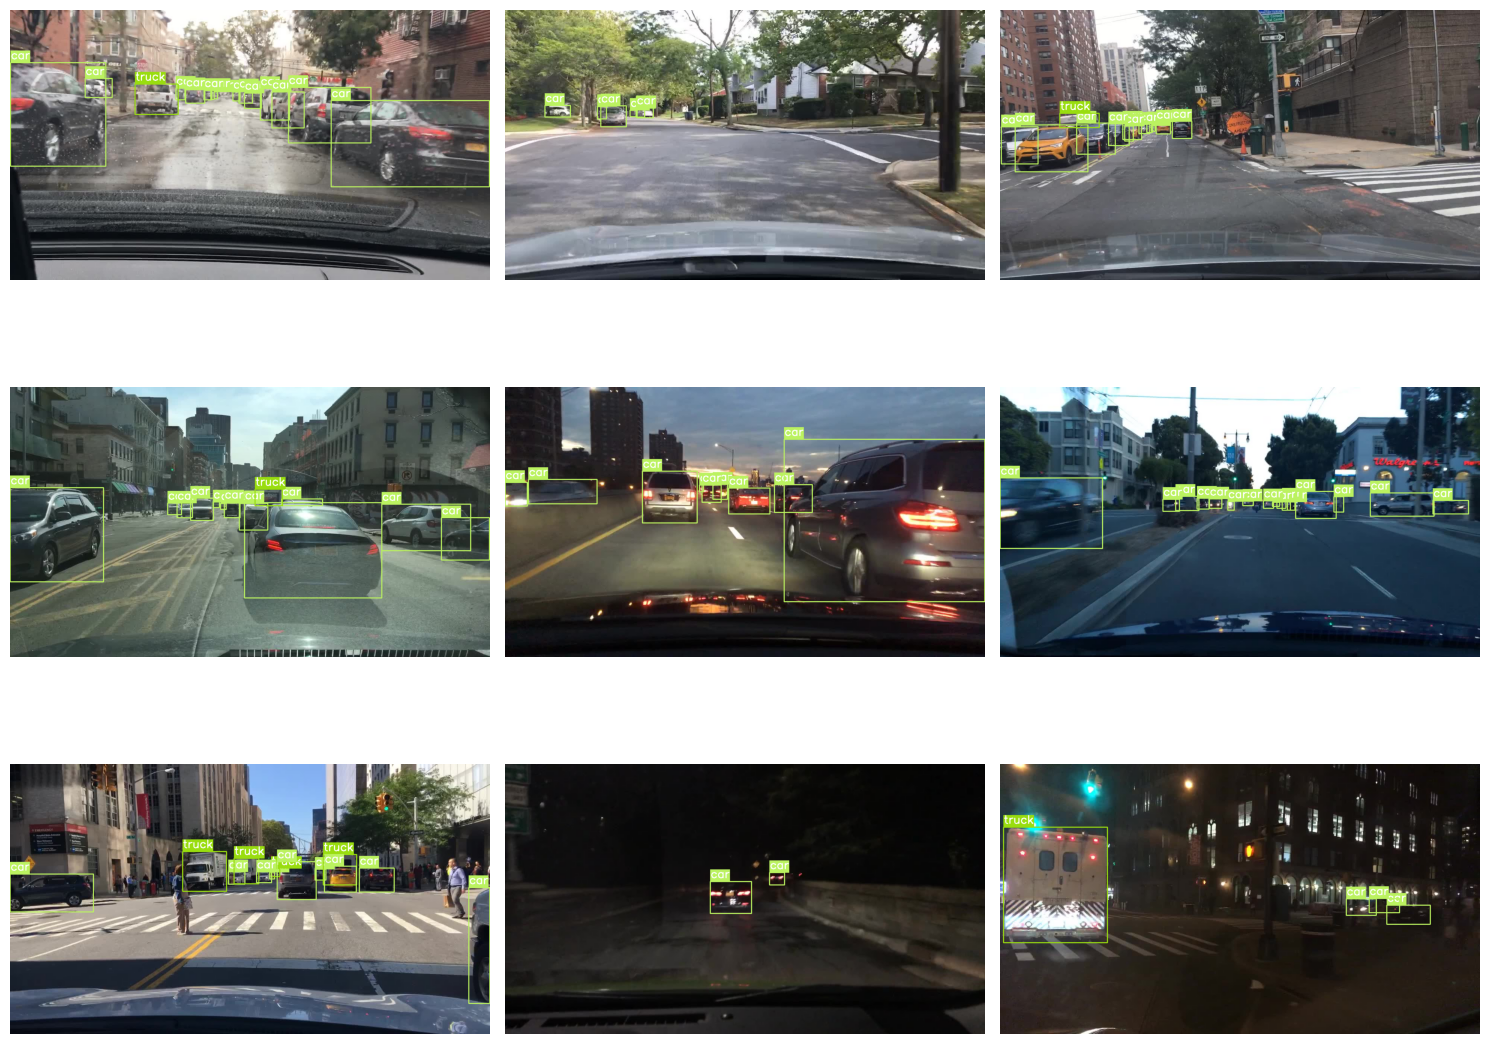

In [12]:
# Visualize a few training images.
plot(
    image_paths='datasets/datasets/train/images/*', 
    label_paths='datasets/datasets/train/labels/*',
    num_samples=9,
)